# SparseEdges tests

## A series of tests for the SparseEdges package


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


In [14]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [15]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
from LogGabor import LogGabor
from SparseEdges import SparseEdges

In [16]:
#! defining framework
#!-------------------
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.pe.N = 4
mp.pe.MP_alpha=1.
mp.pe.do_whitening = False

## Defining units, axis and conventions

cardinal points in X, Y (clockwise):  E (=right=3 o'clock=horizontal), ESE, S, WSW, W, WNW, N, ENE :

In [17]:
X = np.array([0, 1./4, 1./2, 1./4, 0, -1./4, -1./2])#, -1./4])\n",
Y = np.array([1./2, np.sqrt(3)/4, 0, -np.sqrt(3)/4, -1./2, -np.sqrt(3)/4, 0.])#, np.sqrt(3)/
Theta = np.arctan2(-X, Y)  # perpendicular to circle
Theta = ((Theta + np.pi/2  - np.pi/mp.pe.N_phi/2 ) % (np.pi)) - np.pi/2  + np.pi/mp.pe.N_phi/2
print(['%0.1f' % (angle*180/np.pi) for angle in Theta])

['-0.0', '-30.0', '90.0', '30.0', '-0.0', '-30.0', '90.0']


We set the [0,0] index of the array in the upper left left corner of the axes.

The X, Y image axis are defined in the matrix style (origin on the upper left; X going vertically down, Y going right horizontally) - the angle is defined as the angle wrt to the horizontal axis :

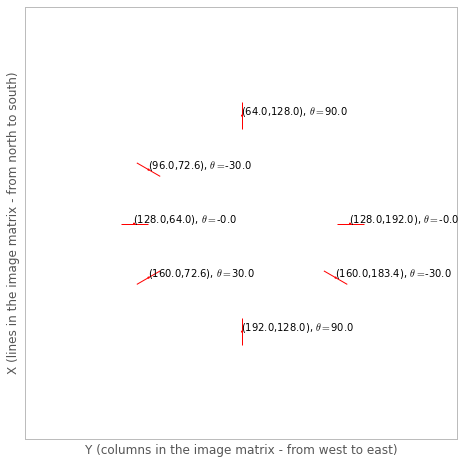

In [18]:
fig, a = mp.show_edges(np.vstack(((X/2. + .5)*mp.N_X, (Y/2. + .5)*mp.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) )))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.N_X, (Y/2. + .5)*mp.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (lines in the image matrix - from north to south)')

Overlaying an image :

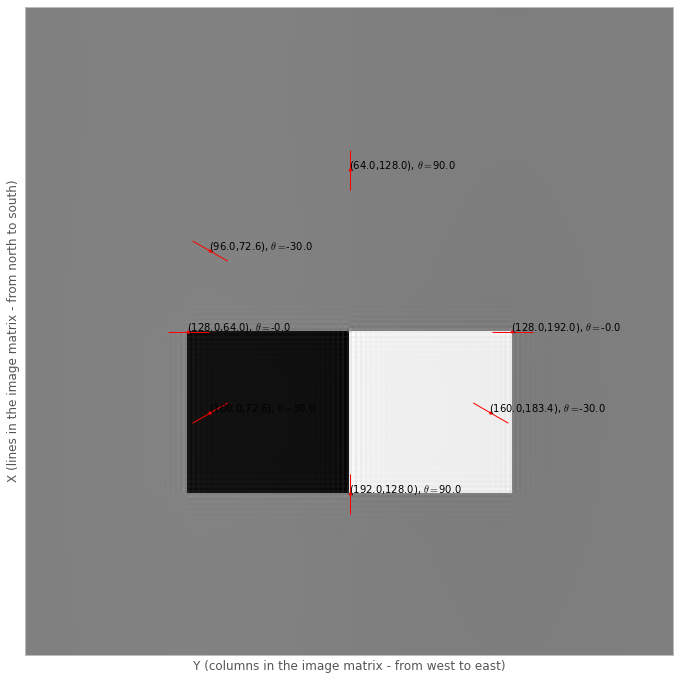

In [19]:
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.N_X, mp.N_Y))
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1

edges = np.vstack(((X/2. + .5)*mp.N_X, (Y/2. + .5)*mp.N_X, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=image)
#fig, a = mp.show_edges(edges, image=im.whitening(image))
t = [a.text(Y_, X_, r'(%0.1f,%0.1f), $\theta=$%0.1f' % (X_, Y_, angle*180/np.pi))  for (X_, Y_, angle)  in zip((X/2. + .5)*mp.N_X, (Y/2. + .5)*mp.N_X, Theta)]
a.set_xlabel('Y (columns in the image matrix - from west to east)')
_ = a.set_ylabel('X (lines in the image matrix - from north to south)')

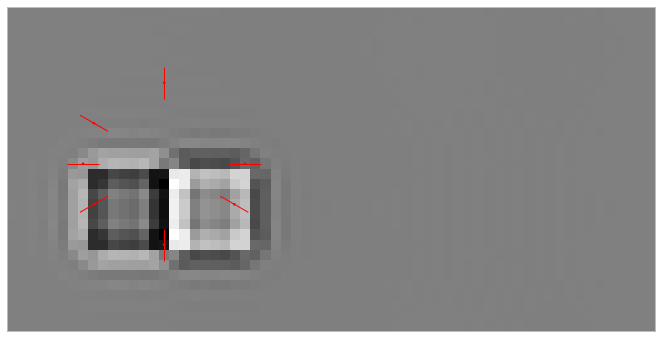

In [20]:
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.set_size((32, 64))
mp.N = 128 # number of edges
mp.pe.figsize_edges = 4.5

#! defining a reference test image (see test_Image)
image = np.zeros((mp.N_X, mp.N_Y))
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1

edges = np.vstack(((X/2. + .5)*mp.N_X-1, (Y/2. + .5)*mp.N_X-1, Theta, .5*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

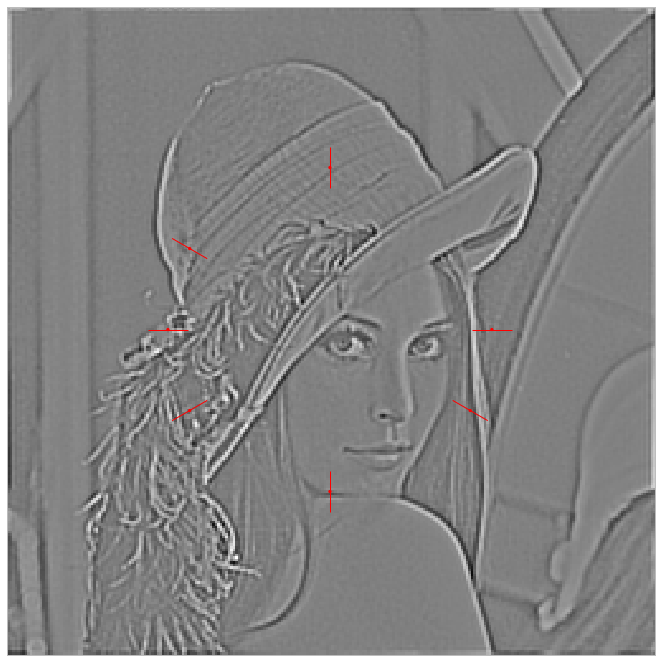

In [21]:
mp.set_size((256, 256))
image = mp.imread('database/lena256.png')
mp.N = 128 # number of edges
mp.pe.figsize_edges = 9

edges = np.vstack(((X/2. + .5)*mp.N_X-1, (Y/2. + .5)*mp.N_X-1, Theta, .1*np.ones(X.shape), np.ones(X.shape), np.zeros(X.shape) ))

fig, a = mp.show_edges(edges, image=mp.whitening(image))

## Matching Pursuit

### checking basic edge detection

(<matplotlib.figure.Figure at 0x1087a3f50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x108578ed0>)

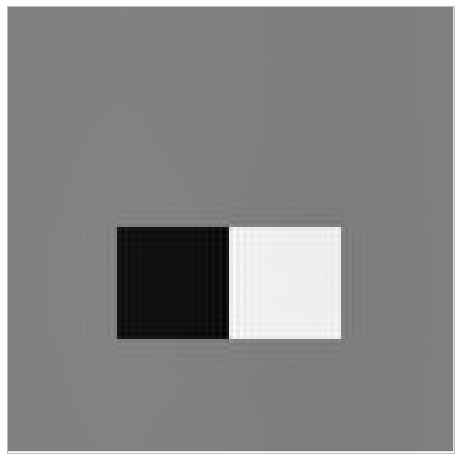

In [22]:
mp.set_size((128, 128))
#! defining a reference test image (see test_Image)
image = np.zeros((mp.N_X, mp.N_Y))
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1
mp.imshow(image)

In [23]:
%%writefile test/experiment_test_MP.py
import numpy as np
from SparseEdges import SparseEdges

mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128 # number of edges
mp.pe.figsize_edges = 9

#! defining a reference test image (see test_Image)
image = np.zeros((mp.N_X, mp.N_Y))
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/2:mp.N_X/2+mp.N_X/4] = 1
image[mp.N_X/2:mp.N_X/2+mp.N_X/4, mp.N_X/4:mp.N_X/2] = -1

matname = 'mat/experiment_test_MP.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=False)
    np.save(matname, edges)   
fig, a = mp.show_edges(edges, image=mp.whitening(image))

Overwriting test/experiment_test_MP.py


/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges/test
/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges


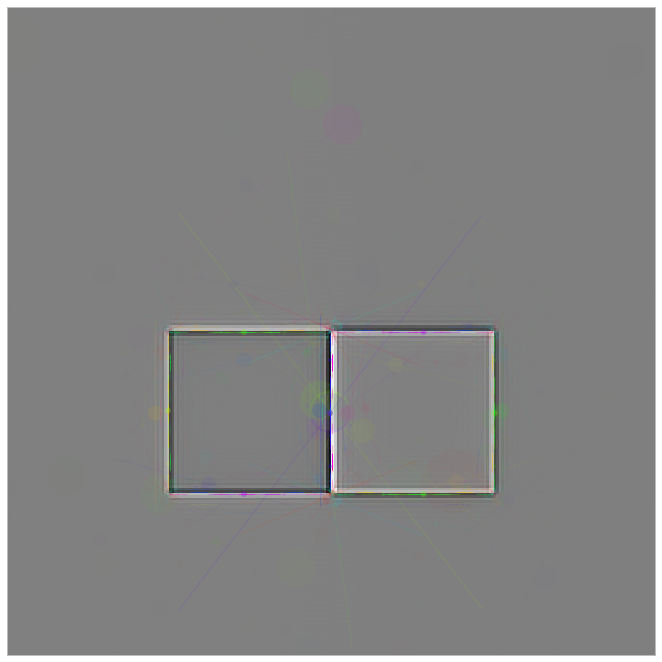

In [24]:
%cd test
%run experiment_test_MP.py
%cd ..

In [25]:
%%writefile test/experiment_test_whitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128

image = mp.imread('https://raw.githubusercontent.com/meduz/SLIP/master/database/serre07_targets/B_N107001.jpg')

#print image.mean(), image.std()
image = mp.normalize(image, center=True)
#print image.mean(), image.std()

matname = 'mat/experiment_test_whitening.npy'
matname_RMSE = 'mat/experiment_test_whitening_RMSE.npy'
try:
    edges = np.load(matname)
    RMSE = np.load(matname_RMSE)
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    

    RMSE = np.ones(mp.N)
    image_ = image.copy()
    image_rec = np.zeros_like(image_)
    if mp.do_whitening: image_ = mp.whitening(image_)
    for i_N in range(mp.N):
        image_rec += mp.reconstruct(edges[:, i_N][:, np.newaxis])
        RMSE[i_N] =  ((image_*mp.mask-image_rec*mp.mask)**2).sum()

    np.save(matname_RMSE, RMSE)        

Overwriting test/experiment_test_whitening.py


In [26]:
#!rm mat/experiment_test_whitening*.npy
!ls -l  test/mat/experiment_test_whitening.npy test/mat/experiment_test_whitening_RMSE.npy

ls: cannot access test/mat/experiment_test_whitening.npy: No such file or directory
ls: cannot access test/mat/experiment_test_whitening_RMSE.npy: No such file or directory


In [27]:
%cd test
%run experiment_test_whitening.py
%cd ..

/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges/test
Edge

[  0 %] elapsed[sec]: 1.058 | ETA[sec]: 2166.632 

 0 / 2048  - Max activity  :  4.61410709215  phase=  -144.343395021  deg,  @  (175, 85, 2, 2)
Edge

[  0 %] elapsed[sec]: 5.271 | ETA[sec]: 5392.757 

 1 / 2048  - Max activity  :  3.96934498871  phase=  89.8874069709  deg,  @  (142, 137, 0, 2)
Edge

[  0 %] elapsed[sec]: 9.612 | ETA[sec]: 6552.457 

 2 / 2048  - Max activity  :  3.75343229447  phase=  -163.443251869  deg,  @  (177, 186, 7, 3)
Edge

[  0 %] elapsed[sec]: 14.581 | ETA[sec]: 7450.745 

 3 / 2048  - Max activity  :  3.48276637035  phase=  -75.0563462323  deg,  @  (153, 142, 21, 3)
Edge

[  0 %] elapsed[sec]: 18.790 | ETA[sec]: 7677.491 

 4 / 2048  - Max activity  :  3.43572336157  phase=  -106.281749286  deg,  @  (178, 230, 8, 2)
Edge

[  0 %] elapsed[sec]: 22.921 | ETA[sec]: 7800.827 

 5 / 2048  - Max activity  :  3.41852448109  phase=  -179.849381736  deg,  @  (160, 188, 1, 2)
Edge

[  0 %] elapsed[sec]: 27.194 | ETA[sec]: 7928.947 

 6 / 2048  - Max activity  :  3.38920667107  phase=  -137.71665708  deg,  @  (31, 255, 23, 2)
Edge

[  0 %] elapsed[sec]: 31.915 | ETA[sec]: 8138.243 

 7 / 2048  - Max activity  :  3.18650597041  phase=  -124.205886759  deg,  @  (162, 168, 4, 3)
Edge

[  0 %] elapsed[sec]: 36.660 | ETA[sec]: 8305.630 

 8 / 2048  - Max activity  :  3.10025842036  phase=  132.401944872  deg,  @  (208, 32, 23, 2)
Edge

[  0 %] elapsed[sec]: 40.930 | ETA[sec]: 8341.607 

 9 / 2048  - Max activity  :  3.07596162015  phase=  -68.6341712272  deg,  @  (187, 133, 21, 2)
Edge

[  0 %] elapsed[sec]: 45.193 | ETA[sec]: 8368.956 

 10 / 2048  - Max activity  :  3.03682448199  phase=  85.0235899893  deg,  @  (149, 118, 8, 3)
Edge

[  0 %] elapsed[sec]: 49.297 | ETA[sec]: 8364.042 

 11 / 2048  - Max activity  :  3.0030201134  phase=  -171.326250316  deg,  @  (194, 81, 22, 2)
Edge

[  0 %] elapsed[sec]: 53.911 | ETA[sec]: 8439.179 

 12 / 2048  - Max activity  :  2.9552216958  phase=  -77.8588259287  deg,  @  (193, 200, 2, 2)
Edge

[  0 %] elapsed[sec]: 58.610 | ETA[sec]: 8515.220 

 13 / 2048  - Max activity  :  2.92397511977  phase=  -99.4685630508  deg,  @  (203, 91, 2, 2)
Edge

[  0 %] elapsed[sec]: 62.925 | ETA[sec]: 8528.382 

 14 / 2048  - Max activity  :  2.82076731351  phase=  140.369454456  deg,  @  (103, 207, 22, 3)
Edge

[  0 %] elapsed[sec]: 67.355 | ETA[sec]: 8554.077 

 15 / 2048  - Max activity  :  2.8135557977  phase=  -112.874009181  deg,  @  (189, 30, 0, 2)
Edge

[  0 %] elapsed[sec]: 71.749 | ETA[sec]: 8571.928 

 16 / 2048  - Max activity  :  2.76617414659  phase=  -121.322249534  deg,  @  (171, 176, 5, 2)
Edge

[  0 %] elapsed[sec]: 76.589 | ETA[sec]: 8637.515 

 17 / 2048  - Max activity  :  2.74026717498  phase=  51.6975061879  deg,  @  (146, 255, 23, 2)
Edge

[  0 %] elapsed[sec]: 81.066 | ETA[sec]: 8656.972 

 18 / 2048  - Max activity  :  2.72772543903  phase=  -22.4428347905  deg,  @  (184, 19, 21, 2)
Edge

[  0 %] elapsed[sec]: 85.291 | ETA[sec]: 8648.459 

 19 / 2048  - Max activity  :  2.72176087195  phase=  32.7965286153  deg,  @  (178, 198, 9, 3)
Edge

[  1 %] elapsed[sec]: 89.775 | ETA[sec]: 8665.392 

 20 / 2048  - Max activity  :  2.71988846338  phase=  81.5595271898  deg,  @  (230, 155, 20, 2)
Edge

[  1 %] elapsed[sec]: 94.116 | ETA[sec]: 8667.210 

 21 / 2048  - Max activity  :  2.67860699295  phase=  23.5734773081  deg,  @  (170, 90, 3, 1)
Edge

[  1 %] elapsed[sec]: 98.922 | ETA[sec]: 8709.428 

 22 / 2048  - Max activity  :  2.66933820551  phase=  -161.679041766  deg,  @  (216, 211, 1, 2)
Edge

[  1 %] elapsed[sec]: 103.184 | ETA[sec]: 8701.821 

 23 / 2048  - Max activity  :  2.64113570206  phase=  101.812173263  deg,  @  (137, 97, 6, 3)
Edge

[  1 %] elapsed[sec]: 107.984 | ETA[sec]: 8738.051 

 24 / 2048  - Max activity  :  2.62187309574  phase=  -39.4405746489  deg,  @  (43, 0, 23, 2)
Edge

[  1 %] elapsed[sec]: 112.343 | ETA[sec]: 8736.799 

 25 / 2048  - Max activity  :  2.60522195377  phase=  55.5342213098  deg,  @  (184, 119, 23, 3)
Edge

[  1 %] elapsed[sec]: 116.578 | ETA[sec]: 8726.093 

 26 / 2048  - Max activity  :  2.59100800167  phase=  -130.807530552  deg,  @  (191, 85, 3, 2)
Edge

[  1 %] elapsed[sec]: 121.195 | ETA[sec]: 8743.356 

 27 / 2048  - Max activity  :  2.55907443868  phase=  111.977781538  deg,  @  (175, 82, 1, 2)
Edge

[  1 %] elapsed[sec]: 125.467 | ETA[sec]: 8735.113 

 28 / 2048  - Max activity  :  2.50668004619  phase=  -55.8670222575  deg,  @  (187, 72, 10, 2)
Edge

[  1 %] elapsed[sec]: 129.616 | ETA[sec]: 8718.861 

 29 / 2048  - Max activity  :  2.45732832897  phase=  -2.06374726622  deg,  @  (162, 122, 20, 2)
Edge

[  1 %] elapsed[sec]: 134.260 | ETA[sec]: 8735.549 

 30 / 2048  - Max activity  :  2.39575492288  phase=  -87.9112845057  deg,  @  (175, 136, 21, 2)
Edge

[  1 %] elapsed[sec]: 139.518 | ETA[sec]: 8789.639 

 31 / 2048  - Max activity  :  2.36083669704  phase=  -70.4734852261  deg,  @  (183, 193, 4, 2)
Edge

[  1 %] elapsed[sec]: 143.779 | ETA[sec]: 8779.208 

 32 / 2048  - Max activity  :  2.35416350259  phase=  -39.8461500676  deg,  @  (119, 249, 13, 2)
Edge

[  1 %] elapsed[sec]: 147.896 | ETA[sec]: 8760.689 

 33 / 2048  - Max activity  :  2.3121017898  phase=  -50.3066847129  deg,  @  (206, 37, 1, 2)
Edge

[  1 %] elapsed[sec]: 152.266 | ETA[sec]: 8757.448 

 34 / 2048  - Max activity  :  2.29235026568  phase=  -64.5140721331  deg,  @  (129, 208, 2, 2)
Edge

[  1 %] elapsed[sec]: 157.088 | ETA[sec]: 8779.463 

 35 / 2048  - Max activity  :  2.28970706681  phase=  150.481070553  deg,  @  (169, 190, 1, 2)
Edge

[  1 %] elapsed[sec]: 161.819 | ETA[sec]: 8795.096 

 36 / 2048  - Max activity  :  2.26869497011  phase=  72.6484926087  deg,  @  (181, 89, 2, 2)
Edge

[  1 %] elapsed[sec]: 166.981 | ETA[sec]: 8832.421 

 37 / 2048  - Max activity  :  2.26465317751  phase=  61.9704125558  deg,  @  (127, 84, 7, 2)
Edge

[  1 %] elapsed[sec]: 172.446 | ETA[sec]: 8883.198 

 38 / 2048  - Max activity  :  2.25455446993  phase=  -74.6222148848  deg,  @  (102, 125, 1, 3)
Edge

[  1 %] elapsed[sec]: 177.102 | ETA[sec]: 8890.533 

 39 / 2048  - Max activity  :  2.24954165639  phase=  -28.4922092245  deg,  @  (218, 33, 22, 1)
Edge

[  2 %] elapsed[sec]: 181.275 | ETA[sec]: 8873.637 

 40 / 2048  - Max activity  :  2.2269183044  phase=  82.2241323098  deg,  @  (144, 108, 7, 2)
Edge

[  2 %] elapsed[sec]: 185.569 | ETA[sec]: 8863.114 

 41 / 2048  - Max activity  :  2.20283179283  phase=  -71.1687632888  deg,  @  (209, 47, 22, 2)
Edge

[  2 %] elapsed[sec]: 189.915 | ETA[sec]: 8855.321 

 42 / 2048  - Max activity  :  2.19968589419  phase=  -146.063815106  deg,  @  (199, 127, 19, 2)
Edge

[  2 %] elapsed[sec]: 195.311 | ETA[sec]: 8895.513 

 43 / 2048  - Max activity  :  2.18142513661  phase=  11.3819848517  deg,  @  (234, 91, 3, 2)
Edge

[  2 %] elapsed[sec]: 199.410 | ETA[sec]: 8875.973 

 44 / 2048  - Max activity  :  2.15774700216  phase=  -35.3216188156  deg,  @  (145, 148, 6, 2)
Edge

[  2 %] elapsed[sec]: 203.669 | ETA[sec]: 8864.037 

 45 / 2048  - Max activity  :  2.15173952441  phase=  -66.7426697545  deg,  @  (207, 153, 6, 1)
Edge

[  2 %] elapsed[sec]: 207.936 | ETA[sec]: 8852.755 

 46 / 2048  - Max activity  :  2.14550917575  phase=  -128.235194347  deg,  @  (240, 159, 16, 1)
Edge

[  2 %] elapsed[sec]: 212.201 | ETA[sec]: 8841.719 

 47 / 2048  - Max activity  :  2.1317438084  phase=  84.2690065931  deg,  @  (226, 40, 23, 1)
Edge

[  2 %] elapsed[sec]: 216.433 | ETA[sec]: 8829.597 

 48 / 2048  - Max activity  :  2.12747319262  phase=  -137.722464361  deg,  @  (188, 63, 18, 2)
Edge

[  2 %] elapsed[sec]: 221.333 | ETA[sec]: 8844.460 

 49 / 2048  - Max activity  :  2.10914621618  phase=  -20.1990710663  deg,  @  (107, 240, 11, 2)
Edge

[  2 %] elapsed[sec]: 225.940 | ETA[sec]: 8847.085 

 50 / 2048  - Max activity  :  2.09809797364  phase=  50.9429511638  deg,  @  (114, 66, 5, 2)
Edge

[  2 %] elapsed[sec]: 230.124 | ETA[sec]: 8833.220 

 51 / 2048  - Max activity  :  2.08573670786  phase=  -71.4860553893  deg,  @  (75, 193, 3, 2)
Edge

[  2 %] elapsed[sec]: 234.478 | ETA[sec]: 8826.111 

 52 / 2048  - Max activity  :  2.07966647351  phase=  83.0285061326  deg,  @  (219, 95, 6, 1)
Edge

[  2 %] elapsed[sec]: 239.706 | ETA[sec]: 8851.357 

 53 / 2048  - Max activity  :  2.06159720716  phase=  -111.216928897  deg,  @  (127, 132, 1, 2)
Edge

[  2 %] elapsed[sec]: 243.764 | ETA[sec]: 8833.127 

 54 / 2048  - Max activity  :  2.03713072312  phase=  -27.083643862  deg,  @  (231, 190, 0, 2)
Edge

[  2 %] elapsed[sec]: 248.060 | ETA[sec]: 8823.866 

 55 / 2048  - Max activity  :  2.03400193704  phase=  -36.1778277027  deg,  @  (172, 188, 7, 2)
Edge

[  2 %] elapsed[sec]: 252.195 | ETA[sec]: 8809.122 

 56 / 2048  - Max activity  :  2.02497788127  phase=  -114.482102038  deg,  @  (202, 54, 20, 3)
Edge

[  2 %] elapsed[sec]: 256.627 | ETA[sec]: 8804.960 

 57 / 2048  - Max activity  :  2.01371432685  phase=  4.81281020915  deg,  @  (125, 143, 1, 1)
Edge

[  2 %] elapsed[sec]: 260.919 | ETA[sec]: 8796.068 

 58 / 2048  - Max activity  :  1.99929571536  phase=  -75.1708442396  deg,  @  (163, 139, 21, 2)
Edge

[  2 %] elapsed[sec]: 265.213 | ETA[sec]: 8787.400 

 59 / 2048  - Max activity  :  1.99616192154  phase=  1.61375677303  deg,  @  (236, 158, 22, 2)
Edge

[  2 %] elapsed[sec]: 269.798 | ETA[sec]: 8788.323 

 60 / 2048  - Max activity  :  1.98649233544  phase=  73.5681207962  deg,  @  (190, 234, 14, 2)
Edge

[  3 %] elapsed[sec]: 274.255 | ETA[sec]: 8785.002 

 61 / 2048  - Max activity  :  1.98193304438  phase=  58.6581962231  deg,  @  (205, 97, 0, 4)
Edge

[  3 %] elapsed[sec]: 278.515 | ETA[sec]: 8775.446 

 62 / 2048  - Max activity  :  1.96732596837  phase=  -120.301559507  deg,  @  (216, 121, 23, 2)
Edge

[  3 %] elapsed[sec]: 282.942 | ETA[sec]: 8771.200 

 63 / 2048  - Max activity  :  1.96011420225  phase=  75.5187451323  deg,  @  (179, 239, 7, 3)
Edge

[  3 %] elapsed[sec]: 287.275 | ETA[sec]: 8764.104 

 64 / 2048  - Max activity  :  1.94213770951  phase=  -70.0497307741  deg,  @  (185, 23, 19, 2)
Edge

[  3 %] elapsed[sec]: 291.939 | ETA[sec]: 8767.019 

 65 / 2048  - Max activity  :  1.93124577484  phase=  56.1823442895  deg,  @  (197, 33, 0, 1)
Edge

[  3 %] elapsed[sec]: 296.592 | ETA[sec]: 8769.393 

 66 / 2048  - Max activity  :  1.92942080332  phase=  -112.54162026  deg,  @  (118, 130, 1, 5)
Edge

[  3 %] elapsed[sec]: 300.902 | ETA[sec]: 8761.571 

 67 / 2048  - Max activity  :  1.91863960256  phase=  -78.1148172415  deg,  @  (231, 176, 6, 2)
Edge

[  3 %] elapsed[sec]: 305.549 | ETA[sec]: 8763.490 

 68 / 2048  - Max activity  :  1.90826264324  phase=  127.936182976  deg,  @  (226, 34, 23, 2)
Edge

[  3 %] elapsed[sec]: 310.355 | ETA[sec]: 8769.742 

 69 / 2048  - Max activity  :  1.9067877387  phase=  34.6464557941  deg,  @  (220, 184, 3, 2)
Edge

[  3 %] elapsed[sec]: 314.710 | ETA[sec]: 8763.114 

 70 / 2048  - Max activity  :  1.90344418506  phase=  -70.7820555694  deg,  @  (155, 162, 4, 2)
Edge

[  3 %] elapsed[sec]: 319.696 | ETA[sec]: 8773.888 

 71 / 2048  - Max activity  :  1.90160545946  phase=  134.943885661  deg,  @  (214, 144, 3, 2)
Edge

[  3 %] elapsed[sec]: 324.560 | ETA[sec]: 8780.909 

 72 / 2048  - Max activity  :  1.90153005026  phase=  141.903004575  deg,  @  (223, 197, 22, 2)
Edge

[  3 %] elapsed[sec]: 328.885 | ETA[sec]: 8773.234 

 73 / 2048  - Max activity  :  1.88072054633  phase=  75.5814049745  deg,  @  (108, 22, 18, 2)
Edge

[  3 %] elapsed[sec]: 333.372 | ETA[sec]: 8769.895 

 74 / 2048  - Max activity  :  1.86760511634  phase=  -68.4445378799  deg,  @  (84, 212, 6, 2)
Edge

[  3 %] elapsed[sec]: 337.783 | ETA[sec]: 8764.573 

 75 / 2048  - Max activity  :  1.86547118654  phase=  113.192817201  deg,  @  (153, 129, 9, 2)
Edge

[  3 %] elapsed[sec]: 342.025 | ETA[sec]: 8754.962 

 76 / 2048  - Max activity  :  1.86181435227  phase=  -161.655057273  deg,  @  (244, 87, 17, 1)
Edge

[  3 %] elapsed[sec]: 346.148 | ETA[sec]: 8742.444 

 77 / 2048  - Max activity  :  1.85587403962  phase=  -69.1738535124  deg,  @  (233, 156, 17, 2)
Edge

[  3 %] elapsed[sec]: 350.916 | ETA[sec]: 8746.259 

 78 / 2048  - Max activity  :  1.83980504305  phase=  -103.337731763  deg,  @  (179, 189, 9, 2)
Edge

[  3 %] elapsed[sec]: 355.290 | ETA[sec]: 8740.146 

 79 / 2048  - Max activity  :  1.82767750375  phase=  -138.279261805  deg,  @  (216, 41, 0, 1)
Edge

[  3 %] elapsed[sec]: 360.133 | ETA[sec]: 8745.449 

 80 / 2048  - Max activity  :  1.82579340009  phase=  60.9721850904  deg,  @  (123, 189, 2, 1)
Edge

[  4 %] elapsed[sec]: 365.002 | ETA[sec]: 8751.151 

 81 / 2048  - Max activity  :  1.82406531968  phase=  87.4430212973  deg,  @  (191, 238, 8, 2)
Edge

[  4 %] elapsed[sec]: 369.118 | ETA[sec]: 8738.752 

 82 / 2048  - Max activity  :  1.79966935944  phase=  27.0030316282  deg,  @  (236, 27, 23, 2)
Edge

[  4 %] elapsed[sec]: 373.430 | ETA[sec]: 8731.161 

 83 / 2048  - Max activity  :  1.78749534101  phase=  -58.7408684956  deg,  @  (99, 254, 21, 2)
Edge

[  4 %] elapsed[sec]: 378.085 | ETA[sec]: 8731.540 

 84 / 2048  - Max activity  :  1.78494200042  phase=  -78.1738117919  deg,  @  (162, 111, 9, 2)
Edge

[  4 %] elapsed[sec]: 382.820 | ETA[sec]: 8733.630 

 85 / 2048  - Max activity  :  1.77738862731  phase=  -42.5892632049  deg,  @  (153, 216, 2, 2)
Edge

[  4 %] elapsed[sec]: 387.210 | ETA[sec]: 8727.799 

 86 / 2048  - Max activity  :  1.77511401193  phase=  -80.5176922461  deg,  @  (226, 183, 15, 1)
Edge

[  4 %] elapsed[sec]: 391.601 | ETA[sec]: 8722.025 

 87 / 2048  - Max activity  :  1.77162205624  phase=  60.8537112487  deg,  @  (235, 218, 1, 1)
Edge

[  4 %] elapsed[sec]: 395.966 | ETA[sec]: 8715.709 

 88 / 2048  - Max activity  :  1.76238453482  phase=  151.684668439  deg,  @  (158, 0, 23, 2)
Edge

[  4 %] elapsed[sec]: 400.779 | ETA[sec]: 8719.166 

 89 / 2048  - Max activity  :  1.76086729093  phase=  -67.5554957576  deg,  @  (0, 200, 11, 3)
Edge

[  4 %] elapsed[sec]: 405.971 | ETA[sec]: 8730.598 

 90 / 2048  - Max activity  :  1.75763816005  phase=  -132.983212185  deg,  @  (255, 92, 11, 2)
Edge

[  4 %] elapsed[sec]: 410.188 | ETA[sec]: 8720.958 

 91 / 2048  - Max activity  :  1.75143755991  phase=  89.1256043698  deg,  @  (92, 236, 8, 2)
Edge

[  4 %] elapsed[sec]: 414.628 | ETA[sec]: 8716.100 

 92 / 2048  - Max activity  :  1.74450402858  phase=  -136.18967236  deg,  @  (255, 236, 11, 2)
Edge

[  4 %] elapsed[sec]: 418.952 | ETA[sec]: 8708.859 

 93 / 2048  - Max activity  :  1.74122927016  phase=  95.808733065  deg,  @  (147, 138, 0, 1)
Edge

[  4 %] elapsed[sec]: 423.275 | ETA[sec]: 8701.643 

 94 / 2048  - Max activity  :  1.73588624153  phase=  -75.1054027044  deg,  @  (88, 201, 3, 3)
Edge

[  4 %] elapsed[sec]: 427.380 | ETA[sec]: 8690.053 

 95 / 2048  - Max activity  :  1.73356484612  phase=  -160.256957783  deg,  @  (158, 171, 11, 2)
Edge

[  4 %] elapsed[sec]: 432.340 | ETA[sec]: 8695.836 

 96 / 2048  - Max activity  :  1.71981534041  phase=  -138.102874994  deg,  @  (208, 208, 2, 2)
Edge

[  4 %] elapsed[sec]: 436.731 | ETA[sec]: 8690.060 

 97 / 2048  - Max activity  :  1.71315394682  phase=  -166.482691827  deg,  @  (25, 255, 23, 1)
Edge

[  4 %] elapsed[sec]: 440.922 | ETA[sec]: 8680.375 

 98 / 2048  - Max activity  :  1.71099423052  phase=  -176.4457989  deg,  @  (201, 80, 0, 2)
Edge

[  4 %] elapsed[sec]: 445.863 | ETA[sec]: 8685.404 

 99 / 2048  - Max activity  :  1.69959249327  phase=  -91.5709274796  deg,  @  (221, 35, 3, 1)
Edge

[  4 %] elapsed[sec]: 450.700 | ETA[sec]: 8688.253 

 100 / 2048  - Max activity  :  1.69859419337  phase=  79.0081469834  deg,  @  (132, 152, 21, 2)
Edge

[  4 %] elapsed[sec]: 455.031 | ETA[sec]: 8681.272 

 101 / 2048  - Max activity  :  1.6977537066  phase=  98.2829614724  deg,  @  (205, 238, 15, 2)
Edge

[  5 %] elapsed[sec]: 459.694 | ETA[sec]: 8680.629 

 102 / 2048  - Max activity  :  1.68775411125  phase=  13.8600258665  deg,  @  (214, 91, 4, 2)
Edge

[  5 %] elapsed[sec]: 464.114 | ETA[sec]: 8675.358 

 103 / 2048  - Max activity  :  1.68247086843  phase=  -117.645471831  deg,  @  (82, 120, 3, 3)
Edge

[  5 %] elapsed[sec]: 468.958 | ETA[sec]: 8677.965 

 104 / 2048  - Max activity  :  1.68009062053  phase=  -105.289688942  deg,  @  (182, 28, 3, 2)
Edge

[  5 %] elapsed[sec]: 473.308 | ETA[sec]: 8671.359 

 105 / 2048  - Max activity  :  1.67055101766  phase=  10.9663647408  deg,  @  (204, 204, 22, 2)
Edge

[  5 %] elapsed[sec]: 477.712 | ETA[sec]: 8665.788 

 106 / 2048  - Max activity  :  1.66640818635  phase=  -154.755589593  deg,  @  (129, 150, 2, 2)
Edge

[  5 %] elapsed[sec]: 481.877 | ETA[sec]: 8655.945 

 107 / 2048  - Max activity  :  1.66224958797  phase=  -133.347530656  deg,  @  (240, 188, 0, 2)
Edge

[  5 %] elapsed[sec]: 486.490 | ETA[sec]: 8654.174 

 108 / 2048  - Max activity  :  1.65814193754  phase=  -71.9252001827  deg,  @  (114, 240, 13, 2)
Edge

[  5 %] elapsed[sec]: 491.025 | ETA[sec]: 8650.968 

 109 / 2048  - Max activity  :  1.65511325619  phase=  -83.1571146684  deg,  @  (185, 195, 8, 2)
Edge

[  5 %] elapsed[sec]: 495.363 | ETA[sec]: 8644.300 

 110 / 2048  - Max activity  :  1.65325522582  phase=  -112.463730392  deg,  @  (41, 255, 23, 4)
Edge

[  5 %] elapsed[sec]: 499.512 | ETA[sec]: 8634.426 

 111 / 2048  - Max activity  :  1.63043232174  phase=  -79.8090518419  deg,  @  (89, 245, 14, 3)
Edge

[  5 %] elapsed[sec]: 504.085 | ETA[sec]: 8631.891 

 112 / 2048  - Max activity  :  1.62426336216  phase=  -114.532137094  deg,  @  (162, 179, 4, 2)
Edge

[  5 %] elapsed[sec]: 508.664 | ETA[sec]: 8629.435 

 113 / 2048  - Max activity  :  1.62375182059  phase=  -35.2306986694  deg,  @  (215, 187, 0, 2)
Edge

[  5 %] elapsed[sec]: 512.899 | ETA[sec]: 8621.162 

 114 / 2048  - Max activity  :  1.62101520522  phase=  -135.807532868  deg,  @  (255, 34, 11, 2)
Edge

[  5 %] elapsed[sec]: 517.241 | ETA[sec]: 8614.742 

 115 / 2048  - Max activity  :  1.61817059595  phase=  18.6656551375  deg,  @  (177, 21, 21, 2)
Edge

[  5 %] elapsed[sec]: 521.495 | ETA[sec]: 8606.892 

 116 / 2048  - Max activity  :  1.61128850905  phase=  160.999187445  deg,  @  (222, 49, 23, 2)
Edge

[  5 %] elapsed[sec]: 525.773 | ETA[sec]: 8599.507 

 117 / 2048  - Max activity  :  1.60895102887  phase=  -102.462515536  deg,  @  (244, 159, 13, 2)
Edge

[  5 %] elapsed[sec]: 530.174 | ETA[sec]: 8594.159 

 118 / 2048  - Max activity  :  1.60493070302  phase=  74.8491137325  deg,  @  (138, 136, 1, 1)
Edge

[  5 %] elapsed[sec]: 534.952 | ETA[sec]: 8594.894 

 119 / 2048  - Max activity  :  1.60326980035  phase=  65.6772827044  deg,  @  (126, 241, 17, 1)
Edge

[  5 %] elapsed[sec]: 539.285 | ETA[sec]: 8588.454 

 120 / 2048  - Max activity  :  1.59841935146  phase=  56.8444954261  deg,  @  (110, 249, 3, 2)
Edge

[  5 %] elapsed[sec]: 543.985 | ETA[sec]: 8587.825 

 121 / 2048  - Max activity  :  1.59730175984  phase=  93.4747445207  deg,  @  (111, 213, 0, 2)
Edge

[  6 %] elapsed[sec]: 548.318 | ETA[sec]: 8581.399 

 122 / 2048  - Max activity  :  1.59376487572  phase=  95.9978672062  deg,  @  (99, 212, 22, 2)
Edge

[  6 %] elapsed[sec]: 553.425 | ETA[sec]: 8587.007 

 123 / 2048  - Max activity  :  1.59050528128  phase=  -108.177280869  deg,  @  (176, 182, 7, 1)
Edge

[  6 %] elapsed[sec]: 557.619 | ETA[sec]: 8578.404 

 124 / 2048  - Max activity  :  1.58569564701  phase=  -139.390193397  deg,  @  (255, 54, 11, 2)
Edge

[  6 %] elapsed[sec]: 561.998 | ETA[sec]: 8572.696 

 125 / 2048  - Max activity  :  1.5854133546  phase=  169.041707495  deg,  @  (30, 190, 12, 3)
Edge

[  6 %] elapsed[sec]: 566.416 | ETA[sec]: 8567.597 

 126 / 2048  - Max activity  :  1.58075035819  phase=  52.5251875278  deg,  @  (89, 41, 15, 2)
Edge

[  6 %] elapsed[sec]: 571.235 | ETA[sec]: 8568.518 

 127 / 2048  - Max activity  :  1.5760550455  phase=  156.56099927  deg,  @  (200, 243, 11, 2)
Edge

[  6 %] elapsed[sec]: 576.139 | ETA[sec]: 8570.620 

 128 / 2048  - Max activity  :  1.57380691533  phase=  -84.7405223487  deg,  @  (140, 212, 1, 3)
Edge

[  6 %] elapsed[sec]: 580.467 | ETA[sec]: 8564.122 

 129 / 2048  - Max activity  :  1.57176794342  phase=  -121.841058476  deg,  @  (48, 140, 8, 3)
Edge

[  6 %] elapsed[sec]: 584.808 | ETA[sec]: 8557.845 

 130 / 2048  - Max activity  :  1.56674146184  phase=  -135.009239296  deg,  @  (205, 158, 7, 2)
Edge

[  6 %] elapsed[sec]: 589.129 | ETA[sec]: 8551.297 

 131 / 2048  - Max activity  :  1.56605521446  phase=  -139.638187904  deg,  @  (232, 195, 23, 1)
Edge

[  6 %] elapsed[sec]: 593.412 | ETA[sec]: 8544.237 

 132 / 2048  - Max activity  :  1.56218876893  phase=  71.3596524348  deg,  @  (179, 237, 9, 1)
Edge

[  6 %] elapsed[sec]: 598.492 | ETA[sec]: 8548.607 

 133 / 2048  - Max activity  :  1.55995508068  phase=  -158.371512955  deg,  @  (58, 37, 13, 2)
Edge

[  6 %] elapsed[sec]: 602.709 | ETA[sec]: 8540.606 

 134 / 2048  - Max activity  :  1.55759914704  phase=  -79.7531536688  deg,  @  (182, 134, 21, 5)
Edge

[  6 %] elapsed[sec]: 607.004 | ETA[sec]: 8533.757 

 135 / 2048  - Max activity  :  1.54833127094  phase=  -47.6115371016  deg,  @  (229, 18, 16, 2)
Edge

[  6 %] elapsed[sec]: 611.325 | ETA[sec]: 8527.317 

 136 / 2048  - Max activity  :  1.54706445415  phase=  59.9671918012  deg,  @  (158, 185, 1, 2)
Edge

[  6 %] elapsed[sec]: 616.870 | ETA[sec]: 8537.832 

 137 / 2048  - Max activity  :  1.54578497903  phase=  40.4940874876  deg,  @  (151, 156, 7, 1)
Edge

[  6 %] elapsed[sec]: 621.023 | ETA[sec]: 8529.013 

 138 / 2048  - Max activity  :  1.54448945831  phase=  -19.2596300163  deg,  @  (143, 146, 2, 3)
Edge

[  6 %] elapsed[sec]: 625.347 | ETA[sec]: 8522.592 

 139 / 2048  - Max activity  :  1.54005061774  phase=  34.5077791297  deg,  @  (174, 79, 1, 2)
Edge

[  6 %] elapsed[sec]: 629.666 | ETA[sec]: 8516.126 

 140 / 2048  - Max activity  :  1.53975055733  phase=  -43.3100796065  deg,  @  (224, 0, 23, 2)
Edge

[  6 %] elapsed[sec]: 633.948 | ETA[sec]: 8509.192 

 141 / 2048  - Max activity  :  1.53634972888  phase=  -61.70643541  deg,  @  (207, 147, 10, 3)
Edge

[  6 %] elapsed[sec]: 638.141 | ETA[sec]: 8501.115 

 142 / 2048  - Max activity  :  1.53544820992  phase=  56.1429740555  deg,  @  (121, 75, 6, 2)
Edge

[  7 %] elapsed[sec]: 642.785 | ETA[sec]: 8499.050 

 143 / 2048  - Max activity  :  1.53461695268  phase=  105.649332104  deg,  @  (144, 107, 7, 6)
Edge

[  7 %] elapsed[sec]: 646.976 | ETA[sec]: 8491.002 

 144 / 2048  - Max activity  :  1.53065308934  phase=  -107.525912561  deg,  @  (88, 213, 9, 2)
Edge

[  7 %] elapsed[sec]: 651.344 | ETA[sec]: 8485.319 

 145 / 2048  - Max activity  :  1.52922721546  phase=  35.18234606  deg,  @  (83, 254, 6, 2)
Edge

[  7 %] elapsed[sec]: 655.652 | ETA[sec]: 8478.871 

 146 / 2048  - Max activity  :  1.52411204348  phase=  55.3678747861  deg,  @  (199, 120, 23, 2)
Edge

[  7 %] elapsed[sec]: 660.034 | ETA[sec]: 8473.407 

 147 / 2048  - Max activity  :  1.52071170797  phase=  -73.41117927  deg,  @  (55, 160, 10, 2)
Edge

[  7 %] elapsed[sec]: 664.298 | ETA[sec]: 8466.454 

 148 / 2048  - Max activity  :  1.5199367883  phase=  -106.361928051  deg,  @  (21, 248, 14, 2)
Edge

[  7 %] elapsed[sec]: 669.370 | ETA[sec]: 8469.766 

 149 / 2048  - Max activity  :  1.51579247648  phase=  -55.9396212475  deg,  @  (80, 209, 23, 2)
Edge

[  7 %] elapsed[sec]: 673.657 | ETA[sec]: 8463.098 

 150 / 2048  - Max activity  :  1.51489697405  phase=  69.9112365588  deg,  @  (200, 50, 0, 2)
Edge

[  7 %] elapsed[sec]: 678.245 | ETA[sec]: 8460.211 

 151 / 2048  - Max activity  :  1.51494600615  phase=  -82.1565733953  deg,  @  (206, 43, 22, 2)
Edge

[  7 %] elapsed[sec]: 682.542 | ETA[sec]: 8453.706 

 152 / 2048  - Max activity  :  1.50881965394  phase=  -56.6815873688  deg,  @  (187, 78, 12, 2)
Edge

[  7 %] elapsed[sec]: 687.525 | ETA[sec]: 8455.667 

 153 / 2048  - Max activity  :  1.50632845376  phase=  -85.9016712064  deg,  @  (114, 128, 0, 2)
Edge

[  7 %] elapsed[sec]: 691.868 | ETA[sec]: 8449.712 

 154 / 2048  - Max activity  :  1.4984020088  phase=  -130.423602495  deg,  @  (192, 200, 3, 4)
Edge

[  7 %] elapsed[sec]: 696.069 | ETA[sec]: 8442.067 

 155 / 2048  - Max activity  :  1.47489616453  phase=  -170.088363538  deg,  @  (201, 164, 2, 2)
Edge

[  7 %] elapsed[sec]: 700.619 | ETA[sec]: 8438.665 

 156 / 2048  - Max activity  :  1.47203814535  phase=  -10.8530428556  deg,  @  (234, 168, 0, 2)
Edge

[  7 %] elapsed[sec]: 705.002 | ETA[sec]: 8433.250 

 157 / 2048  - Max activity  :  1.46814596797  phase=  68.6961975167  deg,  @  (191, 254, 14, 2)
Edge

[  7 %] elapsed[sec]: 710.008 | ETA[sec]: 8435.255 

 158 / 2048  - Max activity  :  1.46415215838  phase=  -15.5379578025  deg,  @  (38, 179, 6, 2)
Edge

[  7 %] elapsed[sec]: 714.365 | ETA[sec]: 8429.505 

 159 / 2048  - Max activity  :  1.45291129285  phase=  115.010372304  deg,  @  (236, 88, 21, 3)
Edge

[  7 %] elapsed[sec]: 718.533 | ETA[sec]: 8421.563 

 160 / 2048  - Max activity  :  1.44988115396  phase=  -25.1714165526  deg,  @  (199, 203, 5, 1)
Edge

[  7 %] elapsed[sec]: 722.876 | ETA[sec]: 8415.703 

 161 / 2048  - Max activity  :  1.44985046498  phase=  132.680513362  deg,  @  (195, 135, 10, 2)
Edge

[  7 %] elapsed[sec]: 727.006 | ETA[sec]: 8407.405 

 162 / 2048  - Max activity  :  1.44498981373  phase=  50.3977233795  deg,  @  (113, 182, 2, 1)
Edge

[  8 %] elapsed[sec]: 732.341 | ETA[sec]: 8412.989 

 163 / 2048  - Max activity  :  1.4433160649  phase=  170.125200909  deg,  @  (194, 89, 23, 1)
Edge

[  8 %] elapsed[sec]: 736.647 | ETA[sec]: 8406.703 

 164 / 2048  - Max activity  :  1.44288814187  phase=  -45.9912901846  deg,  @  (192, 6, 22, 1)
Edge

[  8 %] elapsed[sec]: 740.926 | ETA[sec]: 8400.134 

 165 / 2048  - Max activity  :  1.44337452417  phase=  1.15589998509  deg,  @  (205, 1, 21, 2)
Edge

[  8 %] elapsed[sec]: 745.270 | ETA[sec]: 8394.333 

 166 / 2048  - Max activity  :  1.44274830896  phase=  98.1832601753  deg,  @  (110, 0, 23, 4)
Edge

[  8 %] elapsed[sec]: 749.614 | ETA[sec]: 8388.534 

 167 / 2048  - Max activity  :  1.44132346874  phase=  40.8799789474  deg,  @  (184, 197, 23, 2)
Edge

[  8 %] elapsed[sec]: 754.758 | ETA[sec]: 8391.660 

 168 / 2048  - Max activity  :  1.4362164309  phase=  -174.21288937  deg,  @  (191, 81, 0, 2)
Edge

[  8 %] elapsed[sec]: 759.065 | ETA[sec]: 8385.432 

 169 / 2048  - Max activity  :  1.43471754008  phase=  101.152706231  deg,  @  (113, 156, 5, 1)
Edge

[  8 %] elapsed[sec]: 763.733 | ETA[sec]: 8383.193 

 170 / 2048  - Max activity  :  1.43423199315  phase=  82.6540162408  deg,  @  (179, 200, 11, 2)
Edge

[  8 %] elapsed[sec]: 768.181 | ETA[sec]: 8378.528 

 171 / 2048  - Max activity  :  1.42868148848  phase=  -99.2999630735  deg,  @  (191, 55, 0, 2)
Edge

[  8 %] elapsed[sec]: 772.615 | ETA[sec]: 8373.714 

 172 / 2048  - Max activity  :  1.42856910901  phase=  -10.3376029931  deg,  @  (37, 205, 14, 2)
Edge

[  8 %] elapsed[sec]: 777.312 | ETA[sec]: 8371.740 

 173 / 2048  - Max activity  :  1.42470655366  phase=  -146.491875552  deg,  @  (29, 118, 11, 2)
Edge

[  8 %] elapsed[sec]: 781.692 | ETA[sec]: 8366.341 

 174 / 2048  - Max activity  :  1.42462319963  phase=  19.9325688932  deg,  @  (215, 92, 22, 3)
Edge

[  8 %] elapsed[sec]: 786.099 | ETA[sec]: 8361.239 

 175 / 2048  - Max activity  :  1.42422781498  phase=  122.825576233  deg,  @  (95, 242, 16, 2)
Edge

[  8 %] elapsed[sec]: 790.427 | ETA[sec]: 8355.307 

 176 / 2048  - Max activity  :  1.44293216033  phase=  3.96635711548  deg,  @  (97, 249, 14, 1)
Edge

[  8 %] elapsed[sec]: 794.568 | ETA[sec]: 8347.426 

 177 / 2048  - Max activity  :  1.42241342717  phase=  109.273240874  deg,  @  (135, 249, 4, 1)
Edge

[  8 %] elapsed[sec]: 799.435 | ETA[sec]: 8347.177 

 178 / 2048  - Max activity  :  1.41647994407  phase=  -113.352392744  deg,  @  (164, 117, 6, 2)
Edge

[  8 %] elapsed[sec]: 803.905 | ETA[sec]: 8342.749 

 179 / 2048  - Max activity  :  1.41631963042  phase=  -16.6334684144  deg,  @  (55, 184, 22, 2)
Edge

[  8 %] elapsed[sec]: 808.044 | ETA[sec]: 8334.902 

 180 / 2048  - Max activity  :  1.41625322931  phase=  15.7076866194  deg,  @  (96, 214, 14, 2)
Edge

[  8 %] elapsed[sec]: 812.655 | ETA[sec]: 8331.943 

 181 / 2048  - Max activity  :  1.41486089402  phase=  -130.805378462  deg,  @  (255, 186, 11, 2)
Edge

[  8 %] elapsed[sec]: 816.888 | ETA[sec]: 8325.111 

 182 / 2048  - Max activity  :  1.41249247987  phase=  37.1760084645  deg,  @  (170, 255, 23, 3)
Edge

[  8 %] elapsed[sec]: 821.619 | ETA[sec]: 8323.358 

 183 / 2048  - Max activity  :  1.40961539868  phase=  59.5209549988  deg,  @  (172, 120, 22, 2)
Edge

[  9 %] elapsed[sec]: 825.957 | ETA[sec]: 8317.608 

 184 / 2048  - Max activity  :  1.40873658689  phase=  158.377850776  deg,  @  (228, 94, 12, 2)
Edge

[  9 %] elapsed[sec]: 830.390 | ETA[sec]: 8312.833 

 185 / 2048  - Max activity  :  1.40673458498  phase=  128.620232019  deg,  @  (112, 142, 6, 4)
Edge

[  9 %] elapsed[sec]: 835.101 | ETA[sec]: 8310.821 

 186 / 2048  - Max activity  :  1.40488117466  phase=  108.797696734  deg,  @  (131, 154, 23, 5)
Edge

[  9 %] elapsed[sec]: 840.048 | ETA[sec]: 8311.115 

 187 / 2048  - Max activity  :  1.40044037728  phase=  -151.40049874  deg,  @  (197, 15, 20, 2)
Edge

[  9 %] elapsed[sec]: 844.380 | ETA[sec]: 8305.299 

 188 / 2048  - Max activity  :  1.39965089568  phase=  -121.957787454  deg,  @  (175, 197, 8, 1)
Edge

[  9 %] elapsed[sec]: 848.783 | ETA[sec]: 8300.200 

 189 / 2048  - Max activity  :  1.39656215157  phase=  -177.519975444  deg,  @  (136, 239, 8, 2)
Edge

[  9 %] elapsed[sec]: 853.260 | ETA[sec]: 8295.832 

 190 / 2048  - Max activity  :  1.39448679901  phase=  178.594153111  deg,  @  (62, 242, 12, 2)
Edge

[  9 %] elapsed[sec]: 858.580 | ETA[sec]: 8299.603 

 191 / 2048  - Max activity  :  1.39000815202  phase=  -9.64395492476  deg,  @  (121, 205, 1, 2)
Edge

[  9 %] elapsed[sec]: 862.890 | ETA[sec]: 8293.582 

 192 / 2048  - Max activity  :  1.38937840101  phase=  178.489965788  deg,  @  (34, 175, 1, 3)
Edge

[  9 %] elapsed[sec]: 867.840 | ETA[sec]: 8293.687 

 193 / 2048  - Max activity  :  1.38814376922  phase=  -106.167270414  deg,  @  (227, 154, 16, 1)
Edge

[  9 %] elapsed[sec]: 872.870 | ETA[sec]: 8294.499 

 194 / 2048  - Max activity  :  1.38805890995  phase=  -96.4456334126  deg,  @  (199, 131, 22, 1)
Edge

[  9 %] elapsed[sec]: 886.268 | ETA[sec]: 8374.325 

 195 / 2048  - Max activity  :  1.38774756666  phase=  -157.306618428  deg,  @  (26, 188, 18, 2)
Edge

[  9 %] elapsed[sec]: 899.847 | ETA[sec]: 8454.910 

 196 / 2048  - Max activity  :  1.38720800236  phase=  52.9538767909  deg,  @  (76, 255, 12, 2)
Edge

[  9 %] elapsed[sec]: 913.808 | ETA[sec]: 8538.109 

 197 / 2048  - Max activity  :  1.38590611054  phase=  26.1347043935  deg,  @  (186, 141, 13, 2)
Edge

[  9 %] elapsed[sec]: 927.816 | ETA[sec]: 8620.761 

 198 / 2048  - Max activity  :  1.38172211325  phase=  -175.131611587  deg,  @  (101, 60, 22, 2)
Edge

[  9 %] elapsed[sec]: 942.542 | ETA[sec]: 8709.093 

 199 / 2048  - Max activity  :  1.37640926333  phase=  -76.868421947  deg,  @  (178, 253, 10, 2)
Edge

[  9 %] elapsed[sec]: 953.983 | ETA[sec]: 8766.200 

 200 / 2048  - Max activity  :  1.37014785749  phase=  -55.7490493073  deg,  @  (161, 98, 11, 2)
Edge

[  9 %] elapsed[sec]: 967.143 | ETA[sec]: 8838.345 

 201 / 2048  - Max activity  :  1.36197261499  phase=  -1.35543727701  deg,  @  (124, 248, 6, 2)
Edge

[  9 %] elapsed[sec]: 977.873 | ETA[sec]: 8887.564 

 202 / 2048  - Max activity  :  1.35875464882  phase=  150.359361733  deg,  @  (75, 118, 6, 4)
Edge

[  9 %] elapsed[sec]: 985.420 | ETA[sec]: 8907.424 

 203 / 2048  - Max activity  :  1.35528466762  phase=  73.4590280107  deg,  @  (132, 91, 6, 1)
Edge

[ 10 %] elapsed[sec]: 995.439 | ETA[sec]: 8949.241 

 204 / 2048  - Max activity  :  1.35046150641  phase=  -98.5143422022  deg,  @  (38, 238, 11, 2)
Edge

[ 10 %] elapsed[sec]: 1005.215 | ETA[sec]: 8988.378 

 205 / 2048  - Max activity  :  1.35023379184  phase=  -75.7433072772  deg,  @  (187, 73, 9, 4)
Edge

[ 10 %] elapsed[sec]: 1017.569 | ETA[sec]: 9049.975 

 206 / 2048  - Max activity  :  1.34687284751  phase=  -160.445108725  deg,  @  (31, 199, 20, 2)
Edge

[ 10 %] elapsed[sec]: 1030.880 | ETA[sec]: 9119.324 

 207 / 2048  - Max activity  :  1.34954729746  phase=  -110.938690795  deg,  @  (33, 194, 17, 3)
Edge

[ 10 %] elapsed[sec]: 1044.328 | ETA[sec]: 9189.089 

 208 / 2048  - Max activity  :  1.34685816587  phase=  148.575241884  deg,  @  (216, 149, 18, 2)
Edge

[ 10 %] elapsed[sec]: 1057.374 | ETA[sec]: 9254.545 

 209 / 2048  - Max activity  :  1.34642386534  phase=  136.369780686  deg,  @  (100, 126, 1, 1)
Edge

[ 10 %] elapsed[sec]: 1071.602 | ETA[sec]: 9329.538 

 210 / 2048  - Max activity  :  1.34631352533  phase=  144.921451801  deg,  @  (59, 196, 5, 2)
Edge

[ 10 %] elapsed[sec]: 1084.395 | ETA[sec]: 9391.266 

 211 / 2048  - Max activity  :  1.34334086217  phase=  20.4576875271  deg,  @  (109, 252, 11, 2)
Edge

[ 10 %] elapsed[sec]: 1095.618 | ETA[sec]: 9438.776 

 212 / 2048  - Max activity  :  1.34253712561  phase=  113.533659869  deg,  @  (19, 199, 16, 2)
Edge

[ 10 %] elapsed[sec]: 1108.786 | ETA[sec]: 9502.403 

 213 / 2048  - Max activity  :  1.34162513423  phase=  -21.8474597115  deg,  @  (92, 249, 11, 2)
Edge

[ 10 %] elapsed[sec]: 1121.682 | ETA[sec]: 9562.993 

 214 / 2048  - Max activity  :  1.33793485281  phase=  18.5515030424  deg,  @  (213, 162, 8, 2)
Edge

[ 10 %] elapsed[sec]: 1134.472 | ETA[sec]: 9622.002 

 215 / 2048  - Max activity  :  1.33789376513  phase=  -99.2067203872  deg,  @  (233, 208, 16, 2)
Edge

[ 10 %] elapsed[sec]: 1147.767 | ETA[sec]: 9684.619 

 216 / 2048  - Max activity  :  1.33584459118  phase=  86.5600663737  deg,  @  (204, 131, 4, 2)
Edge

[ 10 %] elapsed[sec]: 1160.839 | ETA[sec]: 9744.660 

 217 / 2048  - Max activity  :  1.33515711583  phase=  34.9174643044  deg,  @  (241, 24, 16, 1)
Edge

[ 10 %] elapsed[sec]: 1173.991 | ETA[sec]: 9804.701 

 218 / 2048  - Max activity  :  1.3339153065  phase=  69.0523793662  deg,  @  (52, 1, 23, 2)
Edge

[ 10 %] elapsed[sec]: 1187.427 | ETA[sec]: 9866.442 

 219 / 2048  - Max activity  :  1.33362815659  phase=  0.51688311664  deg,  @  (249, 94, 2, 2)
Edge

[ 10 %] elapsed[sec]: 1200.196 | ETA[sec]: 9921.981 

 220 / 2048  - Max activity  :  1.33355243089  phase=  106.399473524  deg,  @  (231, 44, 2, 3)
Edge

[ 10 %] elapsed[sec]: 1213.474 | ETA[sec]: 9981.095 

 221 / 2048  - Max activity  :  1.3335394212  phase=  -75.1877128598  deg,  @  (211, 52, 23, 2)
Edge

[ 10 %] elapsed[sec]: 1227.080 | ETA[sec]: 10042.244 

 222 / 2048  - Max activity  :  1.331376528  phase=  -67.2796449348  deg,  @  (197, 236, 15, 2)
Edge

[ 10 %] elapsed[sec]: 1239.911 | ETA[sec]: 10096.415 

 223 / 2048  - Max activity  :  1.33134188363  phase=  -62.3469588067  deg,  @  (134, 239, 4, 2)
Edge

[ 10 %] elapsed[sec]: 1252.074 | ETA[sec]: 10144.582 

 224 / 2048  - Max activity  :  1.3308701646  phase=  43.2067721649  deg,  @  (203, 184, 1, 1)
Edge

[ 11 %] elapsed[sec]: 1264.451 | ETA[sec]: 10193.934 

 225 / 2048  - Max activity  :  1.33033122995  phase=  -2.84395731519  deg,  @  (12, 182, 8, 2)
Edge

[ 11 %] elapsed[sec]: 1277.396 | ETA[sec]: 10247.301 

 226 / 2048  - Max activity  :  1.32974107175  phase=  45.9544726103  deg,  @  (242, 212, 16, 2)
Edge

[ 11 %] elapsed[sec]: 1290.468 | ETA[sec]: 10301.103 

 227 / 2048  - Max activity  :  1.32948141671  phase=  69.3818402082  deg,  @  (104, 206, 21, 2)
Edge

[ 11 %] elapsed[sec]: 1303.606 | ETA[sec]: 10354.842 

 228 / 2048  - Max activity  :  1.32774758012  phase=  159.74592815  deg,  @  (166, 189, 23, 1)
Edge

[ 11 %] elapsed[sec]: 1316.209 | ETA[sec]: 10403.774 

 229 / 2048  - Max activity  :  1.32738240482  phase=  -70.182755855  deg,  @  (211, 155, 2, 2)
Edge

[ 11 %] elapsed[sec]: 1327.426 | ETA[sec]: 10441.268 

 230 / 2048  - Max activity  :  1.32731863069  phase=  154.97030452  deg,  @  (31, 52, 15, 2)
Edge

[ 11 %] elapsed[sec]: 1337.308 | ETA[sec]: 10467.892 

 231 / 2048  - Max activity  :  1.32727982849  phase=  -123.476094228  deg,  @  (175, 225, 5, 2)
Edge

[ 11 %] elapsed[sec]: 1349.140 | ETA[sec]: 10509.394 

 232 / 2048  - Max activity  :  1.32471511595  phase=  -25.8516829694  deg,  @  (217, 37, 1, 2)
Edge

[ 11 %] elapsed[sec]: 1361.532 | ETA[sec]: 10554.779 

 233 / 2048  - Max activity  :  1.32282678223  phase=  141.171118115  deg,  @  (229, 253, 1, 1)
Edge

[ 11 %] elapsed[sec]: 1375.512 | ETA[sec]: 10611.932 

 234 / 2048  - Max activity  :  1.31524108213  phase=  -125.535710713  deg,  @  (37, 177, 16, 2)
Edge

[ 11 %] elapsed[sec]: 1389.308 | ETA[sec]: 10667.063 

 235 / 2048  - Max activity  :  1.31347765754  phase=  -31.4654850862  deg,  @  (239, 162, 0, 2)
Edge

[ 11 %] elapsed[sec]: 1403.405 | ETA[sec]: 10723.909 

 236 / 2048  - Max activity  :  1.31280729598  phase=  -87.2930505678  deg,  @  (46, 22, 8, 2)
Edge

[ 11 %] elapsed[sec]: 1415.722 | ETA[sec]: 10766.628 

 237 / 2048  - Max activity  :  1.3125976596  phase=  -70.0141259837  deg,  @  (153, 142, 21, 2)
Edge

[ 11 %] elapsed[sec]: 1428.031 | ETA[sec]: 10808.824 

 238 / 2048  - Max activity  :  1.31169120001  phase=  55.931686929  deg,  @  (208, 177, 19, 2)
Edge

[ 11 %] elapsed[sec]: 1441.334 | ETA[sec]: 10858.049 

 239 / 2048  - Max activity  :  1.3103877771  phase=  -105.343078023  deg,  @  (166, 171, 6, 1)
Edge

[ 11 %] elapsed[sec]: 1453.833 | ETA[sec]: 10900.734 

 240 / 2048  - Max activity  :  1.31013828282  phase=  151.379825905  deg,  @  (228, 95, 7, 2)
Edge

[ 11 %] elapsed[sec]: 1466.490 | ETA[sec]: 10944.140 

 241 / 2048  - Max activity  :  1.30899334123  phase=  138.868076444  deg,  @  (190, 120, 23, 1)
Edge

[ 11 %] elapsed[sec]: 1480.190 | ETA[sec]: 10994.826 

 242 / 2048  - Max activity  :  1.30839884273  phase=  66.1765227405  deg,  @  (137, 255, 23, 3)
Edge

[ 11 %] elapsed[sec]: 1493.515 | ETA[sec]: 11042.218 

 243 / 2048  - Max activity  :  1.30530277693  phase=  -179.332603606  deg,  @  (66, 235, 4, 2)
Edge

[ 11 %] elapsed[sec]: 1505.969 | ETA[sec]: 11082.702 

 244 / 2048  - Max activity  :  1.3045598714  phase=  -89.0509284726  deg,  @  (153, 152, 14, 2)
Edge

[ 12 %] elapsed[sec]: 1519.469 | ETA[sec]: 11130.416 

 245 / 2048  - Max activity  :  1.30366739829  phase=  4.50467712271  deg,  @  (223, 119, 16, 2)
Edge

[ 12 %] elapsed[sec]: 1531.007 | ETA[sec]: 11163.333 

 246 / 2048  - Max activity  :  1.30327365639  phase=  -91.3960377044  deg,  @  (34, 167, 8, 3)
Edge

[ 12 %] elapsed[sec]: 1542.180 | ETA[sec]: 11193.240 

 247 / 2048  - Max activity  :  1.30313192258  phase=  172.725504403  deg,  @  (11, 142, 11, 2)
Edge

[ 12 %] elapsed[sec]: 1548.829 | ETA[sec]: 11190.134 

 248 / 2048  - Max activity  :  1.30021549527  phase=  -155.801681025  deg,  @  (209, 234, 0, 3)
Edge

[ 12 %] elapsed[sec]: 1558.646 | ETA[sec]: 11209.779 

 249 / 2048  - Max activity  :  1.29924518194  phase=  48.6956180665  deg,  @  (95, 233, 15, 2)
Edge

[ 12 %] elapsed[sec]: 1569.099 | ETA[sec]: 11233.753 

 250 / 2048  - Max activity  :  1.31217740824  phase=  -131.197123454  deg,  @  (103, 222, 16, 2)
Edge

[ 12 %] elapsed[sec]: 1579.635 | ETA[sec]: 11258.031 

 251 / 2048  - Max activity  :  1.29871726607  phase=  46.0043407421  deg,  @  (58, 217, 14, 2)
Edge

[ 12 %] elapsed[sec]: 1586.699 | ETA[sec]: 11257.406 

 252 / 2048  - Max activity  :  1.29704424805  phase=  115.726337957  deg,  @  (92, 3, 21, 2)
Edge

[ 12 %] elapsed[sec]: 1593.969 | ETA[sec]: 11258.195 

 253 / 2048  - Max activity  :  1.29658358684  phase=  -112.27660036  deg,  @  (255, 224, 11, 3)
Edge

[ 12 %] elapsed[sec]: 1602.480 | ETA[sec]: 11267.638 

 254 / 2048  - Max activity  :  1.29473479584  phase=  -48.7299949781  deg,  @  (136, 249, 20, 2)
Edge

[ 12 %] elapsed[sec]: 1609.767 | ETA[sec]: 11268.371 

 255 / 2048  - Max activity  :  1.29303978639  phase=  -20.6820773729  deg,  @  (129, 228, 17, 1)
Edge

[ 12 %] elapsed[sec]: 1619.727 | ETA[sec]: 11287.670 

 256 / 2048  - Max activity  :  1.2883708202  phase=  -59.3022177992  deg,  @  (44, 249, 11, 2)
Edge

[ 12 %] elapsed[sec]: 1627.287 | ETA[sec]: 11290.095 

 257 / 2048  - Max activity  :  1.28731506318  phase=  102.77531381  deg,  @  (79, 10, 19, 2)
Edge

[ 12 %] elapsed[sec]: 1635.519 | ETA[sec]: 11297.079 

 258 / 2048  - Max activity  :  1.28521376324  phase=  -50.157914131  deg,  @  (134, 233, 13, 2)
Edge

[ 12 %] elapsed[sec]: 1643.774 | ETA[sec]: 11304.110 

 259 / 2048  - Max activity  :  1.28502824914  phase=  143.314271224  deg,  @  (163, 142, 1, 2)
Edge

[ 12 %] elapsed[sec]: 1651.919 | ETA[sec]: 11310.267 

 260 / 2048  - Max activity  :  1.28360757708  phase=  76.9008722996  deg,  @  (68, 221, 14, 2)
Edge

[ 12 %] elapsed[sec]: 1657.669 | ETA[sec]: 11299.986 

 261 / 2048  - Max activity  :  1.28216160885  phase=  40.4659370909  deg,  @  (51, 21, 17, 2)
Edge

[ 12 %] elapsed[sec]: 1663.935 | ETA[sec]: 11293.245 

 262 / 2048  - Max activity  :  1.27868716242  phase=  145.359755118  deg,  @  (223, 214, 1, 3)
Edge

[ 12 %] elapsed[sec]: 1669.540 | ETA[sec]: 11282.045 

 263 / 2048  - Max activity  :  1.27805966925  phase=  -66.3142406296  deg,  @  (36, 192, 22, 2)
Edge

[ 12 %] elapsed[sec]: 1675.529 | ETA[sec]: 11273.462 

 264 / 2048  - Max activity  :  1.27772661109  phase=  108.67128475  deg,  @  (188, 144, 20, 2)
Edge

[ 12 %] elapsed[sec]: 1681.461 | ETA[sec]: 11264.528 

 265 / 2048  - Max activity  :  1.27275953803  phase=  -175.020275996  deg,  @  (160, 163, 22, 2)
Edge

[ 13 %] elapsed[sec]: 1687.273 | ETA[sec]: 11254.809 

 266 / 2048  - Max activity  :  1.27274229656  phase=  67.8697858685  deg,  @  (49, 193, 21, 2)
Edge

[ 13 %] elapsed[sec]: 1693.305 | ETA[sec]: 11246.578 

 267 / 2048  - Max activity  :  1.27093282972  phase=  -61.0647722271  deg,  @  (187, 87, 0, 3)
Edge

[ 13 %] elapsed[sec]: 1699.134 | ETA[sec]: 11237.027 

 268 / 2048  - Max activity  :  1.27065859657  phase=  88.1305233751  deg,  @  (205, 248, 14, 1)
Edge

[ 13 %] elapsed[sec]: 1704.607 | ETA[sec]: 11225.152 

 269 / 2048  - Max activity  :  1.26903496843  phase=  104.243388483  deg,  @  (207, 94, 1, 1)
Edge

[ 13 %] elapsed[sec]: 1710.644 | ETA[sec]: 11217.028 

 270 / 2048  - Max activity  :  1.26893806031  phase=  144.780532086  deg,  @  (211, 237, 17, 1)
Edge

[ 13 %] elapsed[sec]: 1716.536 | ETA[sec]: 11207.969 

 271 / 2048  - Max activity  :  1.26854944622  phase=  -144.013342628  deg,  @  (255, 121, 11, 2)
Edge

[ 13 %] elapsed[sec]: 1722.405 | ETA[sec]: 11198.789 

 272 / 2048  - Max activity  :  1.26801206081  phase=  -79.277996203  deg,  @  (208, 85, 0, 2)
Edge

[ 13 %] elapsed[sec]: 1728.880 | ETA[sec]: 11193.549 

 273 / 2048  - Max activity  :  1.2626364179  phase=  34.8168955228  deg,  @  (85, 251, 16, 1)
Edge

[ 13 %] elapsed[sec]: 1734.981 | ETA[sec]: 11185.899 

 274 / 2048  - Max activity  :  1.26028869279  phase=  173.947181495  deg,  @  (141, 193, 2, 2)
Edge

[ 13 %] elapsed[sec]: 1740.374 | ETA[sec]: 11173.705 

 275 / 2048  - Max activity  :  1.25992480761  phase=  -118.34940015  deg,  @  (132, 241, 23, 2)
Edge

[ 13 %] elapsed[sec]: 1746.051 | ETA[sec]: 11163.378 

 276 / 2048  - Max activity  :  1.25982634101  phase=  116.128063007  deg,  @  (8, 188, 15, 2)
Edge

[ 13 %] elapsed[sec]: 1751.872 | ETA[sec]: 11154.008 

 277 / 2048  - Max activity  :  1.25855754257  phase=  118.004009511  deg,  @  (183, 142, 6, 1)
Edge

[ 13 %] elapsed[sec]: 1757.861 | ETA[sec]: 11145.719 

 278 / 2048  - Max activity  :  1.25816824154  phase=  51.0104397975  deg,  @  (164, 252, 9, 1)
Edge

[ 13 %] elapsed[sec]: 1763.712 | ETA[sec]: 11136.579 

 279 / 2048  - Max activity  :  1.25558473644  phase=  -37.1778594463  deg,  @  (36, 148, 14, 2)
Edge

[ 13 %] elapsed[sec]: 1769.683 | ETA[sec]: 11128.217 

 280 / 2048  - Max activity  :  1.25464822845  phase=  161.997727835  deg,  @  (19, 211, 0, 2)
Edge

[ 13 %] elapsed[sec]: 1775.775 | ETA[sec]: 11120.634 

 281 / 2048  - Max activity  :  1.25414296247  phase=  48.6845011671  deg,  @  (249, 228, 0, 2)
Edge

[ 13 %] elapsed[sec]: 1782.154 | ETA[sec]: 11114.851 

 282 / 2048  - Max activity  :  1.24859327627  phase=  106.957195893  deg,  @  (34, 125, 4, 2)
Edge

[ 13 %] elapsed[sec]: 1788.027 | ETA[sec]: 11105.913 

 283 / 2048  - Max activity  :  1.24831970241  phase=  128.071658699  deg,  @  (211, 238, 9, 2)
Edge

[ 13 %] elapsed[sec]: 1794.712 | ETA[sec]: 11102.023 

 284 / 2048  - Max activity  :  1.24709244907  phase=  -30.3116630788  deg,  @  (173, 233, 7, 2)
Edge

[ 13 %] elapsed[sec]: 1800.976 | ETA[sec]: 11095.521 

 285 / 2048  - Max activity  :  1.24640647142  phase=  -123.108012366  deg,  @  (33, 165, 19, 2)
Edge

[ 14 %] elapsed[sec]: 1806.899 | ETA[sec]: 11086.928 

 286 / 2048  - Max activity  :  1.24536344012  phase=  -95.825178001  deg,  @  (107, 237, 19, 2)
Edge

[ 14 %] elapsed[sec]: 1812.898 | ETA[sec]: 11078.824 

 287 / 2048  - Max activity  :  1.24498683392  phase=  150.437128128  deg,  @  (55, 234, 13, 2)
Edge

[ 14 %] elapsed[sec]: 1818.720 | ETA[sec]: 11069.649 

 288 / 2048  - Max activity  :  1.24221185163  phase=  -109.482556491  deg,  @  (161, 249, 18, 2)
Edge

[ 14 %] elapsed[sec]: 1824.201 | ETA[sec]: 11058.433 

 289 / 2048  - Max activity  :  1.24106636512  phase=  -150.972714084  deg,  @  (75, 227, 19, 2)
Edge

[ 14 %] elapsed[sec]: 1829.726 | ETA[sec]: 11047.519 

 290 / 2048  - Max activity  :  1.2376749075  phase=  -168.253581359  deg,  @  (247, 198, 21, 2)
Edge

[ 14 %] elapsed[sec]: 1835.566 | ETA[sec]: 11038.539 

 291 / 2048  - Max activity  :  1.23505126997  phase=  -37.9886942919  deg,  @  (223, 116, 1, 2)
Edge

[ 14 %] elapsed[sec]: 1841.565 | ETA[sec]: 11030.533 

 292 / 2048  - Max activity  :  1.23138071679  phase=  -128.698025472  deg,  @  (129, 193, 1, 1)
Edge

[ 14 %] elapsed[sec]: 1847.444 | ETA[sec]: 11021.824 

 293 / 2048  - Max activity  :  1.23043743739  phase=  119.770008901  deg,  @  (68, 62, 19, 2)
Edge

[ 14 %] elapsed[sec]: 1853.235 | ETA[sec]: 11012.615 

 294 / 2048  - Max activity  :  1.22878640026  phase=  -27.1775314573  deg,  @  (219, 151, 23, 2)
Edge

[ 14 %] elapsed[sec]: 1858.740 | ETA[sec]: 11001.733 

 295 / 2048  - Max activity  :  1.22531899983  phase=  -155.266381173  deg,  @  (226, 182, 19, 2)
Edge

[ 14 %] elapsed[sec]: 1864.457 | ETA[sec]: 10992.137 

 296 / 2048  - Max activity  :  1.22519388756  phase=  159.129501627  deg,  @  (74, 209, 18, 2)
Edge

[ 14 %] elapsed[sec]: 1870.733 | ETA[sec]: 10985.847 

 297 / 2048  - Max activity  :  1.24235775467  phase=  -65.6554288998  deg,  @  (87, 207, 19, 2)
Edge

[ 14 %] elapsed[sec]: 1876.897 | ETA[sec]: 10978.907 

 298 / 2048  - Max activity  :  1.22197542498  phase=  116.19421001  deg,  @  (57, 15, 21, 2)
Edge

[ 14 %] elapsed[sec]: 1883.059 | ETA[sec]: 10971.956 

 299 / 2048  - Max activity  :  1.22162733893  phase=  73.9502619668  deg,  @  (188, 119, 23, 6)
Edge

[ 14 %] elapsed[sec]: 1889.348 | ETA[sec]: 10965.751 

 300 / 2048  - Max activity  :  1.21856099848  phase=  -110.691435522  deg,  @  (210, 249, 11, 2)
Edge

[ 14 %] elapsed[sec]: 1895.162 | ETA[sec]: 10956.799 

 301 / 2048  - Max activity  :  1.21743826108  phase=  -158.936897581  deg,  @  (23, 154, 8, 2)
Edge

[ 14 %] elapsed[sec]: 1900.589 | ETA[sec]: 10945.637 

 302 / 2048  - Max activity  :  1.21398012188  phase=  -148.500283964  deg,  @  (24, 249, 11, 2)
Edge

[ 14 %] elapsed[sec]: 1906.230 | ETA[sec]: 10935.738 

 303 / 2048  - Max activity  :  1.21335977914  phase=  -12.0062805666  deg,  @  (218, 96, 10, 2)
Edge

[ 14 %] elapsed[sec]: 1912.147 | ETA[sec]: 10927.452 

 304 / 2048  - Max activity  :  1.2128319104  phase=  -99.6432611001  deg,  @  (38, 114, 8, 2)
Edge

[ 14 %] elapsed[sec]: 1917.807 | ETA[sec]: 10917.714 

 305 / 2048  - Max activity  :  1.21176559226  phase=  1.90951522905  deg,  @  (207, 195, 21, 2)
Edge

[ 14 %] elapsed[sec]: 1923.729 | ETA[sec]: 10909.486 

 306 / 2048  - Max activity  :  1.2090980755  phase=  -8.22392331044  deg,  @  (199, 187, 2, 2)
Edge

[ 15 %] elapsed[sec]: 1929.493 | ETA[sec]: 10900.381 

 307 / 2048  - Max activity  :  1.20849392131  phase=  100.237559875  deg,  @  (155, 191, 0, 1)
Edge

[ 15 %] elapsed[sec]: 1935.395 | ETA[sec]: 10892.079 

 308 / 2048  - Max activity  :  1.20388315988  phase=  126.398387271  deg,  @  (219, 46, 2, 2)
Edge

[ 15 %] elapsed[sec]: 1941.779 | ETA[sec]: 10886.488 

 309 / 2048  - Max activity  :  1.20156585929  phase=  -7.39340689341  deg,  @  (71, 226, 6, 2)
Edge

[ 15 %] elapsed[sec]: 1947.822 | ETA[sec]: 10878.995 

 310 / 2048  - Max activity  :  1.20055022267  phase=  40.2101094388  deg,  @  (34, 137, 11, 2)
Edge

[ 15 %] elapsed[sec]: 1953.172 | ETA[sec]: 10867.648 

 311 / 2048  - Max activity  :  1.20039106684  phase=  13.4607121878  deg,  @  (84, 213, 12, 2)
Edge

[ 15 %] elapsed[sec]: 1958.589 | ETA[sec]: 10856.716 

 312 / 2048  - Max activity  :  1.1993459453  phase=  72.5815279492  deg,  @  (97, 57, 2, 2)
Edge

[ 15 %] elapsed[sec]: 1964.155 | ETA[sec]: 10846.637 

 313 / 2048  - Max activity  :  1.19887029829  phase=  67.2950806399  deg,  @  (191, 134, 12, 1)
Edge

[ 15 %] elapsed[sec]: 1970.220 | ETA[sec]: 10839.336 

 314 / 2048  - Max activity  :  1.19810586431  phase=  -71.5178868339  deg,  @  (209, 184, 11, 2)
Edge

[ 15 %] elapsed[sec]: 1975.794 | ETA[sec]: 10829.351 

 315 / 2048  - Max activity  :  1.19646937707  phase=  -27.7856399891  deg,  @  (119, 180, 3, 1)
Edge

[ 15 %] elapsed[sec]: 1981.567 | ETA[sec]: 10820.483 

 316 / 2048  - Max activity  :  1.19617208664  phase=  113.687656265  deg,  @  (232, 186, 5, 1)
Edge

[ 15 %] elapsed[sec]: 1987.224 | ETA[sec]: 10810.998 

 317 / 2048  - Max activity  :  1.19447263893  phase=  33.9631524602  deg,  @  (49, 202, 12, 3)
Edge

[ 15 %] elapsed[sec]: 1993.219 | ETA[sec]: 10803.370 

 318 / 2048  - Max activity  :  1.19435171256  phase=  166.144095609  deg,  @  (253, 89, 3, 2)
Edge

[ 15 %] elapsed[sec]: 1998.779 | ETA[sec]: 10793.408 

 319 / 2048  - Max activity  :  1.19356582145  phase=  -127.944603839  deg,  @  (31, 178, 13, 2)
Edge

[ 15 %] elapsed[sec]: 2004.436 | ETA[sec]: 10783.990 

 320 / 2048  - Max activity  :  1.19044557283  phase=  -118.322136133  deg,  @  (209, 126, 0, 1)
Edge

[ 15 %] elapsed[sec]: 2010.582 | ETA[sec]: 10777.218 

 321 / 2048  - Max activity  :  1.18999169429  phase=  -144.321213693  deg,  @  (161, 245, 4, 2)
Edge

[ 15 %] elapsed[sec]: 2016.012 | ETA[sec]: 10766.630 

 322 / 2048  - Max activity  :  1.18979050085  phase=  -144.759153714  deg,  @  (172, 195, 23, 2)
Edge

[ 15 %] elapsed[sec]: 2021.541 | ETA[sec]: 10756.597 

 323 / 2048  - Max activity  :  1.1893611166  phase=  170.190275246  deg,  @  (82, 219, 6, 3)
Edge

[ 15 %] elapsed[sec]: 2027.054 | ETA[sec]: 10746.506 

 324 / 2048  - Max activity  :  1.18566902501  phase=  71.0322543124  deg,  @  (103, 128, 21, 2)
Edge

[ 15 %] elapsed[sec]: 2033.206 | ETA[sec]: 10739.821 

 325 / 2048  - Max activity  :  1.18245288599  phase=  92.7326455655  deg,  @  (228, 160, 23, 2)
Edge

[ 15 %] elapsed[sec]: 2038.705 | ETA[sec]: 10729.697 

 326 / 2048  - Max activity  :  1.18242279089  phase=  24.1439795003  deg,  @  (225, 111, 8, 1)
Edge

[ 16 %] elapsed[sec]: 2044.521 | ETA[sec]: 10721.271 

 327 / 2048  - Max activity  :  1.17864879615  phase=  -130.00416697  deg,  @  (105, 184, 15, 2)
Edge

[ 16 %] elapsed[sec]: 2050.692 | ETA[sec]: 10714.709 

 328 / 2048  - Max activity  :  1.17861971475  phase=  -13.1213634965  deg,  @  (79, 125, 4, 1)
Edge

[ 16 %] elapsed[sec]: 2056.206 | ETA[sec]: 10704.731 

 329 / 2048  - Max activity  :  1.17822910209  phase=  -151.674331484  deg,  @  (64, 23, 16, 2)
Edge

[ 16 %] elapsed[sec]: 2061.622 | ETA[sec]: 10694.277 

 330 / 2048  - Max activity  :  1.17696033919  phase=  -153.174391065  deg,  @  (200, 91, 3, 4)
Edge

[ 16 %] elapsed[sec]: 2067.397 | ETA[sec]: 10685.705 

 331 / 2048  - Max activity  :  1.17600701325  phase=  -38.7340455712  deg,  @  (228, 174, 3, 2)
Edge

[ 16 %] elapsed[sec]: 2073.706 | ETA[sec]: 10679.896 

 332 / 2048  - Max activity  :  1.17439844996  phase=  -162.446957458  deg,  @  (92, 204, 3, 1)
Edge

[ 16 %] elapsed[sec]: 2079.227 | ETA[sec]: 10670.047 

 333 / 2048  - Max activity  :  1.17138563865  phase=  -77.6249709224  deg,  @  (62, 255, 11, 2)
Edge

[ 16 %] elapsed[sec]: 2085.110 | ETA[sec]: 10662.071 

 334 / 2048  - Max activity  :  1.1709209129  phase=  -130.488731095  deg,  @  (160, 145, 14, 2)
Edge

[ 16 %] elapsed[sec]: 2091.050 | ETA[sec]: 10654.397 

 335 / 2048  - Max activity  :  1.17061298341  phase=  -50.4774149984  deg,  @  (41, 166, 10, 1)
Edge

[ 16 %] elapsed[sec]: 2097.297 | ETA[sec]: 10648.293 

 336 / 2048  - Max activity  :  1.1698345731  phase=  154.796069164  deg,  @  (218, 100, 22, 2)
Edge

[ 16 %] elapsed[sec]: 2102.368 | ETA[sec]: 10636.241 

 337 / 2048  - Max activity  :  1.16982174168  phase=  129.900909962  deg,  @  (192, 191, 3, 1)
Edge

[ 16 %] elapsed[sec]: 2108.137 | ETA[sec]: 10627.747 

 338 / 2048  - Max activity  :  1.16944972443  phase=  -14.201285471  deg,  @  (90, 122, 0, 2)
Edge

[ 16 %] elapsed[sec]: 2113.741 | ETA[sec]: 10618.438 

 339 / 2048  - Max activity  :  1.16877710018  phase=  -150.379884718  deg,  @  (144, 246, 7, 2)
Edge

[ 16 %] elapsed[sec]: 2119.424 | ETA[sec]: 10609.550 

 340 / 2048  - Max activity  :  1.16844378196  phase=  -92.0555870256  deg,  @  (226, 179, 23, 2)
Edge

[ 16 %] elapsed[sec]: 2124.939 | ETA[sec]: 10599.841 

 341 / 2048  - Max activity  :  1.16827851211  phase=  90.8979052582  deg,  @  (192, 136, 0, 2)
Edge

[ 16 %] elapsed[sec]: 2130.291 | ETA[sec]: 10589.346 

 342 / 2048  - Max activity  :  1.16763675143  phase=  61.0040951191  deg,  @  (95, 32, 16, 2)
Edge

[ 16 %] elapsed[sec]: 2136.254 | ETA[sec]: 10581.911 

 343 / 2048  - Max activity  :  1.16631880426  phase=  130.608066254  deg,  @  (229, 218, 3, 0)
Edge

[ 16 %] elapsed[sec]: 2141.841 | ETA[sec]: 10572.622 

 344 / 2048  - Max activity  :  1.16334963341  phase=  96.5350275114  deg,  @  (104, 250, 8, 3)
Edge

[ 16 %] elapsed[sec]: 2147.928 | ETA[sec]: 10565.819 

 345 / 2048  - Max activity  :  1.16263748576  phase=  -79.2339075751  deg,  @  (160, 222, 2, 1)
Edge

[ 16 %] elapsed[sec]: 2153.438 | ETA[sec]: 10556.189 

 346 / 2048  - Max activity  :  1.15941023588  phase=  94.6772707222  deg,  @  (20, 166, 4, 3)
Edge

[ 16 %] elapsed[sec]: 2159.309 | ETA[sec]: 10548.347 

 347 / 2048  - Max activity  :  1.15666951744  phase=  -60.222232972  deg,  @  (210, 123, 19, 1)
Edge

[ 17 %] elapsed[sec]: 2164.876 | ETA[sec]: 10539.039 

 348 / 2048  - Max activity  :  1.15650504018  phase=  117.641703138  deg,  @  (120, 13, 17, 2)
Edge

[ 17 %] elapsed[sec]: 2169.859 | ETA[sec]: 10526.916 

 349 / 2048  - Max activity  :  1.15491635199  phase=  -95.6800061716  deg,  @  (245, 36, 0, 2)
Edge

[ 17 %] elapsed[sec]: 2175.579 | ETA[sec]: 10518.396 

 350 / 2048  - Max activity  :  1.1548975606  phase=  102.448541911  deg,  @  (200, 170, 5, 2)
Edge

[ 17 %] elapsed[sec]: 2181.480 | ETA[sec]: 10510.769 

 351 / 2048  - Max activity  :  1.15400312869  phase=  -175.447987023  deg,  @  (169, 142, 14, 2)
Edge

[ 17 %] elapsed[sec]: 2187.142 | ETA[sec]: 10502.001 

 352 / 2048  - Max activity  :  1.15257059337  phase=  -76.5314701362  deg,  @  (87, 215, 21, 2)
Edge

[ 17 %] elapsed[sec]: 2193.162 | ETA[sec]: 10494.963 

 353 / 2048  - Max activity  :  1.14999902794  phase=  46.7766494316  deg,  @  (207, 36, 17, 1)
Edge

[ 17 %] elapsed[sec]: 2199.208 | ETA[sec]: 10488.055 

 354 / 2048  - Max activity  :  1.14996154019  phase=  -120.251271755  deg,  @  (236, 174, 21, 2)
Edge

[ 17 %] elapsed[sec]: 2204.998 | ETA[sec]: 10479.933 

 355 / 2048  - Max activity  :  1.14940445058  phase=  176.327192978  deg,  @  (135, 253, 6, 1)
Edge

[ 17 %] elapsed[sec]: 2211.013 | ETA[sec]: 10472.894 

 356 / 2048  - Max activity  :  1.14898297201  phase=  -120.37657994  deg,  @  (43, 162, 16, 2)
Edge

[ 17 %] elapsed[sec]: 2216.709 | ETA[sec]: 10464.353 

 357 / 2048  - Max activity  :  1.14700392938  phase=  24.5670751122  deg,  @  (78, 255, 22, 2)
Edge

[ 17 %] elapsed[sec]: 2222.253 | ETA[sec]: 10455.112 

 358 / 2048  - Max activity  :  1.1465345879  phase=  -123.405122026  deg,  @  (237, 92, 23, 5)
Edge

[ 17 %] elapsed[sec]: 2228.624 | ETA[sec]: 10449.771 

 359 / 2048  - Max activity  :  1.14635721728  phase=  169.982325426  deg,  @  (232, 28, 16, 2)
Edge

[ 17 %] elapsed[sec]: 2234.713 | ETA[sec]: 10443.103 

 360 / 2048  - Max activity  :  1.14593610998  phase=  42.4169751658  deg,  @  (135, 234, 19, 2)
Edge

[ 17 %] elapsed[sec]: 2240.547 | ETA[sec]: 10435.254 

 361 / 2048  - Max activity  :  1.18562504289  phase=  -0.77017177506  deg,  @  (135, 235, 23, 2)
Edge

[ 17 %] elapsed[sec]: 2246.319 | ETA[sec]: 10427.130 

 362 / 2048  - Max activity  :  1.14370067254  phase=  -144.39424593  deg,  @  (34, 158, 15, 2)
Edge

[ 17 %] elapsed[sec]: 2251.734 | ETA[sec]: 10417.361 

 363 / 2048  - Max activity  :  1.14328563621  phase=  -18.0537509158  deg,  @  (136, 252, 13, 1)
Edge

[ 17 %] elapsed[sec]: 2257.921 | ETA[sec]: 10411.181 

 364 / 2048  - Max activity  :  1.14322520845  phase=  -62.1215270757  deg,  @  (58, 248, 20, 3)
Edge

[ 17 %] elapsed[sec]: 2263.990 | ETA[sec]: 10404.456 

 365 / 2048  - Max activity  :  1.14033554775  phase=  42.0072341177  deg,  @  (138, 245, 17, 2)
Edge

[ 17 %] elapsed[sec]: 2269.804 | ETA[sec]: 10396.569 

 366 / 2048  - Max activity  :  1.13889540055  phase=  -87.2445250943  deg,  @  (59, 202, 14, 2)
Edge

[ 17 %] elapsed[sec]: 2275.669 | ETA[sec]: 10388.922 

 367 / 2048  - Max activity  :  1.13839668027  phase=  -159.476876215  deg,  @  (211, 139, 14, 2)
Edge

[ 18 %] elapsed[sec]: 2281.254 | ETA[sec]: 10380.015 

 368 / 2048  - Max activity  :  1.13775539972  phase=  120.40741996  deg,  @  (115, 251, 8, 2)
Edge

[ 18 %] elapsed[sec]: 2286.984 | ETA[sec]: 10371.783 

 369 / 2048  - Max activity  :  1.13735981816  phase=  -51.9715103307  deg,  @  (0, 68, 11, 2)
Edge

[ 18 %] elapsed[sec]: 2292.942 | ETA[sec]: 10364.595 

 370 / 2048  - Max activity  :  1.13699671113  phase=  49.0434426492  deg,  @  (204, 190, 18, 1)
Edge

[ 18 %] elapsed[sec]: 2299.121 | ETA[sec]: 10358.407 

 371 / 2048  - Max activity  :  1.13570398976  phase=  -164.041497304  deg,  @  (79, 238, 11, 3)
Edge

[ 18 %] elapsed[sec]: 2305.007 | ETA[sec]: 10350.902 

 372 / 2048  - Max activity  :  1.13470806565  phase=  57.4063385816  deg,  @  (177, 248, 15, 2)
Edge

[ 18 %] elapsed[sec]: 2310.883 | ETA[sec]: 10343.362 

 373 / 2048  - Max activity  :  1.13217579917  phase=  72.8755610832  deg,  @  (134, 225, 20, 2)
Edge

[ 18 %] elapsed[sec]: 2317.070 | ETA[sec]: 10337.221 

 374 / 2048  - Max activity  :  1.13023437538  phase=  -79.3383059804  deg,  @  (33, 191, 2, 2)
Edge

[ 18 %] elapsed[sec]: 2323.168 | ETA[sec]: 10330.683 

 375 / 2048  - Max activity  :  1.1301306753  phase=  72.332161921  deg,  @  (166, 91, 2, 1)
Edge

[ 18 %] elapsed[sec]: 2328.757 | ETA[sec]: 10321.890 

 376 / 2048  - Max activity  :  1.12878006747  phase=  -133.292726809  deg,  @  (255, 246, 11, 2)
Edge

[ 18 %] elapsed[sec]: 2335.361 | ETA[sec]: 10317.601 

 377 / 2048  - Max activity  :  1.1287139655  phase=  63.2198373188  deg,  @  (222, 43, 22, 1)
Edge

[ 18 %] elapsed[sec]: 2340.476 | ETA[sec]: 10306.739 

 378 / 2048  - Max activity  :  1.12656543816  phase=  -134.235071485  deg,  @  (212, 245, 2, 2)
Edge

[ 18 %] elapsed[sec]: 2346.623 | ETA[sec]: 10300.440 

 379 / 2048  - Max activity  :  1.12644096861  phase=  -171.94215252  deg,  @  (241, 23, 20, 2)
Edge

[ 18 %] elapsed[sec]: 2352.703 | ETA[sec]: 10293.847 

 380 / 2048  - Max activity  :  1.12610075451  phase=  158.647386552  deg,  @  (98, 152, 1, 3)
Edge

[ 18 %] elapsed[sec]: 2358.777 | ETA[sec]: 10287.230 

 381 / 2048  - Max activity  :  1.12602688713  phase=  -152.504710945  deg,  @  (23, 125, 3, 3)
Edge

[ 18 %] elapsed[sec]: 2363.835 | ETA[sec]: 10276.201 

 382 / 2048  - Max activity  :  1.12592091431  phase=  158.209602951  deg,  @  (204, 49, 5, 2)
Edge

[ 18 %] elapsed[sec]: 2369.795 | ETA[sec]: 10269.110 

 383 / 2048  - Max activity  :  1.12584384466  phase=  -74.131471913  deg,  @  (167, 252, 15, 1)
Edge

[ 18 %] elapsed[sec]: 2375.734 | ETA[sec]: 10261.936 

 384 / 2048  - Max activity  :  1.12540937838  phase=  -138.959626498  deg,  @  (255, 166, 11, 2)
Edge

[ 18 %] elapsed[sec]: 2381.793 | ETA[sec]: 10255.287 

 385 / 2048  - Max activity  :  1.13665754631  phase=  -64.5968602831  deg,  @  (248, 160, 12, 2)
Edge

[ 18 %] elapsed[sec]: 2387.508 | ETA[sec]: 10247.160 

 386 / 2048  - Max activity  :  1.12462902958  phase=  -27.7069708954  deg,  @  (188, 45, 0, 2)
Edge

[ 18 %] elapsed[sec]: 2393.261 | ETA[sec]: 10239.209 

 387 / 2048  - Max activity  :  1.12343756647  phase=  -95.2125763335  deg,  @  (137, 216, 12, 2)
Edge

[ 18 %] elapsed[sec]: 2398.987 | ETA[sec]: 10231.154 

 388 / 2048  - Max activity  :  1.1220751551  phase=  69.7836440217  deg,  @  (68, 199, 8, 1)
Edge

[ 19 %] elapsed[sec]: 2404.640 | ETA[sec]: 10222.803 

 389 / 2048  - Max activity  :  1.1204916139  phase=  -91.0168766395  deg,  @  (197, 57, 18, 1)
Edge

[ 19 %] elapsed[sec]: 2410.138 | ETA[sec]: 10213.807 

 390 / 2048  - Max activity  :  1.11928008732  phase=  5.59581903082  deg,  @  (226, 153, 3, 2)
Edge

[ 19 %] elapsed[sec]: 2415.724 | ETA[sec]: 10205.201 

 391 / 2048  - Max activity  :  1.1182067494  phase=  -38.2868759134  deg,  @  (248, 129, 23, 2)
Edge

[ 19 %] elapsed[sec]: 2421.637 | ETA[sec]: 10197.989 

 392 / 2048  - Max activity  :  1.11492167715  phase=  178.607617524  deg,  @  (12, 142, 1, 3)
Edge

[ 19 %] elapsed[sec]: 2427.556 | ETA[sec]: 10190.804 

 393 / 2048  - Max activity  :  1.11473345666  phase=  49.4770030069  deg,  @  (149, 178, 2, 1)
Edge

[ 19 %] elapsed[sec]: 2433.033 | ETA[sec]: 10181.780 

 394 / 2048  - Max activity  :  1.11388673813  phase=  139.151914625  deg,  @  (21, 158, 17, 2)
Edge

[ 19 %] elapsed[sec]: 2438.446 | ETA[sec]: 10172.507 

 395 / 2048  - Max activity  :  1.1119574557  phase=  54.2064644795  deg,  @  (212, 134, 0, 2)
Edge

[ 19 %] elapsed[sec]: 2444.778 | ETA[sec]: 10167.075 

 396 / 2048  - Max activity  :  1.11123767012  phase=  15.904007472  deg,  @  (152, 150, 18, 2)
Edge

[ 19 %] elapsed[sec]: 2450.259 | ETA[sec]: 10158.111 

 397 / 2048  - Max activity  :  1.11076373878  phase=  84.0875168734  deg,  @  (28, 140, 6, 2)
Edge

[ 19 %] elapsed[sec]: 2456.087 | ETA[sec]: 10150.596 

 398 / 2048  - Max activity  :  1.11073089429  phase=  66.6497214814  deg,  @  (85, 49, 15, 2)
Edge

[ 19 %] elapsed[sec]: 2461.541 | ETA[sec]: 10141.548 

 399 / 2048  - Max activity  :  1.10897220482  phase=  2.64970069774  deg,  @  (117, 225, 11, 2)
Edge

[ 19 %] elapsed[sec]: 2467.379 | ETA[sec]: 10134.098 

 400 / 2048  - Max activity  :  1.10819978193  phase=  4.87485888879  deg,  @  (238, 154, 1, 2)
Edge

[ 19 %] elapsed[sec]: 2472.137 | ETA[sec]: 10122.231 

 401 / 2048  - Max activity  :  1.10770658368  phase=  128.945243462  deg,  @  (195, 135, 7, 2)
Edge

[ 19 %] elapsed[sec]: 2477.442 | ETA[sec]: 10112.635 

 402 / 2048  - Max activity  :  1.10739336566  phase=  140.062034369  deg,  @  (216, 7, 2, 1)
Edge

[ 19 %] elapsed[sec]: 2483.400 | ETA[sec]: 10105.715 

 403 / 2048  - Max activity  :  1.10441860448  phase=  -11.4037166894  deg,  @  (29, 127, 7, 2)
Edge

[ 19 %] elapsed[sec]: 2488.655 | ETA[sec]: 10095.949 

 404 / 2048  - Max activity  :  1.10408008387  phase=  51.3848343785  deg,  @  (23, 169, 17, 2)
Edge

[ 19 %] elapsed[sec]: 2495.068 | ETA[sec]: 10090.892 

 405 / 2048  - Max activity  :  1.10399803417  phase=  -48.0773659366  deg,  @  (19, 194, 13, 3)
Edge

[ 19 %] elapsed[sec]: 2500.814 | ETA[sec]: 10083.134 

 406 / 2048  - Max activity  :  1.10294882153  phase=  -82.0269228987  deg,  @  (98, 231, 10, 2)
Edge

[ 19 %] elapsed[sec]: 2506.979 | ETA[sec]: 10077.072 

 407 / 2048  - Max activity  :  1.10281570991  phase=  53.935397863  deg,  @  (194, 195, 15, 1)
Edge

[ 19 %] elapsed[sec]: 2512.580 | ETA[sec]: 10068.751 

 408 / 2048  - Max activity  :  1.10204339222  phase=  -103.44418112  deg,  @  (77, 195, 3, 5)
Edge

[ 20 %] elapsed[sec]: 2518.579 | ETA[sec]: 10062.029 

 409 / 2048  - Max activity  :  1.10124116566  phase=  -71.1267687753  deg,  @  (50, 52, 12, 2)
Edge

[ 20 %] elapsed[sec]: 2524.509 | ETA[sec]: 10055.041 

 410 / 2048  - Max activity  :  1.09998936971  phase=  57.8116640143  deg,  @  (230, 108, 23, 2)
Edge

[ 20 %] elapsed[sec]: 2531.001 | ETA[sec]: 10050.286 

 411 / 2048  - Max activity  :  1.09695844868  phase=  -102.436700162  deg,  @  (154, 248, 17, 2)
Edge

[ 20 %] elapsed[sec]: 2536.604 | ETA[sec]: 10042.002 

 412 / 2048  - Max activity  :  1.09393593585  phase=  -119.71194911  deg,  @  (56, 6, 17, 2)
Edge

[ 20 %] elapsed[sec]: 2542.459 | ETA[sec]: 10034.728 

 413 / 2048  - Max activity  :  1.09252720353  phase=  128.853630757  deg,  @  (207, 198, 17, 1)
Edge

[ 20 %] elapsed[sec]: 2547.780 | ETA[sec]: 10025.361 

 414 / 2048  - Max activity  :  1.0923854677  phase=  63.9924007606  deg,  @  (34, 237, 16, 3)
Edge

[ 20 %] elapsed[sec]: 2554.109 | ETA[sec]: 10019.966 

 415 / 2048  - Max activity  :  1.12280080636  phase=  84.5034316642  deg,  @  (47, 229, 17, 2)
Edge

[ 20 %] elapsed[sec]: 2559.664 | ETA[sec]: 10011.539 

 416 / 2048  - Max activity  :  1.09179336442  phase=  -94.1755298314  deg,  @  (65, 237, 20, 2)
Edge

[ 20 %] elapsed[sec]: 2565.629 | ETA[sec]: 10004.725 

 417 / 2048  - Max activity  :  1.09697543165  phase=  -23.0118082208  deg,  @  (65, 229, 20, 2)
Edge

[ 20 %] elapsed[sec]: 2571.427 | ETA[sec]: 9997.266 

 418 / 2048  - Max activity  :  1.09104138836  phase=  82.5918901981  deg,  @  (223, 120, 6, 1)
Edge

[ 20 %] elapsed[sec]: 2577.751 | ETA[sec]: 9991.855 

 419 / 2048  - Max activity  :  1.09079641019  phase=  -43.201459224  deg,  @  (227, 44, 5, 2)
Edge

[ 20 %] elapsed[sec]: 2583.354 | ETA[sec]: 9983.650 

 420 / 2048  - Max activity  :  1.08994769302  phase=  94.9993450907  deg,  @  (206, 138, 7, 1)
Edge

[ 20 %] elapsed[sec]: 2588.691 | ETA[sec]: 9974.433 

 421 / 2048  - Max activity  :  1.08973411526  phase=  134.308931933  deg,  @  (200, 9, 20, 4)
Edge

[ 20 %] elapsed[sec]: 2594.558 | ETA[sec]: 9967.274 

 422 / 2048  - Max activity  :  1.08760449826  phase=  107.661331154  deg,  @  (210, 80, 1, 1)
Edge

[ 20 %] elapsed[sec]: 2600.410 | ETA[sec]: 9960.063 

 423 / 2048  - Max activity  :  1.08694712342  phase=  63.2140216755  deg,  @  (18, 122, 7, 2)
Edge

[ 20 %] elapsed[sec]: 2606.123 | ETA[sec]: 9952.326 

 424 / 2048  - Max activity  :  1.08661859432  phase=  -153.382509433  deg,  @  (179, 244, 3, 2)
Edge

[ 20 %] elapsed[sec]: 2612.300 | ETA[sec]: 9946.363 

 425 / 2048  - Max activity  :  1.08637171465  phase=  166.797271024  deg,  @  (42, 44, 18, 2)
Edge

[ 20 %] elapsed[sec]: 2618.238 | ETA[sec]: 9939.495 

 426 / 2048  - Max activity  :  1.08597410009  phase=  144.565380737  deg,  @  (39, 31, 10, 2)
Edge

[ 20 %] elapsed[sec]: 2624.163 | ETA[sec]: 9932.578 

 427 / 2048  - Max activity  :  1.08557541975  phase=  -166.797634866  deg,  @  (16, 178, 4, 2)
Edge

[ 20 %] elapsed[sec]: 2630.154 | ETA[sec]: 9925.920 

 428 / 2048  - Max activity  :  1.08404964144  phase=  118.913750484  deg,  @  (140, 101, 6, 1)
Edge

[ 21 %] elapsed[sec]: 2635.608 | ETA[sec]: 9917.243 

 429 / 2048  - Max activity  :  1.08187598895  phase=  -0.987198146167  deg,  @  (156, 221, 19, 2)
Edge

[ 21 %] elapsed[sec]: 2641.133 | ETA[sec]: 9908.845 

 430 / 2048  - Max activity  :  1.08169637383  phase=  -103.064340257  deg,  @  (100, 221, 1, 2)
Edge

[ 21 %] elapsed[sec]: 2646.637 | ETA[sec]: 9900.385 

 431 / 2048  - Max activity  :  1.08137469763  phase=  17.9998014172  deg,  @  (157, 124, 23, 2)
Edge

[ 21 %] elapsed[sec]: 2652.617 | ETA[sec]: 9893.709 

 432 / 2048  - Max activity  :  1.08118452148  phase=  73.3641665119  deg,  @  (200, 159, 18, 2)
Edge

[ 21 %] elapsed[sec]: 2658.022 | ETA[sec]: 9884.903 

 433 / 2048  - Max activity  :  1.08074679769  phase=  121.61818469  deg,  @  (238, 171, 1, 1)
Edge

[ 21 %] elapsed[sec]: 2663.938 | ETA[sec]: 9878.005 

 434 / 2048  - Max activity  :  1.07833902675  phase=  80.3510083382  deg,  @  (95, 253, 17, 2)
Edge

[ 21 %] elapsed[sec]: 2669.323 | ETA[sec]: 9869.150 

 435 / 2048  - Max activity  :  1.07751371329  phase=  -171.967565529  deg,  @  (114, 217, 16, 2)
Edge

[ 21 %] elapsed[sec]: 2675.154 | ETA[sec]: 9861.953 

 436 / 2048  - Max activity  :  1.07747671514  phase=  150.034079234  deg,  @  (111, 10, 3, 2)
Edge

[ 21 %] elapsed[sec]: 2680.898 | ETA[sec]: 9854.444 

 437 / 2048  - Max activity  :  1.07690045345  phase=  -149.185674968  deg,  @  (253, 141, 19, 2)
Edge

[ 21 %] elapsed[sec]: 2687.242 | ETA[sec]: 9849.141 

 438 / 2048  - Max activity  :  1.07598997492  phase=  170.86423251  deg,  @  (65, 7, 16, 2)
Edge

[ 21 %] elapsed[sec]: 2693.268 | ETA[sec]: 9842.671 

 439 / 2048  - Max activity  :  1.07547239425  phase=  83.0892617191  deg,  @  (210, 143, 0, 1)
Edge

[ 21 %] elapsed[sec]: 2699.037 | ETA[sec]: 9835.267 

 440 / 2048  - Max activity  :  1.07501224914  phase=  -82.9552067926  deg,  @  (219, 235, 1, 2)
Edge

[ 21 %] elapsed[sec]: 2704.810 | ETA[sec]: 9827.884 

 441 / 2048  - Max activity  :  1.07456452298  phase=  -1.61787791089  deg,  @  (65, 209, 6, 2)
Edge

[ 21 %] elapsed[sec]: 2710.577 | ETA[sec]: 9820.488 

 442 / 2048  - Max activity  :  1.07126758617  phase=  96.663190907  deg,  @  (125, 139, 0, 1)
Edge

[ 21 %] elapsed[sec]: 2716.806 | ETA[sec]: 9814.767 

 443 / 2048  - Max activity  :  1.0711667999  phase=  113.228208677  deg,  @  (212, 147, 17, 2)
Edge

[ 21 %] elapsed[sec]: 2722.434 | ETA[sec]: 9806.880 

 444 / 2048  - Max activity  :  1.07103820027  phase=  151.266102349  deg,  @  (84, 223, 10, 2)
Edge

[ 21 %] elapsed[sec]: 2728.035 | ETA[sec]: 9798.906 

 445 / 2048  - Max activity  :  1.06891280215  phase=  44.6088322955  deg,  @  (53, 248, 12, 2)
Edge

[ 21 %] elapsed[sec]: 2734.176 | ETA[sec]: 9792.878 

 446 / 2048  - Max activity  :  1.06869115148  phase=  -137.810022953  deg,  @  (172, 140, 8, 2)
Edge

[ 21 %] elapsed[sec]: 2739.859 | ETA[sec]: 9785.212 

 447 / 2048  - Max activity  :  1.06851828838  phase=  -114.268066923  deg,  @  (181, 27, 7, 2)
Edge

[ 21 %] elapsed[sec]: 2745.215 | ETA[sec]: 9776.390 

 448 / 2048  - Max activity  :  1.06743599111  phase=  138.825752239  deg,  @  (240, 104, 3, 1)
Edge

[ 21 %] elapsed[sec]: 2751.030 | ETA[sec]: 9769.213 

 449 / 2048  - Max activity  :  1.06732718173  phase=  -93.4066038036  deg,  @  (26, 210, 15, 2)
Edge

[ 22 %] elapsed[sec]: 2756.980 | ETA[sec]: 9762.522 

 450 / 2048  - Max activity  :  1.06724537765  phase=  -115.231996366  deg,  @  (57, 178, 11, 2)
Edge

[ 22 %] elapsed[sec]: 2762.906 | ETA[sec]: 9755.749 

 451 / 2048  - Max activity  :  1.0667945348  phase=  52.6196803643  deg,  @  (96, 242, 5, 2)
Edge

[ 22 %] elapsed[sec]: 2768.453 | ETA[sec]: 9747.645 

 452 / 2048  - Max activity  :  1.06677808568  phase=  -90.9187931843  deg,  @  (29, 143, 1, 2)
Edge

[ 22 %] elapsed[sec]: 2774.351 | ETA[sec]: 9740.785 

 453 / 2048  - Max activity  :  1.06561992662  phase=  19.9878195995  deg,  @  (190, 239, 18, 2)
Edge

[ 22 %] elapsed[sec]: 2780.604 | ETA[sec]: 9735.171 

 454 / 2048  - Max activity  :  1.06085715832  phase=  40.8900225454  deg,  @  (203, 236, 7, 2)
Edge

[ 22 %] elapsed[sec]: 2786.543 | ETA[sec]: 9728.456 

 455 / 2048  - Max activity  :  1.05979482202  phase=  -131.497070135  deg,  @  (255, 44, 11, 2)
Edge

[ 22 %] elapsed[sec]: 2792.185 | ETA[sec]: 9720.713 

 456 / 2048  - Max activity  :  1.05922853259  phase=  76.0706706708  deg,  @  (223, 112, 4, 1)
Edge

[ 22 %] elapsed[sec]: 2797.437 | ETA[sec]: 9711.628 

 457 / 2048  - Max activity  :  1.05893630562  phase=  -25.7549429127  deg,  @  (184, 26, 0, 5)
Edge

[ 22 %] elapsed[sec]: 2803.488 | ETA[sec]: 9705.322 

 458 / 2048  - Max activity  :  1.05881276734  phase=  172.212385435  deg,  @  (70, 220, 10, 2)
Edge

[ 22 %] elapsed[sec]: 2808.850 | ETA[sec]: 9696.638 

 459 / 2048  - Max activity  :  1.07030062637  phase=  -170.275007525  deg,  @  (68, 228, 12, 1)
Edge

[ 22 %] elapsed[sec]: 2814.319 | ETA[sec]: 9688.340 

 460 / 2048  - Max activity  :  1.11801389216  phase=  62.3226205102  deg,  @  (67, 233, 15, 2)
Edge

[ 22 %] elapsed[sec]: 2820.427 | ETA[sec]: 9682.245 

 461 / 2048  - Max activity  :  1.05772478415  phase=  -144.571138407  deg,  @  (241, 239, 2, 2)
Edge

[ 22 %] elapsed[sec]: 2825.834 | ETA[sec]: 9673.752 

 462 / 2048  - Max activity  :  1.05752179618  phase=  140.883846691  deg,  @  (158, 176, 8, 2)
Edge

[ 22 %] elapsed[sec]: 2831.856 | ETA[sec]: 9667.371 

 463 / 2048  - Max activity  :  1.0572613769  phase=  41.3235473203  deg,  @  (236, 103, 15, 2)
Edge

[ 22 %] elapsed[sec]: 2837.721 | ETA[sec]: 9660.458 

 464 / 2048  - Max activity  :  1.05640020754  phase=  -56.3545750591  deg,  @  (244, 190, 22, 2)
Edge

[ 22 %] elapsed[sec]: 2843.682 | ETA[sec]: 9653.872 

 465 / 2048  - Max activity  :  1.05530552744  phase=  -44.1381785353  deg,  @  (142, 215, 22, 2)
Edge

[ 22 %] elapsed[sec]: 2848.948 | ETA[sec]: 9644.939 

 466 / 2048  - Max activity  :  1.05476424876  phase=  171.619036977  deg,  @  (144, 144, 0, 2)
Edge

[ 22 %] elapsed[sec]: 2854.691 | ETA[sec]: 9637.634 

 467 / 2048  - Max activity  :  1.05454798959  phase=  133.894820014  deg,  @  (118, 156, 11, 2)
Edge

[ 22 %] elapsed[sec]: 2860.147 | ETA[sec]: 9629.364 

 468 / 2048  - Max activity  :  1.05382150014  phase=  -110.613232885  deg,  @  (68, 241, 7, 3)
Edge

[ 22 %] elapsed[sec]: 2865.805 | ETA[sec]: 9621.787 

 469 / 2048  - Max activity  :  1.05358659118  phase=  22.543494614  deg,  @  (104, 210, 8, 2)
Edge

[ 23 %] elapsed[sec]: 2871.911 | ETA[sec]: 9615.717 

 470 / 2048  - Max activity  :  1.05347193639  phase=  -66.8769007101  deg,  @  (51, 144, 6, 2)
Edge

[ 23 %] elapsed[sec]: 2877.747 | ETA[sec]: 9608.748 

 471 / 2048  - Max activity  :  1.05275385624  phase=  -90.3926428539  deg,  @  (209, 38, 1, 1)
Edge

[ 23 %] elapsed[sec]: 2883.763 | ETA[sec]: 9602.384 

 472 / 2048  - Max activity  :  1.05181407719  phase=  7.74091898952  deg,  @  (143, 179, 1, 1)
Edge

[ 23 %] elapsed[sec]: 2889.348 | ETA[sec]: 9594.586 

 473 / 2048  - Max activity  :  1.0511215646  phase=  -77.0440167129  deg,  @  (228, 170, 9, 2)
Edge

[ 23 %] elapsed[sec]: 2895.654 | ETA[sec]: 9589.188 

 474 / 2048  - Max activity  :  1.05067334012  phase=  45.5982958995  deg,  @  (130, 144, 3, 2)
Edge

[ 23 %] elapsed[sec]: 2901.662 | ETA[sec]: 9582.800 

 475 / 2048  - Max activity  :  1.04769958998  phase=  -165.09622037  deg,  @  (33, 244, 21, 2)
Edge

[ 23 %] elapsed[sec]: 2907.542 | ETA[sec]: 9575.994 

 476 / 2048  - Max activity  :  1.04742619039  phase=  156.736410336  deg,  @  (167, 242, 21, 2)
Edge

[ 23 %] elapsed[sec]: 2913.174 | ETA[sec]: 9568.374 

 477 / 2048  - Max activity  :  1.04681806786  phase=  175.967989389  deg,  @  (195, 251, 18, 2)
Edge

[ 23 %] elapsed[sec]: 2919.292 | ETA[sec]: 9562.357 

 478 / 2048  - Max activity  :  1.04647051593  phase=  -117.958646207  deg,  @  (212, 151, 7, 0)
Edge

[ 23 %] elapsed[sec]: 2925.158 | ETA[sec]: 9555.517 

 479 / 2048  - Max activity  :  1.04597747378  phase=  -146.281288259  deg,  @  (78, 6, 22, 2)
Edge

[ 23 %] elapsed[sec]: 2930.785 | ETA[sec]: 9547.900 

 480 / 2048  - Max activity  :  1.04463747179  phase=  -40.8407841979  deg,  @  (188, 47, 20, 2)
Edge

[ 23 %] elapsed[sec]: 2936.479 | ETA[sec]: 9540.512 

 481 / 2048  - Max activity  :  1.04323489426  phase=  173.30453667  deg,  @  (191, 188, 16, 2)
Edge

[ 23 %] elapsed[sec]: 2941.854 | ETA[sec]: 9532.095 

 482 / 2048  - Max activity  :  1.04299481775  phase=  -79.9972455522  deg,  @  (47, 41, 23, 2)
Edge

[ 23 %] elapsed[sec]: 2947.520 | ETA[sec]: 9524.630 

 483 / 2048  - Max activity  :  1.04236997974  phase=  -43.2304330603  deg,  @  (215, 1, 0, 2)
Edge

[ 23 %] elapsed[sec]: 2953.168 | ETA[sec]: 9517.117 

 484 / 2048  - Max activity  :  1.0419517116  phase=  -63.6761589744  deg,  @  (73, 230, 1, 2)
Edge

[ 23 %] elapsed[sec]: 2958.666 | ETA[sec]: 9509.129 

 485 / 2048  - Max activity  :  1.04092891842  phase=  -5.69789464471  deg,  @  (232, 23, 10, 2)
Edge

[ 23 %] elapsed[sec]: 2964.588 | ETA[sec]: 9502.510 

 486 / 2048  - Max activity  :  1.04045906864  phase=  -80.0171900918  deg,  @  (217, 150, 15, 2)
Edge

[ 23 %] elapsed[sec]: 2970.651 | ETA[sec]: 9496.344 

 487 / 2048  - Max activity  :  1.04043400032  phase=  -67.226345839  deg,  @  (77, 250, 19, 2)
Edge

[ 23 %] elapsed[sec]: 2976.133 | ETA[sec]: 9488.326 

 488 / 2048  - Max activity  :  1.0397086188  phase=  -6.57849684884  deg,  @  (58, 16, 5, 3)
Edge

[ 23 %] elapsed[sec]: 2981.426 | ETA[sec]: 9479.719 

 489 / 2048  - Max activity  :  1.03959147334  phase=  49.5043647398  deg,  @  (186, 62, 20, 2)
Edge

[ 23 %] elapsed[sec]: 2987.047 | ETA[sec]: 9472.165 

 490 / 2048  - Max activity  :  1.0378847729  phase=  84.0174111196  deg,  @  (236, 181, 15, 1)
Edge

[ 24 %] elapsed[sec]: 2993.487 | ETA[sec]: 9467.206 

 491 / 2048  - Max activity  :  1.03724736721  phase=  -123.927021175  deg,  @  (24, 205, 1, 2)
Edge

[ 24 %] elapsed[sec]: 2998.881 | ETA[sec]: 9458.946 

 492 / 2048  - Max activity  :  1.03670558436  phase=  -125.846375193  deg,  @  (15, 189, 4, 2)
Edge

[ 24 %] elapsed[sec]: 3004.554 | ETA[sec]: 9451.571 

 493 / 2048  - Max activity  :  1.03600345253  phase=  97.2860331353  deg,  @  (67, 201, 23, 3)
Edge

[ 24 %] elapsed[sec]: 3010.386 | ETA[sec]: 9444.707 

 494 / 2048  - Max activity  :  1.03530311924  phase=  -119.639218193  deg,  @  (149, 243, 20, 2)
Edge

[ 24 %] elapsed[sec]: 3016.399 | ETA[sec]: 9438.411 

 495 / 2048  - Max activity  :  1.03377500383  phase=  59.6498223174  deg,  @  (160, 144, 6, 2)
Edge

[ 24 %] elapsed[sec]: 3022.585 | ETA[sec]: 9432.655 

 496 / 2048  - Max activity  :  1.03366176207  phase=  160.855098224  deg,  @  (238, 169, 9, 2)
Edge

[ 24 %] elapsed[sec]: 3028.039 | ETA[sec]: 9424.620 

 497 / 2048  - Max activity  :  1.0335276309  phase=  -143.332591658  deg,  @  (219, 77, 18, 2)
Edge

[ 24 %] elapsed[sec]: 3034.031 | ETA[sec]: 9418.264 

 498 / 2048  - Max activity  :  1.03170402309  phase=  -136.238233121  deg,  @  (13, 137, 4, 2)
Edge

[ 24 %] elapsed[sec]: 3040.064 | ETA[sec]: 9412.038 

 499 / 2048  - Max activity  :  1.02845239119  phase=  63.887154032  deg,  @  (118, 255, 22, 2)
Edge

[ 24 %] elapsed[sec]: 3045.911 | ETA[sec]: 9405.237 

 500 / 2048  - Max activity  :  1.0282260418  phase=  36.829679219  deg,  @  (226, 162, 18, 2)
Edge

[ 24 %] elapsed[sec]: 3052.388 | ETA[sec]: 9400.382 

 501 / 2048  - Max activity  :  1.02848612713  phase=  95.7797540022  deg,  @  (228, 152, 19, 2)
Edge

[ 24 %] elapsed[sec]: 3058.564 | ETA[sec]: 9394.596 

 502 / 2048  - Max activity  :  1.02687019002  phase=  -132.984954554  deg,  @  (66, 245, 10, 2)
Edge

[ 24 %] elapsed[sec]: 3064.203 | ETA[sec]: 9387.160 

 503 / 2048  - Max activity  :  1.02511151657  phase=  -160.240262838  deg,  @  (37, 255, 23, 1)
Edge

[ 24 %] elapsed[sec]: 3070.349 | ETA[sec]: 9381.285 

 504 / 2048  - Max activity  :  1.02286572694  phase=  36.733384513  deg,  @  (31, 130, 17, 2)
Edge

[ 24 %] elapsed[sec]: 3076.290 | ETA[sec]: 9374.782 

 505 / 2048  - Max activity  :  1.02282370446  phase=  -2.28759092466  deg,  @  (55, 217, 5, 2)
Edge

[ 24 %] elapsed[sec]: 3082.036 | ETA[sec]: 9367.687 

 506 / 2048  - Max activity  :  1.0226202394  phase=  -117.242121827  deg,  @  (53, 107, 11, 2)
Edge

[ 24 %] elapsed[sec]: 3087.541 | ETA[sec]: 9359.869 

 507 / 2048  - Max activity  :  1.02190954838  phase=  121.690123196  deg,  @  (236, 40, 5, 1)
Edge

[ 24 %] elapsed[sec]: 3092.852 | ETA[sec]: 9351.471 

 508 / 2048  - Max activity  :  1.0212838147  phase=  96.5059395724  deg,  @  (121, 74, 6, 4)
Edge

[ 24 %] elapsed[sec]: 3098.590 | ETA[sec]: 9344.377 

 509 / 2048  - Max activity  :  1.02115521162  phase=  64.1787990328  deg,  @  (108, 239, 13, 2)
Edge

[ 24 %] elapsed[sec]: 3104.338 | ETA[sec]: 9337.315 

 510 / 2048  - Max activity  :  1.02100563829  phase=  -157.162263888  deg,  @  (204, 250, 7, 2)
Edge

[ 25 %] elapsed[sec]: 3110.519 | ETA[sec]: 9331.558 

 511 / 2048  - Max activity  :  1.0201057242  phase=  -136.832652918  deg,  @  (192, 50, 17, 2)
Edge

[ 25 %] elapsed[sec]: 3116.555 | ETA[sec]: 9325.363 

 512 / 2048  - Max activity  :  1.01773206717  phase=  157.718626921  deg,  @  (135, 242, 13, 3)
Edge

[ 25 %] elapsed[sec]: 3122.493 | ETA[sec]: 9318.879 

 513 / 2048  - Max activity  :  1.01717314866  phase=  173.511687759  deg,  @  (245, 210, 7, 2)
Edge

[ 25 %] elapsed[sec]: 3128.457 | ETA[sec]: 9312.475 

 514 / 2048  - Max activity  :  1.01541052341  phase=  -98.08761487  deg,  @  (114, 175, 3, 0)
Edge

[ 25 %] elapsed[sec]: 3133.840 | ETA[sec]: 9304.346 

 515 / 2048  - Max activity  :  1.0146095015  phase=  -87.4472851465  deg,  @  (161, 102, 11, 5)
Edge

[ 25 %] elapsed[sec]: 3139.655 | ETA[sec]: 9297.509 

 516 / 2048  - Max activity  :  1.01422577472  phase=  129.807805337  deg,  @  (227, 198, 0, 1)
Edge

[ 25 %] elapsed[sec]: 3145.149 | ETA[sec]: 9289.725 

 517 / 2048  - Max activity  :  1.01371107442  phase=  146.098808722  deg,  @  (202, 39, 2, 3)
Edge

[ 25 %] elapsed[sec]: 3150.960 | ETA[sec]: 9282.885 

 518 / 2048  - Max activity  :  1.01356337113  phase=  -148.771513927  deg,  @  (255, 212, 11, 1)
Edge

[ 25 %] elapsed[sec]: 3156.606 | ETA[sec]: 9275.565 

 519 / 2048  - Max activity  :  1.01344444193  phase=  -31.3317708246  deg,  @  (64, 255, 20, 2)
Edge

[ 25 %] elapsed[sec]: 3162.456 | ETA[sec]: 9268.849 

 520 / 2048  - Max activity  :  1.01449712906  phase=  176.862824651  deg,  @  (85, 250, 22, 3)
Edge

[ 25 %] elapsed[sec]: 3168.773 | ETA[sec]: 9263.501 

 521 / 2048  - Max activity  :  1.01293791857  phase=  65.5844795812  deg,  @  (46, 157, 0, 2)
Edge

[ 25 %] elapsed[sec]: 3174.450 | ETA[sec]: 9256.284 

 522 / 2048  - Max activity  :  1.01274498252  phase=  -21.3022926492  deg,  @  (129, 235, 10, 2)
Edge

[ 25 %] elapsed[sec]: 3180.338 | ETA[sec]: 9249.686 

 523 / 2048  - Max activity  :  1.01229740004  phase=  108.795392648  deg,  @  (87, 244, 14, 2)
Edge

[ 25 %] elapsed[sec]: 3186.584 | ETA[sec]: 9244.129 

 524 / 2048  - Max activity  :  1.01069657702  phase=  71.891003469  deg,  @  (231, 225, 0, 2)
Edge

[ 25 %] elapsed[sec]: 3192.380 | ETA[sec]: 9237.266 

 525 / 2048  - Max activity  :  1.00958657754  phase=  84.48652937  deg,  @  (199, 96, 1, 1)
Edge

[ 25 %] elapsed[sec]: 3197.603 | ETA[sec]: 9228.755 

 526 / 2048  - Max activity  :  1.00875844665  phase=  178.219242471  deg,  @  (231, 249, 23, 2)
Edge

[ 25 %] elapsed[sec]: 3203.597 | ETA[sec]: 9222.477 

 527 / 2048  - Max activity  :  1.00780768112  phase=  78.3675442676  deg,  @  (37, 218, 2, 2)
Edge

[ 25 %] elapsed[sec]: 3209.108 | ETA[sec]: 9214.810 

 528 / 2048  - Max activity  :  1.00758420532  phase=  -30.0259506457  deg,  @  (243, 87, 1, 1)
Edge

[ 25 %] elapsed[sec]: 3214.810 | ETA[sec]: 9207.701 

 529 / 2048  - Max activity  :  1.00723569958  phase=  -119.381562867  deg,  @  (63, 226, 16, 2)
Edge

[ 25 %] elapsed[sec]: 3220.719 | ETA[sec]: 9201.188 

 530 / 2048  - Max activity  :  1.00697702521  phase=  -110.498754099  deg,  @  (193, 190, 8, 2)
Edge

[ 25 %] elapsed[sec]: 3226.290 | ETA[sec]: 9193.715 

 531 / 2048  - Max activity  :  1.00637489701  phase=  -84.5352236946  deg,  @  (52, 174, 17, 2)
Edge

[ 26 %] elapsed[sec]: 3232.076 | ETA[sec]: 9186.857 

 532 / 2048  - Max activity  :  1.00499318708  phase=  173.608215563  deg,  @  (84, 214, 2, 2)
Edge

[ 26 %] elapsed[sec]: 3237.911 | ETA[sec]: 9180.146 

 533 / 2048  - Max activity  :  1.00320961458  phase=  55.0356013476  deg,  @  (35, 79, 7, 2)
Edge

[ 26 %] elapsed[sec]: 3243.583 | ETA[sec]: 9172.974 

 534 / 2048  - Max activity  :  1.00268282103  phase=  6.57992233365  deg,  @  (43, 18, 15, 2)
Edge

[ 26 %] elapsed[sec]: 3249.333 | ETA[sec]: 9166.028 

 535 / 2048  - Max activity  :  1.00208400459  phase=  -135.43702503  deg,  @  (181, 230, 12, 2)
Edge

[ 26 %] elapsed[sec]: 3255.278 | ETA[sec]: 9159.637 

 536 / 2048  - Max activity  :  1.00029800644  phase=  -177.747158419  deg,  @  (198, 185, 7, 1)
Edge

[ 26 %] elapsed[sec]: 3260.863 | ETA[sec]: 9152.238 

 537 / 2048  - Max activity  :  0.999934617402  phase=  -67.5242407304  deg,  @  (119, 206, 0, 5)
Edge

[ 26 %] elapsed[sec]: 3266.483 | ETA[sec]: 9144.939 

 538 / 2048  - Max activity  :  0.998900407648  phase=  -152.395855002  deg,  @  (93, 241, 23, 1)
Edge

[ 26 %] elapsed[sec]: 3272.419 | ETA[sec]: 9138.533 

 539 / 2048  - Max activity  :  0.998513810506  phase=  -105.944425935  deg,  @  (196, 180, 2, 1)
Edge

[ 26 %] elapsed[sec]: 3278.218 | ETA[sec]: 9131.745 

 540 / 2048  - Max activity  :  0.997874844392  phase=  80.5544840251  deg,  @  (146, 147, 10, 3)
Edge

[ 26 %] elapsed[sec]: 3283.984 | ETA[sec]: 9124.872 

 541 / 2048  - Max activity  :  0.997845854194  phase=  28.6829546758  deg,  @  (52, 234, 1, 2)
Edge

[ 26 %] elapsed[sec]: 3290.319 | ETA[sec]: 9119.578 

 542 / 2048  - Max activity  :  0.998751477903  phase=  -137.424661622  deg,  @  (60, 239, 5, 1)
Edge

[ 26 %] elapsed[sec]: 3296.147 | ETA[sec]: 9112.876 

 543 / 2048  - Max activity  :  0.996291038558  phase=  95.4861572529  deg,  @  (160, 231, 1, 1)
Edge

[ 26 %] elapsed[sec]: 3302.025 | ETA[sec]: 9106.318 

 544 / 2048  - Max activity  :  0.995957291872  phase=  -145.646429956  deg,  @  (155, 196, 0, 2)
Edge

[ 26 %] elapsed[sec]: 3308.172 | ETA[sec]: 9100.502 

 545 / 2048  - Max activity  :  0.995527755647  phase=  -168.834484475  deg,  @  (98, 210, 5, 2)
Edge

[ 26 %] elapsed[sec]: 3313.841 | ETA[sec]: 9093.375 

 546 / 2048  - Max activity  :  0.995279051268  phase=  -111.668768951  deg,  @  (114, 240, 17, 2)
Edge

[ 26 %] elapsed[sec]: 3319.777 | ETA[sec]: 9086.982 

 547 / 2048  - Max activity  :  0.994036928584  phase=  -120.220103459  deg,  @  (124, 213, 4, 2)
Edge

[ 26 %] elapsed[sec]: 3324.985 | ETA[sec]: 9078.601 

 548 / 2048  - Max activity  :  0.993499003715  phase=  -158.777437015  deg,  @  (225, 49, 3, 1)
Edge

[ 26 %] elapsed[sec]: 3330.734 | ETA[sec]: 9071.707 

 549 / 2048  - Max activity  :  0.99341987424  phase=  -0.524583498024  deg,  @  (204, 208, 20, 2)
Edge

[ 26 %] elapsed[sec]: 3336.735 | ETA[sec]: 9065.502 

 550 / 2048  - Max activity  :  0.993106142285  phase=  8.83872864313  deg,  @  (79, 0, 10, 2)
Edge

[ 26 %] elapsed[sec]: 3342.594 | ETA[sec]: 9058.914 

 551 / 2048  - Max activity  :  0.99308475971  phase=  -140.795415366  deg,  @  (107, 190, 12, 2)
Edge

[ 27 %] elapsed[sec]: 3348.568 | ETA[sec]: 9052.639 

 552 / 2048  - Max activity  :  0.992919896422  phase=  4.40272855221  deg,  @  (246, 206, 18, 1)
Edge

[ 27 %] elapsed[sec]: 3354.417 | ETA[sec]: 9046.028 

 553 / 2048  - Max activity  :  0.992895875242  phase=  158.58376766  deg,  @  (118, 149, 5, 2)
Edge

[ 27 %] elapsed[sec]: 3360.157 | ETA[sec]: 9039.125 

 554 / 2048  - Max activity  :  0.991963831147  phase=  -121.981617425  deg,  @  (29, 214, 17, 2)
Edge

[ 27 %] elapsed[sec]: 3365.848 | ETA[sec]: 9032.095 

 555 / 2048  - Max activity  :  0.990550976086  phase=  -115.74582839  deg,  @  (81, 197, 3, 1)
Edge

[ 27 %] elapsed[sec]: 3371.605 | ETA[sec]: 9025.248 

 556 / 2048  - Max activity  :  0.990589321629  phase=  -4.2072291826  deg,  @  (70, 198, 3, 2)
Edge

[ 27 %] elapsed[sec]: 3377.436 | ETA[sec]: 9018.600 

 557 / 2048  - Max activity  :  0.989110658356  phase=  135.606066633  deg,  @  (232, 94, 7, 2)
Edge

[ 27 %] elapsed[sec]: 3383.355 | ETA[sec]: 9012.194 

 558 / 2048  - Max activity  :  0.99231191499  phase=  -143.815661628  deg,  @  (235, 93, 2, 1)
Edge

[ 27 %] elapsed[sec]: 3389.160 | ETA[sec]: 9005.484 

 559 / 2048  - Max activity  :  0.987546744448  phase=  -74.9152359739  deg,  @  (9, 181, 22, 2)
Edge

[ 27 %] elapsed[sec]: 3394.404 | ETA[sec]: 8997.289 

 560 / 2048  - Max activity  :  0.987453404116  phase=  147.503813214  deg,  @  (40, 121, 11, 5)
Edge

[ 27 %] elapsed[sec]: 3400.180 | ETA[sec]: 8990.512 

 561 / 2048  - Max activity  :  0.98729729576  phase=  -35.3950137616  deg,  @  (173, 249, 21, 2)
Edge

[ 27 %] elapsed[sec]: 3406.388 | ETA[sec]: 8984.878 

 562 / 2048  - Max activity  :  0.986937231125  phase=  35.8851562661  deg,  @  (88, 55, 1, 2)
Edge

[ 27 %] elapsed[sec]: 3411.853 | ETA[sec]: 8977.286 

 563 / 2048  - Max activity  :  0.986575294145  phase=  -11.8413505495  deg,  @  (46, 188, 5, 2)
Edge

[ 27 %] elapsed[sec]: 3417.619 | ETA[sec]: 8970.493 

 564 / 2048  - Max activity  :  0.984429475609  phase=  -48.7615395796  deg,  @  (39, 241, 4, 2)
Edge

[ 27 %] elapsed[sec]: 3423.888 | ETA[sec]: 8965.022 

 565 / 2048  - Max activity  :  0.984234505635  phase=  14.3128136968  deg,  @  (191, 82, 19, 1)
Edge

[ 27 %] elapsed[sec]: 3429.118 | ETA[sec]: 8956.832 

 566 / 2048  - Max activity  :  0.98293098985  phase=  -129.318033281  deg,  @  (212, 32, 0, 2)
Edge

[ 27 %] elapsed[sec]: 3435.131 | ETA[sec]: 8950.694 

 567 / 2048  - Max activity  :  0.982670514488  phase=  147.228864804  deg,  @  (224, 95, 8, 2)
Edge

[ 27 %] elapsed[sec]: 3441.085 | ETA[sec]: 8944.403 

 568 / 2048  - Max activity  :  0.981226951016  phase=  -85.9976341661  deg,  @  (189, 239, 10, 2)
Edge

[ 27 %] elapsed[sec]: 3447.179 | ETA[sec]: 8938.475 

 569 / 2048  - Max activity  :  0.98047208745  phase=  -125.763588797  deg,  @  (199, 4, 3, 2)
Edge

[ 27 %] elapsed[sec]: 3453.318 | ETA[sec]: 8932.662 

 570 / 2048  - Max activity  :  0.98043529253  phase=  47.9373094245  deg,  @  (19, 197, 6, 1)
Edge

[ 27 %] elapsed[sec]: 3459.311 | ETA[sec]: 8926.474 

 571 / 2048  - Max activity  :  0.979801603524  phase=  -178.51522501  deg,  @  (21, 205, 17, 2)
Edge

[ 27 %] elapsed[sec]: 3464.932 | ETA[sec]: 8919.327 

 572 / 2048  - Max activity  :  0.978203174391  phase=  -94.2715553947  deg,  @  (202, 144, 17, 2)
Edge

[ 28 %] elapsed[sec]: 3471.036 | ETA[sec]: 8913.427 

 573 / 2048  - Max activity  :  0.977317053693  phase=  64.7198166019  deg,  @  (7, 199, 7, 1)
Edge

[ 28 %] elapsed[sec]: 3476.401 | ETA[sec]: 8905.634 

 574 / 2048  - Max activity  :  0.977043273217  phase=  -95.4576318357  deg,  @  (161, 86, 12, 2)
Edge

[ 28 %] elapsed[sec]: 3482.063 | ETA[sec]: 8898.605 

 575 / 2048  - Max activity  :  0.977026645613  phase=  125.254063972  deg,  @  (146, 231, 15, 2)
Edge

[ 28 %] elapsed[sec]: 3487.104 | ETA[sec]: 8890.000 

 576 / 2048  - Max activity  :  0.976954436462  phase=  -169.946252531  deg,  @  (39, 32, 18, 3)
Edge

[ 28 %] elapsed[sec]: 3492.876 | ETA[sec]: 8883.266 

 577 / 2048  - Max activity  :  0.976779874561  phase=  -159.586548164  deg,  @  (210, 180, 3, 1)
Edge

[ 28 %] elapsed[sec]: 3498.968 | ETA[sec]: 8877.346 

 578 / 2048  - Max activity  :  0.976738157812  phase=  -125.02844164  deg,  @  (31, 140, 20, 2)
Edge

[ 28 %] elapsed[sec]: 3504.751 | ETA[sec]: 8870.645 

 579 / 2048  - Max activity  :  0.975328006827  phase=  128.143092858  deg,  @  (194, 243, 17, 1)
Edge

[ 28 %] elapsed[sec]: 3510.769 | ETA[sec]: 8864.542 

 580 / 2048  - Max activity  :  0.973858826419  phase=  -69.2297121839  deg,  @  (119, 242, 6, 1)
Edge

[ 28 %] elapsed[sec]: 3516.796 | ETA[sec]: 8858.459 

 581 / 2048  - Max activity  :  0.97373566853  phase=  149.474765863  deg,  @  (232, 43, 22, 1)
Edge

[ 28 %] elapsed[sec]: 3522.410 | ETA[sec]: 8851.339 

 582 / 2048  - Max activity  :  0.973616888099  phase=  -49.8484813804  deg,  @  (96, 220, 16, 2)
Edge

[ 28 %] elapsed[sec]: 3527.826 | ETA[sec]: 8843.728 

 583 / 2048  - Max activity  :  0.972313816482  phase=  112.95335365  deg,  @  (108, 159, 9, 3)
Edge

[ 28 %] elapsed[sec]: 3533.862 | ETA[sec]: 8837.674 

 584 / 2048  - Max activity  :  0.972089496291  phase=  148.132288377  deg,  @  (16, 131, 18, 2)
Edge

[ 28 %] elapsed[sec]: 3539.659 | ETA[sec]: 8831.025 

 585 / 2048  - Max activity  :  0.971098154795  phase=  122.174030164  deg,  @  (84, 62, 12, 2)
Edge

[ 28 %] elapsed[sec]: 3544.944 | ETA[sec]: 8823.105 

 586 / 2048  - Max activity  :  0.970784439666  phase=  18.5348362767  deg,  @  (46, 194, 13, 2)
Edge

[ 28 %] elapsed[sec]: 3551.192 | ETA[sec]: 8817.585 

 587 / 2048  - Max activity  :  0.970439857337  phase=  120.197145795  deg,  @  (22, 153, 21, 2)
Edge

[ 28 %] elapsed[sec]: 3556.395 | ETA[sec]: 8809.475 

 588 / 2048  - Max activity  :  0.970153042253  phase=  173.112990877  deg,  @  (172, 250, 10, 2)
Edge

[ 28 %] elapsed[sec]: 3561.703 | ETA[sec]: 8801.631 

 589 / 2048  - Max activity  :  0.969927883731  phase=  155.404705548  deg,  @  (152, 151, 5, 1)
Edge

[ 28 %] elapsed[sec]: 3567.842 | ETA[sec]: 8795.847 

 590 / 2048  - Max activity  :  0.969504366423  phase=  116.016883903  deg,  @  (84, 244, 8, 3)
Edge

[ 28 %] elapsed[sec]: 3573.083 | ETA[sec]: 8787.854 

 591 / 2048  - Max activity  :  0.968987174269  phase=  -167.39546517  deg,  @  (45, 206, 7, 2)
Edge

[ 28 %] elapsed[sec]: 3578.858 | ETA[sec]: 8781.178 

 592 / 2048  - Max activity  :  0.968472719338  phase=  -109.982457468  deg,  @  (59, 247, 4, 2)
Edge

[ 29 %] elapsed[sec]: 3584.582 | ETA[sec]: 8774.381 

 593 / 2048  - Max activity  :  0.966481551124  phase=  -32.5178374863  deg,  @  (191, 33, 23, 2)
Edge

[ 29 %] elapsed[sec]: 3590.229 | ETA[sec]: 8767.398 

 594 / 2048  - Max activity  :  0.964955612071  phase=  56.3657162523  deg,  @  (68, 17, 17, 1)
Edge

[ 29 %] elapsed[sec]: 3596.502 | ETA[sec]: 8761.949 

 595 / 2048  - Max activity  :  0.964844620745  phase=  -70.3142788752  deg,  @  (230, 214, 1, 1)
Edge

[ 29 %] elapsed[sec]: 3602.079 | ETA[sec]: 8754.802 

 596 / 2048  - Max activity  :  0.964179291531  phase=  83.7183030375  deg,  @  (245, 249, 4, 1)
Edge

[ 29 %] elapsed[sec]: 3608.181 | ETA[sec]: 8748.935 

 597 / 2048  - Max activity  :  0.964014563053  phase=  101.920206794  deg,  @  (213, 139, 18, 1)
Edge

[ 29 %] elapsed[sec]: 3613.826 | ETA[sec]: 8741.960 

 598 / 2048  - Max activity  :  0.963042918871  phase=  87.521081731  deg,  @  (200, 202, 10, 2)
Edge

[ 29 %] elapsed[sec]: 3619.565 | ETA[sec]: 8735.217 

 599 / 2048  - Max activity  :  0.962851962211  phase=  -106.389981034  deg,  @  (86, 235, 17, 2)
Edge

[ 29 %] elapsed[sec]: 3625.689 | ETA[sec]: 8729.404 

 600 / 2048  - Max activity  :  0.962231907381  phase=  -114.061770643  deg,  @  (186, 14, 4, 3)
Edge

[ 29 %] elapsed[sec]: 3631.630 | ETA[sec]: 8723.151 

 601 / 2048  - Max activity  :  0.962160761654  phase=  150.040987981  deg,  @  (196, 135, 15, 2)
Edge

[ 29 %] elapsed[sec]: 3637.364 | ETA[sec]: 8716.403 

 602 / 2048  - Max activity  :  0.961378070365  phase=  148.105075281  deg,  @  (36, 200, 1, 3)
Edge

[ 29 %] elapsed[sec]: 3643.341 | ETA[sec]: 8710.238 

 603 / 2048  - Max activity  :  0.961203092478  phase=  173.491816325  deg,  @  (85, 239, 4, 2)
Edge

[ 29 %] elapsed[sec]: 3649.835 | ETA[sec]: 8705.309 

 604 / 2048  - Max activity  :  0.960884934814  phase=  158.205187375  deg,  @  (216, 153, 20, 2)
Edge

[ 29 %] elapsed[sec]: 3655.271 | ETA[sec]: 8697.855 

 605 / 2048  - Max activity  :  0.960723445952  phase=  -74.3978386553  deg,  @  (237, 23, 1, 1)
Edge

[ 29 %] elapsed[sec]: 3661.090 | ETA[sec]: 8691.320 

 606 / 2048  - Max activity  :  0.960209011058  phase=  -146.099802037  deg,  @  (227, 186, 2, 1)
Edge

[ 29 %] elapsed[sec]: 3666.942 | ETA[sec]: 8684.864 

 607 / 2048  - Max activity  :  0.958762126853  phase=  -79.6796913181  deg,  @  (183, 134, 20, 3)
Edge

[ 29 %] elapsed[sec]: 3672.933 | ETA[sec]: 8678.736 

 608 / 2048  - Max activity  :  0.957909013178  phase=  156.971790975  deg,  @  (147, 232, 3, 2)
Edge

[ 29 %] elapsed[sec]: 3678.813 | ETA[sec]: 8672.350 

 609 / 2048  - Max activity  :  0.956961859259  phase=  25.0798188031  deg,  @  (155, 225, 15, 2)
Edge

[ 29 %] elapsed[sec]: 3684.820 | ETA[sec]: 8666.262 

 610 / 2048  - Max activity  :  0.956273697427  phase=  88.9351411229  deg,  @  (168, 84, 2, 2)
Edge

[ 29 %] elapsed[sec]: 3690.547 | ETA[sec]: 8659.520 

 611 / 2048  - Max activity  :  0.955283197913  phase=  114.842995719  deg,  @  (45, 18, 0, 2)
Edge

[ 29 %] elapsed[sec]: 3696.711 | ETA[sec]: 8653.802 

 612 / 2048  - Max activity  :  0.953687711358  phase=  -111.547082451  deg,  @  (59, 237, 11, 2)
Edge

[ 29 %] elapsed[sec]: 3702.567 | ETA[sec]: 8647.364 

 613 / 2048  - Max activity  :  0.953620648009  phase=  8.28292402174  deg,  @  (224, 190, 22, 2)
Edge

[ 30 %] elapsed[sec]: 3708.353 | ETA[sec]: 8640.765 

 614 / 2048  - Max activity  :  0.959926551845  phase=  -113.495919166  deg,  @  (218, 193, 2, 2)
Edge

[ 30 %] elapsed[sec]: 3714.173 | ETA[sec]: 8634.247 

 615 / 2048  - Max activity  :  0.953591865414  phase=  144.427696064  deg,  @  (84, 247, 3, 2)
Edge

[ 30 %] elapsed[sec]: 3720.591 | ETA[sec]: 8629.119 

 616 / 2048  - Max activity  :  0.953502006836  phase=  -78.7545740078  deg,  @  (69, 198, 17, 2)
Edge

[ 30 %] elapsed[sec]: 3726.572 | ETA[sec]: 8622.975 

 617 / 2048  - Max activity  :  0.95260668764  phase=  -172.069329892  deg,  @  (184, 83, 1, 2)
Edge

[ 30 %] elapsed[sec]: 3732.859 | ETA[sec]: 8617.537 

 618 / 2048  - Max activity  :  0.951816515683  phase=  35.5407149667  deg,  @  (113, 189, 14, 2)
Edge

[ 30 %] elapsed[sec]: 3738.788 | ETA[sec]: 8611.274 

 619 / 2048  - Max activity  :  0.951693765361  phase=  116.322420239  deg,  @  (238, 218, 5, 2)
Edge

[ 30 %] elapsed[sec]: 3744.207 | ETA[sec]: 8603.839 

 620 / 2048  - Max activity  :  0.95147609663  phase=  56.3595264303  deg,  @  (75, 68, 11, 3)
Edge

[ 30 %] elapsed[sec]: 3750.208 | ETA[sec]: 8597.744 

 621 / 2048  - Max activity  :  0.951366069495  phase=  -68.3910136235  deg,  @  (146, 144, 4, 7)
Edge

[ 30 %] elapsed[sec]: 3756.279 | ETA[sec]: 8591.810 

 622 / 2048  - Max activity  :  0.950549353527  phase=  101.691311748  deg,  @  (229, 144, 4, 1)
Edge

[ 30 %] elapsed[sec]: 3761.945 | ETA[sec]: 8584.951 

 623 / 2048  - Max activity  :  0.950757240657  phase=  -58.2692665118  deg,  @  (213, 136, 5, 2)
Edge

[ 30 %] elapsed[sec]: 3767.891 | ETA[sec]: 8578.734 

 624 / 2048  - Max activity  :  0.950493365808  phase=  151.217213489  deg,  @  (41, 239, 13, 2)
Edge

[ 30 %] elapsed[sec]: 3773.261 | ETA[sec]: 8571.210 

 625 / 2048  - Max activity  :  0.950158070234  phase=  160.538735357  deg,  @  (103, 248, 21, 2)
Edge

[ 30 %] elapsed[sec]: 3778.663 | ETA[sec]: 8563.763 

 626 / 2048  - Max activity  :  0.950071211931  phase=  90.8702601429  deg,  @  (254, 128, 5, 2)
Edge

[ 30 %] elapsed[sec]: 3784.687 | ETA[sec]: 8557.731 

 627 / 2048  - Max activity  :  0.949665114785  phase=  -15.0931910314  deg,  @  (34, 185, 8, 3)
Edge

[ 30 %] elapsed[sec]: 3790.561 | ETA[sec]: 8551.360 

 628 / 2048  - Max activity  :  0.948868401952  phase=  59.901976618  deg,  @  (184, 237, 20, 1)
Edge

[ 30 %] elapsed[sec]: 3796.243 | ETA[sec]: 8544.561 

 629 / 2048  - Max activity  :  0.948394001044  phase=  -175.921860774  deg,  @  (84, 0, 13, 2)
Edge

[ 30 %] elapsed[sec]: 3802.267 | ETA[sec]: 8538.530 

 630 / 2048  - Max activity  :  0.948010293737  phase=  -23.9460016258  deg,  @  (135, 250, 0, 1)
Edge

[ 30 %] elapsed[sec]: 3807.690 | ETA[sec]: 8531.153 

 631 / 2048  - Max activity  :  0.9475888786  phase=  120.012483707  deg,  @  (32, 172, 17, 2)
Edge

[ 30 %] elapsed[sec]: 3813.280 | ETA[sec]: 8524.158 

 632 / 2048  - Max activity  :  0.946857380203  phase=  8.85124970462  deg,  @  (205, 144, 5, 2)
Edge

[ 30 %] elapsed[sec]: 3819.063 | ETA[sec]: 8517.596 

 633 / 2048  - Max activity  :  0.946692078308  phase=  -136.161754365  deg,  @  (207, 11, 20, 1)
Edge

[ 31 %] elapsed[sec]: 3824.826 | ETA[sec]: 8510.992 

 634 / 2048  - Max activity  :  0.945795139874  phase=  -172.609861515  deg,  @  (136, 239, 19, 1)
Edge

[ 31 %] elapsed[sec]: 3830.572 | ETA[sec]: 8504.352 

 635 / 2048  - Max activity  :  0.945127096336  phase=  29.6440251916  deg,  @  (244, 99, 4, 2)
Edge

[ 31 %] elapsed[sec]: 3836.390 | ETA[sec]: 8497.874 

 636 / 2048  - Max activity  :  0.944939503299  phase=  54.1848727837  deg,  @  (136, 228, 23, 2)
Edge

[ 31 %] elapsed[sec]: 3842.387 | ETA[sec]: 8491.796 

 637 / 2048  - Max activity  :  0.942764870658  phase=  31.8135539379  deg,  @  (78, 232, 15, 1)
Edge

[ 31 %] elapsed[sec]: 3848.398 | ETA[sec]: 8485.748 

 638 / 2048  - Max activity  :  0.942479970817  phase=  112.590877189  deg,  @  (49, 52, 16, 2)
Edge

[ 31 %] elapsed[sec]: 3854.062 | ETA[sec]: 8478.936 

 639 / 2048  - Max activity  :  0.943537119931  phase=  -57.2211153268  deg,  @  (49, 46, 19, 3)
Edge

[ 31 %] elapsed[sec]: 3860.446 | ETA[sec]: 8473.709 

 640 / 2048  - Max activity  :  0.942434999586  phase=  -75.7970547912  deg,  @  (45, 64, 11, 2)
Edge

[ 31 %] elapsed[sec]: 3866.688 | ETA[sec]: 8468.168 

 641 / 2048  - Max activity  :  0.94149744961  phase=  109.548782544  deg,  @  (43, 233, 6, 2)
Edge

[ 31 %] elapsed[sec]: 3872.438 | ETA[sec]: 8461.548 

 642 / 2048  - Max activity  :  0.94146884383  phase=  42.0658695565  deg,  @  (245, 89, 14, 1)
Edge

[ 31 %] elapsed[sec]: 3877.846 | ETA[sec]: 8454.187 

 643 / 2048  - Max activity  :  0.941076864573  phase=  13.5488276606  deg,  @  (210, 150, 13, 1)
Edge

[ 31 %] elapsed[sec]: 3883.110 | ETA[sec]: 8446.516 

 644 / 2048  - Max activity  :  0.940405713843  phase=  12.7702286197  deg,  @  (133, 252, 10, 1)
Edge

[ 31 %] elapsed[sec]: 3889.015 | ETA[sec]: 8440.246 

 645 / 2048  - Max activity  :  0.94035473752  phase=  -28.7427923343  deg,  @  (0, 199, 11, 1)
Edge

[ 31 %] elapsed[sec]: 3894.843 | ETA[sec]: 8433.809 

 646 / 2048  - Max activity  :  0.93829521039  phase=  26.6790718967  deg,  @  (20, 208, 9, 2)
Edge

[ 31 %] elapsed[sec]: 3900.578 | ETA[sec]: 8427.175 

 647 / 2048  - Max activity  :  0.937710691337  phase=  -176.094340292  deg,  @  (33, 245, 5, 1)
Edge

[ 31 %] elapsed[sec]: 3906.646 | ETA[sec]: 8421.261 

 648 / 2048  - Max activity  :  0.937421000256  phase=  -9.59208242779  deg,  @  (140, 137, 4, 2)
Edge

[ 31 %] elapsed[sec]: 3912.158 | ETA[sec]: 8414.149 

 649 / 2048  - Max activity  :  0.936890993111  phase=  -133.854269292  deg,  @  (210, 107, 3, 2)
Edge

[ 31 %] elapsed[sec]: 3918.409 | ETA[sec]: 8408.629 

 650 / 2048  - Max activity  :  0.936484101085  phase=  168.814059091  deg,  @  (225, 80, 18, 2)
Edge

[ 31 %] elapsed[sec]: 3924.533 | ETA[sec]: 8402.835 

 651 / 2048  - Max activity  :  0.936138241238  phase=  -122.652646168  deg,  @  (128, 227, 13, 3)
Edge

[ 31 %] elapsed[sec]: 3930.394 | ETA[sec]: 8396.478 

 652 / 2048  - Max activity  :  0.936056651406  phase=  -74.6703034862  deg,  @  (184, 35, 14, 1)
Edge

[ 31 %] elapsed[sec]: 3936.217 | ETA[sec]: 8390.040 

 653 / 2048  - Max activity  :  0.936000868739  phase=  -135.265236777  deg,  @  (187, 196, 19, 2)
Edge

[ 31 %] elapsed[sec]: 3941.908 | ETA[sec]: 8383.325 

 654 / 2048  - Max activity  :  0.934797496134  phase=  -113.084439855  deg,  @  (165, 22, 19, 3)
Edge

[ 32 %] elapsed[sec]: 3947.509 | ETA[sec]: 8376.423 

 655 / 2048  - Max activity  :  0.934100255262  phase=  -109.681481707  deg,  @  (190, 17, 23, 2)
Edge

[ 32 %] elapsed[sec]: 3953.798 | ETA[sec]: 8370.979 

 656 / 2048  - Max activity  :  0.934072267878  phase=  38.7014139324  deg,  @  (162, 193, 0, 1)
Edge

[ 32 %] elapsed[sec]: 3959.438 | ETA[sec]: 8364.162 

 657 / 2048  - Max activity  :  0.933046766702  phase=  -125.095007792  deg,  @  (189, 195, 2, 1)
Edge

[ 32 %] elapsed[sec]: 3965.305 | ETA[sec]: 8357.828 

 658 / 2048  - Max activity  :  0.931347517076  phase=  -119.620635411  deg,  @  (214, 123, 0, 1)
Edge

[ 32 %] elapsed[sec]: 3970.847 | ETA[sec]: 8350.813 

 659 / 2048  - Max activity  :  0.930850431609  phase=  124.817155221  deg,  @  (224, 205, 22, 1)
Edge

[ 32 %] elapsed[sec]: 3976.326 | ETA[sec]: 8343.668 

 660 / 2048  - Max activity  :  0.930799873085  phase=  -154.988965922  deg,  @  (244, 32, 20, 2)
Edge

[ 32 %] elapsed[sec]: 3982.267 | ETA[sec]: 8337.496 

 661 / 2048  - Max activity  :  0.930282795251  phase=  -11.8859050651  deg,  @  (216, 255, 16, 1)
Edge

[ 32 %] elapsed[sec]: 3987.624 | ETA[sec]: 8330.105 

 662 / 2048  - Max activity  :  0.929578561071  phase=  -145.332323614  deg,  @  (29, 195, 22, 2)
Edge

[ 32 %] elapsed[sec]: 3993.311 | ETA[sec]: 8323.408 

 663 / 2048  - Max activity  :  0.92950985285  phase=  117.785449759  deg,  @  (17, 191, 16, 2)
Edge

[ 32 %] elapsed[sec]: 3999.300 | ETA[sec]: 8317.342 

 664 / 2048  - Max activity  :  0.92944191364  phase=  -31.4931007759  deg,  @  (158, 188, 22, 1)
Edge

[ 32 %] elapsed[sec]: 4005.630 | ETA[sec]: 8311.982 

 665 / 2048  - Max activity  :  0.929430147462  phase=  -120.659991299  deg,  @  (40, 194, 19, 1)
Edge

[ 32 %] elapsed[sec]: 4011.445 | ETA[sec]: 8305.556 

 666 / 2048  - Max activity  :  0.929065786175  phase=  58.2232468291  deg,  @  (168, 78, 1, 4)
Edge

[ 32 %] elapsed[sec]: 4016.635 | ETA[sec]: 8297.839 

 667 / 2048  - Max activity  :  0.928713243888  phase=  153.444424092  deg,  @  (29, 114, 5, 2)
Edge

[ 32 %] elapsed[sec]: 4022.523 | ETA[sec]: 8291.568 

 668 / 2048  - Max activity  :  0.928681991097  phase=  21.3213637933  deg,  @  (185, 246, 14, 2)
Edge

[ 32 %] elapsed[sec]: 4028.368 | ETA[sec]: 8285.210 

 669 / 2048  - Max activity  :  0.928642579445  phase=  -86.281809104  deg,  @  (128, 12, 4, 1)
Edge

[ 32 %] elapsed[sec]: 4034.075 | ETA[sec]: 8278.571 

 670 / 2048  - Max activity  :  0.927503917157  phase=  139.826636085  deg,  @  (173, 96, 1, 2)
Edge

[ 32 %] elapsed[sec]: 4039.906 | ETA[sec]: 8272.189 

 671 / 2048  - Max activity  :  0.927380568184  phase=  -174.986172243  deg,  @  (119, 9, 4, 1)
Edge

[ 32 %] elapsed[sec]: 4045.654 | ETA[sec]: 8265.638 

 672 / 2048  - Max activity  :  0.927198097932  phase=  -10.9660414124  deg,  @  (37, 139, 6, 2)
Edge

[ 32 %] elapsed[sec]: 4051.148 | ETA[sec]: 8258.571 

 673 / 2048  - Max activity  :  0.926553843366  phase=  -106.604388175  deg,  @  (116, 71, 20, 2)
Edge

[ 32 %] elapsed[sec]: 4057.008 | ETA[sec]: 8252.255 

 674 / 2048  - Max activity  :  0.925985871907  phase=  -69.8029035145  deg,  @  (189, 82, 6, 2)
Edge

[ 33 %] elapsed[sec]: 4062.342 | ETA[sec]: 8244.872 

 675 / 2048  - Max activity  :  0.926602468908  phase=  118.050913385  deg,  @  (185, 91, 4, 1)
Edge

[ 33 %] elapsed[sec]: 4068.063 | ETA[sec]: 8238.278 

 676 / 2048  - Max activity  :  0.925242070866  phase=  111.589631536  deg,  @  (204, 159, 4, 2)
Edge

[ 33 %] elapsed[sec]: 4074.131 | ETA[sec]: 8232.390 

 677 / 2048  - Max activity  :  0.925170112116  phase=  -134.426933326  deg,  @  (204, 179, 5, 2)
Edge

[ 33 %] elapsed[sec]: 4079.429 | ETA[sec]: 8224.946 

 678 / 2048  - Max activity  :  0.924289081585  phase=  72.0694460588  deg,  @  (249, 184, 19, 2)
Edge

[ 33 %] elapsed[sec]: 4085.279 | ETA[sec]: 8218.620 

 679 / 2048  - Max activity  :  0.92349912523  phase=  -104.67149727  deg,  @  (145, 150, 6, 4)
Edge

[ 33 %] elapsed[sec]: 4091.134 | ETA[sec]: 8212.305 

 680 / 2048  - Max activity  :  0.922888258727  phase=  114.849836361  deg,  @  (154, 136, 12, 2)
Edge

[ 33 %] elapsed[sec]: 4097.024 | ETA[sec]: 8206.064 

 681 / 2048  - Max activity  :  0.922846872611  phase=  -119.702467465  deg,  @  (25, 252, 18, 2)
Edge

[ 33 %] elapsed[sec]: 4102.684 | ETA[sec]: 8199.362 

 682 / 2048  - Max activity  :  0.922564832456  phase=  -2.88455971176  deg,  @  (240, 216, 0, 2)
Edge

[ 33 %] elapsed[sec]: 4108.120 | ETA[sec]: 8192.216 

 683 / 2048  - Max activity  :  0.921679353836  phase=  -171.436360402  deg,  @  (232, 156, 16, 1)
Edge

[ 33 %] elapsed[sec]: 4113.917 | ETA[sec]: 8185.793 

 684 / 2048  - Max activity  :  0.921648768178  phase=  108.182680646  deg,  @  (153, 152, 23, 2)
Edge

[ 33 %] elapsed[sec]: 4120.028 | ETA[sec]: 8179.997 

 685 / 2048  - Max activity  :  0.921237288865  phase=  -56.8083446899  deg,  @  (186, 68, 8, 2)
Edge

[ 33 %] elapsed[sec]: 4126.095 | ETA[sec]: 8174.113 

 686 / 2048  - Max activity  :  0.920810761864  phase=  -126.621947635  deg,  @  (10, 195, 4, 1)
Edge

[ 33 %] elapsed[sec]: 4131.499 | ETA[sec]: 8166.917 

 687 / 2048  - Max activity  :  0.919633342241  phase=  -122.721645757  deg,  @  (35, 254, 23, 6)
Edge

[ 33 %] elapsed[sec]: 4137.418 | ETA[sec]: 8160.741 

 688 / 2048  - Max activity  :  0.919400997733  phase=  19.3378113187  deg,  @  (152, 255, 23, 1)
Edge

[ 33 %] elapsed[sec]: 4143.005 | ETA[sec]: 8153.914 

 689 / 2048  - Max activity  :  0.918508904718  phase=  15.3537734947  deg,  @  (223, 190, 7, 1)
Edge

[ 33 %] elapsed[sec]: 4148.331 | ETA[sec]: 8146.578 

 690 / 2048  - Max activity  :  0.917980470802  phase=  122.483667498  deg,  @  (239, 32, 5, 2)
Edge

[ 33 %] elapsed[sec]: 4154.331 | ETA[sec]: 8140.568 

 691 / 2048  - Max activity  :  0.917666824258  phase=  166.235547601  deg,  @  (45, 63, 19, 2)
Edge

[ 33 %] elapsed[sec]: 4160.310 | ETA[sec]: 8134.517 

 692 / 2048  - Max activity  :  0.917551630217  phase=  0.787702458323  deg,  @  (24, 136, 4, 1)
Edge

[ 33 %] elapsed[sec]: 4165.962 | ETA[sec]: 8127.828 

 693 / 2048  - Max activity  :  0.916797016103  phase=  170.0905562  deg,  @  (236, 180, 8, 2)
Edge

[ 33 %] elapsed[sec]: 4171.442 | ETA[sec]: 8120.807 

 694 / 2048  - Max activity  :  0.916426506188  phase=  140.473405627  deg,  @  (138, 203, 3, 1)
Edge

[ 33 %] elapsed[sec]: 4177.355 | ETA[sec]: 8114.633 

 695 / 2048  - Max activity  :  0.915869908222  phase=  14.8265152101  deg,  @  (181, 254, 18, 1)
Edge

[ 34 %] elapsed[sec]: 4183.688 | ETA[sec]: 8109.273 

 696 / 2048  - Max activity  :  0.915440196401  phase=  -23.7304214719  deg,  @  (138, 244, 11, 1)
Edge

[ 34 %] elapsed[sec]: 4189.393 | ETA[sec]: 8102.695 

 697 / 2048  - Max activity  :  0.914967448982  phase=  158.16338053  deg,  @  (184, 236, 0, 2)
Edge

[ 34 %] elapsed[sec]: 4195.821 | ETA[sec]: 8097.515 

 698 / 2048  - Max activity  :  0.914956917252  phase=  -36.613793526  deg,  @  (121, 195, 2, 1)
Edge

[ 34 %] elapsed[sec]: 4202.047 | ETA[sec]: 8091.941 

 699 / 2048  - Max activity  :  0.914869813887  phase=  -100.371585108  deg,  @  (224, 26, 23, 2)
Edge

[ 34 %] elapsed[sec]: 4207.852 | ETA[sec]: 8085.558 

 700 / 2048  - Max activity  :  0.913783965958  phase=  153.232454039  deg,  @  (249, 250, 0, 2)
Edge

[ 34 %] elapsed[sec]: 4213.889 | ETA[sec]: 8079.623 

 701 / 2048  - Max activity  :  0.913727553924  phase=  -113.019555261  deg,  @  (15, 149, 6, 2)
Edge

[ 34 %] elapsed[sec]: 4219.740 | ETA[sec]: 8073.328 

 702 / 2048  - Max activity  :  0.912870431213  phase=  -18.1459659413  deg,  @  (90, 209, 14, 3)
Edge

[ 34 %] elapsed[sec]: 4225.660 | ETA[sec]: 8067.168 

 703 / 2048  - Max activity  :  0.912127667377  phase=  169.311287548  deg,  @  (82, 224, 23, 2)
Edge

[ 34 %] elapsed[sec]: 4231.354 | ETA[sec]: 8060.580 

 704 / 2048  - Max activity  :  0.911915414739  phase=  -94.3799101265  deg,  @  (154, 159, 11, 2)
Edge

[ 34 %] elapsed[sec]: 4236.929 | ETA[sec]: 8053.766 

 705 / 2048  - Max activity  :  0.911584096465  phase=  80.932515456  deg,  @  (158, 204, 2, 1)
Edge

[ 34 %] elapsed[sec]: 4242.961 | ETA[sec]: 8047.823 

 706 / 2048  - Max activity  :  0.911074490174  phase=  -40.7847949346  deg,  @  (135, 133, 1, 2)
Edge

[ 34 %] elapsed[sec]: 4249.011 | ETA[sec]: 8041.913 

 707 / 2048  - Max activity  :  0.910763192475  phase=  -49.7775858126  deg,  @  (75, 118, 4, 1)
Edge

[ 34 %] elapsed[sec]: 4254.495 | ETA[sec]: 8034.935 

 708 / 2048  - Max activity  :  0.909138400647  phase=  145.973099968  deg,  @  (242, 212, 12, 2)
Edge

[ 34 %] elapsed[sec]: 4260.324 | ETA[sec]: 8028.611 

 709 / 2048  - Max activity  :  0.908760134671  phase=  111.400440935  deg,  @  (33, 253, 7, 2)
Edge

[ 34 %] elapsed[sec]: 4265.965 | ETA[sec]: 8021.934 

 710 / 2048  - Max activity  :  0.908524106143  phase=  112.836558369  deg,  @  (240, 183, 22, 4)
Edge

[ 34 %] elapsed[sec]: 4272.032 | ETA[sec]: 8016.059 

 711 / 2048  - Max activity  :  0.908288830407  phase=  29.8716590416  deg,  @  (231, 85, 17, 2)
Edge

[ 34 %] elapsed[sec]: 4277.826 | ETA[sec]: 8009.674 

 712 / 2048  - Max activity  :  0.908209139284  phase=  -24.5734567048  deg,  @  (197, 81, 2, 2)
Edge

[ 34 %] elapsed[sec]: 4283.935 | ETA[sec]: 8003.879 

 713 / 2048  - Max activity  :  0.90804497436  phase=  40.0139260716  deg,  @  (167, 143, 7, 2)
Edge

[ 34 %] elapsed[sec]: 4289.828 | ETA[sec]: 7997.680 

 714 / 2048  - Max activity  :  0.906864289654  phase=  22.0184654712  deg,  @  (179, 143, 7, 1)
Edge

[ 34 %] elapsed[sec]: 4295.736 | ETA[sec]: 7991.509 

 715 / 2048  - Max activity  :  0.906522269719  phase=  38.9580023614  deg,  @  (210, 249, 1, 1)
Edge

[ 35 %] elapsed[sec]: 4301.321 | ETA[sec]: 7984.740 

 716 / 2048  - Max activity  :  0.905829425256  phase=  -89.441330767  deg,  @  (103, 244, 1, 2)
Edge

[ 35 %] elapsed[sec]: 4306.710 | ETA[sec]: 7977.610 

 717 / 2048  - Max activity  :  0.904057291177  phase=  77.0477152458  deg,  @  (208, 241, 14, 1)
Edge

[ 35 %] elapsed[sec]: 4312.332 | ETA[sec]: 7970.917 

 718 / 2048  - Max activity  :  0.902345589225  phase=  -13.7240011928  deg,  @  (192, 43, 6, 2)
Edge

[ 35 %] elapsed[sec]: 4318.000 | ETA[sec]: 7964.310 

 719 / 2048  - Max activity  :  0.902044196634  phase=  -68.5908906478  deg,  @  (52, 16, 8, 2)
Edge

[ 35 %] elapsed[sec]: 4323.931 | ETA[sec]: 7958.192 

 720 / 2048  - Max activity  :  0.901779401294  phase=  174.57112794  deg,  @  (206, 126, 5, 2)
Edge

[ 35 %] elapsed[sec]: 4329.447 | ETA[sec]: 7951.311 

 721 / 2048  - Max activity  :  0.902091016226  phase=  -22.9054904506  deg,  @  (201, 128, 11, 2)
Edge

[ 35 %] elapsed[sec]: 4335.425 | ETA[sec]: 7945.280 

 722 / 2048  - Max activity  :  0.900530822741  phase=  83.4169604862  deg,  @  (235, 180, 20, 1)
Edge

[ 35 %] elapsed[sec]: 4341.549 | ETA[sec]: 7939.517 

 723 / 2048  - Max activity  :  0.900518579772  phase=  -70.994519905  deg,  @  (39, 73, 19, 2)
Edge

[ 35 %] elapsed[sec]: 4347.386 | ETA[sec]: 7933.231 

 724 / 2048  - Max activity  :  0.899768329726  phase=  99.5395184361  deg,  @  (242, 134, 17, 2)
Edge

[ 35 %] elapsed[sec]: 4352.921 | ETA[sec]: 7926.394 

 725 / 2048  - Max activity  :  0.899137006785  phase=  -137.024295849  deg,  @  (180, 148, 14, 2)
Edge

[ 35 %] elapsed[sec]: 4358.600 | ETA[sec]: 7919.821 

 726 / 2048  - Max activity  :  0.897556907373  phase=  -28.0835364983  deg,  @  (83, 233, 23, 2)
Edge

[ 35 %] elapsed[sec]: 4364.072 | ETA[sec]: 7912.878 

 727 / 2048  - Max activity  :  0.89738246049  phase=  -81.7194505371  deg,  @  (60, 183, 4, 2)
Edge

[ 35 %] elapsed[sec]: 4369.009 | ETA[sec]: 7904.970 

 728 / 2048  - Max activity  :  0.897301981058  phase=  -73.7612241202  deg,  @  (152, 252, 10, 2)
Edge

[ 35 %] elapsed[sec]: 4375.244 | ETA[sec]: 7899.413 

 729 / 2048  - Max activity  :  0.89703954538  phase=  -46.4859786296  deg,  @  (206, 1, 23, 4)
Edge

[ 35 %] elapsed[sec]: 4381.452 | ETA[sec]: 7893.806 

 730 / 2048  - Max activity  :  0.895396831062  phase=  178.303323296  deg,  @  (218, 201, 23, 2)
Edge

[ 35 %] elapsed[sec]: 4387.265 | ETA[sec]: 7887.487 

 731 / 2048  - Max activity  :  0.895226441264  phase=  66.3158601263  deg,  @  (122, 237, 17, 1)
Edge

[ 35 %] elapsed[sec]: 4392.594 | ETA[sec]: 7880.302 

 732 / 2048  - Max activity  :  0.895142630272  phase=  -63.980764534  deg,  @  (0, 5, 11, 2)
Edge

[ 35 %] elapsed[sec]: 4398.383 | ETA[sec]: 7873.945 

 733 / 2048  - Max activity  :  0.894054746226  phase=  149.01124742  deg,  @  (247, 41, 20, 2)
Edge

[ 35 %] elapsed[sec]: 4403.971 | ETA[sec]: 7867.230 

 734 / 2048  - Max activity  :  0.893813868623  phase=  -114.529921733  deg,  @  (255, 92, 11, 4)
Edge

[ 35 %] elapsed[sec]: 4410.225 | ETA[sec]: 7861.705 

 735 / 2048  - Max activity  :  0.891937804979  phase=  -67.9241061982  deg,  @  (229, 244, 3, 3)
Edge

[ 35 %] elapsed[sec]: 4415.830 | ETA[sec]: 7855.024 

 736 / 2048  - Max activity  :  0.891489413282  phase=  40.2141090053  deg,  @  (169, 183, 5, 2)
Edge

[ 36 %] elapsed[sec]: 4421.817 | ETA[sec]: 7849.024 

 737 / 2048  - Max activity  :  0.891040636498  phase=  -64.4889919265  deg,  @  (96, 212, 2, 1)
Edge

[ 36 %] elapsed[sec]: 4427.249 | ETA[sec]: 7842.041 

 738 / 2048  - Max activity  :  0.890564751019  phase=  37.851147358  deg,  @  (29, 162, 12, 2)
Edge

[ 36 %] elapsed[sec]: 4432.928 | ETA[sec]: 7835.501 

 739 / 2048  - Max activity  :  0.889935583598  phase=  -85.6819089739  deg,  @  (197, 249, 22, 1)
Edge

[ 36 %] elapsed[sec]: 4438.969 | ETA[sec]: 7829.599 

 740 / 2048  - Max activity  :  0.888872432877  phase=  -125.901701297  deg,  @  (220, 210, 0, 5)
Edge

[ 36 %] elapsed[sec]: 4444.458 | ETA[sec]: 7822.725 

 741 / 2048  - Max activity  :  0.888794040807  phase=  -104.218400137  deg,  @  (53, 24, 3, 2)
Edge

[ 36 %] elapsed[sec]: 4450.482 | ETA[sec]: 7816.796 

 742 / 2048  - Max activity  :  0.888435273758  phase=  -129.998300843  deg,  @  (61, 253, 2, 2)
Edge

[ 36 %] elapsed[sec]: 4456.509 | ETA[sec]: 7810.870 

 743 / 2048  - Max activity  :  0.888338676495  phase=  -140.242856888  deg,  @  (182, 24, 19, 1)
Edge

[ 36 %] elapsed[sec]: 4462.114 | ETA[sec]: 7804.208 

 744 / 2048  - Max activity  :  0.88815660823  phase=  75.0991733619  deg,  @  (105, 24, 18, 4)
Edge

[ 36 %] elapsed[sec]: 4468.561 | ETA[sec]: 7799.017 

 745 / 2048  - Max activity  :  0.886618414081  phase=  48.5493563909  deg,  @  (224, 156, 22, 1)
Edge

[ 36 %] elapsed[sec]: 4474.425 | ETA[sec]: 7792.808 

 746 / 2048  - Max activity  :  0.885810539248  phase=  -8.11870675171  deg,  @  (175, 244, 16, 1)
Edge

[ 36 %] elapsed[sec]: 4480.089 | ETA[sec]: 7786.251 

 747 / 2048  - Max activity  :  0.885767752477  phase=  80.3427043387  deg,  @  (225, 119, 2, 1)
Edge

[ 36 %] elapsed[sec]: 4485.810 | ETA[sec]: 7779.796 

 748 / 2048  - Max activity  :  0.88570098545  phase=  -39.4169916681  deg,  @  (220, 153, 7, 2)
Edge

[ 36 %] elapsed[sec]: 4491.576 | ETA[sec]: 7773.421 

 749 / 2048  - Max activity  :  0.885667433211  phase=  159.6880806  deg,  @  (55, 187, 16, 2)
Edge

[ 36 %] elapsed[sec]: 4498.072 | ETA[sec]: 7768.309 

 750 / 2048  - Max activity  :  0.884601828296  phase=  47.7779499758  deg,  @  (237, 212, 20, 2)
Edge

[ 36 %] elapsed[sec]: 4503.785 | ETA[sec]: 7761.842 

 751 / 2048  - Max activity  :  0.883542756472  phase=  -58.97277121  deg,  @  (101, 221, 9, 2)
Edge

[ 36 %] elapsed[sec]: 4509.844 | ETA[sec]: 7755.973 

 752 / 2048  - Max activity  :  0.88174860184  phase=  -179.805278797  deg,  @  (191, 72, 0, 2)
Edge

[ 36 %] elapsed[sec]: 4516.199 | ETA[sec]: 7750.612 

 753 / 2048  - Max activity  :  0.881144157802  phase=  -18.4749439998  deg,  @  (201, 122, 18, 1)
Edge

[ 36 %] elapsed[sec]: 4521.945 | ETA[sec]: 7744.205 

 754 / 2048  - Max activity  :  0.880902579496  phase=  44.0113928413  deg,  @  (47, 45, 1, 2)
Edge

[ 36 %] elapsed[sec]: 4527.977 | ETA[sec]: 7738.288 

 755 / 2048  - Max activity  :  0.88019852551  phase=  120.094614796  deg,  @  (147, 243, 1, 2)
Edge

[ 36 %] elapsed[sec]: 4533.739 | ETA[sec]: 7731.911 

 756 / 2048  - Max activity  :  0.879790966001  phase=  79.0368753633  deg,  @  (17, 208, 5, 2)
Edge

[ 37 %] elapsed[sec]: 4539.355 | ETA[sec]: 7725.287 

 757 / 2048  - Max activity  :  0.879552643793  phase=  -67.8400529052  deg,  @  (54, 80, 11, 2)
Edge

[ 37 %] elapsed[sec]: 4545.338 | ETA[sec]: 7719.289 

 758 / 2048  - Max activity  :  0.879025373523  phase=  -36.1227168946  deg,  @  (247, 183, 3, 1)
Edge

[ 37 %] elapsed[sec]: 4551.409 | ETA[sec]: 7713.440 

 759 / 2048  - Max activity  :  0.878186997385  phase=  -33.6298803097  deg,  @  (91, 228, 7, 1)
Edge

[ 37 %] elapsed[sec]: 4557.633 | ETA[sec]: 7707.850 

 760 / 2048  - Max activity  :  0.877199326345  phase=  42.7400466674  deg,  @  (106, 245, 6, 2)
Edge

[ 37 %] elapsed[sec]: 4563.453 | ETA[sec]: 7701.576 

 761 / 2048  - Max activity  :  0.87601567278  phase=  -179.490750002  deg,  @  (209, 179, 20, 4)
Edge

[ 37 %] elapsed[sec]: 4569.331 | ETA[sec]: 7695.400 

 762 / 2048  - Max activity  :  0.875398916418  phase=  -5.98010632258  deg,  @  (39, 212, 16, 2)
Edge

[ 37 %] elapsed[sec]: 4574.874 | ETA[sec]: 7688.663 

 763 / 2048  - Max activity  :  0.873735431657  phase=  -81.015373031  deg,  @  (251, 209, 23, 2)
Edge

[ 37 %] elapsed[sec]: 4580.235 | ETA[sec]: 7681.623 

 764 / 2048  - Max activity  :  0.872974740763  phase=  -19.2705302984  deg,  @  (198, 88, 2, 1)
Edge

[ 37 %] elapsed[sec]: 4585.885 | ETA[sec]: 7675.070 

 765 / 2048  - Max activity  :  0.872907566984  phase=  -156.516850466  deg,  @  (33, 180, 1, 3)
Edge

[ 37 %] elapsed[sec]: 4591.493 | ETA[sec]: 7668.451 

 766 / 2048  - Max activity  :  0.873963241629  phase=  -95.2521580655  deg,  @  (54, 196, 0, 2)
Edge

[ 37 %] elapsed[sec]: 4597.220 | ETA[sec]: 7662.033 

 767 / 2048  - Max activity  :  0.872661257908  phase=  7.80710046386  deg,  @  (119, 245, 23, 1)
Edge

[ 37 %] elapsed[sec]: 4603.063 | ETA[sec]: 7655.810 

 768 / 2048  - Max activity  :  0.872019183169  phase=  135.37142712  deg,  @  (187, 41, 20, 3)
Edge

[ 37 %] elapsed[sec]: 4608.899 | ETA[sec]: 7649.576 

 769 / 2048  - Max activity  :  0.870767873083  phase=  -9.9604416968  deg,  @  (108, 126, 0, 1)
Edge

[ 37 %] elapsed[sec]: 4614.360 | ETA[sec]: 7642.721 

 770 / 2048  - Max activity  :  0.870346735505  phase=  -69.3442972638  deg,  @  (43, 185, 9, 2)
Edge

[ 37 %] elapsed[sec]: 4620.386 | ETA[sec]: 7636.803 

 771 / 2048  - Max activity  :  0.869840155726  phase=  90.5746515624  deg,  @  (151, 123, 9, 2)
Edge

[ 37 %] elapsed[sec]: 4626.091 | ETA[sec]: 7630.357 

 772 / 2048  - Max activity  :  0.869779026353  phase=  83.8103602059  deg,  @  (35, 195, 15, 2)
Edge

[ 37 %] elapsed[sec]: 4631.565 | ETA[sec]: 7623.531 

 773 / 2048  - Max activity  :  0.869484510452  phase=  -91.9980276203  deg,  @  (122, 208, 15, 1)
Edge

[ 37 %] elapsed[sec]: 4637.634 | ETA[sec]: 7617.687 

 774 / 2048  - Max activity  :  0.869278076639  phase=  -61.2018142322  deg,  @  (184, 233, 6, 2)
Edge

[ 37 %] elapsed[sec]: 4643.375 | ETA[sec]: 7611.305 

 775 / 2048  - Max activity  :  0.868670212202  phase=  160.254827477  deg,  @  (253, 197, 6, 2)
Edge

[ 37 %] elapsed[sec]: 4649.016 | ETA[sec]: 7604.761 

 776 / 2048  - Max activity  :  0.868445758129  phase=  61.3514619115  deg,  @  (98, 245, 11, 2)
Edge

[ 37 %] elapsed[sec]: 4654.514 | ETA[sec]: 7597.986 

 777 / 2048  - Max activity  :  0.867780462411  phase=  109.006679673  deg,  @  (122, 221, 12, 2)
Edge

[ 38 %] elapsed[sec]: 4660.118 | ETA[sec]: 7591.386 

 778 / 2048  - Max activity  :  0.867770874301  phase=  -85.4510789371  deg,  @  (44, 123, 10, 3)
Edge

[ 38 %] elapsed[sec]: 4665.983 | ETA[sec]: 7585.213 

 779 / 2048  - Max activity  :  0.86751999066  phase=  -31.2826067043  deg,  @  (215, 238, 22, 2)
Edge

[ 38 %] elapsed[sec]: 4671.556 | ETA[sec]: 7578.568 

 780 / 2048  - Max activity  :  0.867209516749  phase=  -38.1727425673  deg,  @  (229, 194, 8, 2)
Edge

[ 38 %] elapsed[sec]: 4677.846 | ETA[sec]: 7573.085 

 781 / 2048  - Max activity  :  0.866693356706  phase=  79.3089670445  deg,  @  (204, 250, 17, 2)
Edge

[ 38 %] elapsed[sec]: 4683.764 | ETA[sec]: 7567.000 

 782 / 2048  - Max activity  :  0.866517215994  phase=  64.0387478501  deg,  @  (175, 255, 2, 2)
Edge

[ 38 %] elapsed[sec]: 4689.582 | ETA[sec]: 7560.754 

 783 / 2048  - Max activity  :  0.866351436555  phase=  100.490018871  deg,  @  (210, 100, 3, 2)
Edge

[ 38 %] elapsed[sec]: 4695.623 | ETA[sec]: 7554.869 

 784 / 2048  - Max activity  :  0.865644630856  phase=  -166.421756382  deg,  @  (84, 132, 9, 3)
Edge

[ 38 %] elapsed[sec]: 4701.705 | ETA[sec]: 7549.048 

 785 / 2048  - Max activity  :  0.865098954196  phase=  44.5658037586  deg,  @  (44, 171, 5, 1)
Edge

[ 38 %] elapsed[sec]: 4707.637 | ETA[sec]: 7542.986 

 786 / 2048  - Max activity  :  0.864966061243  phase=  -176.26959751  deg,  @  (58, 2, 8, 2)
Edge

[ 38 %] elapsed[sec]: 4713.138 | ETA[sec]: 7536.237 

 787 / 2048  - Max activity  :  0.863293361577  phase=  -68.9217964094  deg,  @  (0, 198, 11, 5)
Edge

[ 38 %] elapsed[sec]: 4719.681 | ETA[sec]: 7531.151 

 788 / 2048  - Max activity  :  0.86294042334  phase=  130.616851253  deg,  @  (227, 129, 2, 2)
Edge

[ 38 %] elapsed[sec]: 4724.896 | ETA[sec]: 7523.948 

 789 / 2048  - Max activity  :  0.86289797242  phase=  23.0298347623  deg,  @  (11, 142, 19, 2)
Edge

[ 38 %] elapsed[sec]: 4730.790 | ETA[sec]: 7517.829 

 790 / 2048  - Max activity  :  0.861340022133  phase=  141.875727638  deg,  @  (78, 226, 5, 1)
Edge

[ 38 %] elapsed[sec]: 4736.772 | ETA[sec]: 7511.851 

 791 / 2048  - Max activity  :  0.861283891927  phase=  103.786677994  deg,  @  (151, 0, 23, 5)
Edge

[ 38 %] elapsed[sec]: 4742.850 | ETA[sec]: 7506.024 

 792 / 2048  - Max activity  :  0.860710204704  phase=  153.892820887  deg,  @  (32, 143, 9, 3)
Edge

[ 38 %] elapsed[sec]: 4748.487 | ETA[sec]: 7499.500 

 793 / 2048  - Max activity  :  0.859634400204  phase=  157.018218766  deg,  @  (18, 172, 2, 3)
Edge

[ 38 %] elapsed[sec]: 4754.166 | ETA[sec]: 7493.044 

 794 / 2048  - Max activity  :  0.859592126137  phase=  136.41579944  deg,  @  (16, 127, 11, 2)
Edge

[ 38 %] elapsed[sec]: 4759.833 | ETA[sec]: 7486.571 

 795 / 2048  - Max activity  :  0.859412086223  phase=  156.201477491  deg,  @  (138, 244, 4, 1)
Edge

[ 38 %] elapsed[sec]: 4765.889 | ETA[sec]: 7480.711 

 796 / 2048  - Max activity  :  0.858969695107  phase=  173.116646317  deg,  @  (38, 54, 15, 2)
Edge

[ 38 %] elapsed[sec]: 4771.937 | ETA[sec]: 7474.839 

 797 / 2048  - Max activity  :  0.858756608964  phase=  -131.201608419  deg,  @  (176, 83, 4, 2)
Edge

[ 39 %] elapsed[sec]: 4777.484 | ETA[sec]: 7468.182 

 798 / 2048  - Max activity  :  0.858620539908  phase=  148.79251901  deg,  @  (219, 242, 18, 1)
Edge

[ 39 %] elapsed[sec]: 4782.947 | ETA[sec]: 7461.397 

 799 / 2048  - Max activity  :  0.858383918161  phase=  84.5905363501  deg,  @  (249, 23, 22, 2)
Edge

[ 39 %] elapsed[sec]: 4788.506 | ETA[sec]: 7454.766 

 800 / 2048  - Max activity  :  0.858249519457  phase=  60.984639448  deg,  @  (232, 175, 17, 3)
Edge

[ 39 %] elapsed[sec]: 4794.654 | ETA[sec]: 7449.050 

 801 / 2048  - Max activity  :  0.855566462455  phase=  -85.4204403221  deg,  @  (235, 109, 19, 3)
Edge

[ 39 %] elapsed[sec]: 4800.697 | ETA[sec]: 7443.172 

 802 / 2048  - Max activity  :  0.854222068927  phase=  109.782926231  deg,  @  (159, 214, 11, 2)
Edge

[ 39 %] elapsed[sec]: 4806.828 | ETA[sec]: 7437.431 

 803 / 2048  - Max activity  :  0.854067171397  phase=  54.3539768071  deg,  @  (32, 123, 8, 2)
Edge

[ 39 %] elapsed[sec]: 4812.876 | ETA[sec]: 7431.558 

 804 / 2048  - Max activity  :  0.853837463916  phase=  -31.0664085641  deg,  @  (169, 138, 21, 1)
Edge

[ 39 %] elapsed[sec]: 4818.673 | ETA[sec]: 7425.300 

 805 / 2048  - Max activity  :  0.853393919757  phase=  173.470906549  deg,  @  (67, 244, 0, 2)
Edge

[ 39 %] elapsed[sec]: 4824.682 | ETA[sec]: 7419.369 

 806 / 2048  - Max activity  :  0.86221126931  phase=  51.0084964204  deg,  @  (58, 245, 21, 2)
Edge

[ 39 %] elapsed[sec]: 4830.465 | ETA[sec]: 7413.089 

 807 / 2048  - Max activity  :  0.853242807898  phase=  163.992712089  deg,  @  (244, 164, 3, 1)
Edge

[ 39 %] elapsed[sec]: 4836.164 | ETA[sec]: 7406.684 

 808 / 2048  - Max activity  :  0.854923043767  phase=  148.592987468  deg,  @  (235, 155, 5, 2)
Edge

[ 39 %] elapsed[sec]: 4841.931 | ETA[sec]: 7400.383 

 809 / 2048  - Max activity  :  0.853119606134  phase=  63.2113132209  deg,  @  (96, 255, 23, 1)
Edge

[ 39 %] elapsed[sec]: 4847.772 | ETA[sec]: 7394.197 

 810 / 2048  - Max activity  :  0.852280461649  phase=  74.5078974934  deg,  @  (72, 3, 5, 2)
Edge

[ 39 %] elapsed[sec]: 4853.549 | ETA[sec]: 7387.915 

 811 / 2048  - Max activity  :  0.851935671787  phase=  -77.8780442945  deg,  @  (115, 203, 22, 2)
Edge

[ 39 %] elapsed[sec]: 4859.621 | ETA[sec]: 7382.081 

 812 / 2048  - Max activity  :  0.874854894191  phase=  -29.2918460822  deg,  @  (109, 207, 21, 1)
Edge

[ 39 %] elapsed[sec]: 4865.293 | ETA[sec]: 7375.641 

 813 / 2048  - Max activity  :  0.851726769721  phase=  -177.904469142  deg,  @  (91, 125, 2, 5)
Edge

[ 39 %] elapsed[sec]: 4871.278 | ETA[sec]: 7369.675 

 814 / 2048  - Max activity  :  0.8516342393  phase=  74.4002251048  deg,  @  (235, 137, 2, 1)
Edge

[ 39 %] elapsed[sec]: 4876.910 | ETA[sec]: 7363.178 

 815 / 2048  - Max activity  :  0.851001925115  phase=  48.614277034  deg,  @  (127, 240, 18, 3)
Edge

[ 39 %] elapsed[sec]: 4882.692 | ETA[sec]: 7356.909 

 816 / 2048  - Max activity  :  0.849375117159  phase=  63.0142165609  deg,  @  (122, 145, 2, 1)
Edge

[ 39 %] elapsed[sec]: 4888.147 | ETA[sec]: 7350.148 

 817 / 2048  - Max activity  :  0.849359061211  phase=  -121.460845435  deg,  @  (120, 220, 20, 3)
Edge

[ 39 %] elapsed[sec]: 4894.096 | ETA[sec]: 7344.131 

 818 / 2048  - Max activity  :  0.848962527925  phase=  73.4031482559  deg,  @  (141, 229, 9, 1)
Edge

[ 40 %] elapsed[sec]: 4899.865 | ETA[sec]: 7337.847 

 819 / 2048  - Max activity  :  0.847518507042  phase=  176.542233266  deg,  @  (197, 183, 21, 1)
Edge

[ 40 %] elapsed[sec]: 4905.442 | ETA[sec]: 7331.275 

 820 / 2048  - Max activity  :  0.847117490468  phase=  89.6156849791  deg,  @  (161, 253, 8, 2)
Edge

[ 40 %] elapsed[sec]: 4911.277 | ETA[sec]: 7325.091 

 821 / 2048  - Max activity  :  0.847077863331  phase=  65.426796239  deg,  @  (23, 161, 6, 2)
Edge

[ 40 %] elapsed[sec]: 4917.348 | ETA[sec]: 7319.261 

 822 / 2048  - Max activity  :  0.846884634708  phase=  63.8849171515  deg,  @  (242, 193, 0, 1)
Edge

[ 40 %] elapsed[sec]: 4922.625 | ETA[sec]: 7312.248 

 823 / 2048  - Max activity  :  0.846157164365  phase=  -150.873760394  deg,  @  (227, 169, 14, 2)
Edge

[ 40 %] elapsed[sec]: 4927.928 | ETA[sec]: 7305.281 

 824 / 2048  - Max activity  :  0.845814808897  phase=  -176.812323417  deg,  @  (201, 80, 22, 2)
Edge

[ 40 %] elapsed[sec]: 4933.381 | ETA[sec]: 7298.537 

 825 / 2048  - Max activity  :  0.845611364944  phase=  96.9664730317  deg,  @  (120, 252, 12, 2)
Edge

[ 40 %] elapsed[sec]: 4939.410 | ETA[sec]: 7292.647 

 826 / 2048  - Max activity  :  0.845276931523  phase=  -36.877614753  deg,  @  (43, 243, 8, 3)
Edge

[ 40 %] elapsed[sec]: 4945.125 | ETA[sec]: 7286.295 

 827 / 2048  - Max activity  :  0.844855651885  phase=  0.89222812638  deg,  @  (47, 21, 13, 2)
Edge

[ 40 %] elapsed[sec]: 4951.128 | ETA[sec]: 7280.367 

 828 / 2048  - Max activity  :  0.844239567234  phase=  -71.185120903  deg,  @  (24, 189, 0, 2)
Edge

[ 40 %] elapsed[sec]: 4956.684 | ETA[sec]: 7273.785 

 829 / 2048  - Max activity  :  0.843691271324  phase=  137.603638696  deg,  @  (53, 175, 8, 4)
Edge

[ 40 %] elapsed[sec]: 4962.264 | ETA[sec]: 7267.239 

 830 / 2048  - Max activity  :  0.843227773516  phase=  -108.672541065  deg,  @  (213, 160, 3, 1)
Edge

[ 40 %] elapsed[sec]: 4967.918 | ETA[sec]: 7260.803 

 831 / 2048  - Max activity  :  0.841785759465  phase=  -17.8212858489  deg,  @  (245, 233, 7, 3)
Edge

[ 40 %] elapsed[sec]: 4973.611 | ETA[sec]: 7254.427 

 832 / 2048  - Max activity  :  0.841660330505  phase=  -18.6455687121  deg,  @  (189, 197, 13, 1)
Edge

[ 40 %] elapsed[sec]: 4979.566 | ETA[sec]: 7248.433 

 833 / 2048  - Max activity  :  0.841586985581  phase=  -25.7097558788  deg,  @  (177, 191, 9, 1)
Edge

[ 40 %] elapsed[sec]: 4985.393 | ETA[sec]: 7242.254 

 834 / 2048  - Max activity  :  0.840040190325  phase=  -24.4732199478  deg,  @  (50, 39, 3, 2)
Edge

[ 40 %] elapsed[sec]: 4991.246 | ETA[sec]: 7236.112 

 835 / 2048  - Max activity  :  0.839960388273  phase=  -144.405299774  deg,  @  (255, 226, 11, 1)
Edge

[ 40 %] elapsed[sec]: 4997.086 | ETA[sec]: 7229.953 

 836 / 2048  - Max activity  :  0.839859709225  phase=  170.443015661  deg,  @  (157, 159, 22, 2)
Edge

[ 40 %] elapsed[sec]: 5002.688 | ETA[sec]: 7223.452 

 837 / 2048  - Max activity  :  0.83964877042  phase=  -170.286333923  deg,  @  (215, 235, 6, 1)
Edge

[ 40 %] elapsed[sec]: 5008.590 | ETA[sec]: 7217.384 

 838 / 2048  - Max activity  :  0.847037848237  phase=  86.1805647492  deg,  @  (213, 243, 6, 1)
Edge

[ 41 %] elapsed[sec]: 5013.864 | ETA[sec]: 7210.415 

 839 / 2048  - Max activity  :  0.839480226348  phase=  -53.4546479259  deg,  @  (53, 167, 23, 1)
Edge

[ 41 %] elapsed[sec]: 5018.920 | ETA[sec]: 7203.135 

 840 / 2048  - Max activity  :  0.839158723393  phase=  -78.4532998608  deg,  @  (216, 123, 5, 2)
Edge

[ 41 %] elapsed[sec]: 5024.521 | ETA[sec]: 7196.641 

 841 / 2048  - Max activity  :  0.838221655896  phase=  -101.323922832  deg,  @  (37, 166, 9, 1)
Edge

[ 41 %] elapsed[sec]: 5030.131 | ETA[sec]: 7190.163 

 842 / 2048  - Max activity  :  0.837081871588  phase=  159.625844608  deg,  @  (199, 131, 2, 1)
Edge

[ 41 %] elapsed[sec]: 5036.071 | ETA[sec]: 7184.158 

 843 / 2048  - Max activity  :  0.837080073253  phase=  43.2244744643  deg,  @  (38, 180, 14, 2)
Edge

[ 41 %] elapsed[sec]: 5042.285 | ETA[sec]: 7178.542 

 844 / 2048  - Max activity  :  0.840263802788  phase=  174.912485929  deg,  @  (30, 189, 12, 2)
Edge

[ 41 %] elapsed[sec]: 5048.379 | ETA[sec]: 7172.756 

 845 / 2048  - Max activity  :  0.836937136452  phase=  -167.96755079  deg,  @  (220, 134, 1, 1)
Edge

[ 41 %] elapsed[sec]: 5054.519 | ETA[sec]: 7167.034 

 846 / 2048  - Max activity  :  0.836810527427  phase=  83.5156507416  deg,  @  (246, 89, 20, 1)
Edge

[ 41 %] elapsed[sec]: 5060.017 | ETA[sec]: 7160.401 

 847 / 2048  - Max activity  :  0.835820378945  phase=  -55.4129637091  deg,  @  (179, 34, 4, 2)
Edge

[ 41 %] elapsed[sec]: 5066.055 | ETA[sec]: 7154.534 

 848 / 2048  - Max activity  :  0.835787547429  phase=  -105.657015654  deg,  @  (21, 161, 21, 2)
Edge

[ 41 %] elapsed[sec]: 5071.933 | ETA[sec]: 7148.442 

 849 / 2048  - Max activity  :  0.835218166096  phase=  -171.225181003  deg,  @  (119, 186, 2, 1)
Edge

[ 41 %] elapsed[sec]: 5077.788 | ETA[sec]: 7142.318 

 850 / 2048  - Max activity  :  0.835013531993  phase=  -60.6813279987  deg,  @  (235, 19, 17, 3)
Edge

[ 41 %] elapsed[sec]: 5083.400 | ETA[sec]: 7135.852 

 851 / 2048  - Max activity  :  0.834777632029  phase=  161.554803056  deg,  @  (53, 216, 11, 2)
Edge

[ 41 %] elapsed[sec]: 5089.082 | ETA[sec]: 7129.487 

 852 / 2048  - Max activity  :  0.837363558229  phase=  -69.9327267289  deg,  @  (54, 198, 12, 2)
Edge

[ 41 %] elapsed[sec]: 5094.726 | ETA[sec]: 7123.071 

 853 / 2048  - Max activity  :  0.834692200749  phase=  -126.231136329  deg,  @  (173, 178, 6, 1)
Edge

[ 41 %] elapsed[sec]: 5100.465 | ETA[sec]: 7116.789 

 854 / 2048  - Max activity  :  0.834133406629  phase=  -96.2136642269  deg,  @  (242, 133, 5, 2)
Edge

[ 41 %] elapsed[sec]: 5105.935 | ETA[sec]: 7110.134 

 855 / 2048  - Max activity  :  0.833835115195  phase=  -78.225941008  deg,  @  (28, 122, 22, 2)
Edge

[ 41 %] elapsed[sec]: 5111.209 | ETA[sec]: 7103.208 

 856 / 2048  - Max activity  :  0.833379022925  phase=  -160.842396444  deg,  @  (184, 245, 0, 2)
Edge

[ 41 %] elapsed[sec]: 5116.918 | ETA[sec]: 7096.890 

 857 / 2048  - Max activity  :  0.832971230752  phase=  142.779565374  deg,  @  (185, 9, 21, 1)
Edge

[ 41 %] elapsed[sec]: 5122.657 | ETA[sec]: 7090.616 

 858 / 2048  - Max activity  :  0.832559673918  phase=  15.975043005  deg,  @  (162, 143, 20, 1)
Edge

[ 41 %] elapsed[sec]: 5128.431 | ETA[sec]: 7084.390 

 859 / 2048  - Max activity  :  0.832537210574  phase=  -71.0386612481  deg,  @  (226, 47, 22, 0)
Edge

[ 42 %] elapsed[sec]: 5134.377 | ETA[sec]: 7078.404 

 860 / 2048  - Max activity  :  0.832431021753  phase=  -6.29321748897  deg,  @  (239, 205, 5, 1)
Edge

[ 42 %] elapsed[sec]: 5140.255 | ETA[sec]: 7072.323 

 861 / 2048  - Max activity  :  0.832187550229  phase=  -177.630110792  deg,  @  (142, 251, 17, 2)
Edge

[ 42 %] elapsed[sec]: 5146.386 | ETA[sec]: 7066.590 

 862 / 2048  - Max activity  :  0.831528350969  phase=  43.1931700144  deg,  @  (183, 119, 23, 1)
Edge

[ 42 %] elapsed[sec]: 5151.999 | ETA[sec]: 7060.147 

 863 / 2048  - Max activity  :  0.831338397825  phase=  -44.2115332442  deg,  @  (161, 1, 23, 1)
Edge

[ 42 %] elapsed[sec]: 5157.748 | ETA[sec]: 7053.891 

 864 / 2048  - Max activity  :  0.83068967995  phase=  146.240479184  deg,  @  (184, 20, 3, 2)
Edge

[ 42 %] elapsed[sec]: 5163.850 | ETA[sec]: 7048.119 

 865 / 2048  - Max activity  :  0.82985958348  phase=  -115.665550604  deg,  @  (176, 226, 8, 2)
Edge

[ 42 %] elapsed[sec]: 5169.184 | ETA[sec]: 7041.299 

 866 / 2048  - Max activity  :  0.829646537736  phase=  65.921358403  deg,  @  (138, 150, 21, 2)
Edge

[ 42 %] elapsed[sec]: 5174.454 | ETA[sec]: 7034.396 

 867 / 2048  - Max activity  :  0.829310963391  phase=  56.0456707211  deg,  @  (200, 255, 5, 1)
Edge

[ 42 %] elapsed[sec]: 5180.352 | ETA[sec]: 7028.349 

 868 / 2048  - Max activity  :  0.829163702017  phase=  46.6056622953  deg,  @  (52, 237, 16, 1)
Edge

[ 42 %] elapsed[sec]: 5185.898 | ETA[sec]: 7021.825 

 869 / 2048  - Max activity  :  0.828710978751  phase=  44.0675084148  deg,  @  (245, 23, 13, 1)
Edge

[ 42 %] elapsed[sec]: 5191.674 | ETA[sec]: 7015.615 

 870 / 2048  - Max activity  :  0.828003521407  phase=  179.378824671  deg,  @  (248, 125, 18, 2)
Edge

[ 42 %] elapsed[sec]: 5197.683 | ETA[sec]: 7009.719 

 871 / 2048  - Max activity  :  0.827833885031  phase=  32.6619236546  deg,  @  (198, 195, 16, 2)
Edge

[ 42 %] elapsed[sec]: 5203.718 | ETA[sec]: 7003.858 

 872 / 2048  - Max activity  :  0.827803695462  phase=  140.42060942  deg,  @  (226, 129, 18, 2)
Edge

[ 42 %] elapsed[sec]: 5209.090 | ETA[sec]: 6997.108 

 873 / 2048  - Max activity  :  0.827038098159  phase=  -145.503658094  deg,  @  (153, 228, 20, 2)
Edge

[ 42 %] elapsed[sec]: 5214.885 | ETA[sec]: 6990.926 

 874 / 2048  - Max activity  :  0.826947490598  phase=  -34.71431376  deg,  @  (246, 23, 3, 2)
Edge

[ 42 %] elapsed[sec]: 5220.835 | ETA[sec]: 6984.953 

 875 / 2048  - Max activity  :  0.826856646104  phase=  -3.1655462426  deg,  @  (185, 27, 18, 4)
Edge

[ 42 %] elapsed[sec]: 5226.832 | ETA[sec]: 6979.043 

 876 / 2048  - Max activity  :  0.826688480802  phase=  -158.644491304  deg,  @  (214, 169, 5, 1)
Edge

[ 42 %] elapsed[sec]: 5232.636 | ETA[sec]: 6972.875 

 877 / 2048  - Max activity  :  0.826657519187  phase=  21.540859424  deg,  @  (217, 200, 12, 2)
Edge

[ 42 %] elapsed[sec]: 5238.361 | ETA[sec]: 6966.603 

 878 / 2048  - Max activity  :  0.825551391912  phase=  -36.2386729165  deg,  @  (240, 161, 13, 2)
Edge

[ 42 %] elapsed[sec]: 5244.018 | ETA[sec]: 6960.242 

 879 / 2048  - Max activity  :  0.825347013269  phase=  16.4602570611  deg,  @  (153, 175, 2, 6)
Edge

[ 43 %] elapsed[sec]: 5250.038 | ETA[sec]: 6954.363 

 880 / 2048  - Max activity  :  0.825066504074  phase=  -44.4219276314  deg,  @  (162, 182, 23, 1)
Edge

[ 43 %] elapsed[sec]: 5256.153 | ETA[sec]: 6948.611 

 881 / 2048  - Max activity  :  0.824495538484  phase=  -2.32374347682  deg,  @  (98, 229, 23, 2)
Edge

[ 43 %] elapsed[sec]: 5261.638 | ETA[sec]: 6942.026 

 882 / 2048  - Max activity  :  0.824277913014  phase=  -30.062524693  deg,  @  (200, 50, 21, 2)
Edge

[ 43 %] elapsed[sec]: 5267.119 | ETA[sec]: 6935.438 

 883 / 2048  - Max activity  :  0.823630422392  phase=  -81.8819629961  deg,  @  (208, 206, 15, 1)
Edge

[ 43 %] elapsed[sec]: 5272.704 | ETA[sec]: 6928.989 

 884 / 2048  - Max activity  :  0.823525749343  phase=  131.336109694  deg,  @  (112, 216, 6, 1)
Edge

[ 43 %] elapsed[sec]: 5278.109 | ETA[sec]: 6922.305 

 885 / 2048  - Max activity  :  0.823363962844  phase=  157.383424667  deg,  @  (129, 0, 23, 2)
Edge

[ 43 %] elapsed[sec]: 5284.234 | ETA[sec]: 6916.567 

 886 / 2048  - Max activity  :  0.823022503178  phase=  115.513160639  deg,  @  (197, 254, 12, 2)
Edge

[ 43 %] elapsed[sec]: 5290.180 | ETA[sec]: 6910.596 

 887 / 2048  - Max activity  :  0.822035591551  phase=  -91.097298554  deg,  @  (253, 175, 17, 1)
Edge

[ 43 %] elapsed[sec]: 5296.043 | ETA[sec]: 6904.515 

 888 / 2048  - Max activity  :  0.821942931952  phase=  7.79756664688  deg,  @  (17, 145, 17, 1)
Edge

[ 43 %] elapsed[sec]: 5301.334 | ETA[sec]: 6897.691 

 889 / 2048  - Max activity  :  0.82146242229  phase=  172.666143559  deg,  @  (80, 254, 4, 1)
Edge

[ 43 %] elapsed[sec]: 5307.191 | ETA[sec]: 6891.605 

 890 / 2048  - Max activity  :  0.82131416614  phase=  113.191909147  deg,  @  (42, 144, 11, 2)
Edge

[ 43 %] elapsed[sec]: 5313.289 | ETA[sec]: 6885.832 

 891 / 2048  - Max activity  :  0.821152348378  phase=  68.7254831771  deg,  @  (230, 62, 20, 2)
Edge

[ 43 %] elapsed[sec]: 5319.345 | ETA[sec]: 6880.003 

 892 / 2048  - Max activity  :  0.820873577342  phase=  148.333233348  deg,  @  (77, 230, 20, 3)
Edge

[ 43 %] elapsed[sec]: 5324.585 | ETA[sec]: 6873.122 

 893 / 2048  - Max activity  :  0.820283640951  phase=  82.3609590188  deg,  @  (205, 149, 9, 1)
Edge

[ 43 %] elapsed[sec]: 5330.767 | ETA[sec]: 6867.457 

 894 / 2048  - Max activity  :  0.820272261229  phase=  172.099497589  deg,  @  (57, 201, 7, 3)
Edge

[ 43 %] elapsed[sec]: 5336.340 | ETA[sec]: 6861.008 

 895 / 2048  - Max activity  :  0.820214113844  phase=  -9.37273836442  deg,  @  (83, 119, 3, 1)
Edge

[ 43 %] elapsed[sec]: 5342.374 | ETA[sec]: 6855.153 

 896 / 2048  - Max activity  :  0.820109775703  phase=  5.24969745045  deg,  @  (159, 246, 0, 2)
Edge

[ 43 %] elapsed[sec]: 5347.933 | ETA[sec]: 6848.690 

 897 / 2048  - Max activity  :  0.819742703947  phase=  -29.9121667588  deg,  @  (127, 210, 23, 2)
Edge

[ 43 %] elapsed[sec]: 5353.991 | ETA[sec]: 6842.864 

 898 / 2048  - Max activity  :  0.819640938198  phase=  1.10759938325  deg,  @  (190, 69, 12, 4)
Edge

[ 43 %] elapsed[sec]: 5359.849 | ETA[sec]: 6836.785 

 899 / 2048  - Max activity  :  0.819341003511  phase=  166.054387113  deg,  @  (145, 215, 3, 1)
Edge

[ 43 %] elapsed[sec]: 5365.351 | ETA[sec]: 6830.252 

 900 / 2048  - Max activity  :  0.819021932103  phase=  -3.96084440239  deg,  @  (116, 233, 8, 2)
Edge

[ 44 %] elapsed[sec]: 5371.045 | ETA[sec]: 6823.967 

 901 / 2048  - Max activity  :  0.818449537452  phase=  10.4420895669  deg,  @  (235, 17, 9, 1)
Edge

[ 44 %] elapsed[sec]: 5376.925 | ETA[sec]: 6817.917 

 902 / 2048  - Max activity  :  0.81827125399  phase=  -73.0012558764  deg,  @  (228, 193, 14, 2)
Edge

[ 44 %] elapsed[sec]: 5383.217 | ETA[sec]: 6812.390 

 903 / 2048  - Max activity  :  0.818158031945  phase=  -133.353013029  deg,  @  (224, 201, 7, 2)
Edge

[ 44 %] elapsed[sec]: 5389.235 | ETA[sec]: 6806.515 

 904 / 2048  - Max activity  :  0.817681958628  phase=  -171.114845589  deg,  @  (37, 185, 22, 1)
Edge

[ 44 %] elapsed[sec]: 5395.176 | ETA[sec]: 6800.542 

 905 / 2048  - Max activity  :  0.817273853958  phase=  110.099012225  deg,  @  (225, 37, 23, 1)
Edge

[ 44 %] elapsed[sec]: 5400.971 | ETA[sec]: 6794.385 

 906 / 2048  - Max activity  :  0.817248056133  phase=  -39.435658963  deg,  @  (123, 130, 3, 2)
Edge

[ 44 %] elapsed[sec]: 5406.805 | ETA[sec]: 6788.279 

 907 / 2048  - Max activity  :  0.817128994448  phase=  75.7768483425  deg,  @  (195, 234, 12, 2)
Edge

[ 44 %] elapsed[sec]: 5412.745 | ETA[sec]: 6782.306 

 908 / 2048  - Max activity  :  0.816940849627  phase=  128.784014639  deg,  @  (166, 150, 6, 1)
Edge

[ 44 %] elapsed[sec]: 5418.761 | ETA[sec]: 6776.428 

 909 / 2048  - Max activity  :  0.816905882122  phase=  -97.7621068457  deg,  @  (30, 49, 11, 2)
Edge

[ 44 %] elapsed[sec]: 5424.640 | ETA[sec]: 6770.380 

 910 / 2048  - Max activity  :  0.816721539964  phase=  -134.035063221  deg,  @  (78, 222, 19, 2)
Edge

[ 44 %] elapsed[sec]: 5430.687 | ETA[sec]: 6764.540 

 911 / 2048  - Max activity  :  0.817568040144  phase=  25.1867984746  deg,  @  (71, 221, 17, 1)
Edge

[ 44 %] elapsed[sec]: 5436.532 | ETA[sec]: 6758.449 

 912 / 2048  - Max activity  :  0.816635992629  phase=  176.255297574  deg,  @  (45, 56, 20, 2)
Edge

[ 44 %] elapsed[sec]: 5441.995 | ETA[sec]: 6751.885 

 913 / 2048  - Max activity  :  0.816344108741  phase=  -56.0418309686  deg,  @  (142, 223, 12, 3)
Edge

[ 44 %] elapsed[sec]: 5448.157 | ETA[sec]: 6746.188 

 914 / 2048  - Max activity  :  0.815493996775  phase=  -179.535488172  deg,  @  (201, 239, 13, 1)
Edge

[ 44 %] elapsed[sec]: 5453.787 | ETA[sec]: 6739.833 

 915 / 2048  - Max activity  :  0.814590020733  phase=  -27.4277323343  deg,  @  (57, 249, 7, 1)
Edge

[ 44 %] elapsed[sec]: 5458.938 | ETA[sec]: 6732.889 

 916 / 2048  - Max activity  :  0.813786183033  phase=  -33.2168284647  deg,  @  (66, 9, 21, 2)
Edge

[ 44 %] elapsed[sec]: 5464.656 | ETA[sec]: 6726.646 

 917 / 2048  - Max activity  :  0.812959396014  phase=  76.4160437019  deg,  @  (201, 187, 11, 3)
Edge

[ 44 %] elapsed[sec]: 5470.064 | ETA[sec]: 6720.024 

 918 / 2048  - Max activity  :  0.812760626757  phase=  -142.960470118  deg,  @  (57, 14, 9, 2)
Edge

[ 44 %] elapsed[sec]: 5476.025 | ETA[sec]: 6714.082 

 919 / 2048  - Max activity  :  0.812615593544  phase=  -27.4628120557  deg,  @  (237, 30, 21, 1)
Edge

[ 44 %] elapsed[sec]: 5482.015 | ETA[sec]: 6708.176 

 920 / 2048  - Max activity  :  0.812199522395  phase=  87.2869175147  deg,  @  (71, 211, 23, 1)
Edge

[ 45 %] elapsed[sec]: 5487.613 | ETA[sec]: 6701.792 

 921 / 2048  - Max activity  :  0.811731542599  phase=  135.023316325  deg,  @  (92, 3, 20, 4)
Edge

[ 45 %] elapsed[sec]: 5492.995 | ETA[sec]: 6695.145 

 922 / 2048  - Max activity  :  0.811490899699  phase=  4.10780410006  deg,  @  (53, 179, 0, 2)
Edge

[ 45 %] elapsed[sec]: 5498.658 | ETA[sec]: 6688.844 

 923 / 2048  - Max activity  :  0.811220227089  phase=  143.913307345  deg,  @  (40, 72, 12, 7)
Edge

[ 45 %] elapsed[sec]: 5504.200 | ETA[sec]: 6682.397 

 924 / 2048  - Max activity  :  0.811194442552  phase=  97.7551618811  deg,  @  (224, 91, 20, 2)
Edge

[ 45 %] elapsed[sec]: 5510.435 | ETA[sec]: 6676.790 

 925 / 2048  - Max activity  :  0.810119602971  phase=  -43.2616552727  deg,  @  (62, 29, 14, 2)
Edge

[ 45 %] elapsed[sec]: 5516.183 | ETA[sec]: 6670.595 

 926 / 2048  - Max activity  :  0.809726603898  phase=  69.8115315685  deg,  @  (36, 153, 17, 3)
Edge

[ 45 %] elapsed[sec]: 5522.224 | ETA[sec]: 6664.753 

 927 / 2048  - Max activity  :  0.814418223174  phase=  176.393112809  deg,  @  (37, 160, 13, 2)
Edge

[ 45 %] elapsed[sec]: 5528.316 | ETA[sec]: 6658.972 

 928 / 2048  - Max activity  :  0.808781679796  phase=  10.7296925807  deg,  @  (34, 177, 20, 2)
Edge

[ 45 %] elapsed[sec]: 5534.066 | ETA[sec]: 6652.781 

 929 / 2048  - Max activity  :  0.809246997446  phase=  -51.245126133  deg,  @  (44, 181, 19, 2)
Edge

[ 45 %] elapsed[sec]: 5540.347 | ETA[sec]: 6647.226 

 930 / 2048  - Max activity  :  0.808780999078  phase=  -130.877112663  deg,  @  (117, 233, 22, 2)
Edge

[ 45 %] elapsed[sec]: 5546.096 | ETA[sec]: 6641.034 

 931 / 2048  - Max activity  :  0.808142532239  phase=  -77.0731957414  deg,  @  (0, 39, 11, 5)
Edge

[ 45 %] elapsed[sec]: 5552.190 | ETA[sec]: 6635.254 

 932 / 2048  - Max activity  :  0.807351649855  phase=  -70.689153968  deg,  @  (250, 82, 20, 2)
Edge

[ 45 %] elapsed[sec]: 5558.223 | ETA[sec]: 6629.400 

 933 / 2048  - Max activity  :  0.816318313138  phase=  -97.7202498444  deg,  @  (242, 85, 17, 1)
Edge

[ 45 %] elapsed[sec]: 5563.544 | ETA[sec]: 6622.699 

 934 / 2048  - Max activity  :  0.807167440125  phase=  -38.6461471911  deg,  @  (216, 169, 22, 2)
Edge

[ 45 %] elapsed[sec]: 5569.314 | ETA[sec]: 6616.535 

 935 / 2048  - Max activity  :  0.806897512583  phase=  98.64041219  deg,  @  (102, 221, 19, 2)
Edge

[ 45 %] elapsed[sec]: 5575.408 | ETA[sec]: 6610.756 

 936 / 2048  - Max activity  :  0.806263347579  phase=  64.0394833191  deg,  @  (79, 223, 13, 1)
Edge

[ 45 %] elapsed[sec]: 5580.986 | ETA[sec]: 6604.366 

 937 / 2048  - Max activity  :  0.806257785519  phase=  98.9754199082  deg,  @  (21, 249, 20, 2)
Edge

[ 45 %] elapsed[sec]: 5587.284 | ETA[sec]: 6598.826 

 938 / 2048  - Max activity  :  0.805643576019  phase=  53.4013202168  deg,  @  (93, 59, 20, 2)
Edge

[ 45 %] elapsed[sec]: 5593.239 | ETA[sec]: 6592.881 

 939 / 2048  - Max activity  :  0.805507652557  phase=  98.3754811957  deg,  @  (45, 78, 7, 3)
Edge

[ 45 %] elapsed[sec]: 5599.036 | ETA[sec]: 6586.752 

 940 / 2048  - Max activity  :  0.80531015356  phase=  142.818393955  deg,  @  (48, 252, 23, 1)
Edge

[ 46 %] elapsed[sec]: 5604.799 | ETA[sec]: 6580.582 

 941 / 2048  - Max activity  :  0.805171380987  phase=  179.754984027  deg,  @  (39, 40, 16, 2)
Edge

[ 46 %] elapsed[sec]: 5610.409 | ETA[sec]: 6574.233 

 942 / 2048  - Max activity  :  0.804762991006  phase=  68.4408539964  deg,  @  (167, 206, 0, 1)
Edge

[ 46 %] elapsed[sec]: 5616.312 | ETA[sec]: 6568.230 

 943 / 2048  - Max activity  :  0.804041986079  phase=  -55.5779074226  deg,  @  (159, 153, 13, 2)
Edge

[ 46 %] elapsed[sec]: 5622.153 | ETA[sec]: 6562.154 

 944 / 2048  - Max activity  :  0.803682470836  phase=  153.20906082  deg,  @  (150, 220, 14, 2)
Edge

[ 46 %] elapsed[sec]: 5627.840 | ETA[sec]: 6555.899 

 945 / 2048  - Max activity  :  0.802057784171  phase=  65.8268053297  deg,  @  (248, 212, 20, 1)
Edge

[ 46 %] elapsed[sec]: 5633.743 | ETA[sec]: 6549.895 

 946 / 2048  - Max activity  :  0.801894512744  phase=  0.391440487882  deg,  @  (185, 149, 17, 2)
Edge

[ 46 %] elapsed[sec]: 5639.926 | ETA[sec]: 6544.218 

 947 / 2048  - Max activity  :  0.805947358227  phase=  65.6533760698  deg,  @  (187, 140, 19, 2)
Edge

[ 46 %] elapsed[sec]: 5645.402 | ETA[sec]: 6537.721 

 948 / 2048  - Max activity  :  0.801159146399  phase=  -60.6717096347  deg,  @  (200, 35, 2, 1)
Edge

[ 46 %] elapsed[sec]: 5650.908 | ETA[sec]: 6531.260 

 949 / 2048  - Max activity  :  0.801141447857  phase=  -110.506133976  deg,  @  (210, 151, 4, 2)
Edge

[ 46 %] elapsed[sec]: 5656.993 | ETA[sec]: 6525.470 

 950 / 2048  - Max activity  :  0.800333567065  phase=  128.263663715  deg,  @  (158, 152, 4, 1)
Edge

[ 46 %] elapsed[sec]: 5662.465 | ETA[sec]: 6518.973 

 951 / 2048  - Max activity  :  0.799333533682  phase=  -98.9811930577  deg,  @  (248, 0, 0, 2)
Edge

[ 46 %] elapsed[sec]: 5668.405 | ETA[sec]: 6513.015 

 952 / 2048  - Max activity  :  0.798986002837  phase=  -120.650995316  deg,  @  (230, 95, 0, 2)
Edge

[ 46 %] elapsed[sec]: 5673.812 | ETA[sec]: 6506.447 

 953 / 2048  - Max activity  :  0.79869394475  phase=  -143.423565056  deg,  @  (177, 5, 0, 2)
Edge

[ 46 %] elapsed[sec]: 5679.355 | ETA[sec]: 6500.037 

 954 / 2048  - Max activity  :  0.798511773896  phase=  -142.696023608  deg,  @  (230, 201, 22, 1)
Edge

[ 46 %] elapsed[sec]: 5685.114 | ETA[sec]: 6493.875 

 955 / 2048  - Max activity  :  0.798312003023  phase=  -57.2594689868  deg,  @  (214, 250, 10, 1)
Edge

[ 46 %] elapsed[sec]: 5691.171 | ETA[sec]: 6488.053 

 956 / 2048  - Max activity  :  0.797949640266  phase=  111.57551982  deg,  @  (72, 243, 9, 2)
Edge

[ 46 %] elapsed[sec]: 5697.186 | ETA[sec]: 6482.184 

 957 / 2048  - Max activity  :  0.796882444888  phase=  126.904375207  deg,  @  (26, 180, 15, 1)
Edge

[ 46 %] elapsed[sec]: 5702.778 | ETA[sec]: 6475.834 

 958 / 2048  - Max activity  :  0.796546159878  phase=  117.301915321  deg,  @  (254, 32, 1, 1)
Edge

[ 46 %] elapsed[sec]: 5708.374 | ETA[sec]: 6469.490 

 959 / 2048  - Max activity  :  0.796542720493  phase=  -27.4432593234  deg,  @  (36, 187, 21, 4)
Edge

[ 46 %] elapsed[sec]: 5714.643 | ETA[sec]: 6463.910 

 960 / 2048  - Max activity  :  0.79648777472  phase=  -126.211727938  deg,  @  (9, 202, 14, 2)
Edge

[ 46 %] elapsed[sec]: 5720.434 | ETA[sec]: 6457.788 

 961 / 2048  - Max activity  :  0.800516352423  phase=  131.516916454  deg,  @  (6, 204, 10, 2)
Edge

[ 47 %] elapsed[sec]: 5726.425 | ETA[sec]: 6451.891 

 962 / 2048  - Max activity  :  0.796125505765  phase=  137.189421092  deg,  @  (136, 184, 23, 1)
Edge

[ 47 %] elapsed[sec]: 5732.015 | ETA[sec]: 6445.544 

 963 / 2048  - Max activity  :  0.795816815171  phase=  121.722984276  deg,  @  (64, 196, 9, 1)
Edge

[ 47 %] elapsed[sec]: 5737.979 | ETA[sec]: 6439.617 

 964 / 2048  - Max activity  :  0.795601938416  phase=  60.9918270294  deg,  @  (238, 159, 17, 2)
Edge

[ 47 %] elapsed[sec]: 5744.098 | ETA[sec]: 6433.866 

 965 / 2048  - Max activity  :  0.795419474599  phase=  -111.395942248  deg,  @  (38, 200, 16, 2)
Edge

[ 47 %] elapsed[sec]: 5749.478 | ETA[sec]: 6427.286 

 966 / 2048  - Max activity  :  0.811402574296  phase=  119.344268268  deg,  @  (29, 204, 18, 2)
Edge

[ 47 %] elapsed[sec]: 5755.255 | ETA[sec]: 6421.152 

 967 / 2048  - Max activity  :  0.795125717662  phase=  58.9565766013  deg,  @  (25, 198, 4, 2)
Edge

[ 47 %] elapsed[sec]: 5760.937 | ETA[sec]: 6414.914 

 968 / 2048  - Max activity  :  0.794665212411  phase=  -40.4437981206  deg,  @  (38, 193, 6, 2)
Edge

[ 47 %] elapsed[sec]: 5766.955 | ETA[sec]: 6409.049 

 969 / 2048  - Max activity  :  0.794421008122  phase=  -105.677178699  deg,  @  (119, 79, 19, 2)
Edge

[ 47 %] elapsed[sec]: 5772.350 | ETA[sec]: 6402.493 

 970 / 2048  - Max activity  :  0.793662195135  phase=  0.351094163126  deg,  @  (224, 30, 3, 0)
Edge

[ 47 %] elapsed[sec]: 5778.161 | ETA[sec]: 6396.401 

 971 / 2048  - Max activity  :  0.793598836889  phase=  111.295199281  deg,  @  (67, 237, 6, 1)
Edge

[ 47 %] elapsed[sec]: 5783.747 | ETA[sec]: 6390.059 

 972 / 2048  - Max activity  :  0.793004642016  phase=  111.262918002  deg,  @  (136, 120, 8, 3)
Edge

[ 47 %] elapsed[sec]: 5789.773 | ETA[sec]: 6384.205 

 973 / 2048  - Max activity  :  0.79239132794  phase=  -8.61955536653  deg,  @  (163, 240, 8, 1)
Edge

[ 47 %] elapsed[sec]: 5795.690 | ETA[sec]: 6378.231 

 974 / 2048  - Max activity  :  0.792191252451  phase=  36.9495283717  deg,  @  (73, 196, 9, 2)
Edge

[ 47 %] elapsed[sec]: 5801.219 | ETA[sec]: 6371.830 

 975 / 2048  - Max activity  :  0.791833950683  phase=  130.68706747  deg,  @  (88, 240, 19, 1)
Edge

[ 47 %] elapsed[sec]: 5806.738 | ETA[sec]: 6365.421 

 976 / 2048  - Max activity  :  0.791639057938  phase=  132.461619699  deg,  @  (214, 190, 15, 3)
Edge

[ 47 %] elapsed[sec]: 5812.353 | ETA[sec]: 6359.118 

 977 / 2048  - Max activity  :  0.790520962213  phase=  -172.660122075  deg,  @  (23, 153, 1, 2)
Edge

[ 47 %] elapsed[sec]: 5818.449 | ETA[sec]: 6353.342 

 978 / 2048  - Max activity  :  0.79037386531  phase=  171.417765934  deg,  @  (63, 222, 8, 2)
Edge

[ 47 %] elapsed[sec]: 5823.998 | ETA[sec]: 6346.970 

 979 / 2048  - Max activity  :  0.790265950758  phase=  -76.7828573483  deg,  @  (116, 233, 14, 2)
Edge

[ 47 %] elapsed[sec]: 5829.589 | ETA[sec]: 6340.644 

 980 / 2048  - Max activity  :  0.789872775884  phase=  179.010263689  deg,  @  (111, 155, 1, 3)
Edge

[ 47 %] elapsed[sec]: 5835.630 | ETA[sec]: 6334.808 

 981 / 2048  - Max activity  :  0.801483637394  phase=  165.773059386  deg,  @  (99, 151, 22, 2)
Edge

[ 48 %] elapsed[sec]: 5841.208 | ETA[sec]: 6328.471 

 982 / 2048  - Max activity  :  0.789854602439  phase=  1.13079816378  deg,  @  (230, 133, 5, 1)
Edge

[ 48 %] elapsed[sec]: 5846.625 | ETA[sec]: 6321.961 

 983 / 2048  - Max activity  :  0.789825639248  phase=  -173.747351337  deg,  @  (193, 59, 16, 2)
Edge

[ 48 %] elapsed[sec]: 5852.156 | ETA[sec]: 6315.575 

 984 / 2048  - Max activity  :  0.789690120595  phase=  -58.8944308999  deg,  @  (204, 126, 20, 2)
Edge

[ 48 %] elapsed[sec]: 5857.828 | ETA[sec]: 6309.344 

 985 / 2048  - Max activity  :  0.78885169456  phase=  -21.8490018743  deg,  @  (160, 160, 17, 1)
Edge

[ 48 %] elapsed[sec]: 5863.485 | ETA[sec]: 6303.098 

 986 / 2048  - Max activity  :  0.788629309562  phase=  38.5145691637  deg,  @  (207, 254, 13, 1)
Edge

[ 48 %] elapsed[sec]: 5869.087 | ETA[sec]: 6296.794 

 987 / 2048  - Max activity  :  0.788215062214  phase=  -64.6395808816  deg,  @  (129, 222, 8, 3)
Edge

[ 48 %] elapsed[sec]: 5875.579 | ETA[sec]: 6291.444 

 988 / 2048  - Max activity  :  0.788195753672  phase=  -56.2790326766  deg,  @  (230, 140, 22, 2)
Edge

[ 48 %] elapsed[sec]: 5881.054 | ETA[sec]: 6285.005 

 989 / 2048  - Max activity  :  0.79118366828  phase=  -152.58439076  deg,  @  (217, 140, 0, 3)
Edge

[ 48 %] elapsed[sec]: 5886.746 | ETA[sec]: 6278.800 

 990 / 2048  - Max activity  :  0.788075661618  phase=  87.0680754796  deg,  @  (114, 18, 18, 1)
Edge

[ 48 %] elapsed[sec]: 5892.670 | ETA[sec]: 6272.842 

 991 / 2048  - Max activity  :  0.78781924075  phase=  8.49553031816  deg,  @  (140, 199, 0, 2)
Edge

[ 48 %] elapsed[sec]: 5898.242 | ETA[sec]: 6266.511 

 992 / 2048  - Max activity  :  0.787748450717  phase=  174.968607039  deg,  @  (87, 1, 8, 2)
Edge

[ 48 %] elapsed[sec]: 5903.938 | ETA[sec]: 6260.313 

 993 / 2048  - Max activity  :  0.787094414302  phase=  -178.867965374  deg,  @  (199, 135, 10, 1)
Edge

[ 48 %] elapsed[sec]: 5909.353 | ETA[sec]: 6253.818 

 994 / 2048  - Max activity  :  0.786514192066  phase=  -129.957128743  deg,  @  (18, 165, 15, 2)
Edge

[ 48 %] elapsed[sec]: 5915.246 | ETA[sec]: 6247.830 

 995 / 2048  - Max activity  :  0.786087957716  phase=  -45.7050734966  deg,  @  (107, 162, 3, 2)
Edge

[ 48 %] elapsed[sec]: 5921.459 | ETA[sec]: 6242.180 

 996 / 2048  - Max activity  :  0.785751800073  phase=  -50.8953091315  deg,  @  (200, 162, 22, 2)
Edge

[ 48 %] elapsed[sec]: 5927.590 | ETA[sec]: 6236.443 

 997 / 2048  - Max activity  :  0.785422187794  phase=  132.476337194  deg,  @  (24, 122, 7, 2)
Edge

[ 48 %] elapsed[sec]: 5933.574 | ETA[sec]: 6230.550 

 998 / 2048  - Max activity  :  0.784716390171  phase=  61.8205370841  deg,  @  (136, 96, 6, 1)
Edge

[ 48 %] elapsed[sec]: 5939.461 | ETA[sec]: 6224.556 

 999 / 2048  - Max activity  :  0.784180421152  phase=  26.456624013  deg,  @  (154, 221, 4, 2)
Edge

[ 48 %] elapsed[sec]: 5945.171 | ETA[sec]: 6218.376 

 1000 / 2048  - Max activity  :  0.7832681866  phase=  54.3962427694  deg,  @  (234, 139, 10, 2)
Edge

[ 48 %] elapsed[sec]: 5951.321 | ETA[sec]: 6212.657 

 1001 / 2048  - Max activity  :  0.783125616935  phase=  94.9849174533  deg,  @  (157, 237, 19, 1)
Edge

[ 48 %] elapsed[sec]: 5957.199 | ETA[sec]: 6206.653 

 1002 / 2048  - Max activity  :  0.782566314951  phase=  124.880328256  deg,  @  (22, 255, 1, 2)
Edge

[ 49 %] elapsed[sec]: 5962.931 | ETA[sec]: 6200.498 

 1003 / 2048  - Max activity  :  0.782315991401  phase=  -52.4384404374  deg,  @  (182, 192, 1, 2)
Edge

[ 49 %] elapsed[sec]: 5968.793 | ETA[sec]: 6194.479 

 1004 / 2048  - Max activity  :  0.782126880151  phase=  141.498810331  deg,  @  (153, 139, 16, 3)
Edge

[ 49 %] elapsed[sec]: 5974.437 | ETA[sec]: 6188.234 

 1005 / 2048  - Max activity  :  0.781234444088  phase=  -106.519344575  deg,  @  (131, 253, 4, 1)
Edge

[ 49 %] elapsed[sec]: 5979.943 | ETA[sec]: 6181.848 

 1006 / 2048  - Max activity  :  0.780830157388  phase=  -95.5679444129  deg,  @  (36, 144, 4, 2)
Edge

[ 49 %] elapsed[sec]: 5985.876 | ETA[sec]: 6175.904 

 1007 / 2048  - Max activity  :  0.780562707099  phase=  81.5274520327  deg,  @  (197, 100, 20, 2)
Edge

[ 49 %] elapsed[sec]: 5992.137 | ETA[sec]: 6170.298 

 1008 / 2048  - Max activity  :  0.7805502495  phase=  89.9366406304  deg,  @  (159, 182, 2, 0)
Edge

[ 49 %] elapsed[sec]: 5998.035 | ETA[sec]: 6164.317 

 1009 / 2048  - Max activity  :  0.780490895243  phase=  -116.737091906  deg,  @  (219, 185, 1, 1)
Edge

[ 49 %] elapsed[sec]: 6003.754 | ETA[sec]: 6158.153 

 1010 / 2048  - Max activity  :  0.780079949933  phase=  144.948953446  deg,  @  (67, 220, 3, 2)
Edge

[ 49 %] elapsed[sec]: 6009.603 | ETA[sec]: 6152.123 

 1011 / 2048  - Max activity  :  0.780036501567  phase=  -23.0200214922  deg,  @  (252, 229, 4, 2)
Edge

[ 49 %] elapsed[sec]: 6015.341 | ETA[sec]: 6145.980 

 1012 / 2048  - Max activity  :  0.779630213521  phase=  60.6266313655  deg,  @  (124, 179, 2, 0)
Edge

[ 49 %] elapsed[sec]: 6020.814 | ETA[sec]: 6139.568 

 1013 / 2048  - Max activity  :  0.779394414973  phase=  -82.7598593052  deg,  @  (69, 190, 2, 2)
Edge

[ 49 %] elapsed[sec]: 6026.812 | ETA[sec]: 6133.692 

 1014 / 2048  - Max activity  :  0.779244036557  phase=  141.649467316  deg,  @  (197, 4, 22, 2)
Edge

[ 49 %] elapsed[sec]: 6032.560 | ETA[sec]: 6127.561 

 1015 / 2048  - Max activity  :  0.778201571531  phase=  -143.917525316  deg,  @  (186, 228, 1, 2)
Edge

[ 49 %] elapsed[sec]: 6038.241 | ETA[sec]: 6121.364 

 1016 / 2048  - Max activity  :  0.777846722062  phase=  -119.422443852  deg,  @  (218, 3, 3, 1)
Edge

[ 49 %] elapsed[sec]: 6043.943 | ETA[sec]: 6115.188 

 1017 / 2048  - Max activity  :  0.777645014131  phase=  157.837938621  deg,  @  (177, 203, 7, 2)
Edge

[ 49 %] elapsed[sec]: 6050.154 | ETA[sec]: 6109.527 

 1018 / 2048  - Max activity  :  0.777273057466  phase=  157.767118169  deg,  @  (177, 249, 1, 1)
Edge

[ 49 %] elapsed[sec]: 6056.109 | ETA[sec]: 6103.608 

 1019 / 2048  - Max activity  :  0.777218443223  phase=  -28.1961923363  deg,  @  (40, 176, 8, 1)
Edge

[ 49 %] elapsed[sec]: 6061.538 | ETA[sec]: 6097.159 

 1020 / 2048  - Max activity  :  0.776309912649  phase=  -165.942124443  deg,  @  (108, 220, 6, 1)
Edge

[ 49 %] elapsed[sec]: 6067.359 | ETA[sec]: 6091.106 

 1021 / 2048  - Max activity  :  0.775915373002  phase=  -46.5582211477  deg,  @  (199, 243, 4, 1)
Edge

[ 49 %] elapsed[sec]: 6073.243 | ETA[sec]: 6085.116 

 1022 / 2048  - Max activity  :  0.775889597765  phase=  -33.6851549761  deg,  @  (46, 19, 19, 2)
Edge

[ 50 %] elapsed[sec]: 6079.211 | ETA[sec]: 6079.211 

 1023 / 2048  - Max activity  :  0.775789263828  phase=  92.3126901008  deg,  @  (218, 248, 1, 1)
Edge

[ 50 %] elapsed[sec]: 6084.904 | ETA[sec]: 6073.031 

 1024 / 2048  - Max activity  :  0.775670089686  phase=  -94.8382789634  deg,  @  (232, 240, 7, 2)
Edge

[ 50 %] elapsed[sec]: 6090.804 | ETA[sec]: 6067.058 

 1025 / 2048  - Max activity  :  0.774676585487  phase=  117.793391576  deg,  @  (101, 237, 3, 1)
Edge

[ 50 %] elapsed[sec]: 6096.743 | ETA[sec]: 6061.124 

 1026 / 2048  - Max activity  :  0.773572414995  phase=  -7.32346358956  deg,  @  (245, 11, 20, 2)
Edge

[ 50 %] elapsed[sec]: 6102.098 | ETA[sec]: 6054.611 

 1027 / 2048  - Max activity  :  0.773227896086  phase=  124.649374145  deg,  @  (206, 180, 0, 2)
Edge

[ 50 %] elapsed[sec]: 6107.943 | ETA[sec]: 6048.585 

 1028 / 2048  - Max activity  :  0.77298562674  phase=  -153.048472399  deg,  @  (192, 18, 17, 2)
Edge

[ 50 %] elapsed[sec]: 6113.662 | ETA[sec]: 6042.434 

 1029 / 2048  - Max activity  :  0.77290469772  phase=  -23.606900367  deg,  @  (167, 253, 10, 1)
Edge

[ 50 %] elapsed[sec]: 6119.387 | ETA[sec]: 6036.291 

 1030 / 2048  - Max activity  :  0.77261827442  phase=  154.894612955  deg,  @  (235, 251, 18, 1)
Edge

[ 50 %] elapsed[sec]: 6124.929 | ETA[sec]: 6029.969 

 1031 / 2048  - Max activity  :  0.772480017518  phase=  83.5427110466  deg,  @  (43, 128, 0, 2)
Edge

[ 50 %] elapsed[sec]: 6130.963 | ETA[sec]: 6024.132 

 1032 / 2048  - Max activity  :  0.772029077632  phase=  -165.473844387  deg,  @  (255, 29, 11, 1)
Edge

[ 50 %] elapsed[sec]: 6136.320 | ETA[sec]: 6017.629 

 1033 / 2048  - Max activity  :  0.770309538796  phase=  75.0329670636  deg,  @  (212, 104, 21, 1)
Edge

[ 50 %] elapsed[sec]: 6142.465 | ETA[sec]: 6011.901 

 1034 / 2048  - Max activity  :  0.769586193047  phase=  -12.4139362552  deg,  @  (191, 90, 19, 2)
Edge

[ 50 %] elapsed[sec]: 6148.256 | ETA[sec]: 6005.826 

 1035 / 2048  - Max activity  :  0.769348538215  phase=  -77.1948663159  deg,  @  (206, 232, 2, 2)
Edge

[ 50 %] elapsed[sec]: 6154.077 | ETA[sec]: 5999.780 

 1036 / 2048  - Max activity  :  0.768994350636  phase=  -99.337288508  deg,  @  (229, 151, 14, 2)
Edge

[ 50 %] elapsed[sec]: 6160.093 | ETA[sec]: 5993.924 

 1037 / 2048  - Max activity  :  0.768787788655  phase=  -91.8784497528  deg,  @  (198, 203, 3, 2)
Edge

[ 50 %] elapsed[sec]: 6165.904 | ETA[sec]: 5987.871 

 1038 / 2048  - Max activity  :  0.76850342755  phase=  160.46360405  deg,  @  (247, 129, 7, 2)
Edge

[ 50 %] elapsed[sec]: 6171.574 | ETA[sec]: 5981.680 

 1039 / 2048  - Max activity  :  0.768262500739  phase=  179.240535244  deg,  @  (239, 211, 4, 2)
Edge

[ 50 %] elapsed[sec]: 6177.124 | ETA[sec]: 5975.374 

 1040 / 2048  - Max activity  :  0.768170657651  phase=  3.72662578738  deg,  @  (219, 94, 2, 2)
Edge

[ 50 %] elapsed[sec]: 6182.763 | ETA[sec]: 5969.156 

 1041 / 2048  - Max activity  :  0.767847930582  phase=  -100.599271519  deg,  @  (150, 138, 22, 2)
Edge

[ 50 %] elapsed[sec]: 6188.648 | ETA[sec]: 5963.174 

 1042 / 2048  - Max activity  :  0.767624390512  phase=  84.4826823615  deg,  @  (229, 32, 1, 3)
Edge

[ 50 %] elapsed[sec]: 6194.608 | ETA[sec]: 5957.266 

 1043 / 2048  - Max activity  :  0.767490550131  phase=  101.24808124  deg,  @  (240, 23, 6, 1)
Edge

[ 51 %] elapsed[sec]: 6200.653 | ETA[sec]: 5951.441 

 1044 / 2048  - Max activity  :  0.767195384954  phase=  88.8671957773  deg,  @  (232, 206, 20, 2)
Edge

[ 51 %] elapsed[sec]: 6206.481 | ETA[sec]: 5945.405 

 1045 / 2048  - Max activity  :  0.767164048909  phase=  177.654209062  deg,  @  (184, 196, 5, 2)
Edge

[ 51 %] elapsed[sec]: 6212.338 | ETA[sec]: 5939.398 

 1046 / 2048  - Max activity  :  0.76690528241  phase=  154.694408807  deg,  @  (9, 187, 17, 3)
Edge

[ 51 %] elapsed[sec]: 6218.411 | ETA[sec]: 5933.598 

 1047 / 2048  - Max activity  :  0.766834761302  phase=  -27.6502034934  deg,  @  (78, 203, 13, 3)
Edge

[ 51 %] elapsed[sec]: 6223.892 | ETA[sec]: 5927.233 

 1048 / 2048  - Max activity  :  0.766767394957  phase=  9.07668950286  deg,  @  (152, 242, 4, 2)
Edge

[ 51 %] elapsed[sec]: 6229.921 | ETA[sec]: 5921.391 

 1049 / 2048  - Max activity  :  0.766337700388  phase=  -16.5396977537  deg,  @  (40, 225, 11, 3)
Edge

[ 51 %] elapsed[sec]: 6235.737 | ETA[sec]: 5915.347 

 1050 / 2048  - Max activity  :  0.766229720688  phase=  153.404992726  deg,  @  (192, 255, 21, 1)
Edge

[ 51 %] elapsed[sec]: 6241.317 | ETA[sec]: 5909.079 

 1051 / 2048  - Max activity  :  0.766176886231  phase=  -37.3093008089  deg,  @  (47, 53, 8, 2)
Edge

[ 51 %] elapsed[sec]: 6247.499 | ETA[sec]: 5903.382 

 1052 / 2048  - Max activity  :  0.765968492298  phase=  -135.855997478  deg,  @  (17, 183, 4, 1)
Edge

[ 51 %] elapsed[sec]: 6253.178 | ETA[sec]: 5897.210 

 1053 / 2048  - Max activity  :  0.765411945996  phase=  170.538505953  deg,  @  (228, 184, 14, 1)
Edge

[ 51 %] elapsed[sec]: 6259.017 | ETA[sec]: 5891.189 

 1054 / 2048  - Max activity  :  0.76537739695  phase=  46.6545172807  deg,  @  (87, 43, 15, 4)
Edge

[ 51 %] elapsed[sec]: 6265.114 | ETA[sec]: 5885.410 

 1055 / 2048  - Max activity  :  0.765053413954  phase=  26.8077714252  deg,  @  (49, 79, 3, 2)
Edge

[ 51 %] elapsed[sec]: 6270.487 | ETA[sec]: 5878.953 

 1056 / 2048  - Max activity  :  0.764229716558  phase=  -22.0011981261  deg,  @  (233, 141, 5, 1)
Edge

[ 51 %] elapsed[sec]: 6276.351 | ETA[sec]: 5872.956 

 1057 / 2048  - Max activity  :  0.764219651132  phase=  158.717203273  deg,  @  (163, 168, 8, 3)
Edge

[ 51 %] elapsed[sec]: 6282.137 | ETA[sec]: 5866.887 

 1058 / 2048  - Max activity  :  0.763605414146  phase=  150.92060392  deg,  @  (219, 0, 8, 1)
Edge

[ 51 %] elapsed[sec]: 6288.689 | ETA[sec]: 5861.533 

 1059 / 2048  - Max activity  :  0.763466860881  phase=  162.414833037  deg,  @  (201, 52, 5, 1)
Edge

[ 51 %] elapsed[sec]: 6293.810 | ETA[sec]: 5854.845 

 1060 / 2048  - Max activity  :  0.76340093399  phase=  148.886974151  deg,  @  (43, 173, 4, 3)
Edge

[ 51 %] elapsed[sec]: 6299.118 | ETA[sec]: 5848.334 

 1061 / 2048  - Max activity  :  0.763343024925  phase=  166.42042546  deg,  @  (45, 142, 3, 2)
Edge

[ 51 %] elapsed[sec]: 6305.105 | ETA[sec]: 5842.454 

 1062 / 2048  - Max activity  :  0.763242889384  phase=  -1.42195756017  deg,  @  (110, 255, 22, 1)
Edge

[ 51 %] elapsed[sec]: 6311.112 | ETA[sec]: 5836.592 

 1063 / 2048  - Max activity  :  0.763137755829  phase=  -15.3611288273  deg,  @  (51, 36, 11, 2)
Edge

[ 52 %] elapsed[sec]: 6316.603 | ETA[sec]: 5830.254 

 1064 / 2048  - Max activity  :  0.762999806763  phase=  -79.2807371802  deg,  @  (212, 86, 21, 2)
Edge

[ 52 %] elapsed[sec]: 6322.674 | ETA[sec]: 5824.452 

 1065 / 2048  - Max activity  :  0.762406067996  phase=  -108.755390287  deg,  @  (242, 199, 6, 2)
Edge

[ 52 %] elapsed[sec]: 6328.083 | ETA[sec]: 5818.041 

 1066 / 2048  - Max activity  :  0.762272981913  phase=  101.921738091  deg,  @  (189, 93, 1, 1)
Edge

[ 52 %] elapsed[sec]: 6333.916 | ETA[sec]: 5812.021 

 1067 / 2048  - Max activity  :  0.761989331898  phase=  95.9358772839  deg,  @  (111, 62, 4, 2)
Edge

[ 52 %] elapsed[sec]: 6339.196 | ETA[sec]: 5805.493 

 1068 / 2048  - Max activity  :  0.761370774164  phase=  -54.9360244906  deg,  @  (113, 252, 17, 3)
Edge

[ 52 %] elapsed[sec]: 6345.146 | ETA[sec]: 5799.582 

 1069 / 2048  - Max activity  :  0.761163172202  phase=  165.264458838  deg,  @  (101, 28, 19, 2)
Edge

[ 52 %] elapsed[sec]: 6350.796 | ETA[sec]: 5793.397 

 1070 / 2048  - Max activity  :  0.761003031504  phase=  142.025137401  deg,  @  (69, 195, 12, 1)
Edge

[ 52 %] elapsed[sec]: 6357.192 | ETA[sec]: 5787.891 

 1071 / 2048  - Max activity  :  0.760956358232  phase=  145.349999385  deg,  @  (7, 210, 0, 2)
Edge

[ 52 %] elapsed[sec]: 6362.372 | ETA[sec]: 5781.279 

 1072 / 2048  - Max activity  :  0.760562459814  phase=  4.55833777734  deg,  @  (92, 248, 7, 3)
Edge

[ 52 %] elapsed[sec]: 6368.473 | ETA[sec]: 5775.506 

 1073 / 2048  - Max activity  :  0.760206806073  phase=  115.216742627  deg,  @  (120, 73, 11, 2)
Edge

[ 52 %] elapsed[sec]: 6374.213 | ETA[sec]: 5769.404 

 1074 / 2048  - Max activity  :  0.759846748109  phase=  92.9560380837  deg,  @  (242, 234, 3, 2)
Edge

[ 52 %] elapsed[sec]: 6379.940 | ETA[sec]: 5763.291 

 1075 / 2048  - Max activity  :  0.757549146338  phase=  -169.233318054  deg,  @  (54, 35, 16, 4)
Edge

[ 52 %] elapsed[sec]: 6385.707 | ETA[sec]: 5757.215 

 1076 / 2048  - Max activity  :  0.757197565433  phase=  -168.957132537  deg,  @  (27, 234, 4, 2)
Edge

[ 52 %] elapsed[sec]: 6391.688 | ETA[sec]: 5751.334 

 1077 / 2048  - Max activity  :  0.756827099493  phase=  1.59918958083  deg,  @  (208, 150, 21, 2)
Edge

[ 52 %] elapsed[sec]: 6397.385 | ETA[sec]: 5745.196 

 1078 / 2048  - Max activity  :  0.756511790008  phase=  -164.085942148  deg,  @  (252, 0, 10, 1)
Edge

[ 52 %] elapsed[sec]: 6403.639 | ETA[sec]: 5739.558 

 1079 / 2048  - Max activity  :  0.756265125267  phase=  117.783214228  deg,  @  (130, 203, 2, 2)
Edge

[ 52 %] elapsed[sec]: 6409.193 | ETA[sec]: 5733.293 

 1080 / 2048  - Max activity  :  0.756193514734  phase=  -161.526545834  deg,  @  (193, 192, 20, 1)
Edge

[ 52 %] elapsed[sec]: 6415.016 | ETA[sec]: 5727.270 

 1081 / 2048  - Max activity  :  0.756183292351  phase=  100.506059381  deg,  @  (232, 145, 19, 1)
Edge

[ 52 %] elapsed[sec]: 6420.793 | ETA[sec]: 5721.205 

 1082 / 2048  - Max activity  :  0.756002073061  phase=  155.442923251  deg,  @  (178, 196, 18, 2)
Edge

[ 52 %] elapsed[sec]: 6426.524 | ETA[sec]: 5715.100 

 1083 / 2048  - Max activity  :  0.755517286676  phase=  59.136745075  deg,  @  (102, 248, 15, 1)
Edge

[ 52 %] elapsed[sec]: 6432.379 | ETA[sec]: 5709.107 

 1084 / 2048  - Max activity  :  0.755004022115  phase=  -158.754242187  deg,  @  (210, 6, 22, 2)
Edge

[ 53 %] elapsed[sec]: 6438.051 | ETA[sec]: 5702.952 

 1085 / 2048  - Max activity  :  0.754853614594  phase=  132.25105009  deg,  @  (222, 176, 10, 3)
Edge

[ 53 %] elapsed[sec]: 6444.198 | ETA[sec]: 5697.216 

 1086 / 2048  - Max activity  :  0.754404605954  phase=  -111.246295237  deg,  @  (52, 225, 9, 1)
Edge

[ 53 %] elapsed[sec]: 6450.102 | ETA[sec]: 5691.266 

 1087 / 2048  - Max activity  :  0.753915593211  phase=  -46.9482259567  deg,  @  (238, 44, 3, 2)
Edge

[ 53 %] elapsed[sec]: 6455.616 | ETA[sec]: 5684.973 

 1088 / 2048  - Max activity  :  0.753232461396  phase=  -127.159780683  deg,  @  (236, 88, 5, 2)
Edge

[ 53 %] elapsed[sec]: 6461.529 | ETA[sec]: 5679.032 

 1089 / 2048  - Max activity  :  0.753022731573  phase=  116.594729214  deg,  @  (204, 122, 23, 4)
Edge

[ 53 %] elapsed[sec]: 6467.610 | ETA[sec]: 5673.238 

 1090 / 2048  - Max activity  :  0.752791742391  phase=  -3.59256520282  deg,  @  (246, 133, 13, 1)
Edge

[ 53 %] elapsed[sec]: 6473.478 | ETA[sec]: 5667.257 

 1091 / 2048  - Max activity  :  0.752758437158  phase=  -36.7861674807  deg,  @  (41, 130, 8, 2)
Edge

[ 53 %] elapsed[sec]: 6479.158 | ETA[sec]: 5661.112 

 1092 / 2048  - Max activity  :  0.751514286488  phase=  -21.8836660959  deg,  @  (238, 162, 3, 1)
Edge

[ 53 %] elapsed[sec]: 6485.262 | ETA[sec]: 5655.338 

 1093 / 2048  - Max activity  :  0.751197073668  phase=  37.5499247927  deg,  @  (225, 110, 12, 2)
Edge

[ 53 %] elapsed[sec]: 6491.472 | ETA[sec]: 5649.655 

 1094 / 2048  - Max activity  :  0.751059778177  phase=  -9.14526670349  deg,  @  (145, 162, 23, 2)
Edge

[ 53 %] elapsed[sec]: 6497.430 | ETA[sec]: 5643.753 

 1095 / 2048  - Max activity  :  0.750836830926  phase=  15.5524165754  deg,  @  (53, 227, 0, 3)
Edge

[ 53 %] elapsed[sec]: 6503.152 | ETA[sec]: 5637.646 

 1096 / 2048  - Max activity  :  0.750779421049  phase=  -103.881103962  deg,  @  (11, 173, 6, 3)
Edge

[ 53 %] elapsed[sec]: 6508.953 | ETA[sec]: 5631.608 

 1097 / 2048  - Max activity  :  0.750113994496  phase=  3.6923704322  deg,  @  (141, 231, 0, 1)
Edge

[ 53 %] elapsed[sec]: 6514.473 | ETA[sec]: 5625.328 

 1098 / 2048  - Max activity  :  0.74995814224  phase=  141.575169855  deg,  @  (174, 91, 3, 1)
Edge

[ 53 %] elapsed[sec]: 6520.570 | ETA[sec]: 5619.546 

 1099 / 2048  - Max activity  :  0.749946217333  phase=  -80.8335368069  deg,  @  (91, 129, 0, 2)
Edge

[ 53 %] elapsed[sec]: 6526.536 | ETA[sec]: 5613.651 

 1100 / 2048  - Max activity  :  0.749777312542  phase=  -8.2470381833  deg,  @  (162, 200, 2, 1)
Edge

[ 53 %] elapsed[sec]: 6531.991 | ETA[sec]: 5607.318 

 1101 / 2048  - Max activity  :  0.749514727924  phase=  -22.6377540666  deg,  @  (195, 247, 11, 1)
Edge

[ 53 %] elapsed[sec]: 6537.686 | ETA[sec]: 5601.191 

 1102 / 2048  - Max activity  :  0.749189759308  phase=  17.203139017  deg,  @  (53, 3, 12, 1)
Edge

[ 53 %] elapsed[sec]: 6543.534 | ETA[sec]: 5595.195 

 1103 / 2048  - Max activity  :  0.748972664192  phase=  112.986564118  deg,  @  (125, 154, 21, 2)
Edge

[ 53 %] elapsed[sec]: 6549.509 | ETA[sec]: 5589.310 

 1104 / 2048  - Max activity  :  0.748589842913  phase=  80.7790763262  deg,  @  (200, 3, 17, 1)
Edge

[ 54 %] elapsed[sec]: 6555.256 | ETA[sec]: 5583.229 

 1105 / 2048  - Max activity  :  0.748476029114  phase=  -176.123380719  deg,  @  (89, 222, 14, 2)
Edge

[ 54 %] elapsed[sec]: 6561.033 | ETA[sec]: 5577.174 

 1106 / 2048  - Max activity  :  0.747338188219  phase=  24.6083257411  deg,  @  (23, 148, 13, 2)
Edge

[ 54 %] elapsed[sec]: 6566.701 | ETA[sec]: 5571.028 

 1107 / 2048  - Max activity  :  0.746361202953  phase=  -7.47757665011  deg,  @  (226, 250, 10, 2)
Edge

[ 54 %] elapsed[sec]: 6572.356 | ETA[sec]: 5564.871 

 1108 / 2048  - Max activity  :  0.746207526122  phase=  -15.6167053334  deg,  @  (145, 135, 2, 2)
Edge

[ 54 %] elapsed[sec]: 6578.124 | ETA[sec]: 5558.811 

 1109 / 2048  - Max activity  :  0.745807678396  phase=  38.869330943  deg,  @  (199, 161, 2, 1)
Edge

[ 54 %] elapsed[sec]: 6583.833 | ETA[sec]: 5552.701 

 1110 / 2048  - Max activity  :  0.745791182164  phase=  112.418662413  deg,  @  (207, 34, 20, 7)
Edge

[ 54 %] elapsed[sec]: 6589.590 | ETA[sec]: 5546.634 

 1111 / 2048  - Max activity  :  0.745128524784  phase=  48.8703671191  deg,  @  (252, 54, 17, 2)
Edge

[ 54 %] elapsed[sec]: 6595.815 | ETA[sec]: 5540.959 

 1112 / 2048  - Max activity  :  0.74431737602  phase=  -30.7653930922  deg,  @  (229, 169, 19, 1)
Edge

[ 54 %] elapsed[sec]: 6602.118 | ETA[sec]: 5535.348 

 1113 / 2048  - Max activity  :  0.744274785093  phase=  59.8571964737  deg,  @  (143, 216, 18, 2)
Edge

[ 54 %] elapsed[sec]: 6608.297 | ETA[sec]: 5529.634 

 1114 / 2048  - Max activity  :  0.74415436212  phase=  167.066785409  deg,  @  (155, 130, 9, 4)
Edge

[ 54 %] elapsed[sec]: 6614.239 | ETA[sec]: 5523.719 

 1115 / 2048  - Max activity  :  0.744034653376  phase=  102.940188502  deg,  @  (192, 68, 4, 2)
Edge

[ 54 %] elapsed[sec]: 6620.427 | ETA[sec]: 5518.010 

 1116 / 2048  - Max activity  :  0.743066191976  phase=  -132.121838644  deg,  @  (111, 158, 13, 3)
Edge

[ 54 %] elapsed[sec]: 6626.716 | ETA[sec]: 5512.385 

 1117 / 2048  - Max activity  :  0.743019566484  phase=  179.012964243  deg,  @  (220, 79, 5, 2)
Edge

[ 54 %] elapsed[sec]: 6632.932 | ETA[sec]: 5506.697 

 1118 / 2048  - Max activity  :  0.742547764233  phase=  121.504309807  deg,  @  (84, 75, 10, 3)
Edge

[ 54 %] elapsed[sec]: 6638.835 | ETA[sec]: 5500.749 

 1119 / 2048  - Max activity  :  0.74246539668  phase=  -63.7889255422  deg,  @  (241, 204, 14, 3)
Edge

[ 54 %] elapsed[sec]: 6644.261 | ETA[sec]: 5494.407 

 1120 / 2048  - Max activity  :  0.742757711379  phase=  81.8975030185  deg,  @  (246, 186, 13, 2)
Edge

[ 54 %] elapsed[sec]: 6649.810 | ETA[sec]: 5488.168 

 1121 / 2048  - Max activity  :  0.742410477287  phase=  -164.711091061  deg,  @  (19, 253, 6, 2)
Edge

[ 54 %] elapsed[sec]: 6654.969 | ETA[sec]: 5481.609 

 1122 / 2048  - Max activity  :  0.742385366774  phase=  46.5153138811  deg,  @  (35, 185, 17, 1)
Edge

[ 54 %] elapsed[sec]: 6660.641 | ETA[sec]: 5475.474 

 1123 / 2048  - Max activity  :  0.741711778201  phase=  9.43282933409  deg,  @  (210, 50, 15, 2)
Edge

[ 54 %] elapsed[sec]: 6666.491 | ETA[sec]: 5469.485 

 1124 / 2048  - Max activity  :  0.741173220249  phase=  150.807821216  deg,  @  (194, 169, 13, 2)
Edge

[ 54 %] elapsed[sec]: 6672.108 | ETA[sec]: 5463.307 

 1125 / 2048  - Max activity  :  0.741069302122  phase=  6.84432160768  deg,  @  (70, 203, 18, 2)
Edge

[ 55 %] elapsed[sec]: 6678.266 | ETA[sec]: 5457.571 

 1126 / 2048  - Max activity  :  0.740936231546  phase=  98.7584399124  deg,  @  (237, 106, 5, 2)
Edge

[ 55 %] elapsed[sec]: 6684.270 | ETA[sec]: 5451.709 

 1127 / 2048  - Max activity  :  0.740674384431  phase=  128.416024902  deg,  @  (11, 208, 19, 2)
Edge

[ 55 %] elapsed[sec]: 6690.571 | ETA[sec]: 5446.089 

 1128 / 2048  - Max activity  :  0.740653345857  phase=  -101.809272313  deg,  @  (230, 36, 6, 2)
Edge

[ 55 %] elapsed[sec]: 6696.157 | ETA[sec]: 5439.887 

 1129 / 2048  - Max activity  :  0.740643814958  phase=  -46.065272781  deg,  @  (40, 138, 20, 2)
Edge

[ 55 %] elapsed[sec]: 6702.125 | ETA[sec]: 5433.995 

 1130 / 2048  - Max activity  :  0.740585990686  phase=  -42.2916855097  deg,  @  (201, 40, 23, 1)
Edge

[ 55 %] elapsed[sec]: 6707.955 | ETA[sec]: 5427.992 

 1131 / 2048  - Max activity  :  0.740537365336  phase=  83.9578014197  deg,  @  (166, 194, 21, 1)
Edge

[ 55 %] elapsed[sec]: 6714.186 | ETA[sec]: 5422.312 

 1132 / 2048  - Max activity  :  0.740397481417  phase=  142.188132113  deg,  @  (233, 163, 22, 1)
Edge

[ 55 %] elapsed[sec]: 6719.754 | ETA[sec]: 5416.098 

 1133 / 2048  - Max activity  :  0.740341161855  phase=  -140.268543042  deg,  @  (167, 120, 3, 2)
Edge

[ 55 %] elapsed[sec]: 6725.256 | ETA[sec]: 5409.832 

 1134 / 2048  - Max activity  :  0.740327113543  phase=  -175.420824741  deg,  @  (210, 251, 18, 2)
Edge

[ 55 %] elapsed[sec]: 6731.155 | ETA[sec]: 5403.885 

 1135 / 2048  - Max activity  :  0.739671758478  phase=  -8.72473533536  deg,  @  (218, 144, 4, 1)
Edge

[ 55 %] elapsed[sec]: 6736.632 | ETA[sec]: 5397.600 

 1136 / 2048  - Max activity  :  0.739534420484  phase=  -53.733753747  deg,  @  (222, 42, 18, 1)
Edge

[ 55 %] elapsed[sec]: 6742.441 | ETA[sec]: 5391.583 

 1137 / 2048  - Max activity  :  0.739512466772  phase=  -41.6143835594  deg,  @  (195, 185, 3, 0)
Edge

[ 55 %] elapsed[sec]: 6748.365 | ETA[sec]: 5385.658 

 1138 / 2048  - Max activity  :  0.739464631508  phase=  0.998016491334  deg,  @  (193, 234, 22, 1)
Edge

[ 55 %] elapsed[sec]: 6754.111 | ETA[sec]: 5379.590 

 1139 / 2048  - Max activity  :  0.739435131789  phase=  -154.355123439  deg,  @  (26, 122, 18, 2)
Edge

[ 55 %] elapsed[sec]: 6760.005 | ETA[sec]: 5373.641 

 1140 / 2048  - Max activity  :  0.738607703495  phase=  -157.481543716  deg,  @  (36, 237, 18, 2)
Edge

[ 55 %] elapsed[sec]: 6765.927 | ETA[sec]: 5367.715 

 1141 / 2048  - Max activity  :  0.738069300278  phase=  -15.4055444715  deg,  @  (24, 177, 8, 2)
Edge

[ 55 %] elapsed[sec]: 6771.918 | ETA[sec]: 5361.842 

 1142 / 2048  - Max activity  :  0.740908032201  phase=  -113.318417199  deg,  @  (26, 173, 12, 3)
Edge

[ 55 %] elapsed[sec]: 6778.420 | ETA[sec]: 5356.374 

 1143 / 2048  - Max activity  :  0.739766775881  phase=  178.11482035  deg,  @  (36, 179, 10, 2)
Edge

[ 55 %] elapsed[sec]: 6784.059 | ETA[sec]: 5350.223 

 1144 / 2048  - Max activity  :  0.737862815302  phase=  37.2208226677  deg,  @  (57, 187, 8, 2)
Edge

[ 55 %] elapsed[sec]: 6790.154 | ETA[sec]: 5344.432 

 1145 / 2048  - Max activity  :  0.737777254417  phase=  20.8640920988  deg,  @  (187, 139, 5, 1)
Edge

[ 56 %] elapsed[sec]: 6796.163 | ETA[sec]: 5338.573 

 1146 / 2048  - Max activity  :  0.7373966563  phase=  105.691660678  deg,  @  (126, 237, 8, 1)
Edge

[ 56 %] elapsed[sec]: 6802.224 | ETA[sec]: 5332.754 

 1147 / 2048  - Max activity  :  0.737281011607  phase=  178.550767584  deg,  @  (228, 141, 10, 2)
Edge

[ 56 %] elapsed[sec]: 6808.058 | ETA[sec]: 5326.758 

 1148 / 2048  - Max activity  :  0.737034567782  phase=  -88.4738594465  deg,  @  (82, 128, 3, 2)
Edge

[ 56 %] elapsed[sec]: 6813.575 | ETA[sec]: 5320.514 

 1149 / 2048  - Max activity  :  0.736828394216  phase=  -96.410098269  deg,  @  (185, 136, 16, 2)
Edge

[ 56 %] elapsed[sec]: 6819.019 | ETA[sec]: 5314.214 

 1150 / 2048  - Max activity  :  0.736714991869  phase=  -16.2702171017  deg,  @  (242, 130, 22, 1)
Edge

[ 56 %] elapsed[sec]: 6824.507 | ETA[sec]: 5307.950 

 1151 / 2048  - Max activity  :  0.736463272631  phase=  -73.7730837905  deg,  @  (196, 145, 2, 2)
Edge

[ 56 %] elapsed[sec]: 6830.857 | ETA[sec]: 5302.356 

 1152 / 2048  - Max activity  :  0.735433348851  phase=  -44.8221912417  deg,  @  (39, 251, 16, 2)
Edge

[ 56 %] elapsed[sec]: 6836.458 | ETA[sec]: 5296.182 

 1153 / 2048  - Max activity  :  0.734662165614  phase=  148.697083419  deg,  @  (248, 1, 15, 1)
Edge

[ 56 %] elapsed[sec]: 6842.104 | ETA[sec]: 5290.042 

 1154 / 2048  - Max activity  :  0.73447772145  phase=  -112.754640898  deg,  @  (186, 253, 18, 1)
Edge

[ 56 %] elapsed[sec]: 6847.939 | ETA[sec]: 5284.050 

 1155 / 2048  - Max activity  :  0.733917148913  phase=  -112.684043824  deg,  @  (110, 235, 3, 2)
Edge

[ 56 %] elapsed[sec]: 6854.277 | ETA[sec]: 5278.445 

 1156 / 2048  - Max activity  :  0.73334301824  phase=  132.742957581  deg,  @  (151, 235, 14, 2)
Edge

[ 56 %] elapsed[sec]: 6860.452 | ETA[sec]: 5272.714 

 1157 / 2048  - Max activity  :  0.73312509116  phase=  105.454005707  deg,  @  (183, 233, 15, 2)
Edge

[ 56 %] elapsed[sec]: 6866.261 | ETA[sec]: 5266.701 

 1158 / 2048  - Max activity  :  0.732522285582  phase=  -64.1361097253  deg,  @  (96, 211, 19, 2)
Edge

[ 56 %] elapsed[sec]: 6872.001 | ETA[sec]: 5260.636 

 1159 / 2048  - Max activity  :  0.732282863594  phase=  -56.8034583128  deg,  @  (244, 224, 1, 1)
Edge

[ 56 %] elapsed[sec]: 6878.062 | ETA[sec]: 5254.816 

 1160 / 2048  - Max activity  :  0.732099065753  phase=  160.819768521  deg,  @  (176, 15, 21, 4)
Edge

[ 56 %] elapsed[sec]: 6883.930 | ETA[sec]: 5248.849 

 1161 / 2048  - Max activity  :  0.732015831436  phase=  98.4343612151  deg,  @  (118, 178, 18, 1)
Edge

[ 56 %] elapsed[sec]: 6889.869 | ETA[sec]: 5242.936 

 1162 / 2048  - Max activity  :  0.731684579123  phase=  36.6181874813  deg,  @  (138, 216, 16, 2)
Edge

[ 56 %] elapsed[sec]: 6895.348 | ETA[sec]: 5236.673 

 1163 / 2048  - Max activity  :  0.731605058256  phase=  -30.7857742668  deg,  @  (144, 221, 7, 1)
Edge

[ 56 %] elapsed[sec]: 6901.207 | ETA[sec]: 5230.700 

 1164 / 2048  - Max activity  :  0.735234760285  phase=  97.9905581771  deg,  @  (140, 213, 8, 2)
Edge

[ 56 %] elapsed[sec]: 6907.162 | ETA[sec]: 5224.800 

 1165 / 2048  - Max activity  :  0.730883373334  phase=  -72.8602241042  deg,  @  (72, 251, 4, 2)
Edge

[ 56 %] elapsed[sec]: 6912.938 | ETA[sec]: 5218.764 

 1166 / 2048  - Max activity  :  0.730391458095  phase=  -114.509945481  deg,  @  (3, 147, 0, 2)
Edge

[ 57 %] elapsed[sec]: 6918.808 | ETA[sec]: 5212.801 

 1167 / 2048  - Max activity  :  0.730060629157  phase=  -128.541130413  deg,  @  (49, 172, 19, 1)
Edge

[ 57 %] elapsed[sec]: 6924.968 | ETA[sec]: 5207.055 

 1168 / 2048  - Max activity  :  0.72959447682  phase=  39.8208180893  deg,  @  (26, 218, 6, 2)
Edge

[ 57 %] elapsed[sec]: 6930.732 | ETA[sec]: 5201.011 

 1169 / 2048  - Max activity  :  0.729567287166  phase=  -48.813844013  deg,  @  (208, 214, 1, 1)
Edge

[ 57 %] elapsed[sec]: 6936.591 | ETA[sec]: 5195.039 

 1170 / 2048  - Max activity  :  0.729474972934  phase=  -169.394041806  deg,  @  (244, 101, 17, 2)
Edge

[ 57 %] elapsed[sec]: 6942.221 | ETA[sec]: 5188.895 

 1171 / 2048  - Max activity  :  0.729286446452  phase=  -94.2956761523  deg,  @  (123, 244, 13, 1)
Edge

[ 57 %] elapsed[sec]: 6947.648 | ETA[sec]: 5182.602 

 1172 / 2048  - Max activity  :  0.728921020158  phase=  -131.712697776  deg,  @  (159, 226, 0, 2)
Edge

[ 57 %] elapsed[sec]: 6953.532 | ETA[sec]: 5176.650 

 1173 / 2048  - Max activity  :  0.728226838053  phase=  77.1492725954  deg,  @  (176, 140, 21, 1)
Edge

[ 57 %] elapsed[sec]: 6959.234 | ETA[sec]: 5170.563 

 1174 / 2048  - Max activity  :  0.728151808827  phase=  -54.0937125179  deg,  @  (47, 240, 4, 3)
Edge

[ 57 %] elapsed[sec]: 6965.164 | ETA[sec]: 5164.645 

 1175 / 2048  - Max activity  :  0.728106276182  phase=  -152.875892944  deg,  @  (34, 224, 10, 2)
Edge

[ 57 %] elapsed[sec]: 6970.736 | ETA[sec]: 5158.463 

 1176 / 2048  - Max activity  :  0.728000295799  phase=  135.64334378  deg,  @  (125, 153, 2, 2)
Edge

[ 57 %] elapsed[sec]: 6976.845 | ETA[sec]: 5152.678 

 1177 / 2048  - Max activity  :  0.727996131402  phase=  179.5606899  deg,  @  (105, 225, 21, 3)
Edge

[ 57 %] elapsed[sec]: 6982.858 | ETA[sec]: 5146.822 

 1178 / 2048  - Max activity  :  0.727848971766  phase=  -35.1436499718  deg,  @  (135, 210, 2, 1)
Edge

[ 57 %] elapsed[sec]: 6988.422 | ETA[sec]: 5140.636 

 1179 / 2048  - Max activity  :  0.727624847822  phase=  156.952228229  deg,  @  (109, 177, 17, 1)
Edge

[ 57 %] elapsed[sec]: 6994.336 | ETA[sec]: 5134.707 

 1180 / 2048  - Max activity  :  0.726701864976  phase=  19.5225554778  deg,  @  (41, 64, 15, 2)
Edge

[ 57 %] elapsed[sec]: 6999.753 | ETA[sec]: 5128.415 

 1181 / 2048  - Max activity  :  0.725435751897  phase=  151.16415214  deg,  @  (196, 92, 23, 1)
Edge

[ 57 %] elapsed[sec]: 7005.127 | ETA[sec]: 5122.092 

 1182 / 2048  - Max activity  :  0.725264218731  phase=  80.9702376224  deg,  @  (233, 221, 3, 1)
Edge

[ 57 %] elapsed[sec]: 7010.715 | ETA[sec]: 5115.927 

 1183 / 2048  - Max activity  :  0.725200461778  phase=  -69.8813261319  deg,  @  (163, 242, 2, 1)
Edge

[ 57 %] elapsed[sec]: 7016.570 | ETA[sec]: 5109.957 

 1184 / 2048  - Max activity  :  0.731899790496  phase=  100.110854192  deg,  @  (155, 233, 3, 2)
Edge

[ 57 %] elapsed[sec]: 7021.889 | ETA[sec]: 5103.599 

 1185 / 2048  - Max activity  :  0.725177993196  phase=  53.8931479479  deg,  @  (230, 118, 7, 2)
Edge

[ 57 %] elapsed[sec]: 7027.808 | ETA[sec]: 5097.677 

 1186 / 2048  - Max activity  :  0.724476620521  phase=  40.8836779156  deg,  @  (72, 210, 9, 2)
Edge

[ 58 %] elapsed[sec]: 7033.659 | ETA[sec]: 5091.706 

 1187 / 2048  - Max activity  :  0.724108573231  phase=  39.1940015633  deg,  @  (27, 248, 8, 3)
Edge

[ 58 %] elapsed[sec]: 7039.731 | ETA[sec]: 5085.895 

 1188 / 2048  - Max activity  :  0.724104527465  phase=  -130.658345435  deg,  @  (17, 213, 16, 2)
Edge

[ 58 %] elapsed[sec]: 7045.778 | ETA[sec]: 5080.065 

 1189 / 2048  - Max activity  :  0.724277356329  phase=  -48.9975906572  deg,  @  (12, 200, 18, 2)
Edge

[ 58 %] elapsed[sec]: 7051.302 | ETA[sec]: 5073.859 

 1190 / 2048  - Max activity  :  0.723900857616  phase=  -115.570229787  deg,  @  (24, 160, 13, 2)
Edge

[ 58 %] elapsed[sec]: 7057.478 | ETA[sec]: 5068.122 

 1191 / 2048  - Max activity  :  0.723376488209  phase=  -42.3691922324  deg,  @  (159, 190, 5, 2)
Edge

[ 58 %] elapsed[sec]: 7063.049 | ETA[sec]: 5061.950 

 1192 / 2048  - Max activity  :  0.723092517085  phase=  98.2341215516  deg,  @  (72, 219, 7, 3)
Edge

[ 58 %] elapsed[sec]: 7068.994 | ETA[sec]: 5056.047 

 1193 / 2048  - Max activity  :  0.722879218824  phase=  130.334140864  deg,  @  (217, 107, 3, 2)
Edge

[ 58 %] elapsed[sec]: 7074.609 | ETA[sec]: 5049.909 

 1194 / 2048  - Max activity  :  0.7222600668  phase=  -96.8517333337  deg,  @  (157, 123, 19, 2)
Edge

[ 58 %] elapsed[sec]: 7080.401 | ETA[sec]: 5043.898 

 1195 / 2048  - Max activity  :  0.721992692783  phase=  143.378661572  deg,  @  (228, 189, 17, 3)
Edge

[ 58 %] elapsed[sec]: 7086.379 | ETA[sec]: 5038.019 

 1196 / 2048  - Max activity  :  0.721924289033  phase=  55.7535982298  deg,  @  (13, 205, 10, 2)
Edge

[ 58 %] elapsed[sec]: 7092.147 | ETA[sec]: 5031.991 

 1197 / 2048  - Max activity  :  0.72166318238  phase=  170.594490203  deg,  @  (174, 81, 1, 1)
Edge

[ 58 %] elapsed[sec]: 7097.699 | ETA[sec]: 5025.810 

 1198 / 2048  - Max activity  :  0.721479138604  phase=  -110.77528575  deg,  @  (246, 114, 2, 1)
Edge

[ 58 %] elapsed[sec]: 7103.454 | ETA[sec]: 5019.774 

 1199 / 2048  - Max activity  :  0.721467685989  phase=  41.7631213597  deg,  @  (190, 241, 13, 1)
Edge

[ 58 %] elapsed[sec]: 7109.565 | ETA[sec]: 5013.990 

 1200 / 2048  - Max activity  :  0.7212903821  phase=  -178.196982179  deg,  @  (37, 128, 8, 5)
Edge

[ 58 %] elapsed[sec]: 7114.756 | ETA[sec]: 5007.557 

 1201 / 2048  - Max activity  :  0.721285869251  phase=  133.044760813  deg,  @  (90, 246, 11, 1)
Edge

[ 58 %] elapsed[sec]: 7120.657 | ETA[sec]: 5001.625 

 1202 / 2048  - Max activity  :  0.734763132488  phase=  36.1744869209  deg,  @  (89, 239, 8, 1)
Edge

[ 58 %] elapsed[sec]: 7126.654 | ETA[sec]: 4995.761 

 1203 / 2048  - Max activity  :  0.720922743518  phase=  165.387830548  deg,  @  (91, 155, 18, 3)
Edge

[ 58 %] elapsed[sec]: 7132.363 | ETA[sec]: 4989.694 

 1204 / 2048  - Max activity  :  0.72035594965  phase=  155.783403827  deg,  @  (89, 255, 2, 2)
Edge

[ 58 %] elapsed[sec]: 7138.288 | ETA[sec]: 4983.780 

 1205 / 2048  - Max activity  :  0.719851211903  phase=  145.588210077  deg,  @  (250, 133, 2, 2)
Edge

[ 58 %] elapsed[sec]: 7144.060 | ETA[sec]: 4977.758 

 1206 / 2048  - Max activity  :  0.719526291349  phase=  23.6543812059  deg,  @  (106, 235, 20, 1)
Edge

[ 58 %] elapsed[sec]: 7150.009 | ETA[sec]: 4971.860 

 1207 / 2048  - Max activity  :  0.721429728395  phase=  64.6092265681  deg,  @  (97, 233, 19, 1)
Edge

[ 59 %] elapsed[sec]: 7156.124 | ETA[sec]: 4966.078 

 1208 / 2048  - Max activity  :  0.718914813085  phase=  155.590570377  deg,  @  (154, 156, 0, 1)
Edge

[ 59 %] elapsed[sec]: 7162.358 | ETA[sec]: 4960.377 

 1209 / 2048  - Max activity  :  0.718680435373  phase=  -152.074226264  deg,  @  (178, 255, 7, 2)
Edge

[ 59 %] elapsed[sec]: 7168.142 | ETA[sec]: 4954.364 

 1210 / 2048  - Max activity  :  0.716962067644  phase=  117.586687578  deg,  @  (117, 247, 1, 3)
Edge

[ 59 %] elapsed[sec]: 7173.802 | ETA[sec]: 4948.266 

 1211 / 2048  - Max activity  :  0.716944833942  phase=  41.9135095362  deg,  @  (194, 13, 1, 2)
Edge

[ 59 %] elapsed[sec]: 7179.435 | ETA[sec]: 4942.151 

 1212 / 2048  - Max activity  :  0.716927688845  phase=  68.5760640304  deg,  @  (39, 226, 6, 1)
Edge

[ 59 %] elapsed[sec]: 7185.202 | ETA[sec]: 4936.127 

 1213 / 2048  - Max activity  :  0.716221687818  phase=  -8.13118894158  deg,  @  (217, 240, 11, 2)
Edge

[ 59 %] elapsed[sec]: 7190.278 | ETA[sec]: 4929.631 

 1214 / 2048  - Max activity  :  0.715757482921  phase=  -152.793609888  deg,  @  (64, 247, 16, 2)
Edge

[ 59 %] elapsed[sec]: 7195.731 | ETA[sec]: 4923.395 

 1215 / 2048  - Max activity  :  0.715755159508  phase=  59.0820929401  deg,  @  (30, 202, 12, 2)
Edge

[ 59 %] elapsed[sec]: 7201.375 | ETA[sec]: 4917.291 

 1216 / 2048  - Max activity  :  0.715527425872  phase=  -179.904736542  deg,  @  (240, 38, 4, 1)
Edge

[ 59 %] elapsed[sec]: 7207.470 | ETA[sec]: 4911.494 

 1217 / 2048  - Max activity  :  0.71550463134  phase=  84.2509030025  deg,  @  (223, 77, 20, 1)
Edge

[ 59 %] elapsed[sec]: 7213.323 | ETA[sec]: 4905.533 

 1218 / 2048  - Max activity  :  0.714727729773  phase=  -61.3750874867  deg,  @  (67, 11, 6, 3)
Edge

[ 59 %] elapsed[sec]: 7218.924 | ETA[sec]: 4899.401 

 1219 / 2048  - Max activity  :  0.714720129231  phase=  -55.6401898614  deg,  @  (239, 50, 4, 1)
Edge

[ 59 %] elapsed[sec]: 7225.018 | ETA[sec]: 4893.603 

 1220 / 2048  - Max activity  :  0.714506407736  phase=  -72.2352803459  deg,  @  (116, 215, 10, 2)
Edge

[ 59 %] elapsed[sec]: 7230.814 | ETA[sec]: 4887.604 

 1221 / 2048  - Max activity  :  0.714493058326  phase=  -10.3109159984  deg,  @  (203, 235, 18, 1)
Edge

[ 59 %] elapsed[sec]: 7236.833 | ETA[sec]: 4881.756 

 1222 / 2048  - Max activity  :  0.714378855095  phase=  18.4523164837  deg,  @  (43, 24, 2, 3)
Edge

[ 59 %] elapsed[sec]: 7242.471 | ETA[sec]: 4875.650 

 1223 / 2048  - Max activity  :  0.714333929164  phase=  -36.4287233357  deg,  @  (107, 245, 21, 1)
Edge

[ 59 %] elapsed[sec]: 7248.024 | ETA[sec]: 4869.489 

 1224 / 2048  - Max activity  :  0.714289555495  phase=  71.2610277781  deg,  @  (183, 245, 4, 1)
Edge

[ 59 %] elapsed[sec]: 7253.951 | ETA[sec]: 4863.579 

 1225 / 2048  - Max activity  :  0.714204692755  phase=  15.164516436  deg,  @  (32, 135, 17, 3)
Edge

[ 59 %] elapsed[sec]: 7260.050 | ETA[sec]: 4857.784 

 1226 / 2048  - Max activity  :  0.714173326165  phase=  -43.7552688284  deg,  @  (56, 233, 5, 2)
Edge

[ 59 %] elapsed[sec]: 7265.874 | ETA[sec]: 4851.805 

 1227 / 2048  - Max activity  :  0.714121430585  phase=  -72.7939367898  deg,  @  (230, 213, 15, 1)
Edge

[ 60 %] elapsed[sec]: 7271.578 | ETA[sec]: 4845.746 

 1228 / 2048  - Max activity  :  0.713375165013  phase=  -67.3296368969  deg,  @  (64, 4, 7, 1)
Edge

[ 60 %] elapsed[sec]: 7277.421 | ETA[sec]: 4839.781 

 1229 / 2048  - Max activity  :  0.713160476737  phase=  -65.0974305381  deg,  @  (148, 226, 18, 2)
Edge

[ 60 %] elapsed[sec]: 7283.297 | ETA[sec]: 4833.837 

 1230 / 2048  - Max activity  :  0.712282924508  phase=  148.247788324  deg,  @  (253, 93, 5, 1)
Edge

[ 60 %] elapsed[sec]: 7289.212 | ETA[sec]: 4827.920 

 1231 / 2048  - Max activity  :  0.711859710061  phase=  -129.576652258  deg,  @  (139, 238, 3, 1)
Edge

[ 60 %] elapsed[sec]: 7294.709 | ETA[sec]: 4821.726 

 1232 / 2048  - Max activity  :  0.711833148333  phase=  44.4141758081  deg,  @  (252, 22, 11, 2)
Edge

[ 60 %] elapsed[sec]: 7300.704 | ETA[sec]: 4815.861 

 1233 / 2048  - Max activity  :  0.710883822456  phase=  -172.782013539  deg,  @  (254, 90, 19, 1)
Edge

[ 60 %] elapsed[sec]: 7305.767 | ETA[sec]: 4809.384 

 1234 / 2048  - Max activity  :  0.710444110373  phase=  123.433852711  deg,  @  (178, 211, 17, 2)
Edge

[ 60 %] elapsed[sec]: 7311.857 | ETA[sec]: 4803.583 

 1235 / 2048  - Max activity  :  0.710184816898  phase=  -122.239466276  deg,  @  (81, 249, 16, 0)
Edge

[ 60 %] elapsed[sec]: 7317.552 | ETA[sec]: 4797.522 

 1236 / 2048  - Max activity  :  0.70977660186  phase=  164.48153545  deg,  @  (45, 86, 22, 2)
Edge

[ 60 %] elapsed[sec]: 7323.102 | ETA[sec]: 4791.367 

 1237 / 2048  - Max activity  :  0.709758961609  phase=  -76.8936874198  deg,  @  (49, 200, 6, 2)
Edge

[ 60 %] elapsed[sec]: 7328.782 | ETA[sec]: 4785.298 

 1238 / 2048  - Max activity  :  0.709696994794  phase=  15.2555604135  deg,  @  (99, 219, 4, 3)
Edge

[ 60 %] elapsed[sec]: 7334.496 | ETA[sec]: 4779.252 

 1239 / 2048  - Max activity  :  0.709587121973  phase=  71.197819419  deg,  @  (31, 116, 1, 3)
Edge

[ 60 %] elapsed[sec]: 7340.698 | ETA[sec]: 4773.524 

 1240 / 2048  - Max activity  :  0.709376444067  phase=  154.438518235  deg,  @  (133, 242, 8, 2)
Edge

[ 60 %] elapsed[sec]: 7346.404 | ETA[sec]: 4767.473 

 1241 / 2048  - Max activity  :  0.709303737169  phase=  118.190998601  deg,  @  (226, 61, 18, 1)
Edge

[ 60 %] elapsed[sec]: 7351.999 | ETA[sec]: 4761.351 

 1242 / 2048  - Max activity  :  0.70898155818  phase=  -93.50358663  deg,  @  (215, 210, 6, 2)
Edge

[ 60 %] elapsed[sec]: 7357.920 | ETA[sec]: 4755.440 

 1243 / 2048  - Max activity  :  0.708198520017  phase=  110.844879851  deg,  @  (197, 189, 0, 2)
Edge

[ 60 %] elapsed[sec]: 7363.383 | ETA[sec]: 4749.234 

 1244 / 2048  - Max activity  :  0.731833758753  phase=  -2.91392296336  deg,  @  (202, 194, 2, 1)
Edge

[ 60 %] elapsed[sec]: 7369.105 | ETA[sec]: 4743.196 

 1245 / 2048  - Max activity  :  0.708035675575  phase=  -167.723591865  deg,  @  (241, 185, 0, 1)
Edge

[ 60 %] elapsed[sec]: 7375.077 | ETA[sec]: 4737.319 

 1246 / 2048  - Max activity  :  0.707667291207  phase=  -168.936313178  deg,  @  (185, 65, 14, 2)
Edge

[ 60 %] elapsed[sec]: 7380.645 | ETA[sec]: 4731.183 

 1247 / 2048  - Max activity  :  0.707608144558  phase=  163.939535887  deg,  @  (106, 224, 13, 2)
Edge

[ 60 %] elapsed[sec]: 7386.981 | ETA[sec]: 4725.539 

 1248 / 2048  - Max activity  :  0.707240029496  phase=  117.00671569  deg,  @  (152, 253, 19, 2)
Edge

[ 61 %] elapsed[sec]: 7392.485 | ETA[sec]: 4719.363 

 1249 / 2048  - Max activity  :  0.707060650504  phase=  -97.7628769002  deg,  @  (205, 244, 6, 1)
Edge

[ 61 %] elapsed[sec]: 7398.742 | ETA[sec]: 4713.667 

 1250 / 2048  - Max activity  :  0.7069728945  phase=  -126.188451515  deg,  @  (218, 238, 2, 1)
Edge

[ 61 %] elapsed[sec]: 7404.382 | ETA[sec]: 4707.578 

 1251 / 2048  - Max activity  :  0.706518825839  phase=  162.37893304  deg,  @  (122, 142, 5, 2)
Edge

[ 61 %] elapsed[sec]: 7409.741 | ETA[sec]: 4701.312 

 1252 / 2048  - Max activity  :  0.706424308213  phase=  101.829566554  deg,  @  (226, 18, 17, 1)
Edge

[ 61 %] elapsed[sec]: 7415.493 | ETA[sec]: 4695.296 

 1253 / 2048  - Max activity  :  0.706397067403  phase=  -0.252662887402  deg,  @  (227, 199, 19, 2)
Edge

[ 61 %] elapsed[sec]: 7421.341 | ETA[sec]: 4689.342 

 1254 / 2048  - Max activity  :  0.706052957778  phase=  108.646496356  deg,  @  (27, 216, 12, 2)
Edge

[ 61 %] elapsed[sec]: 7426.910 | ETA[sec]: 4683.210 

 1255 / 2048  - Max activity  :  0.705771137786  phase=  75.9054828954  deg,  @  (243, 94, 21, 2)
Edge

[ 61 %] elapsed[sec]: 7432.609 | ETA[sec]: 4677.163 

 1256 / 2048  - Max activity  :  0.705672597758  phase=  -153.683391015  deg,  @  (237, 113, 5, 1)
Edge

[ 61 %] elapsed[sec]: 7438.733 | ETA[sec]: 4671.382 

 1257 / 2048  - Max activity  :  0.70564205072  phase=  -61.1969589816  deg,  @  (251, 132, 11, 2)
Edge

[ 61 %] elapsed[sec]: 7444.699 | ETA[sec]: 4665.502 

 1258 / 2048  - Max activity  :  0.705229837258  phase=  -168.105221163  deg,  @  (164, 136, 19, 7)
Edge

[ 61 %] elapsed[sec]: 7450.565 | ETA[sec]: 4659.560 

 1259 / 2048  - Max activity  :  0.704078661676  phase=  -141.26008817  deg,  @  (176, 141, 10, 1)
Edge

[ 61 %] elapsed[sec]: 7456.369 | ETA[sec]: 4653.578 

 1260 / 2048  - Max activity  :  0.70334680767  phase=  155.904207457  deg,  @  (184, 102, 2, 1)
Edge

[ 61 %] elapsed[sec]: 7461.820 | ETA[sec]: 4647.378 

 1261 / 2048  - Max activity  :  0.702424107073  phase=  -81.8263452735  deg,  @  (154, 145, 6, 2)
Edge

[ 61 %] elapsed[sec]: 7467.548 | ETA[sec]: 4641.350 

 1262 / 2048  - Max activity  :  0.70241320931  phase=  -158.377886767  deg,  @  (109, 188, 2, 2)
Edge

[ 61 %] elapsed[sec]: 7473.252 | ETA[sec]: 4635.308 

 1263 / 2048  - Max activity  :  0.702225724992  phase=  -101.876952224  deg,  @  (161, 107, 9, 3)
Edge

[ 61 %] elapsed[sec]: 7478.798 | ETA[sec]: 4629.169 

 1264 / 2048  - Max activity  :  0.7021942191  phase=  112.059296021  deg,  @  (115, 199, 11, 1)
Edge

[ 61 %] elapsed[sec]: 7485.052 | ETA[sec]: 4623.468 

 1265 / 2048  - Max activity  :  0.702105153834  phase=  92.540804424  deg,  @  (197, 47, 9, 1)
Edge

[ 61 %] elapsed[sec]: 7490.707 | ETA[sec]: 4617.397 

 1266 / 2048  - Max activity  :  0.701598396742  phase=  55.2185483861  deg,  @  (91, 231, 4, 2)
Edge

[ 61 %] elapsed[sec]: 7496.613 | ETA[sec]: 4611.481 

 1267 / 2048  - Max activity  :  0.70151685188  phase=  139.562330653  deg,  @  (11, 202, 23, 2)
Edge

[ 61 %] elapsed[sec]: 7502.753 | ETA[sec]: 4605.709 

 1268 / 2048  - Max activity  :  0.701372781776  phase=  154.964539405  deg,  @  (224, 202, 13, 1)
Edge

[ 62 %] elapsed[sec]: 7508.890 | ETA[sec]: 4599.934 

 1269 / 2048  - Max activity  :  0.701366580026  phase=  -107.123456125  deg,  @  (222, 68, 1, 2)
Edge

[ 62 %] elapsed[sec]: 7515.365 | ETA[sec]: 4594.366 

 1270 / 2048  - Max activity  :  0.701316074237  phase=  158.944283151  deg,  @  (225, 81, 14, 2)
Edge

[ 62 %] elapsed[sec]: 7520.415 | ETA[sec]: 4587.926 

 1271 / 2048  - Max activity  :  0.701273337903  phase=  -15.3526633849  deg,  @  (203, 31, 0, 1)
Edge

[ 62 %] elapsed[sec]: 7526.367 | ETA[sec]: 4582.038 

 1272 / 2048  - Max activity  :  0.700952988262  phase=  40.0200867791  deg,  @  (204, 153, 6, 1)
Edge

[ 62 %] elapsed[sec]: 7532.405 | ETA[sec]: 4576.202 

 1273 / 2048  - Max activity  :  0.700942870983  phase=  -146.891084367  deg,  @  (72, 228, 11, 2)
Edge

[ 62 %] elapsed[sec]: 7538.433 | ETA[sec]: 4570.360 

 1274 / 2048  - Max activity  :  0.70089168232  phase=  -21.1861942878  deg,  @  (51, 225, 19, 1)
Edge

[ 62 %] elapsed[sec]: 7543.963 | ETA[sec]: 4564.216 

 1275 / 2048  - Max activity  :  0.700860668935  phase=  94.8098517278  deg,  @  (135, 181, 2, 2)
Edge

[ 62 %] elapsed[sec]: 7549.857 | ETA[sec]: 4558.293 

 1276 / 2048  - Max activity  :  0.700679537867  phase=  -162.887407258  deg,  @  (173, 191, 3, 1)
Edge

[ 62 %] elapsed[sec]: 7555.714 | ETA[sec]: 4552.347 

 1277 / 2048  - Max activity  :  0.700583628563  phase=  -164.478142195  deg,  @  (179, 19, 22, 1)
Edge

[ 62 %] elapsed[sec]: 7561.158 | ETA[sec]: 4546.154 

 1278 / 2048  - Max activity  :  0.700432562023  phase=  35.7672876435  deg,  @  (227, 207, 1, 2)
Edge

[ 62 %] elapsed[sec]: 7567.031 | ETA[sec]: 4540.219 

 1279 / 2048  - Max activity  :  0.700064921527  phase=  32.7979738914  deg,  @  (77, 236, 10, 1)
Edge

[ 62 %] elapsed[sec]: 7573.309 | ETA[sec]: 4534.526 

 1280 / 2048  - Max activity  :  0.699910252062  phase=  -33.7264018106  deg,  @  (128, 161, 2, 2)
Edge

[ 62 %] elapsed[sec]: 7579.165 | ETA[sec]: 4528.580 

 1281 / 2048  - Max activity  :  0.699729510542  phase=  12.7827513217  deg,  @  (39, 223, 17, 2)
Edge

[ 62 %] elapsed[sec]: 7584.720 | ETA[sec]: 4522.456 

 1282 / 2048  - Max activity  :  0.699717564732  phase=  129.740625235  deg,  @  (27, 186, 14, 1)
Edge

[ 62 %] elapsed[sec]: 7590.496 | ETA[sec]: 4516.463 

 1283 / 2048  - Max activity  :  0.699504313389  phase=  -6.79456611372  deg,  @  (243, 242, 22, 2)
Edge

[ 62 %] elapsed[sec]: 7596.150 | ETA[sec]: 4510.399 

 1284 / 2048  - Max activity  :  0.699395342509  phase=  145.484865842  deg,  @  (219, 133, 20, 1)
Edge

[ 62 %] elapsed[sec]: 7601.939 | ETA[sec]: 4504.415 

 1285 / 2048  - Max activity  :  0.699326219425  phase=  7.01430608597  deg,  @  (251, 195, 17, 2)
Edge

[ 62 %] elapsed[sec]: 7607.561 | ETA[sec]: 4498.332 

 1286 / 2048  - Max activity  :  0.69911479452  phase=  -117.240547817  deg,  @  (212, 8, 3, 2)
Edge

[ 62 %] elapsed[sec]: 7612.980 | ETA[sec]: 4492.131 

 1287 / 2048  - Max activity  :  0.699015645553  phase=  -155.934209989  deg,  @  (148, 113, 7, 1)
Edge

[ 62 %] elapsed[sec]: 7618.742 | ETA[sec]: 4486.133 

 1288 / 2048  - Max activity  :  0.69825667383  phase=  -80.5601102448  deg,  @  (151, 146, 23, 2)
Edge

[ 62 %] elapsed[sec]: 7624.748 | ETA[sec]: 4480.278 

 1289 / 2048  - Max activity  :  0.699891537815  phase=  -107.001000767  deg,  @  (145, 144, 21, 1)
Edge

[ 63 %] elapsed[sec]: 7630.829 | ETA[sec]: 4474.468 

 1290 / 2048  - Max activity  :  0.698234426516  phase=  -163.731897682  deg,  @  (119, 151, 9, 4)
Edge

[ 63 %] elapsed[sec]: 7636.957 | ETA[sec]: 4468.684 

 1291 / 2048  - Max activity  :  0.698059791511  phase=  -83.8678876705  deg,  @  (36, 52, 9, 2)
Edge

[ 63 %] elapsed[sec]: 7642.447 | ETA[sec]: 4462.527 

 1292 / 2048  - Max activity  :  0.697768422821  phase=  -171.773699884  deg,  @  (30, 205, 22, 2)
Edge

[ 63 %] elapsed[sec]: 7648.408 | ETA[sec]: 4456.646 

 1293 / 2048  - Max activity  :  0.697302464286  phase=  107.520818303  deg,  @  (124, 196, 13, 2)
Edge

[ 63 %] elapsed[sec]: 7653.932 | ETA[sec]: 4450.510 

 1294 / 2048  - Max activity  :  0.696688523414  phase=  33.797165653  deg,  @  (51, 243, 18, 1)
Edge

[ 63 %] elapsed[sec]: 7659.716 | ETA[sec]: 4444.526 

 1295 / 2048  - Max activity  :  0.696609801843  phase=  154.961303286  deg,  @  (14, 193, 9, 1)
Edge

[ 63 %] elapsed[sec]: 7666.014 | ETA[sec]: 4438.841 

 1296 / 2048  - Max activity  :  0.695981140661  phase=  -154.399093861  deg,  @  (52, 254, 3, 5)
Edge

[ 63 %] elapsed[sec]: 7672.020 | ETA[sec]: 4432.986 

 1297 / 2048  - Max activity  :  0.695957414976  phase=  168.150895555  deg,  @  (191, 31, 19, 2)
Edge

[ 63 %] elapsed[sec]: 7677.865 | ETA[sec]: 4427.037 

 1298 / 2048  - Max activity  :  0.695683463607  phase=  -157.769686857  deg,  @  (27, 152, 4, 1)
Edge

[ 63 %] elapsed[sec]: 7683.752 | ETA[sec]: 4421.113 

 1299 / 2048  - Max activity  :  0.695656430621  phase=  -64.728813358  deg,  @  (43, 210, 23, 2)
Edge

[ 63 %] elapsed[sec]: 7689.356 | ETA[sec]: 4415.026 

 1300 / 2048  - Max activity  :  0.695610585986  phase=  -156.590446543  deg,  @  (120, 239, 11, 3)
Edge

[ 63 %] elapsed[sec]: 7695.261 | ETA[sec]: 4409.113 

 1301 / 2048  - Max activity  :  0.69515086271  phase=  -136.076416062  deg,  @  (122, 254, 5, 3)
Edge

[ 63 %] elapsed[sec]: 7700.621 | ETA[sec]: 4402.888 

 1302 / 2048  - Max activity  :  0.695024293624  phase=  -134.223819957  deg,  @  (47, 6, 9, 2)
Edge

[ 63 %] elapsed[sec]: 7706.195 | ETA[sec]: 4396.786 

 1303 / 2048  - Max activity  :  0.69491554342  phase=  -35.7990404278  deg,  @  (212, 245, 14, 1)
Edge

[ 63 %] elapsed[sec]: 7712.023 | ETA[sec]: 4390.830 

 1304 / 2048  - Max activity  :  0.694796275275  phase=  -134.827230877  deg,  @  (148, 189, 0, 1)
Edge

[ 63 %] elapsed[sec]: 7718.158 | ETA[sec]: 4385.048 

 1305 / 2048  - Max activity  :  0.694511101632  phase=  -142.965900516  deg,  @  (128, 148, 22, 1)
Edge

[ 63 %] elapsed[sec]: 7723.866 | ETA[sec]: 4379.024 

 1306 / 2048  - Max activity  :  0.694212488732  phase=  -122.174615359  deg,  @  (241, 211, 16, 1)
Edge

[ 63 %] elapsed[sec]: 7729.302 | ETA[sec]: 4372.847 

 1307 / 2048  - Max activity  :  0.694122802785  phase=  173.091688533  deg,  @  (215, 146, 8, 1)
Edge

[ 63 %] elapsed[sec]: 7734.952 | ETA[sec]: 4366.791 

 1308 / 2048  - Max activity  :  0.694121751542  phase=  17.2566197017  deg,  @  (87, 216, 19, 1)
Edge

[ 63 %] elapsed[sec]: 7740.459 | ETA[sec]: 4360.655 

 1309 / 2048  - Max activity  :  0.69390423878  phase=  59.6570520051  deg,  @  (107, 5, 2, 2)
Edge

[ 64 %] elapsed[sec]: 7746.611 | ETA[sec]: 4354.883 

 1310 / 2048  - Max activity  :  0.693557550917  phase=  107.446977553  deg,  @  (17, 138, 14, 2)
Edge

[ 64 %] elapsed[sec]: 7752.498 | ETA[sec]: 4348.962 

 1311 / 2048  - Max activity  :  0.693357343319  phase=  51.2401651318  deg,  @  (130, 211, 17, 2)
Edge

[ 64 %] elapsed[sec]: 7758.331 | ETA[sec]: 4343.011 

 1312 / 2048  - Max activity  :  0.693287520986  phase=  56.8245577862  deg,  @  (218, 185, 11, 2)
Edge

[ 64 %] elapsed[sec]: 7764.714 | ETA[sec]: 4337.367 

 1313 / 2048  - Max activity  :  0.693173464009  phase=  -119.915978941  deg,  @  (93, 245, 23, 2)
Edge

[ 64 %] elapsed[sec]: 7770.810 | ETA[sec]: 4331.562 

 1314 / 2048  - Max activity  :  0.69290133042  phase=  126.212527747  deg,  @  (181, 11, 15, 2)
Edge

[ 64 %] elapsed[sec]: 7777.128 | ETA[sec]: 4325.880 

 1315 / 2048  - Max activity  :  0.692882502679  phase=  -177.25180703  deg,  @  (76, 218, 23, 2)
Edge

[ 64 %] elapsed[sec]: 7782.449 | ETA[sec]: 4319.643 

 1316 / 2048  - Max activity  :  0.692710194539  phase=  -25.184082664  deg,  @  (223, 171, 2, 1)
Edge

[ 64 %] elapsed[sec]: 7788.995 | ETA[sec]: 4314.087 

 1317 / 2048  - Max activity  :  0.69261466301  phase=  86.9373737033  deg,  @  (237, 234, 9, 2)
Edge

[ 64 %] elapsed[sec]: 7794.470 | ETA[sec]: 4307.937 

 1318 / 2048  - Max activity  :  0.69256766915  phase=  13.4936600747  deg,  @  (131, 228, 3, 2)
Edge

[ 64 %] elapsed[sec]: 7800.109 | ETA[sec]: 4301.878 

 1319 / 2048  - Max activity  :  0.692348958282  phase=  -65.6558241391  deg,  @  (97, 254, 18, 1)
Edge

[ 64 %] elapsed[sec]: 7805.830 | ETA[sec]: 4295.865 

 1320 / 2048  - Max activity  :  0.690782256345  phase=  -80.7483970541  deg,  @  (142, 118, 7, 2)
Edge

[ 64 %] elapsed[sec]: 7811.491 | ETA[sec]: 4289.820 

 1321 / 2048  - Max activity  :  0.69016907806  phase=  -76.7489406785  deg,  @  (52, 69, 9, 1)
Edge

[ 64 %] elapsed[sec]: 7816.571 | ETA[sec]: 4283.457 

 1322 / 2048  - Max activity  :  0.689672921602  phase=  122.030798005  deg,  @  (182, 194, 7, 4)
Edge

[ 64 %] elapsed[sec]: 7822.758 | ETA[sec]: 4277.702 

 1323 / 2048  - Max activity  :  0.689568063335  phase=  -134.604759069  deg,  @  (172, 240, 17, 2)
Edge

[ 64 %] elapsed[sec]: 7828.669 | ETA[sec]: 4271.794 

 1324 / 2048  - Max activity  :  0.689209544292  phase=  -156.040875136  deg,  @  (6, 148, 19, 2)
Edge

[ 64 %] elapsed[sec]: 7834.535 | ETA[sec]: 4265.863 

 1325 / 2048  - Max activity  :  0.689167255256  phase=  -100.346239518  deg,  @  (196, 192, 12, 2)
Edge

[ 64 %] elapsed[sec]: 7840.717 | ETA[sec]: 4260.103 

 1326 / 2048  - Max activity  :  0.694134934513  phase=  -54.3763208534  deg,  @  (203, 192, 14, 1)
Edge

[ 64 %] elapsed[sec]: 7846.135 | ETA[sec]: 4253.928 

 1327 / 2048  - Max activity  :  0.688083094327  phase=  -13.1001547901  deg,  @  (29, 214, 4, 2)
Edge

[ 64 %] elapsed[sec]: 7852.083 | ETA[sec]: 4248.042 

 1328 / 2048  - Max activity  :  0.688011021802  phase=  -74.9601106176  deg,  @  (235, 110, 23, 1)
Edge

[ 64 %] elapsed[sec]: 7857.842 | ETA[sec]: 4242.053 

 1329 / 2048  - Max activity  :  0.687582021671  phase=  171.012693525  deg,  @  (217, 35, 21, 1)
Edge

[ 64 %] elapsed[sec]: 7863.291 | ETA[sec]: 4235.898 

 1330 / 2048  - Max activity  :  0.686687895716  phase=  58.9924315719  deg,  @  (187, 62, 1, 2)
Edge

[ 65 %] elapsed[sec]: 7868.532 | ETA[sec]: 4229.631 

 1331 / 2048  - Max activity  :  0.686474564788  phase=  2.18956404117  deg,  @  (111, 214, 1, 3)
Edge

[ 65 %] elapsed[sec]: 7873.875 | ETA[sec]: 4223.421 

 1332 / 2048  - Max activity  :  0.688506233187  phase=  1.3453669194  deg,  @  (136, 219, 3, 3)
Edge

[ 65 %] elapsed[sec]: 7879.371 | ETA[sec]: 4217.295 

 1333 / 2048  - Max activity  :  0.688108476999  phase=  113.679560717  deg,  @  (138, 228, 3, 1)
Edge

[ 65 %] elapsed[sec]: 7885.210 | ETA[sec]: 4211.352 

 1334 / 2048  - Max activity  :  0.686312633513  phase=  -115.251393052  deg,  @  (237, 36, 19, 2)
Edge

[ 65 %] elapsed[sec]: 7890.802 | ETA[sec]: 4205.278 

 1335 / 2048  - Max activity  :  0.686237736749  phase=  61.882721087  deg,  @  (177, 10, 1, 2)
Edge

[ 65 %] elapsed[sec]: 7896.208 | ETA[sec]: 4199.105 

 1336 / 2048  - Max activity  :  0.686017082351  phase=  -60.0679904054  deg,  @  (103, 9, 5, 1)
Edge

[ 65 %] elapsed[sec]: 7901.828 | ETA[sec]: 4193.048 

 1337 / 2048  - Max activity  :  0.685864628504  phase=  -111.566800527  deg,  @  (99, 240, 18, 1)
Edge

[ 65 %] elapsed[sec]: 7908.199 | ETA[sec]: 4187.389 

 1338 / 2048  - Max activity  :  0.685265661222  phase=  138.586720795  deg,  @  (42, 218, 0, 2)
Edge

[ 65 %] elapsed[sec]: 7914.208 | ETA[sec]: 4181.537 

 1339 / 2048  - Max activity  :  0.684204432004  phase=  -59.5574439071  deg,  @  (212, 169, 17, 3)
Edge

[ 65 %] elapsed[sec]: 7920.435 | ETA[sec]: 4175.800 

 1340 / 2048  - Max activity  :  0.684178456437  phase=  141.325706499  deg,  @  (15, 185, 1, 3)
Edge

[ 65 %] elapsed[sec]: 7926.075 | ETA[sec]: 4169.754 

 1341 / 2048  - Max activity  :  0.684009581184  phase=  -95.8702542804  deg,  @  (255, 142, 11, 4)
Edge

[ 65 %] elapsed[sec]: 7931.567 | ETA[sec]: 4163.630 

 1342 / 2048  - Max activity  :  0.683919953381  phase=  -135.890708027  deg,  @  (242, 51, 15, 2)
Edge

[ 65 %] elapsed[sec]: 7937.313 | ETA[sec]: 4157.640 

 1343 / 2048  - Max activity  :  0.685122547291  phase=  152.209568403  deg,  @  (242, 54, 10, 2)
Edge

[ 65 %] elapsed[sec]: 7942.978 | ETA[sec]: 4151.609 

 1344 / 2048  - Max activity  :  0.683387290448  phase=  -169.621141512  deg,  @  (240, 132, 13, 2)
Edge

[ 65 %] elapsed[sec]: 7949.089 | ETA[sec]: 4145.810 

 1345 / 2048  - Max activity  :  0.683685374913  phase=  -99.455863909  deg,  @  (244, 104, 13, 2)
Edge

[ 65 %] elapsed[sec]: 7954.956 | ETA[sec]: 4139.884 

 1346 / 2048  - Max activity  :  0.683287440982  phase=  -73.6720409714  deg,  @  (189, 141, 16, 1)
Edge

[ 65 %] elapsed[sec]: 7960.009 | ETA[sec]: 4133.536 

 1347 / 2048  - Max activity  :  0.683003066817  phase=  85.2357855308  deg,  @  (58, 31, 4, 2)
Edge

[ 65 %] elapsed[sec]: 7965.695 | ETA[sec]: 4127.517 

 1348 / 2048  - Max activity  :  0.682785916162  phase=  31.4814970668  deg,  @  (37, 217, 7, 1)
Edge

[ 65 %] elapsed[sec]: 7971.268 | ETA[sec]: 4121.441 

 1349 / 2048  - Max activity  :  0.682686070981  phase=  116.729750386  deg,  @  (102, 126, 4, 2)
Edge

[ 65 %] elapsed[sec]: 7976.774 | ETA[sec]: 4115.331 

 1350 / 2048  - Max activity  :  0.682117258351  phase=  -15.0039509109  deg,  @  (38, 203, 6, 2)
Edge

[ 66 %] elapsed[sec]: 7982.003 | ETA[sec]: 4109.078 

 1351 / 2048  - Max activity  :  0.681566876404  phase=  97.1869317761  deg,  @  (52, 34, 22, 2)
Edge

[ 66 %] elapsed[sec]: 7987.596 | ETA[sec]: 4103.015 

 1352 / 2048  - Max activity  :  0.681495048939  phase=  101.511797938  deg,  @  (203, 200, 4, 2)
Edge

[ 66 %] elapsed[sec]: 7993.688 | ETA[sec]: 4097.208 

 1353 / 2048  - Max activity  :  0.681057268126  phase=  -63.7122502678  deg,  @  (215, 170, 14, 2)
Edge

[ 66 %] elapsed[sec]: 7999.248 | ETA[sec]: 4091.128 

 1354 / 2048  - Max activity  :  0.680859886968  phase=  103.364783705  deg,  @  (59, 189, 11, 1)
Edge

[ 66 %] elapsed[sec]: 8005.540 | ETA[sec]: 4085.423 

 1355 / 2048  - Max activity  :  0.680530938983  phase=  178.264096718  deg,  @  (250, 52, 7, 2)
Edge

[ 66 %] elapsed[sec]: 8010.768 | ETA[sec]: 4079.175 

 1356 / 2048  - Max activity  :  0.680423451877  phase=  -36.3281442355  deg,  @  (54, 226, 13, 2)
Edge

[ 66 %] elapsed[sec]: 8016.578 | ETA[sec]: 4073.224 

 1357 / 2048  - Max activity  :  0.679984479514  phase=  17.7933633931  deg,  @  (190, 253, 8, 2)
Edge

[ 66 %] elapsed[sec]: 8022.421 | ETA[sec]: 4067.291 

 1358 / 2048  - Max activity  :  0.681552564487  phase=  83.1281377518  deg,  @  (176, 233, 6, 4)
Edge

[ 66 %] elapsed[sec]: 8028.435 | ETA[sec]: 4061.444 

 1359 / 2048  - Max activity  :  0.679869142787  phase=  32.2884116163  deg,  @  (23, 139, 9, 2)
Edge

[ 66 %] elapsed[sec]: 8034.868 | ETA[sec]: 4055.808 

 1360 / 2048  - Max activity  :  0.679602246917  phase=  114.435929902  deg,  @  (228, 29, 21, 4)
Edge

[ 66 %] elapsed[sec]: 8040.360 | ETA[sec]: 4049.697 

 1361 / 2048  - Max activity  :  0.679495350546  phase=  -159.223504353  deg,  @  (255, 108, 11, 1)
Edge

[ 66 %] elapsed[sec]: 8045.650 | ETA[sec]: 4043.485 

 1362 / 2048  - Max activity  :  0.679335589024  phase=  17.9879782078  deg,  @  (61, 192, 17, 2)
Edge

[ 66 %] elapsed[sec]: 8051.185 | ETA[sec]: 4037.398 

 1363 / 2048  - Max activity  :  0.67905435899  phase=  -57.5340058585  deg,  @  (204, 164, 8, 2)
Edge

[ 66 %] elapsed[sec]: 8057.336 | ETA[sec]: 4031.620 

 1364 / 2048  - Max activity  :  0.678722803592  phase=  176.029315303  deg,  @  (39, 29, 5, 1)
Edge

[ 66 %] elapsed[sec]: 8063.131 | ETA[sec]: 4025.663 

 1365 / 2048  - Max activity  :  0.678685259091  phase=  55.748253587  deg,  @  (36, 181, 4, 1)
Edge

[ 66 %] elapsed[sec]: 8068.602 | ETA[sec]: 4019.545 

 1366 / 2048  - Max activity  :  0.678390298987  phase=  -172.543607927  deg,  @  (226, 194, 0, 1)
Edge

[ 66 %] elapsed[sec]: 8075.190 | ETA[sec]: 4013.984 

 1367 / 2048  - Max activity  :  0.677854413888  phase=  -169.519903838  deg,  @  (244, 161, 8, 1)
Edge

[ 66 %] elapsed[sec]: 8081.560 | ETA[sec]: 4008.312 

 1368 / 2048  - Max activity  :  0.677813901091  phase=  -101.679022161  deg,  @  (26, 127, 22, 2)
Edge

[ 66 %] elapsed[sec]: 8087.300 | ETA[sec]: 4002.328 

 1369 / 2048  - Max activity  :  0.677665632128  phase=  91.851688995  deg,  @  (206, 152, 16, 1)
Edge

[ 66 %] elapsed[sec]: 8093.683 | ETA[sec]: 3996.662 

 1370 / 2048  - Max activity  :  0.677437083458  phase=  -5.70431707104  deg,  @  (197, 84, 23, 1)
Edge

[ 66 %] elapsed[sec]: 8099.044 | ETA[sec]: 3990.491 

 1371 / 2048  - Max activity  :  0.676866369582  phase=  -97.0604413257  deg,  @  (79, 211, 8, 2)
Edge

[ 67 %] elapsed[sec]: 8104.831 | ETA[sec]: 3984.531 

 1372 / 2048  - Max activity  :  0.676766611316  phase=  -56.2631202965  deg,  @  (50, 1, 16, 1)
Edge

[ 67 %] elapsed[sec]: 8110.434 | ETA[sec]: 3978.481 

 1373 / 2048  - Max activity  :  0.676345452282  phase=  -112.468841008  deg,  @  (69, 255, 17, 1)
Edge

[ 67 %] elapsed[sec]: 8116.027 | ETA[sec]: 3972.426 

 1374 / 2048  - Max activity  :  0.675447159614  phase=  -139.983439878  deg,  @  (161, 143, 16, 1)
Edge

[ 67 %] elapsed[sec]: 8121.896 | ETA[sec]: 3966.507 

 1375 / 2048  - Max activity  :  0.675358619642  phase=  15.2486287065  deg,  @  (220, 43, 8, 2)
Edge

[ 67 %] elapsed[sec]: 8127.089 | ETA[sec]: 3960.259 

 1376 / 2048  - Max activity  :  0.675249627004  phase=  -116.512013645  deg,  @  (249, 149, 9, 2)
Edge

[ 67 %] elapsed[sec]: 8133.010 | ETA[sec]: 3954.366 

 1377 / 2048  - Max activity  :  0.674957769288  phase=  129.638142655  deg,  @  (217, 75, 21, 2)
Edge

[ 67 %] elapsed[sec]: 8138.426 | ETA[sec]: 3948.229 

 1378 / 2048  - Max activity  :  0.674877953142  phase=  65.9535761403  deg,  @  (210, 208, 23, 1)
Edge

[ 67 %] elapsed[sec]: 8144.399 | ETA[sec]: 3942.362 

 1379 / 2048  - Max activity  :  0.674126120756  phase=  -81.0883401349  deg,  @  (206, 35, 18, 2)
Edge

[ 67 %] elapsed[sec]: 8149.677 | ETA[sec]: 3936.158 

 1380 / 2048  - Max activity  :  0.673716642313  phase=  59.1457298052  deg,  @  (119, 220, 6, 1)
Edge

[ 67 %] elapsed[sec]: 8155.324 | ETA[sec]: 3930.134 

 1381 / 2048  - Max activity  :  0.673139249135  phase=  -40.7476962006  deg,  @  (68, 67, 12, 3)
Edge

[ 67 %] elapsed[sec]: 8161.070 | ETA[sec]: 3924.159 

 1382 / 2048  - Max activity  :  0.672737720555  phase=  -97.3971036947  deg,  @  (237, 171, 5, 2)
Edge

[ 67 %] elapsed[sec]: 8166.359 | ETA[sec]: 3917.964 

 1383 / 2048  - Max activity  :  0.682614046975  phase=  167.87939438  deg,  @  (247, 181, 7, 2)
Edge

[ 67 %] elapsed[sec]: 8172.324 | ETA[sec]: 3912.094 

 1384 / 2048  - Max activity  :  0.672534297706  phase=  12.7347628354  deg,  @  (34, 51, 13, 2)
Edge

[ 67 %] elapsed[sec]: 8178.229 | ETA[sec]: 3906.196 

 1385 / 2048  - Max activity  :  0.672452850156  phase=  160.325187129  deg,  @  (213, 179, 20, 1)
Edge

[ 67 %] elapsed[sec]: 8184.032 | ETA[sec]: 3900.249 

 1386 / 2048  - Max activity  :  0.672093370341  phase=  13.0590607149  deg,  @  (29, 193, 9, 1)
Edge

[ 67 %] elapsed[sec]: 8189.138 | ETA[sec]: 3893.970 

 1387 / 2048  - Max activity  :  0.672081142815  phase=  38.0522904198  deg,  @  (229, 24, 0, 1)
Edge

[ 67 %] elapsed[sec]: 8194.680 | ETA[sec]: 3887.901 

 1388 / 2048  - Max activity  :  0.671716989674  phase=  73.7147665657  deg,  @  (91, 238, 0, 2)
Edge

[ 67 %] elapsed[sec]: 8200.557 | ETA[sec]: 3881.990 

 1389 / 2048  - Max activity  :  0.671241823081  phase=  -81.4866566482  deg,  @  (3, 186, 4, 2)
Edge

[ 67 %] elapsed[sec]: 8206.242 | ETA[sec]: 3875.989 

 1390 / 2048  - Max activity  :  0.670825542484  phase=  -163.750180479  deg,  @  (247, 204, 2, 1)
Edge

[ 67 %] elapsed[sec]: 8211.392 | ETA[sec]: 3869.736 

 1391 / 2048  - Max activity  :  0.670741069006  phase=  -102.656006023  deg,  @  (218, 108, 16, 1)
Edge

[ 68 %] elapsed[sec]: 8216.670 | ETA[sec]: 3863.546 

 1392 / 2048  - Max activity  :  0.670702555295  phase=  146.205304778  deg,  @  (198, 145, 21, 2)
Edge

[ 68 %] elapsed[sec]: 8222.613 | ETA[sec]: 3857.668 

 1393 / 2048  - Max activity  :  0.670680827226  phase=  -74.4839251409  deg,  @  (224, 180, 15, 1)
Edge

[ 68 %] elapsed[sec]: 8228.071 | ETA[sec]: 3851.563 

 1394 / 2048  - Max activity  :  0.66995023411  phase=  17.3655424586  deg,  @  (209, 239, 4, 1)
Edge

[ 68 %] elapsed[sec]: 8233.620 | ETA[sec]: 3845.502 

 1395 / 2048  - Max activity  :  0.66983418384  phase=  92.9856323834  deg,  @  (247, 219, 17, 2)
Edge

[ 68 %] elapsed[sec]: 8239.651 | ETA[sec]: 3839.665 

 1396 / 2048  - Max activity  :  0.669819165272  phase=  -57.6734163209  deg,  @  (158, 164, 4, 1)
Edge

[ 68 %] elapsed[sec]: 8246.229 | ETA[sec]: 3834.083 

 1397 / 2048  - Max activity  :  0.669506779139  phase=  -72.2043004341  deg,  @  (44, 100, 10, 3)
Edge

[ 68 %] elapsed[sec]: 8252.189 | ETA[sec]: 3828.214 

 1398 / 2048  - Max activity  :  0.669286255514  phase=  -139.54907516  deg,  @  (174, 242, 23, 1)
Edge

[ 68 %] elapsed[sec]: 8258.248 | ETA[sec]: 3822.389 

 1399 / 2048  - Max activity  :  0.669118749352  phase=  -18.893772257  deg,  @  (223, 9, 4, 1)
Edge

[ 68 %] elapsed[sec]: 8264.374 | ETA[sec]: 3816.595 

 1400 / 2048  - Max activity  :  0.669081904776  phase=  26.2771866178  deg,  @  (217, 58, 22, 2)
Edge

[ 68 %] elapsed[sec]: 8270.230 | ETA[sec]: 3810.677 

 1401 / 2048  - Max activity  :  0.669014653108  phase=  -90.1110730777  deg,  @  (52, 166, 13, 2)
Edge

[ 68 %] elapsed[sec]: 8276.217 | ETA[sec]: 3804.818 

 1402 / 2048  - Max activity  :  0.66897054789  phase=  -57.0167424299  deg,  @  (206, 143, 10, 1)
Edge

[ 68 %] elapsed[sec]: 8282.248 | ETA[sec]: 3798.980 

 1403 / 2048  - Max activity  :  0.668929549704  phase=  77.2868427381  deg,  @  (160, 240, 14, 2)
Edge

[ 68 %] elapsed[sec]: 8287.690 | ETA[sec]: 3792.871 

 1404 / 2048  - Max activity  :  0.668746355224  phase=  -3.24379937759  deg,  @  (134, 246, 1, 1)
Edge

[ 68 %] elapsed[sec]: 8293.291 | ETA[sec]: 3786.837 

 1405 / 2048  - Max activity  :  0.667757707498  phase=  22.7565236949  deg,  @  (176, 8, 20, 2)
Edge

[ 68 %] elapsed[sec]: 8298.736 | ETA[sec]: 3780.732 

 1406 / 2048  - Max activity  :  0.667731949736  phase=  -153.834835513  deg,  @  (196, 197, 20, 2)
Edge

[ 68 %] elapsed[sec]: 8304.611 | ETA[sec]: 3774.823 

 1407 / 2048  - Max activity  :  0.66721584857  phase=  45.040702842  deg,  @  (182, 25, 12, 1)
Edge

[ 68 %] elapsed[sec]: 8310.452 | ETA[sec]: 3768.899 

 1408 / 2048  - Max activity  :  0.66669177023  phase=  126.947928968  deg,  @  (36, 147, 20, 2)
Edge

[ 68 %] elapsed[sec]: 8316.312 | ETA[sec]: 3762.984 

 1409 / 2048  - Max activity  :  0.66598814019  phase=  -124.243137681  deg,  @  (193, 43, 22, 1)
Edge

[ 68 %] elapsed[sec]: 8321.922 | ETA[sec]: 3756.956 

 1410 / 2048  - Max activity  :  0.665497358592  phase=  -71.8559445254  deg,  @  (219, 195, 17, 1)
Edge

[ 68 %] elapsed[sec]: 8327.634 | ETA[sec]: 3750.974 

 1411 / 2048  - Max activity  :  0.665300952428  phase=  20.1269718245  deg,  @  (50, 192, 6, 1)
Edge

[ 68 %] elapsed[sec]: 8333.468 | ETA[sec]: 3745.047 

 1412 / 2048  - Max activity  :  0.665280405342  phase=  -2.15842153443  deg,  @  (251, 193, 2, 1)
Edge

[ 69 %] elapsed[sec]: 8338.982 | ETA[sec]: 3738.978 

 1413 / 2048  - Max activity  :  0.66526007242  phase=  167.146780435  deg,  @  (63, 228, 2, 2)
Edge

[ 69 %] elapsed[sec]: 8344.740 | ETA[sec]: 3733.018 

 1414 / 2048  - Max activity  :  0.665256682429  phase=  93.5810667046  deg,  @  (90, 235, 12, 2)
Edge

[ 69 %] elapsed[sec]: 8350.514 | ETA[sec]: 3727.065 

 1415 / 2048  - Max activity  :  0.665068370769  phase=  -82.509666739  deg,  @  (193, 245, 7, 1)
Edge

[ 69 %] elapsed[sec]: 8356.043 | ETA[sec]: 3721.004 

 1416 / 2048  - Max activity  :  0.664953087673  phase=  -155.367299318  deg,  @  (246, 58, 21, 2)
Edge

[ 69 %] elapsed[sec]: 8361.856 | ETA[sec]: 3715.070 

 1417 / 2048  - Max activity  :  0.664971055644  phase=  115.238349304  deg,  @  (252, 68, 2, 2)
Edge

[ 69 %] elapsed[sec]: 8367.522 | ETA[sec]: 3709.071 

 1418 / 2048  - Max activity  :  0.66411811298  phase=  72.3128145038  deg,  @  (250, 216, 4, 1)
Edge

[ 69 %] elapsed[sec]: 8373.073 | ETA[sec]: 3703.021 

 1419 / 2048  - Max activity  :  0.663309516491  phase=  -100.901677396  deg,  @  (214, 127, 22, 1)
Edge

[ 69 %] elapsed[sec]: 8378.632 | ETA[sec]: 3696.976 

 1420 / 2048  - Max activity  :  0.662952277128  phase=  56.4944065985  deg,  @  (45, 166, 11, 1)
Edge

[ 69 %] elapsed[sec]: 8384.495 | ETA[sec]: 3691.064 

 1421 / 2048  - Max activity  :  0.66278005257  phase=  -26.4396170842  deg,  @  (238, 81, 16, 1)
Edge

[ 69 %] elapsed[sec]: 8389.827 | ETA[sec]: 3684.921 

 1422 / 2048  - Max activity  :  0.662665062983  phase=  -46.6851504038  deg,  @  (193, 121, 19, 2)
Edge

[ 69 %] elapsed[sec]: 8395.991 | ETA[sec]: 3679.142 

 1423 / 2048  - Max activity  :  0.662193790658  phase=  128.980986147  deg,  @  (135, 220, 22, 2)
Edge

[ 69 %] elapsed[sec]: 8401.977 | ETA[sec]: 3673.285 

 1424 / 2048  - Max activity  :  0.66218231755  phase=  -155.87570868  deg,  @  (55, 45, 14, 2)
Edge

[ 69 %] elapsed[sec]: 8407.690 | ETA[sec]: 3667.309 

 1425 / 2048  - Max activity  :  0.661979032431  phase=  -111.441976099  deg,  @  (17, 123, 5, 1)
Edge

[ 69 %] elapsed[sec]: 8413.540 | ETA[sec]: 3661.394 

 1426 / 2048  - Max activity  :  0.661947034029  phase=  -103.815975438  deg,  @  (255, 247, 11, 4)
Edge

[ 69 %] elapsed[sec]: 8419.635 | ETA[sec]: 3655.584 

 1427 / 2048  - Max activity  :  0.661933461309  phase=  -10.2924897932  deg,  @  (217, 91, 15, 1)
Edge

[ 69 %] elapsed[sec]: 8425.560 | ETA[sec]: 3649.700 

 1428 / 2048  - Max activity  :  0.661831456741  phase=  -148.054805075  deg,  @  (209, 133, 21, 2)
Edge

[ 69 %] elapsed[sec]: 8431.392 | ETA[sec]: 3643.777 

 1429 / 2048  - Max activity  :  0.661749297295  phase=  142.764273189  deg,  @  (186, 150, 13, 2)
Edge

[ 69 %] elapsed[sec]: 8436.824 | ETA[sec]: 3637.680 

 1430 / 2048  - Max activity  :  0.661422311501  phase=  -179.314654275  deg,  @  (24, 156, 19, 1)
Edge

[ 69 %] elapsed[sec]: 8442.447 | ETA[sec]: 3631.667 

 1431 / 2048  - Max activity  :  0.661291162832  phase=  146.101866432  deg,  @  (238, 205, 17, 1)
Edge

[ 69 %] elapsed[sec]: 8448.427 | ETA[sec]: 3625.808 

 1432 / 2048  - Max activity  :  0.660771449041  phase=  7.64449751265  deg,  @  (243, 33, 8, 2)
Edge

[ 70 %] elapsed[sec]: 8454.096 | ETA[sec]: 3619.815 

 1433 / 2048  - Max activity  :  0.660391743739  phase=  157.670200609  deg,  @  (168, 141, 10, 1)
Edge

[ 70 %] elapsed[sec]: 8459.921 | ETA[sec]: 3613.889 

 1434 / 2048  - Max activity  :  0.659948096832  phase=  -119.357897447  deg,  @  (230, 176, 2, 1)
Edge

[ 70 %] elapsed[sec]: 8466.039 | ETA[sec]: 3608.089 

 1435 / 2048  - Max activity  :  0.659756745814  phase=  104.459227667  deg,  @  (232, 206, 11, 2)
Edge

[ 70 %] elapsed[sec]: 8472.020 | ETA[sec]: 3602.230 

 1436 / 2048  - Max activity  :  0.659702724171  phase=  104.365038962  deg,  @  (44, 242, 0, 2)
Edge

[ 70 %] elapsed[sec]: 8477.524 | ETA[sec]: 3596.168 

 1437 / 2048  - Max activity  :  0.659261464398  phase=  -130.18832528  deg,  @  (9, 171, 22, 3)
Edge

[ 70 %] elapsed[sec]: 8482.717 | ETA[sec]: 3589.975 

 1438 / 2048  - Max activity  :  0.659260282461  phase=  -110.059370841  deg,  @  (170, 12, 15, 2)
Edge

[ 70 %] elapsed[sec]: 8488.346 | ETA[sec]: 3583.968 

 1439 / 2048  - Max activity  :  0.659194727272  phase=  86.1715229989  deg,  @  (58, 244, 14, 1)
Edge

[ 70 %] elapsed[sec]: 8493.652 | ETA[sec]: 3577.826 

 1440 / 2048  - Max activity  :  0.659159677601  phase=  98.4165556937  deg,  @  (0, 138, 7, 2)
Edge

[ 70 %] elapsed[sec]: 8499.424 | ETA[sec]: 3571.880 

 1441 / 2048  - Max activity  :  0.659101277602  phase=  106.090360138  deg,  @  (91, 123, 20, 3)
Edge

[ 70 %] elapsed[sec]: 8505.172 | ETA[sec]: 3565.925 

 1442 / 2048  - Max activity  :  0.658861355388  phase=  101.695177316  deg,  @  (113, 156, 6, 2)
Edge

[ 70 %] elapsed[sec]: 8511.519 | ETA[sec]: 3560.220 

 1443 / 2048  - Max activity  :  0.658483795717  phase=  9.20149581643  deg,  @  (186, 200, 23, 1)
Edge

[ 70 %] elapsed[sec]: 8517.948 | ETA[sec]: 3554.548 

 1444 / 2048  - Max activity  :  0.65842825819  phase=  8.23428211128  deg,  @  (112, 179, 2, 1)
Edge

[ 70 %] elapsed[sec]: 8523.368 | ETA[sec]: 3548.456 

 1445 / 2048  - Max activity  :  0.658410917351  phase=  48.4844753396  deg,  @  (227, 185, 23, 2)
Edge

[ 70 %] elapsed[sec]: 8529.080 | ETA[sec]: 3542.486 

 1446 / 2048  - Max activity  :  0.658399714969  phase=  -23.6625835675  deg,  @  (219, 87, 3, 1)
Edge

[ 70 %] elapsed[sec]: 8535.082 | ETA[sec]: 3536.636 

 1447 / 2048  - Max activity  :  0.658238547765  phase=  -136.088643932  deg,  @  (139, 237, 7, 1)
Edge

[ 70 %] elapsed[sec]: 8540.707 | ETA[sec]: 3530.630 

 1448 / 2048  - Max activity  :  0.657553686468  phase=  -37.121691463  deg,  @  (242, 154, 23, 1)
Edge

[ 70 %] elapsed[sec]: 8545.952 | ETA[sec]: 3524.468 

 1449 / 2048  - Max activity  :  0.657522006445  phase=  -100.058898191  deg,  @  (104, 248, 2, 2)
Edge

[ 70 %] elapsed[sec]: 8551.783 | ETA[sec]: 3518.549 

 1450 / 2048  - Max activity  :  0.657515126192  phase=  -147.391665527  deg,  @  (250, 58, 12, 1)
Edge

[ 70 %] elapsed[sec]: 8556.966 | ETA[sec]: 3512.364 

 1451 / 2048  - Max activity  :  0.65733851989  phase=  86.8180902209  deg,  @  (230, 241, 20, 1)
Edge

[ 70 %] elapsed[sec]: 8562.975 | ETA[sec]: 3506.517 

 1452 / 2048  - Max activity  :  0.657262010383  phase=  -107.777028553  deg,  @  (93, 224, 0, 2)
Edge

[ 71 %] elapsed[sec]: 8568.588 | ETA[sec]: 3500.510 

 1453 / 2048  - Max activity  :  0.657126582822  phase=  109.298386161  deg,  @  (216, 44, 23, 1)
Edge

[ 71 %] elapsed[sec]: 8574.362 | ETA[sec]: 3494.568 

 1454 / 2048  - Max activity  :  0.656978557675  phase=  -40.2244457763  deg,  @  (111, 217, 18, 1)
Edge

[ 71 %] elapsed[sec]: 8579.954 | ETA[sec]: 3488.553 

 1455 / 2048  - Max activity  :  0.65695254375  phase=  -3.91554446086  deg,  @  (218, 4, 22, 2)
Edge

[ 71 %] elapsed[sec]: 8585.947 | ETA[sec]: 3482.700 

 1456 / 2048  - Max activity  :  0.656367190971  phase=  34.7124937106  deg,  @  (103, 242, 11, 2)
Edge

[ 71 %] elapsed[sec]: 8591.389 | ETA[sec]: 3476.625 

 1457 / 2048  - Max activity  :  0.65634193457  phase=  -148.804842508  deg,  @  (231, 217, 20, 2)
Edge

[ 71 %] elapsed[sec]: 8596.688 | ETA[sec]: 3470.493 

 1458 / 2048  - Max activity  :  0.65607964865  phase=  -153.425568386  deg,  @  (214, 158, 10, 1)
Edge

[ 71 %] elapsed[sec]: 8602.525 | ETA[sec]: 3464.579 

 1459 / 2048  - Max activity  :  0.656015795696  phase=  165.97068778  deg,  @  (202, 46, 1, 1)
Edge

[ 71 %] elapsed[sec]: 8608.314 | ETA[sec]: 3458.645 

 1460 / 2048  - Max activity  :  0.655678252577  phase=  -79.5315894715  deg,  @  (40, 153, 1, 2)
Edge

[ 71 %] elapsed[sec]: 8614.651 | ETA[sec]: 3452.931 

 1461 / 2048  - Max activity  :  0.655372494564  phase=  67.580300397  deg,  @  (59, 23, 14, 2)
Edge

[ 71 %] elapsed[sec]: 8620.011 | ETA[sec]: 3446.826 

 1462 / 2048  - Max activity  :  0.655122005348  phase=  83.1593037153  deg,  @  (187, 30, 6, 2)
Edge

[ 71 %] elapsed[sec]: 8625.595 | ETA[sec]: 3440.811 

 1463 / 2048  - Max activity  :  0.654860875686  phase=  5.88069350444  deg,  @  (186, 195, 11, 2)
Edge

[ 71 %] elapsed[sec]: 8631.486 | ETA[sec]: 3434.919 

 1464 / 2048  - Max activity  :  0.654578924148  phase=  -99.7833724841  deg,  @  (33, 120, 19, 4)
Edge

[ 71 %] elapsed[sec]: 8637.210 | ETA[sec]: 3428.961 

 1465 / 2048  - Max activity  :  0.654306448884  phase=  67.5399267235  deg,  @  (241, 227, 4, 2)
Edge

[ 71 %] elapsed[sec]: 8643.327 | ETA[sec]: 3423.158 

 1466 / 2048  - Max activity  :  0.653951740598  phase=  79.6502918183  deg,  @  (117, 238, 5, 1)
Edge

[ 71 %] elapsed[sec]: 8649.316 | ETA[sec]: 3417.305 

 1467 / 2048  - Max activity  :  0.653884746295  phase=  -103.80557595  deg,  @  (44, 243, 14, 1)
Edge

[ 71 %] elapsed[sec]: 8655.052 | ETA[sec]: 3411.351 

 1468 / 2048  - Max activity  :  0.656719704329  phase=  106.814134055  deg,  @  (46, 255, 12, 2)
Edge

[ 71 %] elapsed[sec]: 8660.637 | ETA[sec]: 3405.339 

 1469 / 2048  - Max activity  :  0.653740984141  phase=  -103.531953723  deg,  @  (239, 9, 18, 1)
Edge

[ 71 %] elapsed[sec]: 8666.660 | ETA[sec]: 3399.499 

 1470 / 2048  - Max activity  :  0.653664129627  phase=  -166.084088488  deg,  @  (170, 83, 5, 1)
Edge

[ 71 %] elapsed[sec]: 8672.266 | ETA[sec]: 3393.495 

 1471 / 2048  - Max activity  :  0.653658302891  phase=  35.891550503  deg,  @  (231, 167, 0, 1)
Edge

[ 71 %] elapsed[sec]: 8677.202 | ETA[sec]: 3387.231 

 1472 / 2048  - Max activity  :  0.653286783368  phase=  55.4964632221  deg,  @  (19, 184, 17, 1)
Edge

[ 71 %] elapsed[sec]: 8683.071 | ETA[sec]: 3381.332 

 1473 / 2048  - Max activity  :  0.652185499622  phase=  -141.780351719  deg,  @  (80, 238, 5, 1)
Edge

[ 72 %] elapsed[sec]: 8688.554 | ETA[sec]: 3375.282 

 1474 / 2048  - Max activity  :  0.651622541955  phase=  -16.9546990286  deg,  @  (71, 214, 3, 2)
Edge

[ 72 %] elapsed[sec]: 8694.223 | ETA[sec]: 3369.306 

 1475 / 2048  - Max activity  :  0.651581554858  phase=  92.5801668776  deg,  @  (51, 173, 7, 2)
Edge

[ 72 %] elapsed[sec]: 8699.540 | ETA[sec]: 3363.194 

 1476 / 2048  - Max activity  :  0.651359306276  phase=  -110.432983685  deg,  @  (20, 173, 12, 2)
Edge

[ 72 %] elapsed[sec]: 8705.711 | ETA[sec]: 3357.412 

 1477 / 2048  - Max activity  :  0.65111799986  phase=  -84.0229186166  deg,  @  (6, 196, 2, 1)
Edge

[ 72 %] elapsed[sec]: 8711.077 | ETA[sec]: 3351.320 

 1478 / 2048  - Max activity  :  0.651028783496  phase=  19.4280718811  deg,  @  (94, 248, 15, 1)
Edge

[ 72 %] elapsed[sec]: 8716.661 | ETA[sec]: 3345.313 

 1479 / 2048  - Max activity  :  0.666403065676  phase=  -112.93077895  deg,  @  (87, 252, 17, 2)
Edge

[ 72 %] elapsed[sec]: 8722.277 | ETA[sec]: 3339.319 

 1480 / 2048  - Max activity  :  0.65084919915  phase=  82.3268310953  deg,  @  (160, 230, 11, 2)
Edge

[ 72 %] elapsed[sec]: 8727.844 | ETA[sec]: 3333.306 

 1481 / 2048  - Max activity  :  0.650242697628  phase=  40.1693407763  deg,  @  (223, 61, 3, 1)
Edge

[ 72 %] elapsed[sec]: 8733.807 | ETA[sec]: 3327.445 

 1482 / 2048  - Max activity  :  0.650216361927  phase=  -54.134403612  deg,  @  (106, 214, 21, 2)
Edge

[ 72 %] elapsed[sec]: 8739.732 | ETA[sec]: 3321.569 

 1483 / 2048  - Max activity  :  0.649970593027  phase=  39.2099134921  deg,  @  (235, 44, 18, 2)
Edge

[ 72 %] elapsed[sec]: 8745.450 | ETA[sec]: 3315.615 

 1484 / 2048  - Max activity  :  0.649620211119  phase=  72.8371260989  deg,  @  (194, 85, 7, 3)
Edge

[ 72 %] elapsed[sec]: 8751.093 | ETA[sec]: 3309.633 

 1485 / 2048  - Max activity  :  0.649051062101  phase=  11.6805377707  deg,  @  (220, 87, 20, 1)
Edge

[ 72 %] elapsed[sec]: 8756.397 | ETA[sec]: 3303.523 

 1486 / 2048  - Max activity  :  0.648962861602  phase=  86.5371276637  deg,  @  (165, 147, 2, 1)
Edge

[ 72 %] elapsed[sec]: 8762.225 | ETA[sec]: 3297.612 

 1487 / 2048  - Max activity  :  0.6488330485  phase=  -92.3050274341  deg,  @  (181, 243, 13, 2)
Edge

[ 72 %] elapsed[sec]: 8768.044 | ETA[sec]: 3291.697 

 1488 / 2048  - Max activity  :  0.648631624837  phase=  49.2413804176  deg,  @  (193, 179, 6, 2)
Edge

[ 72 %] elapsed[sec]: 8773.589 | ETA[sec]: 3285.680 

 1489 / 2048  - Max activity  :  0.648586958621  phase=  -119.357028391  deg,  @  (216, 159, 23, 1)
Edge

[ 72 %] elapsed[sec]: 8779.762 | ETA[sec]: 3279.898 

 1490 / 2048  - Max activity  :  0.648209111208  phase=  -105.800810299  deg,  @  (37, 234, 8, 2)
Edge

[ 72 %] elapsed[sec]: 8785.917 | ETA[sec]: 3274.108 

 1491 / 2048  - Max activity  :  0.647937032739  phase=  90.6593834365  deg,  @  (218, 32, 2, 1)
Edge

[ 72 %] elapsed[sec]: 8791.544 | ETA[sec]: 3268.123 

 1492 / 2048  - Max activity  :  0.647822468112  phase=  79.0617328876  deg,  @  (163, 79, 4, 0)
Edge

[ 72 %] elapsed[sec]: 8797.477 | ETA[sec]: 3262.251 

 1493 / 2048  - Max activity  :  0.647760400036  phase=  -34.4710181847  deg,  @  (57, 172, 8, 1)
Edge

[ 73 %] elapsed[sec]: 8803.708 | ETA[sec]: 3256.489 

 1494 / 2048  - Max activity  :  0.647722953249  phase=  105.796589004  deg,  @  (43, 90, 15, 2)
Edge

[ 73 %] elapsed[sec]: 8809.546 | ETA[sec]: 3250.581 

 1495 / 2048  - Max activity  :  0.647685281478  phase=  17.876203532  deg,  @  (247, 14, 16, 1)
Edge

[ 73 %] elapsed[sec]: 8815.453 | ETA[sec]: 3244.699 

 1496 / 2048  - Max activity  :  0.647248359631  phase=  -10.0821335816  deg,  @  (165, 179, 1, 2)
Edge

[ 73 %] elapsed[sec]: 8821.202 | ETA[sec]: 3238.759 

 1497 / 2048  - Max activity  :  0.64710565686  phase=  -83.2888422219  deg,  @  (30, 129, 14, 2)
Edge

[ 73 %] elapsed[sec]: 8827.185 | ETA[sec]: 3232.905 

 1498 / 2048  - Max activity  :  0.648346399446  phase=  -10.5793445505  deg,  @  (28, 134, 10, 2)
Edge

[ 73 %] elapsed[sec]: 8832.979 | ETA[sec]: 3226.982 

 1499 / 2048  - Max activity  :  0.647078325282  phase=  -9.47645183946  deg,  @  (226, 121, 15, 1)
Edge

[ 73 %] elapsed[sec]: 8838.616 | ETA[sec]: 3221.001 

 1500 / 2048  - Max activity  :  0.646692680238  phase=  -92.4014686364  deg,  @  (205, 206, 3, 1)
Edge

[ 73 %] elapsed[sec]: 8844.516 | ETA[sec]: 3215.117 

 1501 / 2048  - Max activity  :  0.646173189422  phase=  -41.5416457513  deg,  @  (37, 141, 9, 1)
Edge

[ 73 %] elapsed[sec]: 8850.214 | ETA[sec]: 3209.159 

 1502 / 2048  - Max activity  :  0.645441489062  phase=  -177.71688659  deg,  @  (162, 144, 11, 1)
Edge

[ 73 %] elapsed[sec]: 8856.164 | ETA[sec]: 3203.293 

 1503 / 2048  - Max activity  :  0.645008025972  phase=  -35.9739154655  deg,  @  (220, 175, 15, 2)
Edge

[ 73 %] elapsed[sec]: 8862.283 | ETA[sec]: 3197.488 

 1504 / 2048  - Max activity  :  0.644806669245  phase=  86.475834656  deg,  @  (243, 102, 1, 1)
Edge

[ 73 %] elapsed[sec]: 8867.997 | ETA[sec]: 3191.537 

 1505 / 2048  - Max activity  :  0.644663476261  phase=  -171.4743079  deg,  @  (45, 186, 15, 2)
Edge

[ 73 %] elapsed[sec]: 8873.412 | ETA[sec]: 3185.478 

 1506 / 2048  - Max activity  :  0.644378697748  phase=  90.0078861734  deg,  @  (39, 152, 19, 1)
Edge

[ 73 %] elapsed[sec]: 8879.339 | ETA[sec]: 3179.604 

 1507 / 2048  - Max activity  :  0.64415420116  phase=  -71.5545327631  deg,  @  (205, 191, 21, 1)
Edge

[ 73 %] elapsed[sec]: 8884.372 | ETA[sec]: 3173.411 

 1508 / 2048  - Max activity  :  0.644153929269  phase=  96.5023967673  deg,  @  (142, 194, 1, 0)
Edge

[ 73 %] elapsed[sec]: 8890.097 | ETA[sec]: 3167.465 

 1509 / 2048  - Max activity  :  0.644002169618  phase=  40.1808930727  deg,  @  (24, 244, 4, 2)
Edge

[ 73 %] elapsed[sec]: 8896.048 | ETA[sec]: 3161.600 

 1510 / 2048  - Max activity  :  0.643857633831  phase=  52.9529166255  deg,  @  (241, 96, 9, 1)
Edge

[ 73 %] elapsed[sec]: 8902.222 | ETA[sec]: 3155.814 

 1511 / 2048  - Max activity  :  0.646519699856  phase=  -104.514323181  deg,  @  (238, 103, 10, 2)
Edge

[ 73 %] elapsed[sec]: 8908.299 | ETA[sec]: 3149.993 

 1512 / 2048  - Max activity  :  0.643485388386  phase=  -97.0142561488  deg,  @  (47, 137, 9, 1)
Edge

[ 73 %] elapsed[sec]: 8913.536 | ETA[sec]: 3143.876 

 1513 / 2048  - Max activity  :  0.643430571607  phase=  -162.417256024  deg,  @  (255, 176, 11, 2)
Edge

[ 73 %] elapsed[sec]: 8918.955 | ETA[sec]: 3137.824 

 1514 / 2048  - Max activity  :  0.643408942831  phase=  64.5473863499  deg,  @  (195, 122, 0, 1)
Edge

[ 74 %] elapsed[sec]: 8925.107 | ETA[sec]: 3132.030 

 1515 / 2048  - Max activity  :  0.643379721083  phase=  -127.598890396  deg,  @  (241, 146, 13, 2)
Edge

[ 74 %] elapsed[sec]: 8930.794 | ETA[sec]: 3126.072 

 1516 / 2048  - Max activity  :  0.642760402426  phase=  -88.4165463923  deg,  @  (185, 29, 1, 3)
Edge

[ 74 %] elapsed[sec]: 8936.065 | ETA[sec]: 3119.970 

 1517 / 2048  - Max activity  :  0.642758355864  phase=  -50.7034690788  deg,  @  (236, 32, 14, 2)
Edge

[ 74 %] elapsed[sec]: 8941.669 | ETA[sec]: 3113.985 

 1518 / 2048  - Max activity  :  0.642469997013  phase=  77.0029780834  deg,  @  (155, 222, 7, 1)
Edge

[ 74 %] elapsed[sec]: 8947.324 | ETA[sec]: 3108.018 

 1519 / 2048  - Max activity  :  0.642330324397  phase=  26.663393162  deg,  @  (223, 42, 1, 1)
Edge

[ 74 %] elapsed[sec]: 8953.301 | ETA[sec]: 3102.163 

 1520 / 2048  - Max activity  :  0.642216709471  phase=  175.130269215  deg,  @  (208, 191, 5, 2)
Edge

[ 74 %] elapsed[sec]: 8958.830 | ETA[sec]: 3096.153 

 1521 / 2048  - Max activity  :  0.64202094102  phase=  -43.8757074409  deg,  @  (248, 220, 23, 1)
Edge

[ 74 %] elapsed[sec]: 8964.658 | ETA[sec]: 3090.247 

 1522 / 2048  - Max activity  :  0.641660194661  phase=  -113.406713706  deg,  @  (126, 194, 6, 1)
Edge

[ 74 %] elapsed[sec]: 8970.430 | ETA[sec]: 3084.321 

 1523 / 2048  - Max activity  :  0.641022370474  phase=  6.76294526177  deg,  @  (68, 72, 4, 3)
Edge

[ 74 %] elapsed[sec]: 8976.296 | ETA[sec]: 3078.428 

 1524 / 2048  - Max activity  :  0.640856838883  phase=  -151.949924345  deg,  @  (170, 243, 4, 1)
Edge

[ 74 %] elapsed[sec]: 8982.065 | ETA[sec]: 3072.502 

 1525 / 2048  - Max activity  :  0.640084116135  phase=  -139.717076689  deg,  @  (130, 190, 1, 1)
Edge

[ 74 %] elapsed[sec]: 8988.087 | ETA[sec]: 3066.662 

 1526 / 2048  - Max activity  :  0.639953602341  phase=  -159.803000489  deg,  @  (190, 84, 5, 5)
Edge

[ 74 %] elapsed[sec]: 8994.133 | ETA[sec]: 3060.831 

 1527 / 2048  - Max activity  :  0.639951004664  phase=  19.2189669517  deg,  @  (247, 146, 22, 3)
Edge

[ 74 %] elapsed[sec]: 9000.218 | ETA[sec]: 3055.012 

 1528 / 2048  - Max activity  :  0.6397609181  phase=  155.713129317  deg,  @  (134, 226, 16, 2)
Edge

[ 74 %] elapsed[sec]: 9006.286 | ETA[sec]: 3049.187 

 1529 / 2048  - Max activity  :  0.639621253407  phase=  124.619031855  deg,  @  (155, 205, 23, 1)
Edge

[ 74 %] elapsed[sec]: 9011.733 | ETA[sec]: 3043.152 

 1530 / 2048  - Max activity  :  0.639529879412  phase=  -64.4156801164  deg,  @  (179, 218, 10, 2)
Edge

[ 74 %] elapsed[sec]: 9017.813 | ETA[sec]: 3037.331 

 1531 / 2048  - Max activity  :  0.63951484075  phase=  -108.593125882  deg,  @  (51, 245, 8, 1)
Edge

[ 74 %] elapsed[sec]: 9023.784 | ETA[sec]: 3031.474 

 1532 / 2048  - Max activity  :  0.639065286422  phase=  -39.8578595667  deg,  @  (57, 211, 4, 1)
Edge

[ 74 %] elapsed[sec]: 9029.395 | ETA[sec]: 3025.495 

 1533 / 2048  - Max activity  :  0.6388045284  phase=  -146.030761271  deg,  @  (39, 190, 20, 2)
Edge

[ 74 %] elapsed[sec]: 9035.098 | ETA[sec]: 3019.547 

 1534 / 2048  - Max activity  :  0.642573012004  phase=  -0.635219390008  deg,  @  (41, 193, 0, 2)
Edge

[ 75 %] elapsed[sec]: 9040.890 | ETA[sec]: 3013.630 

 1535 / 2048  - Max activity  :  0.638716347311  phase=  59.0853664978  deg,  @  (244, 224, 13, 2)
Edge

[ 75 %] elapsed[sec]: 9047.152 | ETA[sec]: 3007.869 

 1536 / 2048  - Max activity  :  0.637823140724  phase=  -66.3244748877  deg,  @  (45, 221, 13, 1)
Edge

[ 75 %] elapsed[sec]: 9052.606 | ETA[sec]: 3001.839 

 1537 / 2048  - Max activity  :  0.637526331655  phase=  26.8339216324  deg,  @  (176, 13, 15, 5)
Edge

[ 75 %] elapsed[sec]: 9058.689 | ETA[sec]: 2996.019 

 1538 / 2048  - Max activity  :  0.637500065227  phase=  -54.694385258  deg,  @  (39, 88, 4, 3)
Edge

[ 75 %] elapsed[sec]: 9064.203 | ETA[sec]: 2990.010 

 1539 / 2048  - Max activity  :  0.637375386295  phase=  141.951638573  deg,  @  (211, 185, 14, 1)
Edge

[ 75 %] elapsed[sec]: 9070.582 | ETA[sec]: 2984.286 

 1540 / 2048  - Max activity  :  0.637357506383  phase=  59.5227802585  deg,  @  (20, 194, 10, 2)
Edge

[ 75 %] elapsed[sec]: 9075.841 | ETA[sec]: 2978.194 

 1541 / 2048  - Max activity  :  0.637215459756  phase=  77.940722138  deg,  @  (218, 131, 4, 1)
Edge

[ 75 %] elapsed[sec]: 9081.797 | ETA[sec]: 2972.332 

 1542 / 2048  - Max activity  :  0.637206587337  phase=  43.4395349031  deg,  @  (221, 255, 17, 1)
Edge

[ 75 %] elapsed[sec]: 9087.591 | ETA[sec]: 2966.416 

 1543 / 2048  - Max activity  :  0.637011014488  phase=  -79.5486831684  deg,  @  (28, 115, 16, 1)
Edge

[ 75 %] elapsed[sec]: 9093.199 | ETA[sec]: 2960.439 

 1544 / 2048  - Max activity  :  0.636775260231  phase=  -115.816067317  deg,  @  (97, 213, 8, 1)
Edge

[ 75 %] elapsed[sec]: 9098.611 | ETA[sec]: 2954.400 

 1545 / 2048  - Max activity  :  0.636752667581  phase=  98.8163342443  deg,  @  (175, 120, 21, 4)
Edge

[ 75 %] elapsed[sec]: 9104.198 | ETA[sec]: 2948.418 

 1546 / 2048  - Max activity  :  0.635752180898  phase=  56.254069482  deg,  @  (237, 50, 0, 1)
Edge

[ 75 %] elapsed[sec]: 9110.642 | ETA[sec]: 2942.714 

 1547 / 2048  - Max activity  :  0.635656472089  phase=  172.548084542  deg,  @  (54, 163, 10, 2)
Edge

[ 75 %] elapsed[sec]: 9116.791 | ETA[sec]: 2936.913 

 1548 / 2048  - Max activity  :  0.635160126515  phase=  101.201693856  deg,  @  (235, 152, 9, 2)
Edge

[ 75 %] elapsed[sec]: 9122.668 | ETA[sec]: 2931.025 

 1549 / 2048  - Max activity  :  0.63504063698  phase=  -153.763527016  deg,  @  (244, 138, 9, 1)
Edge

[ 75 %] elapsed[sec]: 9128.839 | ETA[sec]: 2925.231 

 1550 / 2048  - Max activity  :  0.635008452843  phase=  -144.916437481  deg,  @  (255, 77, 12, 2)
Edge

[ 75 %] elapsed[sec]: 9134.447 | ETA[sec]: 2919.256 

 1551 / 2048  - Max activity  :  0.634815829911  phase=  102.483886428  deg,  @  (137, 148, 3, 2)
Edge

[ 75 %] elapsed[sec]: 9139.967 | ETA[sec]: 2913.254 

 1552 / 2048  - Max activity  :  0.634801252982  phase=  -169.966653603  deg,  @  (172, 190, 8, 1)
Edge

[ 75 %] elapsed[sec]: 9145.610 | ETA[sec]: 2907.292 

 1553 / 2048  - Max activity  :  0.634352553925  phase=  95.4092650264  deg,  @  (46, 26, 8, 1)
Edge

[ 75 %] elapsed[sec]: 9151.349 | ETA[sec]: 2901.360 

 1554 / 2048  - Max activity  :  0.641210953146  phase=  -104.92397781  deg,  @  (49, 21, 10, 2)
Edge

[ 75 %] elapsed[sec]: 9157.236 | ETA[sec]: 2895.476 

 1555 / 2048  - Max activity  :  0.634066949054  phase=  -2.86787508639  deg,  @  (218, 95, 7, 2)
Edge

[ 76 %] elapsed[sec]: 9162.876 | ETA[sec]: 2889.513 

 1556 / 2048  - Max activity  :  0.633655418242  phase=  -120.726127579  deg,  @  (40, 164, 8, 2)
Edge

[ 76 %] elapsed[sec]: 9168.884 | ETA[sec]: 2883.667 

 1557 / 2048  - Max activity  :  0.633601267776  phase=  -125.007346983  deg,  @  (50, 48, 3, 1)
Edge

[ 76 %] elapsed[sec]: 9174.953 | ETA[sec]: 2877.840 

 1558 / 2048  - Max activity  :  0.633504262393  phase=  -38.8892002112  deg,  @  (0, 61, 12, 1)
Edge

[ 76 %] elapsed[sec]: 9180.772 | ETA[sec]: 2871.934 

 1559 / 2048  - Max activity  :  0.633213355428  phase=  -145.740269396  deg,  @  (12, 146, 2, 1)
Edge

[ 76 %] elapsed[sec]: 9186.571 | ETA[sec]: 2866.022 

 1560 / 2048  - Max activity  :  0.633040543176  phase=  -42.6838966643  deg,  @  (243, 172, 9, 1)
Edge

[ 76 %] elapsed[sec]: 9192.579 | ETA[sec]: 2860.175 

 1561 / 2048  - Max activity  :  0.632881681638  phase=  13.0112174419  deg,  @  (205, 150, 1, 0)
Edge

[ 76 %] elapsed[sec]: 9198.208 | ETA[sec]: 2854.210 

 1562 / 2048  - Max activity  :  0.6323127545  phase=  5.06330075894  deg,  @  (64, 215, 15, 2)
Edge

[ 76 %] elapsed[sec]: 9204.426 | ETA[sec]: 2848.428 

 1563 / 2048  - Max activity  :  0.63219966264  phase=  -71.9120149099  deg,  @  (66, 13, 16, 1)
Edge

[ 76 %] elapsed[sec]: 9209.883 | ETA[sec]: 2842.411 

 1564 / 2048  - Max activity  :  0.631757828247  phase=  -33.4702610194  deg,  @  (198, 243, 10, 1)
Edge

[ 76 %] elapsed[sec]: 9215.822 | ETA[sec]: 2836.543 

 1565 / 2048  - Max activity  :  0.631263452393  phase=  86.1525054671  deg,  @  (80, 244, 21, 1)
Edge

[ 76 %] elapsed[sec]: 9221.265 | ETA[sec]: 2830.522 

 1566 / 2048  - Max activity  :  0.631201695608  phase=  115.758769844  deg,  @  (202, 201, 22, 2)
Edge

[ 76 %] elapsed[sec]: 9227.419 | ETA[sec]: 2824.720 

 1567 / 2048  - Max activity  :  0.630802136503  phase=  126.778423998  deg,  @  (129, 197, 1, 0)
Edge

[ 76 %] elapsed[sec]: 9233.381 | ETA[sec]: 2818.859 

 1568 / 2048  - Max activity  :  0.630479842518  phase=  100.044030301  deg,  @  (174, 244, 9, 2)
Edge

[ 76 %] elapsed[sec]: 9239.154 | ETA[sec]: 2812.940 

 1569 / 2048  - Max activity  :  0.630077953377  phase=  87.8901756121  deg,  @  (210, 157, 17, 2)
Edge

[ 76 %] elapsed[sec]: 9244.541 | ETA[sec]: 2806.904 

 1570 / 2048  - Max activity  :  0.629923856667  phase=  -99.0481911444  deg,  @  (196, 83, 22, 4)
Edge

[ 76 %] elapsed[sec]: 9250.345 | ETA[sec]: 2800.995 

 1571 / 2048  - Max activity  :  0.629584284589  phase=  -18.2257097988  deg,  @  (58, 33, 8, 2)
Edge

[ 76 %] elapsed[sec]: 9256.100 | ETA[sec]: 2795.072 

 1572 / 2048  - Max activity  :  0.62948927096  phase=  -159.804861431  deg,  @  (173, 198, 1, 1)
Edge

[ 76 %] elapsed[sec]: 9262.080 | ETA[sec]: 2789.216 

 1573 / 2048  - Max activity  :  0.629421372088  phase=  179.886587163  deg,  @  (24, 137, 18, 2)
Edge

[ 76 %] elapsed[sec]: 9268.186 | ETA[sec]: 2783.398 

 1574 / 2048  - Max activity  :  0.629407598044  phase=  -72.1931269254  deg,  @  (87, 204, 9, 2)
Edge

[ 76 %] elapsed[sec]: 9274.281 | ETA[sec]: 2777.576 

 1575 / 2048  - Max activity  :  0.629030804345  phase=  -71.7789553357  deg,  @  (182, 138, 1, 3)
Edge

[ 77 %] elapsed[sec]: 9280.078 | ETA[sec]: 2771.666 

 1576 / 2048  - Max activity  :  0.628602094968  phase=  -26.2419522981  deg,  @  (44, 16, 6, 3)
Edge

[ 77 %] elapsed[sec]: 9285.676 | ETA[sec]: 2765.696 

 1577 / 2048  - Max activity  :  0.628169623143  phase=  -112.459565519  deg,  @  (22, 199, 18, 2)
Edge

[ 77 %] elapsed[sec]: 9291.549 | ETA[sec]: 2759.808 

 1578 / 2048  - Max activity  :  0.628092568611  phase=  96.9138394856  deg,  @  (31, 169, 2, 4)
Edge

[ 77 %] elapsed[sec]: 9297.341 | ETA[sec]: 2753.896 

 1579 / 2048  - Max activity  :  0.628057807269  phase=  -88.1675936138  deg,  @  (50, 65, 5, 2)
Edge

[ 77 %] elapsed[sec]: 9303.085 | ETA[sec]: 2747.970 

 1580 / 2048  - Max activity  :  0.62796628268  phase=  59.2959554756  deg,  @  (43, 197, 11, 1)
Edge

[ 77 %] elapsed[sec]: 9308.299 | ETA[sec]: 2741.888 

 1581 / 2048  - Max activity  :  0.62763611048  phase=  127.746237949  deg,  @  (171, 255, 13, 2)
Edge

[ 77 %] elapsed[sec]: 9314.700 | ETA[sec]: 2736.156 

 1582 / 2048  - Max activity  :  0.627314208811  phase=  -19.4132584881  deg,  @  (153, 156, 19, 2)
Edge

[ 77 %] elapsed[sec]: 9319.951 | ETA[sec]: 2730.087 

 1583 / 2048  - Max activity  :  0.626957096712  phase=  158.755193564  deg,  @  (142, 252, 4, 1)
Edge

[ 77 %] elapsed[sec]: 9325.594 | ETA[sec]: 2724.132 

 1584 / 2048  - Max activity  :  0.626919257861  phase=  52.377402546  deg,  @  (101, 26, 18, 7)
Edge

[ 77 %] elapsed[sec]: 9331.659 | ETA[sec]: 2718.302 

 1585 / 2048  - Max activity  :  0.626781435075  phase=  -86.7878744276  deg,  @  (107, 219, 2, 1)
Edge

[ 77 %] elapsed[sec]: 9336.909 | ETA[sec]: 2712.234 

 1586 / 2048  - Max activity  :  0.626463973057  phase=  128.164809148  deg,  @  (246, 207, 21, 1)
Edge

[ 77 %] elapsed[sec]: 9342.470 | ETA[sec]: 2706.257 

 1587 / 2048  - Max activity  :  0.626388835945  phase=  -75.7955549892  deg,  @  (169, 169, 5, 5)
Edge

[ 77 %] elapsed[sec]: 9348.004 | ETA[sec]: 2700.273 

 1588 / 2048  - Max activity  :  0.626118056449  phase=  158.829546818  deg,  @  (20, 121, 22, 2)
Edge

[ 77 %] elapsed[sec]: 9353.979 | ETA[sec]: 2694.417 

 1589 / 2048  - Max activity  :  0.626066196344  phase=  105.344588014  deg,  @  (171, 188, 22, 2)
Edge

[ 77 %] elapsed[sec]: 9359.534 | ETA[sec]: 2688.439 

 1590 / 2048  - Max activity  :  0.625788162412  phase=  174.934786846  deg,  @  (180, 134, 21, 1)
Edge

[ 77 %] elapsed[sec]: 9365.064 | ETA[sec]: 2682.456 

 1591 / 2048  - Max activity  :  0.625783103272  phase=  -152.047232023  deg,  @  (166, 192, 4, 1)
Edge

[ 77 %] elapsed[sec]: 9370.618 | ETA[sec]: 2676.479 

 1592 / 2048  - Max activity  :  0.625655112717  phase=  -154.090467129  deg,  @  (78, 207, 19, 1)
Edge

[ 77 %] elapsed[sec]: 9376.616 | ETA[sec]: 2670.630 

 1593 / 2048  - Max activity  :  0.625280703831  phase=  -83.3689451656  deg,  @  (217, 158, 11, 4)
Edge

[ 77 %] elapsed[sec]: 9382.010 | ETA[sec]: 2664.609 

 1594 / 2048  - Max activity  :  0.624891691963  phase=  -90.0780425064  deg,  @  (143, 146, 14, 3)
Edge

[ 77 %] elapsed[sec]: 9387.604 | ETA[sec]: 2658.645 

 1595 / 2048  - Max activity  :  0.624865084288  phase=  112.50993945  deg,  @  (134, 92, 6, 5)
Edge

[ 77 %] elapsed[sec]: 9393.281 | ETA[sec]: 2652.705 

 1596 / 2048  - Max activity  :  0.624849206178  phase=  98.1944969635  deg,  @  (148, 183, 1, 1)
Edge

[ 78 %] elapsed[sec]: 9399.113 | ETA[sec]: 2646.809 

 1597 / 2048  - Max activity  :  0.624645790963  phase=  -25.130162808  deg,  @  (199, 186, 15, 1)
Edge

[ 78 %] elapsed[sec]: 9404.712 | ETA[sec]: 2640.848 

 1598 / 2048  - Max activity  :  0.624550957836  phase=  76.7294674141  deg,  @  (219, 185, 18, 1)
Edge

[ 78 %] elapsed[sec]: 9410.475 | ETA[sec]: 2634.933 

 1599 / 2048  - Max activity  :  0.624460933019  phase=  -93.2547245426  deg,  @  (61, 0, 15, 1)
Edge

[ 78 %] elapsed[sec]: 9416.678 | ETA[sec]: 2629.141 

 1600 / 2048  - Max activity  :  0.624298659737  phase=  -57.945869704  deg,  @  (251, 46, 21, 2)
Edge

[ 78 %] elapsed[sec]: 9422.382 | ETA[sec]: 2623.210 

 1601 / 2048  - Max activity  :  0.624165410715  phase=  -93.8146779512  deg,  @  (53, 202, 20, 3)
Edge

[ 78 %] elapsed[sec]: 9427.387 | ETA[sec]: 2617.085 

 1602 / 2048  - Max activity  :  0.624008999705  phase=  -137.481006067  deg,  @  (255, 206, 11, 1)
Edge

[ 78 %] elapsed[sec]: 9432.810 | ETA[sec]: 2611.077 

 1603 / 2048  - Max activity  :  0.623099800215  phase=  -64.2804078643  deg,  @  (111, 161, 5, 1)
Edge

[ 78 %] elapsed[sec]: 9438.533 | ETA[sec]: 2605.153 

 1604 / 2048  - Max activity  :  0.622917518739  phase=  57.4524977898  deg,  @  (229, 21, 13, 2)
Edge

[ 78 %] elapsed[sec]: 9444.574 | ETA[sec]: 2599.316 

 1605 / 2048  - Max activity  :  0.622750112786  phase=  -171.019306991  deg,  @  (99, 216, 18, 5)
Edge

[ 78 %] elapsed[sec]: 9450.031 | ETA[sec]: 2593.319 

 1606 / 2048  - Max activity  :  0.622248154658  phase=  174.914201263  deg,  @  (168, 174, 3, 1)
Edge

[ 78 %] elapsed[sec]: 9455.822 | ETA[sec]: 2587.414 

 1607 / 2048  - Max activity  :  0.622169730093  phase=  46.3278842396  deg,  @  (172, 194, 19, 1)
Edge

[ 78 %] elapsed[sec]: 9461.782 | ETA[sec]: 2581.555 

 1608 / 2048  - Max activity  :  0.622146133189  phase=  -41.1271751556  deg,  @  (105, 255, 5, 2)
Edge

[ 78 %] elapsed[sec]: 9467.960 | ETA[sec]: 2575.756 

 1609 / 2048  - Max activity  :  0.62205025883  phase=  -154.341996242  deg,  @  (45, 13, 22, 2)
Edge

[ 78 %] elapsed[sec]: 9473.864 | ETA[sec]: 2569.881 

 1610 / 2048  - Max activity  :  0.623743956145  phase=  -148.46210812  deg,  @  (57, 11, 18, 3)
Edge

[ 78 %] elapsed[sec]: 9480.142 | ETA[sec]: 2564.108 

 1611 / 2048  - Max activity  :  0.622002221626  phase=  97.4945126635  deg,  @  (76, 230, 16, 2)
Edge

[ 78 %] elapsed[sec]: 9485.941 | ETA[sec]: 2558.205 

 1612 / 2048  - Max activity  :  0.621687485075  phase=  117.450597063  deg,  @  (184, 143, 0, 1)
Edge

[ 78 %] elapsed[sec]: 9492.040 | ETA[sec]: 2552.383 

 1613 / 2048  - Max activity  :  0.626105836669  phase=  -89.7564353405  deg,  @  (188, 149, 1, 2)
Edge

[ 78 %] elapsed[sec]: 9497.602 | ETA[sec]: 2546.416 

 1614 / 2048  - Max activity  :  0.621491307359  phase=  150.461023136  deg,  @  (218, 205, 18, 1)
Edge

[ 78 %] elapsed[sec]: 9503.380 | ETA[sec]: 2540.507 

 1615 / 2048  - Max activity  :  0.620920325072  phase=  -21.7567585888  deg,  @  (14, 187, 20, 2)
Edge

[ 78 %] elapsed[sec]: 9509.623 | ETA[sec]: 2534.723 

 1616 / 2048  - Max activity  :  0.620875018674  phase=  108.587209364  deg,  @  (188, 81, 16, 2)
Edge

[ 79 %] elapsed[sec]: 9515.026 | ETA[sec]: 2528.715 

 1617 / 2048  - Max activity  :  0.620695123626  phase=  46.8723267938  deg,  @  (197, 252, 17, 1)
Edge

[ 79 %] elapsed[sec]: 9521.052 | ETA[sec]: 2522.873 

 1618 / 2048  - Max activity  :  0.619985845509  phase=  102.827798976  deg,  @  (77, 211, 2, 1)
Edge

[ 79 %] elapsed[sec]: 9526.483 | ETA[sec]: 2516.873 

 1619 / 2048  - Max activity  :  0.619827729857  phase=  -171.219725248  deg,  @  (249, 136, 5, 2)
Edge

[ 79 %] elapsed[sec]: 9531.987 | ETA[sec]: 2510.894 

 1620 / 2048  - Max activity  :  0.619573885665  phase=  -111.340599448  deg,  @  (38, 209, 5, 1)
Edge

[ 79 %] elapsed[sec]: 9537.675 | ETA[sec]: 2504.963 

 1621 / 2048  - Max activity  :  0.619277095299  phase=  73.5008172519  deg,  @  (122, 124, 10, 1)
Edge

[ 79 %] elapsed[sec]: 9543.447 | ETA[sec]: 2499.054 

 1622 / 2048  - Max activity  :  0.6191963629  phase=  -88.9408099231  deg,  @  (131, 142, 1, 1)
Edge

[ 79 %] elapsed[sec]: 9549.184 | ETA[sec]: 2493.137 

 1623 / 2048  - Max activity  :  0.618922268135  phase=  -155.742346048  deg,  @  (179, 28, 15, 3)
Edge

[ 79 %] elapsed[sec]: 9555.001 | ETA[sec]: 2487.240 

 1624 / 2048  - Max activity  :  0.618858075041  phase=  -145.866305325  deg,  @  (187, 141, 9, 1)
Edge

[ 79 %] elapsed[sec]: 9560.699 | ETA[sec]: 2481.313 

 1625 / 2048  - Max activity  :  0.618841994046  phase=  -54.0726597014  deg,  @  (145, 223, 21, 1)
Edge

[ 79 %] elapsed[sec]: 9566.068 | ETA[sec]: 2475.301 

 1626 / 2048  - Max activity  :  0.618831691664  phase=  -76.6773461272  deg,  @  (130, 220, 13, 1)
Edge

[ 79 %] elapsed[sec]: 9572.004 | ETA[sec]: 2469.436 

 1627 / 2048  - Max activity  :  0.618662885222  phase=  100.770705223  deg,  @  (198, 176, 3, 1)
Edge

[ 79 %] elapsed[sec]: 9577.568 | ETA[sec]: 2463.475 

 1628 / 2048  - Max activity  :  0.618323214187  phase=  -8.47893861809  deg,  @  (92, 89, 10, 2)
Edge

[ 79 %] elapsed[sec]: 9583.368 | ETA[sec]: 2457.575 

 1629 / 2048  - Max activity  :  0.618254961804  phase=  101.476087321  deg,  @  (76, 244, 15, 2)
Edge

[ 79 %] elapsed[sec]: 9589.300 | ETA[sec]: 2451.710 

 1630 / 2048  - Max activity  :  0.618140578394  phase=  -2.34128390263  deg,  @  (32, 131, 22, 2)
Edge

[ 79 %] elapsed[sec]: 9595.366 | ETA[sec]: 2445.878 

 1631 / 2048  - Max activity  :  0.617895552439  phase=  90.5091133746  deg,  @  (254, 143, 10, 1)
Edge

[ 79 %] elapsed[sec]: 9601.202 | ETA[sec]: 2439.987 

 1632 / 2048  - Max activity  :  0.617579381045  phase=  11.7625397604  deg,  @  (110, 207, 18, 2)
Edge

[ 79 %] elapsed[sec]: 9606.753 | ETA[sec]: 2434.024 

 1633 / 2048  - Max activity  :  0.61746242654  phase=  4.33688118717  deg,  @  (213, 78, 0, 1)
Edge

[ 79 %] elapsed[sec]: 9612.763 | ETA[sec]: 2428.178 

 1634 / 2048  - Max activity  :  0.617394718769  phase=  -32.6690552799  deg,  @  (0, 192, 11, 1)
Edge

[ 79 %] elapsed[sec]: 9618.092 | ETA[sec]: 2422.160 

 1635 / 2048  - Max activity  :  0.617069729337  phase=  -29.6239794933  deg,  @  (53, 37, 4, 1)
Edge

[ 79 %] elapsed[sec]: 9623.957 | ETA[sec]: 2416.278 

 1636 / 2048  - Max activity  :  0.616764428126  phase=  -138.622906263  deg,  @  (55, 215, 22, 2)
Edge

[ 79 %] elapsed[sec]: 9629.791 | ETA[sec]: 2410.387 

 1637 / 2048  - Max activity  :  0.616634525282  phase=  30.325393371  deg,  @  (221, 235, 4, 1)
Edge

[ 80 %] elapsed[sec]: 9635.829 | ETA[sec]: 2404.548 

 1638 / 2048  - Max activity  :  0.616453131546  phase=  92.0804286961  deg,  @  (224, 151, 15, 1)
Edge

[ 80 %] elapsed[sec]: 9641.706 | ETA[sec]: 2398.668 

 1639 / 2048  - Max activity  :  0.615948276763  phase=  -65.9116689482  deg,  @  (235, 186, 4, 2)
Edge

[ 80 %] elapsed[sec]: 9647.069 | ETA[sec]: 2392.661 

 1640 / 2048  - Max activity  :  0.615153711466  phase=  -148.021508233  deg,  @  (29, 140, 2, 1)
Edge

[ 80 %] elapsed[sec]: 9652.531 | ETA[sec]: 2386.679 

 1641 / 2048  - Max activity  :  0.61513098413  phase=  -149.826687667  deg,  @  (188, 20, 22, 1)
Edge

[ 80 %] elapsed[sec]: 9658.163 | ETA[sec]: 2380.740 

 1642 / 2048  - Max activity  :  0.614932600094  phase=  -8.66275855555  deg,  @  (110, 228, 15, 2)
Edge

[ 80 %] elapsed[sec]: 9663.954 | ETA[sec]: 2374.840 

 1643 / 2048  - Max activity  :  0.614614542287  phase=  -72.7944958786  deg,  @  (51, 249, 2, 1)
Edge

[ 80 %] elapsed[sec]: 9669.766 | ETA[sec]: 2368.946 

 1644 / 2048  - Max activity  :  0.613876150831  phase=  -61.6199156437  deg,  @  (226, 94, 13, 1)
Edge

[ 80 %] elapsed[sec]: 9675.061 | ETA[sec]: 2362.925 

 1645 / 2048  - Max activity  :  0.613726545282  phase=  114.790891785  deg,  @  (82, 214, 16, 1)
Edge

[ 80 %] elapsed[sec]: 9680.787 | ETA[sec]: 2357.010 

 1646 / 2048  - Max activity  :  0.613614083494  phase=  159.722663652  deg,  @  (34, 195, 7, 1)
Edge

[ 80 %] elapsed[sec]: 9686.423 | ETA[sec]: 2351.074 

 1647 / 2048  - Max activity  :  0.613588789584  phase=  -165.604917892  deg,  @  (72, 7, 14, 1)
Edge

[ 80 %] elapsed[sec]: 9691.780 | ETA[sec]: 2345.070 

 1648 / 2048  - Max activity  :  0.613095250215  phase=  169.8918824  deg,  @  (209, 255, 0, 1)
Edge

[ 80 %] elapsed[sec]: 9697.864 | ETA[sec]: 2339.242 

 1649 / 2048  - Max activity  :  0.612702909697  phase=  138.570572983  deg,  @  (227, 152, 2, 1)
Edge

[ 80 %] elapsed[sec]: 9703.636 | ETA[sec]: 2333.339 

 1650 / 2048  - Max activity  :  0.61245459333  phase=  123.136908719  deg,  @  (181, 34, 22, 1)
Edge

[ 80 %] elapsed[sec]: 9709.607 | ETA[sec]: 2327.485 

 1651 / 2048  - Max activity  :  0.612414826911  phase=  -19.6713007508  deg,  @  (117, 172, 0, 1)
Edge

[ 80 %] elapsed[sec]: 9715.249 | ETA[sec]: 2321.551 

 1652 / 2048  - Max activity  :  0.612072879971  phase=  132.214988008  deg,  @  (229, 43, 10, 2)
Edge

[ 80 %] elapsed[sec]: 9721.309 | ETA[sec]: 2315.717 

 1653 / 2048  - Max activity  :  0.611971977194  phase=  -142.642425765  deg,  @  (183, 37, 10, 2)
Edge

[ 80 %] elapsed[sec]: 9726.760 | ETA[sec]: 2309.738 

 1654 / 2048  - Max activity  :  0.611794800066  phase=  148.975331027  deg,  @  (10, 160, 8, 2)
Edge

[ 80 %] elapsed[sec]: 9732.411 | ETA[sec]: 2303.807 

 1655 / 2048  - Max activity  :  0.611530643344  phase=  19.1110980409  deg,  @  (158, 250, 23, 0)
Edge

[ 80 %] elapsed[sec]: 9738.747 | ETA[sec]: 2298.039 

 1656 / 2048  - Max activity  :  0.611488753893  phase=  -28.6738485574  deg,  @  (210, 184, 7, 1)
Edge

[ 80 %] elapsed[sec]: 9744.322 | ETA[sec]: 2292.090 

 1657 / 2048  - Max activity  :  0.610971677011  phase=  103.265647933  deg,  @  (35, 35, 13, 2)
Edge

[ 81 %] elapsed[sec]: 9750.258 | ETA[sec]: 2286.227 

 1658 / 2048  - Max activity  :  0.610352789467  phase=  -74.1819372963  deg,  @  (163, 230, 3, 2)
Edge

[ 81 %] elapsed[sec]: 9756.048 | ETA[sec]: 2280.329 

 1659 / 2048  - Max activity  :  0.610078199436  phase=  19.3631282927  deg,  @  (198, 168, 8, 2)
Edge

[ 81 %] elapsed[sec]: 9761.839 | ETA[sec]: 2274.432 

 1660 / 2048  - Max activity  :  0.609438049207  phase=  -56.7289938487  deg,  @  (97, 127, 1, 1)
Edge

[ 81 %] elapsed[sec]: 9767.265 | ETA[sec]: 2268.450 

 1661 / 2048  - Max activity  :  0.609338435497  phase=  134.458392167  deg,  @  (215, 196, 5, 0)
Edge

[ 81 %] elapsed[sec]: 9773.462 | ETA[sec]: 2262.648 

 1662 / 2048  - Max activity  :  0.608990418777  phase=  -103.754227071  deg,  @  (229, 32, 19, 1)
Edge

[ 81 %] elapsed[sec]: 9779.841 | ETA[sec]: 2256.886 

 1663 / 2048  - Max activity  :  0.608952951777  phase=  86.1544096333  deg,  @  (166, 148, 17, 1)
Edge

[ 81 %] elapsed[sec]: 9785.397 | ETA[sec]: 2250.935 

 1664 / 2048  - Max activity  :  0.608716135595  phase=  -21.3176249798  deg,  @  (22, 143, 4, 2)
Edge

[ 81 %] elapsed[sec]: 9791.392 | ETA[sec]: 2245.085 

 1665 / 2048  - Max activity  :  0.608553960073  phase=  -148.315888721  deg,  @  (224, 218, 2, 2)
Edge

[ 81 %] elapsed[sec]: 9797.172 | ETA[sec]: 2239.186 

 1666 / 2048  - Max activity  :  0.608242306467  phase=  -1.68299676225  deg,  @  (73, 14, 22, 1)
Edge

[ 81 %] elapsed[sec]: 9802.698 | ETA[sec]: 2233.229 

 1667 / 2048  - Max activity  :  0.607766290163  phase=  -42.2506897695  deg,  @  (150, 245, 5, 1)
Edge

[ 81 %] elapsed[sec]: 9808.762 | ETA[sec]: 2227.394 

 1668 / 2048  - Max activity  :  0.607657778065  phase=  -67.9625236328  deg,  @  (38, 174, 13, 4)
Edge

[ 81 %] elapsed[sec]: 9814.279 | ETA[sec]: 2221.436 

 1669 / 2048  - Max activity  :  0.60750793347  phase=  71.7912957905  deg,  @  (216, 59, 5, 2)
Edge

[ 81 %] elapsed[sec]: 9819.966 | ETA[sec]: 2215.516 

 1670 / 2048  - Max activity  :  0.607415333116  phase=  -113.676236432  deg,  @  (211, 174, 21, 2)
Edge

[ 81 %] elapsed[sec]: 9826.283 | ETA[sec]: 2209.738 

 1671 / 2048  - Max activity  :  0.607364474091  phase=  -5.01098756701  deg,  @  (127, 188, 17, 2)
Edge

[ 81 %] elapsed[sec]: 9832.562 | ETA[sec]: 2203.951 

 1672 / 2048  - Max activity  :  0.607059114187  phase=  -108.143891346  deg,  @  (41, 115, 22, 2)
Edge

[ 81 %] elapsed[sec]: 9838.303 | ETA[sec]: 2198.044 

 1673 / 2048  - Max activity  :  0.606963452319  phase=  80.5328528412  deg,  @  (64, 23, 10, 2)
Edge

[ 81 %] elapsed[sec]: 9843.751 | ETA[sec]: 2192.071 

 1674 / 2048  - Max activity  :  0.606814332256  phase=  -167.223375717  deg,  @  (208, 244, 0, 1)
Edge

[ 81 %] elapsed[sec]: 9849.701 | ETA[sec]: 2186.211 

 1675 / 2048  - Max activity  :  0.606601043657  phase=  -20.0110670336  deg,  @  (24, 172, 17, 1)
Edge

[ 81 %] elapsed[sec]: 9855.563 | ETA[sec]: 2180.330 

 1676 / 2048  - Max activity  :  0.606409107102  phase=  83.8965811687  deg,  @  (230, 230, 5, 1)
Edge

[ 81 %] elapsed[sec]: 9861.172 | ETA[sec]: 2174.394 

 1677 / 2048  - Max activity  :  0.606040127296  phase=  -10.4702630828  deg,  @  (66, 229, 10, 1)
Edge

[ 81 %] elapsed[sec]: 9866.820 | ETA[sec]: 2168.467 

 1678 / 2048  - Max activity  :  0.605822135817  phase=  -166.358328452  deg,  @  (224, 161, 16, 2)
Edge

[ 82 %] elapsed[sec]: 9872.380 | ETA[sec]: 2162.521 

 1679 / 2048  - Max activity  :  0.605715318689  phase=  22.1740132527  deg,  @  (229, 86, 10, 2)
Edge

[ 82 %] elapsed[sec]: 9877.839 | ETA[sec]: 2156.554 

 1680 / 2048  - Max activity  :  0.605571548095  phase=  -51.1390517308  deg,  @  (45, 110, 14, 3)
Edge

[ 82 %] elapsed[sec]: 9883.386 | ETA[sec]: 2150.606 

 1681 / 2048  - Max activity  :  0.605560185258  phase=  40.9562246937  deg,  @  (211, 88, 6, 1)
Edge

[ 82 %] elapsed[sec]: 9889.440 | ETA[sec]: 2144.769 

 1682 / 2048  - Max activity  :  0.605416139576  phase=  104.231912272  deg,  @  (126, 14, 12, 2)
Edge

[ 82 %] elapsed[sec]: 9895.434 | ETA[sec]: 2138.918 

 1683 / 2048  - Max activity  :  0.605395691179  phase=  -168.276442576  deg,  @  (230, 245, 0, 1)
Edge

[ 82 %] elapsed[sec]: 9901.343 | ETA[sec]: 2133.049 

 1684 / 2048  - Max activity  :  0.605253480498  phase=  -18.9131991917  deg,  @  (227, 134, 1, 2)
Edge

[ 82 %] elapsed[sec]: 9906.917 | ETA[sec]: 2127.108 

 1685 / 2048  - Max activity  :  0.605237493181  phase=  171.03989687  deg,  @  (169, 1, 4, 3)
Edge

[ 82 %] elapsed[sec]: 9912.749 | ETA[sec]: 2121.223 

 1686 / 2048  - Max activity  :  0.605147727579  phase=  153.411817435  deg,  @  (125, 207, 5, 1)
Edge

[ 82 %] elapsed[sec]: 9918.649 | ETA[sec]: 2115.352 

 1687 / 2048  - Max activity  :  0.604568943382  phase=  91.3926755498  deg,  @  (234, 29, 2, 1)
Edge

[ 82 %] elapsed[sec]: 9924.601 | ETA[sec]: 2109.492 

 1688 / 2048  - Max activity  :  0.60430915313  phase=  -91.4606728262  deg,  @  (15, 180, 10, 2)
Edge

[ 82 %] elapsed[sec]: 9930.457 | ETA[sec]: 2103.612 

 1689 / 2048  - Max activity  :  0.604197475565  phase=  -20.1352849492  deg,  @  (124, 235, 3, 1)
Edge

[ 82 %] elapsed[sec]: 9936.987 | ETA[sec]: 2097.874 

 1690 / 2048  - Max activity  :  0.604148887535  phase=  -43.5553584797  deg,  @  (88, 202, 20, 2)
Edge

[ 82 %] elapsed[sec]: 9942.850 | ETA[sec]: 2091.994 

 1691 / 2048  - Max activity  :  0.604104953303  phase=  44.5530711244  deg,  @  (64, 64, 16, 2)
Edge

[ 82 %] elapsed[sec]: 9949.280 | ETA[sec]: 2086.234 

 1692 / 2048  - Max activity  :  0.603864118257  phase=  -143.590285528  deg,  @  (52, 87, 12, 4)
Edge

[ 82 %] elapsed[sec]: 9955.324 | ETA[sec]: 2080.392 

 1693 / 2048  - Max activity  :  0.603749577612  phase=  -43.2037050389  deg,  @  (248, 92, 10, 2)
Edge

[ 82 %] elapsed[sec]: 9961.528 | ETA[sec]: 2074.584 

 1694 / 2048  - Max activity  :  0.603747994638  phase=  113.251344635  deg,  @  (231, 130, 12, 2)
Edge

[ 82 %] elapsed[sec]: 9967.632 | ETA[sec]: 2068.754 

 1695 / 2048  - Max activity  :  0.60353276273  phase=  102.378122675  deg,  @  (137, 139, 1, 1)
Edge

[ 82 %] elapsed[sec]: 9973.569 | ETA[sec]: 2062.889 

 1696 / 2048  - Max activity  :  0.603512900174  phase=  -84.50136235  deg,  @  (52, 176, 2, 1)
Edge

[ 82 %] elapsed[sec]: 9979.947 | ETA[sec]: 2057.115 

 1697 / 2048  - Max activity  :  0.603205796034  phase=  56.6804537241  deg,  @  (207, 201, 19, 2)
Edge

[ 82 %] elapsed[sec]: 9985.988 | ETA[sec]: 2051.271 

 1698 / 2048  - Max activity  :  0.602898842385  phase=  175.874439258  deg,  @  (243, 168, 13, 2)
Edge

[ 83 %] elapsed[sec]: 9991.687 | ETA[sec]: 2045.357 

 1699 / 2048  - Max activity  :  0.602835826849  phase=  -172.059979773  deg,  @  (148, 155, 7, 1)
Edge

[ 83 %] elapsed[sec]: 9997.359 | ETA[sec]: 2039.438 

 1700 / 2048  - Max activity  :  0.602812566544  phase=  -146.021580788  deg,  @  (60, 242, 19, 1)
Edge

[ 83 %] elapsed[sec]: 10003.165 | ETA[sec]: 2033.546 

 1701 / 2048  - Max activity  :  0.602082917117  phase=  88.5716146158  deg,  @  (224, 122, 11, 2)
Edge

[ 83 %] elapsed[sec]: 10008.955 | ETA[sec]: 2027.651 

 1702 / 2048  - Max activity  :  0.601828964815  phase=  45.8309210301  deg,  @  (215, 1, 11, 2)
Edge

[ 83 %] elapsed[sec]: 10014.674 | ETA[sec]: 2021.742 

 1703 / 2048  - Max activity  :  0.601690823909  phase=  141.47139679  deg,  @  (148, 208, 11, 2)
Edge

[ 83 %] elapsed[sec]: 10020.524 | ETA[sec]: 2015.859 

 1704 / 2048  - Max activity  :  0.601672598467  phase=  72.5829359349  deg,  @  (189, 82, 0, 1)
Edge

[ 83 %] elapsed[sec]: 10026.407 | ETA[sec]: 2009.983 

 1705 / 2048  - Max activity  :  0.601622345578  phase=  21.0396413158  deg,  @  (129, 244, 2, 4)
Edge

[ 83 %] elapsed[sec]: 10032.360 | ETA[sec]: 2004.121 

 1706 / 2048  - Max activity  :  0.601158459082  phase=  -157.054252134  deg,  @  (208, 156, 8, 1)
Edge

[ 83 %] elapsed[sec]: 10037.853 | ETA[sec]: 1998.167 

 1707 / 2048  - Max activity  :  0.601112982472  phase=  -108.706614127  deg,  @  (199, 166, 2, 1)
Edge

[ 83 %] elapsed[sec]: 10043.619 | ETA[sec]: 1992.269 

 1708 / 2048  - Max activity  :  0.600614446733  phase=  -116.969304914  deg,  @  (208, 234, 10, 1)
Edge

[ 83 %] elapsed[sec]: 10049.445 | ETA[sec]: 1986.381 

 1709 / 2048  - Max activity  :  0.600588408246  phase=  -127.056807725  deg,  @  (238, 210, 23, 1)
Edge

[ 83 %] elapsed[sec]: 10055.197 | ETA[sec]: 1980.480 

 1710 / 2048  - Max activity  :  0.602964692837  phase=  -67.0620054472  deg,  @  (238, 202, 20, 1)
Edge

[ 83 %] elapsed[sec]: 10060.736 | ETA[sec]: 1974.537 

 1711 / 2048  - Max activity  :  0.600493210609  phase=  -105.108634446  deg,  @  (117, 241, 21, 1)
Edge

[ 83 %] elapsed[sec]: 10066.063 | ETA[sec]: 1968.553 

 1712 / 2048  - Max activity  :  0.600386598945  phase=  73.8539548451  deg,  @  (39, 171, 20, 2)
Edge

[ 83 %] elapsed[sec]: 10071.722 | ETA[sec]: 1962.634 

 1713 / 2048  - Max activity  :  0.599925410319  phase=  169.211840215  deg,  @  (197, 206, 23, 1)
Edge

[ 83 %] elapsed[sec]: 10077.677 | ETA[sec]: 1956.773 

 1714 / 2048  - Max activity  :  0.59973231599  phase=  -149.797450998  deg,  @  (52, 38, 17, 2)
Edge

[ 83 %] elapsed[sec]: 10083.442 | ETA[sec]: 1950.876 

 1715 / 2048  - Max activity  :  0.599673262337  phase=  -170.230060822  deg,  @  (119, 219, 23, 2)
Edge

[ 83 %] elapsed[sec]: 10089.385 | ETA[sec]: 1945.012 

 1716 / 2048  - Max activity  :  0.599672139011  phase=  -148.080420146  deg,  @  (236, 153, 19, 2)
Edge

[ 83 %] elapsed[sec]: 10094.901 | ETA[sec]: 1939.067 

 1717 / 2048  - Max activity  :  0.59943733481  phase=  142.902697722  deg,  @  (227, 205, 17, 1)
Edge

[ 83 %] elapsed[sec]: 10100.804 | ETA[sec]: 1933.196 

 1718 / 2048  - Max activity  :  0.59930519909  phase=  175.556720816  deg,  @  (56, 19, 23, 2)
Edge

[ 83 %] elapsed[sec]: 10106.399 | ETA[sec]: 1927.267 

 1719 / 2048  - Max activity  :  0.599129652156  phase=  -81.5307846875  deg,  @  (192, 41, 1, 3)
Edge

[ 84 %] elapsed[sec]: 10112.157 | ETA[sec]: 1921.369 

 1720 / 2048  - Max activity  :  0.598993341281  phase=  11.6339473142  deg,  @  (46, 210, 4, 1)
Edge

[ 84 %] elapsed[sec]: 10118.082 | ETA[sec]: 1915.502 

 1721 / 2048  - Max activity  :  0.598960774946  phase=  29.2117192133  deg,  @  (239, 150, 3, 2)
Edge

[ 84 %] elapsed[sec]: 10124.078 | ETA[sec]: 1909.649 

 1722 / 2048  - Max activity  :  0.598876698749  phase=  -116.711148782  deg,  @  (212, 134, 9, 3)
Edge

[ 84 %] elapsed[sec]: 10130.297 | ETA[sec]: 1903.838 

 1723 / 2048  - Max activity  :  0.59875367326  phase=  -6.5893463748  deg,  @  (174, 19, 8, 2)
Edge

[ 84 %] elapsed[sec]: 10136.172 | ETA[sec]: 1897.962 

 1724 / 2048  - Max activity  :  0.598504249075  phase=  24.9396100173  deg,  @  (217, 143, 21, 2)
Edge

[ 84 %] elapsed[sec]: 10141.941 | ETA[sec]: 1892.065 

 1725 / 2048  - Max activity  :  0.598428516957  phase=  48.8643294983  deg,  @  (143, 196, 16, 1)
Edge

[ 84 %] elapsed[sec]: 10147.531 | ETA[sec]: 1886.136 

 1726 / 2048  - Max activity  :  0.598388250032  phase=  -119.168246755  deg,  @  (158, 140, 20, 1)
Edge

[ 84 %] elapsed[sec]: 10153.780 | ETA[sec]: 1880.330 

 1727 / 2048  - Max activity  :  0.598379242956  phase=  57.3064136545  deg,  @  (236, 131, 18, 3)
Edge

[ 84 %] elapsed[sec]: 10159.972 | ETA[sec]: 1874.512 

 1728 / 2048  - Max activity  :  0.598296441086  phase=  -159.61970526  deg,  @  (99, 207, 1, 2)
Edge

[ 84 %] elapsed[sec]: 10165.749 | ETA[sec]: 1868.618 

 1729 / 2048  - Max activity  :  0.597855444429  phase=  -47.3266877322  deg,  @  (219, 150, 1, 5)
Edge

[ 84 %] elapsed[sec]: 10171.556 | ETA[sec]: 1862.729 

 1730 / 2048  - Max activity  :  0.597811815435  phase=  -170.966752866  deg,  @  (255, 88, 11, 1)
Edge

[ 84 %] elapsed[sec]: 10177.600 | ETA[sec]: 1856.883 

 1731 / 2048  - Max activity  :  0.597450532246  phase=  148.939411299  deg,  @  (135, 0, 22, 1)
Edge

[ 84 %] elapsed[sec]: 10183.236 | ETA[sec]: 1850.963 

 1732 / 2048  - Max activity  :  0.59749278711  phase=  -35.6025000474  deg,  @  (127, 14, 0, 3)
Edge

[ 84 %] elapsed[sec]: 10189.043 | ETA[sec]: 1845.075 

 1733 / 2048  - Max activity  :  0.597423281301  phase=  119.902347017  deg,  @  (108, 154, 20, 2)
Edge

[ 84 %] elapsed[sec]: 10194.971 | ETA[sec]: 1839.208 

 1734 / 2048  - Max activity  :  0.597418789075  phase=  77.7458169288  deg,  @  (52, 239, 4, 0)
Edge

[ 84 %] elapsed[sec]: 10200.800 | ETA[sec]: 1833.324 

 1735 / 2048  - Max activity  :  0.596701826034  phase=  -43.8310614787  deg,  @  (113, 250, 11, 2)
Edge

[ 84 %] elapsed[sec]: 10206.995 | ETA[sec]: 1827.505 

 1736 / 2048  - Max activity  :  0.596165109214  phase=  25.5725363118  deg,  @  (189, 47, 19, 1)
Edge

[ 84 %] elapsed[sec]: 10212.991 | ETA[sec]: 1821.650 

 1737 / 2048  - Max activity  :  0.596158391566  phase=  54.1738853227  deg,  @  (108, 160, 15, 1)
Edge

[ 84 %] elapsed[sec]: 10219.293 | ETA[sec]: 1815.849 

 1738 / 2048  - Max activity  :  0.596045259867  phase=  39.9745207532  deg,  @  (151, 146, 12, 2)
Edge

[ 84 %] elapsed[sec]: 10225.028 | ETA[sec]: 1809.948 

 1739 / 2048  - Max activity  :  0.595546878977  phase=  -43.0598449496  deg,  @  (75, 12, 16, 2)
Edge

[ 85 %] elapsed[sec]: 10231.051 | ETA[sec]: 1804.097 

 1740 / 2048  - Max activity  :  0.595372895384  phase=  -95.4038076697  deg,  @  (150, 230, 8, 3)
Edge

[ 85 %] elapsed[sec]: 10237.148 | ETA[sec]: 1798.259 

 1741 / 2048  - Max activity  :  0.595009519475  phase=  -173.927219618  deg,  @  (218, 212, 16, 2)
Edge

[ 85 %] elapsed[sec]: 10243.031 | ETA[sec]: 1792.384 

 1742 / 2048  - Max activity  :  0.594896671657  phase=  1.20126607068  deg,  @  (48, 213, 16, 1)
Edge

[ 85 %] elapsed[sec]: 10249.052 | ETA[sec]: 1786.532 

 1743 / 2048  - Max activity  :  0.59486090645  phase=  -47.8862815503  deg,  @  (210, 170, 9, 2)
Edge

[ 85 %] elapsed[sec]: 10254.930 | ETA[sec]: 1780.656 

 1744 / 2048  - Max activity  :  0.594719799882  phase=  -86.3721404247  deg,  @  (212, 69, 19, 2)
Edge

[ 85 %] elapsed[sec]: 10260.915 | ETA[sec]: 1774.797 

 1745 / 2048  - Max activity  :  0.594670039768  phase=  36.4093967477  deg,  @  (229, 104, 19, 2)
Edge

[ 85 %] elapsed[sec]: 10266.925 | ETA[sec]: 1768.944 

 1746 / 2048  - Max activity  :  0.594426213826  phase=  -78.2687379953  deg,  @  (153, 242, 17, 3)
Edge

[ 85 %] elapsed[sec]: 10272.648 | ETA[sec]: 1763.040 

 1747 / 2048  - Max activity  :  0.5943603372  phase=  -153.029234831  deg,  @  (86, 10, 23, 2)
Edge

[ 85 %] elapsed[sec]: 10278.343 | ETA[sec]: 1757.132 

 1748 / 2048  - Max activity  :  0.594090977954  phase=  157.949361576  deg,  @  (246, 30, 0, 2)
Edge

[ 85 %] elapsed[sec]: 10284.299 | ETA[sec]: 1751.269 

 1749 / 2048  - Max activity  :  0.593985571705  phase=  -87.4741011531  deg,  @  (197, 64, 22, 2)
Edge

[ 85 %] elapsed[sec]: 10290.246 | ETA[sec]: 1745.404 

 1750 / 2048  - Max activity  :  0.593563544359  phase=  -144.932653229  deg,  @  (36, 175, 0, 2)
Edge

[ 85 %] elapsed[sec]: 10296.087 | ETA[sec]: 1739.521 

 1751 / 2048  - Max activity  :  0.593358149101  phase=  61.7737924168  deg,  @  (77, 201, 4, 2)
Edge

[ 85 %] elapsed[sec]: 10302.079 | ETA[sec]: 1733.664 

 1752 / 2048  - Max activity  :  0.593263925744  phase=  34.9943626434  deg,  @  (33, 154, 9, 2)
Edge

[ 85 %] elapsed[sec]: 10308.194 | ETA[sec]: 1727.827 

 1753 / 2048  - Max activity  :  0.593214711452  phase=  43.1350188389  deg,  @  (246, 157, 20, 1)
Edge

[ 85 %] elapsed[sec]: 10313.839 | ETA[sec]: 1721.912 

 1754 / 2048  - Max activity  :  0.593164157945  phase=  -63.4049742314  deg,  @  (190, 243, 21, 2)
Edge

[ 85 %] elapsed[sec]: 10319.725 | ETA[sec]: 1716.036 

 1755 / 2048  - Max activity  :  0.594953075434  phase=  -108.484315432  deg,  @  (177, 251, 20, 2)
Edge

[ 85 %] elapsed[sec]: 10325.469 | ETA[sec]: 1710.138 

 1756 / 2048  - Max activity  :  0.592872559343  phase=  88.651856999  deg,  @  (91, 153, 5, 4)
Edge

[ 85 %] elapsed[sec]: 10331.340 | ETA[sec]: 1704.260 

 1757 / 2048  - Max activity  :  0.592848241281  phase=  171.813066899  deg,  @  (233, 94, 13, 2)
Edge

[ 85 %] elapsed[sec]: 10337.216 | ETA[sec]: 1698.383 

 1758 / 2048  - Max activity  :  0.592754438222  phase=  -114.315982913  deg,  @  (100, 220, 15, 2)
Edge

[ 85 %] elapsed[sec]: 10343.354 | ETA[sec]: 1692.549 

 1759 / 2048  - Max activity  :  0.592727620036  phase=  -70.5949618594  deg,  @  (120, 148, 10, 2)
Edge

[ 85 %] elapsed[sec]: 10349.516 | ETA[sec]: 1686.718 

 1760 / 2048  - Max activity  :  0.592587414636  phase=  -174.350364679  deg,  @  (252, 36, 21, 2)
Edge

[ 86 %] elapsed[sec]: 10355.410 | ETA[sec]: 1680.844 

 1761 / 2048  - Max activity  :  0.592584969133  phase=  -87.8643359797  deg,  @  (181, 201, 5, 1)
Edge

[ 86 %] elapsed[sec]: 10361.387 | ETA[sec]: 1674.983 

 1762 / 2048  - Max activity  :  0.592567003111  phase=  -105.459339073  deg,  @  (39, 36, 3, 4)
Edge

[ 86 %] elapsed[sec]: 10367.400 | ETA[sec]: 1669.128 

 1763 / 2048  - Max activity  :  0.592383757864  phase=  -162.949775487  deg,  @  (194, 176, 1, 3)
Edge

[ 86 %] elapsed[sec]: 10373.764 | ETA[sec]: 1663.329 

 1764 / 2048  - Max activity  :  0.591701386437  phase=  -175.836598415  deg,  @  (65, 215, 21, 2)
Edge

[ 86 %] elapsed[sec]: 10379.484 | ETA[sec]: 1657.426 

 1765 / 2048  - Max activity  :  0.592279632275  phase=  33.6245922533  deg,  @  (54, 227, 20, 3)
Edge

[ 86 %] elapsed[sec]: 10385.660 | ETA[sec]: 1651.596 

 1766 / 2048  - Max activity  :  0.591315198059  phase=  123.420340665  deg,  @  (183, 201, 20, 1)
Edge

[ 86 %] elapsed[sec]: 10391.573 | ETA[sec]: 1645.724 

 1767 / 2048  - Max activity  :  0.590826628712  phase=  -29.9596135506  deg,  @  (226, 0, 23, 1)
Edge

[ 86 %] elapsed[sec]: 10397.235 | ETA[sec]: 1639.813 

 1768 / 2048  - Max activity  :  0.590807058011  phase=  -87.3523380566  deg,  @  (192, 141, 22, 1)
Edge

[ 86 %] elapsed[sec]: 10403.386 | ETA[sec]: 1633.978 

 1769 / 2048  - Max activity  :  0.590800449763  phase=  -104.105195527  deg,  @  (124, 227, 16, 2)
Edge

[ 86 %] elapsed[sec]: 10409.299 | ETA[sec]: 1628.106 

 1770 / 2048  - Max activity  :  0.590305849989  phase=  168.227711861  deg,  @  (212, 78, 15, 2)
Edge

[ 86 %] elapsed[sec]: 10415.327 | ETA[sec]: 1622.252 

 1771 / 2048  - Max activity  :  0.590168480842  phase=  -148.77102087  deg,  @  (246, 180, 14, 1)
Edge

[ 86 %] elapsed[sec]: 10421.117 | ETA[sec]: 1616.360 

 1772 / 2048  - Max activity  :  0.589736488519  phase=  176.832132135  deg,  @  (94, 229, 18, 1)
Edge

[ 86 %] elapsed[sec]: 10427.393 | ETA[sec]: 1610.544 

 1773 / 2048  - Max activity  :  0.589686477074  phase=  121.030850001  deg,  @  (251, 172, 0, 2)
Edge

[ 86 %] elapsed[sec]: 10432.632 | ETA[sec]: 1604.568 

 1774 / 2048  - Max activity  :  0.58924944341  phase=  163.94824015  deg,  @  (191, 210, 0, 1)
Edge

[ 86 %] elapsed[sec]: 10438.770 | ETA[sec]: 1598.730 

 1775 / 2048  - Max activity  :  0.589230235709  phase=  143.238575397  deg,  @  (146, 231, 7, 1)
Edge

[ 86 %] elapsed[sec]: 10445.009 | ETA[sec]: 1592.908 

 1776 / 2048  - Max activity  :  0.589211007673  phase=  7.54645538782  deg,  @  (173, 246, 18, 2)
Edge

[ 86 %] elapsed[sec]: 10450.793 | ETA[sec]: 1587.016 

 1777 / 2048  - Max activity  :  0.588715977093  phase=  69.7118039846  deg,  @  (226, 69, 6, 2)
Edge

[ 86 %] elapsed[sec]: 10456.686 | ETA[sec]: 1581.140 

 1778 / 2048  - Max activity  :  0.588646365427  phase=  -160.232138635  deg,  @  (194, 69, 0, 1)
Edge

[ 86 %] elapsed[sec]: 10462.422 | ETA[sec]: 1575.241 

 1779 / 2048  - Max activity  :  0.58839249687  phase=  -11.0207882019  deg,  @  (9, 192, 7, 1)
Edge

[ 86 %] elapsed[sec]: 10468.368 | ETA[sec]: 1569.374 

 1780 / 2048  - Max activity  :  0.58801263462  phase=  -21.8172531606  deg,  @  (39, 251, 7, 1)
Edge

[ 87 %] elapsed[sec]: 10474.732 | ETA[sec]: 1563.568 

 1781 / 2048  - Max activity  :  0.587823375667  phase=  142.932570217  deg,  @  (28, 190, 17, 1)
Edge

[ 87 %] elapsed[sec]: 10480.418 | ETA[sec]: 1557.662 

 1782 / 2048  - Max activity  :  0.587312414476  phase=  -124.320108399  deg,  @  (221, 178, 18, 6)
Edge

[ 87 %] elapsed[sec]: 10486.212 | ETA[sec]: 1551.771 

 1783 / 2048  - Max activity  :  0.587103126523  phase=  31.8443087217  deg,  @  (199, 136, 3, 1)
Edge

[ 87 %] elapsed[sec]: 10492.111 | ETA[sec]: 1545.897 

 1784 / 2048  - Max activity  :  0.586759476572  phase=  -98.9852980454  deg,  @  (104, 62, 18, 2)
Edge

[ 87 %] elapsed[sec]: 10497.990 | ETA[sec]: 1540.019 

 1785 / 2048  - Max activity  :  0.586722358681  phase=  -65.569141877  deg,  @  (21, 199, 1, 3)
Edge

[ 87 %] elapsed[sec]: 10503.924 | ETA[sec]: 1534.149 

 1786 / 2048  - Max activity  :  0.586480068521  phase=  94.1939344847  deg,  @  (22, 245, 22, 2)
Edge

[ 87 %] elapsed[sec]: 10509.530 | ETA[sec]: 1528.231 

 1787 / 2048  - Max activity  :  0.586318686804  phase=  -113.337281223  deg,  @  (94, 208, 16, 2)
Edge

[ 87 %] elapsed[sec]: 10515.618 | ETA[sec]: 1522.384 

 1788 / 2048  - Max activity  :  0.586031247003  phase=  -144.595444333  deg,  @  (51, 74, 4, 2)
Edge

[ 87 %] elapsed[sec]: 10521.317 | ETA[sec]: 1516.480 

 1789 / 2048  - Max activity  :  0.585769844226  phase=  108.38848948  deg,  @  (252, 140, 22, 1)
Edge

[ 87 %] elapsed[sec]: 10526.852 | ETA[sec]: 1510.553 

 1790 / 2048  - Max activity  :  0.58568040853  phase=  -139.273160351  deg,  @  (205, 203, 15, 2)
Edge

[ 87 %] elapsed[sec]: 10533.126 | ETA[sec]: 1504.732 

 1791 / 2048  - Max activity  :  0.585587449373  phase=  -179.090727127  deg,  @  (24, 248, 14, 1)
Edge

[ 87 %] elapsed[sec]: 10539.032 | ETA[sec]: 1498.858 

 1792 / 2048  - Max activity  :  0.584765691475  phase=  128.92452337  deg,  @  (225, 67, 21, 1)
Edge

[ 87 %] elapsed[sec]: 10544.608 | ETA[sec]: 1492.938 

 1793 / 2048  - Max activity  :  0.584221936214  phase=  -51.6330865874  deg,  @  (140, 234, 22, 2)
Edge

[ 87 %] elapsed[sec]: 10550.517 | ETA[sec]: 1487.064 

 1794 / 2048  - Max activity  :  0.584013238591  phase=  56.3661139718  deg,  @  (61, 209, 20, 1)
Edge

[ 87 %] elapsed[sec]: 10556.241 | ETA[sec]: 1481.165 

 1795 / 2048  - Max activity  :  0.583908645183  phase=  142.445307556  deg,  @  (33, 125, 18, 2)
Edge

[ 87 %] elapsed[sec]: 10562.297 | ETA[sec]: 1475.313 

 1796 / 2048  - Max activity  :  0.583904345135  phase=  -85.1642922844  deg,  @  (66, 215, 10, 2)
Edge

[ 87 %] elapsed[sec]: 10568.302 | ETA[sec]: 1469.452 

 1797 / 2048  - Max activity  :  0.584881898569  phase=  -71.2396349257  deg,  @  (58, 212, 10, 2)
Edge

[ 87 %] elapsed[sec]: 10574.140 | ETA[sec]: 1463.569 

 1798 / 2048  - Max activity  :  0.583885463091  phase=  -22.8062380405  deg,  @  (118, 198, 0, 2)
Edge

[ 87 %] elapsed[sec]: 10580.325 | ETA[sec]: 1457.734 

 1799 / 2048  - Max activity  :  0.583196224228  phase=  -97.0163997713  deg,  @  (169, 178, 17, 3)
Edge

[ 87 %] elapsed[sec]: 10586.355 | ETA[sec]: 1451.877 

 1800 / 2048  - Max activity  :  0.582745951947  phase=  14.534636258  deg,  @  (164, 87, 3, 1)
Edge

[ 87 %] elapsed[sec]: 10592.289 | ETA[sec]: 1446.006 

 1801 / 2048  - Max activity  :  0.582439445387  phase=  -50.1180782543  deg,  @  (213, 253, 15, 1)
Edge

[ 88 %] elapsed[sec]: 10598.030 | ETA[sec]: 1440.109 

 1802 / 2048  - Max activity  :  0.581977827333  phase=  31.8130196499  deg,  @  (203, 50, 8, 2)
Edge

[ 88 %] elapsed[sec]: 10603.827 | ETA[sec]: 1434.220 

 1803 / 2048  - Max activity  :  0.581971521488  phase=  -62.7133377804  deg,  @  (223, 163, 4, 0)
Edge

[ 88 %] elapsed[sec]: 10609.965 | ETA[sec]: 1428.378 

 1804 / 2048  - Max activity  :  0.581873627016  phase=  -34.1138394409  deg,  @  (52, 0, 23, 1)
Edge

[ 88 %] elapsed[sec]: 10615.972 | ETA[sec]: 1422.517 

 1805 / 2048  - Max activity  :  0.581735461396  phase=  -118.533836006  deg,  @  (218, 173, 7, 2)
Edge

[ 88 %] elapsed[sec]: 10622.125 | ETA[sec]: 1416.675 

 1806 / 2048  - Max activity  :  0.58163689336  phase=  -122.442945152  deg,  @  (135, 252, 15, 2)
Edge

[ 88 %] elapsed[sec]: 10628.267 | ETA[sec]: 1410.832 

 1807 / 2048  - Max activity  :  0.581301533314  phase=  -156.094417434  deg,  @  (229, 41, 20, 1)
Edge

[ 88 %] elapsed[sec]: 10634.021 | ETA[sec]: 1404.937 

 1808 / 2048  - Max activity  :  0.58123662207  phase=  -126.178771224  deg,  @  (153, 217, 1, 3)
Edge

[ 88 %] elapsed[sec]: 10639.433 | ETA[sec]: 1398.997 

 1809 / 2048  - Max activity  :  0.581134282962  phase=  -35.4791620037  deg,  @  (141, 105, 6, 1)
Edge

[ 88 %] elapsed[sec]: 10645.314 | ETA[sec]: 1393.119 

 1810 / 2048  - Max activity  :  0.58109177327  phase=  77.1139634087  deg,  @  (194, 237, 5, 1)
Edge

[ 88 %] elapsed[sec]: 10651.576 | ETA[sec]: 1387.291 

 1811 / 2048  - Max activity  :  0.581088917563  phase=  -5.51487844863  deg,  @  (241, 21, 21, 2)
Edge

[ 88 %] elapsed[sec]: 10657.413 | ETA[sec]: 1381.408 

 1812 / 2048  - Max activity  :  0.580868760377  phase=  149.359321996  deg,  @  (235, 85, 20, 1)
Edge

[ 88 %] elapsed[sec]: 10663.383 | ETA[sec]: 1375.541 

 1813 / 2048  - Max activity  :  0.580758489703  phase=  50.3202548379  deg,  @  (219, 204, 6, 2)
Edge

[ 88 %] elapsed[sec]: 10669.323 | ETA[sec]: 1369.671 

 1814 / 2048  - Max activity  :  0.580665738731  phase=  -6.21418007722  deg,  @  (198, 126, 13, 2)
Edge

[ 88 %] elapsed[sec]: 10674.827 | ETA[sec]: 1363.744 

 1815 / 2048  - Max activity  :  0.580623624904  phase=  46.2261064734  deg,  @  (48, 48, 20, 2)
Edge

[ 88 %] elapsed[sec]: 10680.846 | ETA[sec]: 1357.884 

 1816 / 2048  - Max activity  :  0.580493916629  phase=  -46.8535469688  deg,  @  (214, 100, 18, 1)
Edge

[ 88 %] elapsed[sec]: 10686.782 | ETA[sec]: 1352.013 

 1817 / 2048  - Max activity  :  0.580375607962  phase=  86.6490690151  deg,  @  (122, 218, 7, 2)
Edge

[ 88 %] elapsed[sec]: 10692.918 | ETA[sec]: 1346.167 

 1818 / 2048  - Max activity  :  0.579785170117  phase=  -174.237440951  deg,  @  (180, 250, 10, 1)
Edge

[ 88 %] elapsed[sec]: 10698.573 | ETA[sec]: 1340.261 

 1819 / 2048  - Max activity  :  0.578887795337  phase=  144.312897921  deg,  @  (21, 160, 14, 5)
Edge

[ 88 %] elapsed[sec]: 10704.569 | ETA[sec]: 1334.397 

 1820 / 2048  - Max activity  :  0.578828726381  phase=  -10.8717851621  deg,  @  (250, 69, 12, 2)
Edge

[ 88 %] elapsed[sec]: 10710.421 | ETA[sec]: 1328.515 

 1821 / 2048  - Max activity  :  0.578816863401  phase=  41.4156394021  deg,  @  (171, 24, 19, 2)
Edge

[ 89 %] elapsed[sec]: 10716.260 | ETA[sec]: 1322.632 

 1822 / 2048  - Max activity  :  0.578816700617  phase=  66.7063861906  deg,  @  (42, 27, 12, 2)
Edge

[ 89 %] elapsed[sec]: 10721.835 | ETA[sec]: 1316.717 

 1823 / 2048  - Max activity  :  0.578434355745  phase=  -134.055772281  deg,  @  (176, 234, 9, 1)
Edge

[ 89 %] elapsed[sec]: 10727.734 | ETA[sec]: 1310.841 

 1824 / 2048  - Max activity  :  0.57839487252  phase=  126.150068087  deg,  @  (239, 72, 7, 2)
Edge

[ 89 %] elapsed[sec]: 10733.682 | ETA[sec]: 1304.971 

 1825 / 2048  - Max activity  :  0.578162608851  phase=  72.5328507436  deg,  @  (102, 188, 13, 2)
Edge

[ 89 %] elapsed[sec]: 10739.490 | ETA[sec]: 1299.084 

 1826 / 2048  - Max activity  :  0.578070369946  phase=  -177.702690965  deg,  @  (44, 204, 10, 3)
Edge

[ 89 %] elapsed[sec]: 10745.273 | ETA[sec]: 1293.195 

 1827 / 2048  - Max activity  :  0.577583407283  phase=  152.775295469  deg,  @  (242, 187, 11, 2)
Edge

[ 89 %] elapsed[sec]: 10751.338 | ETA[sec]: 1287.339 

 1828 / 2048  - Max activity  :  0.577296875824  phase=  -55.2560708678  deg,  @  (212, 91, 23, 2)
Edge

[ 89 %] elapsed[sec]: 10757.470 | ETA[sec]: 1281.491 

 1829 / 2048  - Max activity  :  0.576653945446  phase=  83.4569958075  deg,  @  (18, 252, 12, 3)
Edge

[ 89 %] elapsed[sec]: 10763.289 | ETA[sec]: 1275.606 

 1830 / 2048  - Max activity  :  0.576539651085  phase=  -163.795409837  deg,  @  (50, 160, 20, 2)
Edge

[ 89 %] elapsed[sec]: 10769.295 | ETA[sec]: 1269.742 

 1831 / 2048  - Max activity  :  0.576533142069  phase=  100.468037272  deg,  @  (23, 176, 4, 2)
Edge

[ 89 %] elapsed[sec]: 10775.356 | ETA[sec]: 1263.885 

 1832 / 2048  - Max activity  :  0.576399097728  phase=  72.5033850276  deg,  @  (42, 28, 18, 1)
Edge

[ 89 %] elapsed[sec]: 10781.197 | ETA[sec]: 1258.002 

 1833 / 2048  - Max activity  :  0.575959419916  phase=  31.5446971068  deg,  @  (42, 248, 7, 1)
Edge

[ 89 %] elapsed[sec]: 10786.851 | ETA[sec]: 1252.098 

 1834 / 2048  - Max activity  :  0.5760480302  phase=  -28.9623360161  deg,  @  (52, 10, 5, 2)
Edge

[ 89 %] elapsed[sec]: 10792.958 | ETA[sec]: 1246.246 

 1835 / 2048  - Max activity  :  0.575846149488  phase=  -96.5861885035  deg,  @  (164, 23, 17, 2)
Edge

[ 89 %] elapsed[sec]: 10798.613 | ETA[sec]: 1240.342 

 1836 / 2048  - Max activity  :  0.575070960366  phase=  61.1773267876  deg,  @  (183, 142, 12, 1)
Edge

[ 89 %] elapsed[sec]: 10804.699 | ETA[sec]: 1234.487 

 1837 / 2048  - Max activity  :  0.574504957824  phase=  16.6960072726  deg,  @  (51, 182, 7, 2)
Edge

[ 89 %] elapsed[sec]: 10810.560 | ETA[sec]: 1228.606 

 1838 / 2048  - Max activity  :  0.5743844387  phase=  -172.50233227  deg,  @  (188, 191, 18, 1)
Edge

[ 89 %] elapsed[sec]: 10816.662 | ETA[sec]: 1222.753 

 1839 / 2048  - Max activity  :  0.574320461169  phase=  170.286205338  deg,  @  (206, 172, 2, 1)
Edge

[ 89 %] elapsed[sec]: 10822.870 | ETA[sec]: 1216.911 

 1840 / 2048  - Max activity  :  0.573862405264  phase=  10.639693747  deg,  @  (83, 248, 0, 1)
Edge

[ 89 %] elapsed[sec]: 10828.946 | ETA[sec]: 1211.055 

 1841 / 2048  - Max activity  :  0.573818525454  phase=  -50.2279468168  deg,  @  (232, 9, 6, 1)
Edge

[ 89 %] elapsed[sec]: 10834.947 | ETA[sec]: 1205.189 

 1842 / 2048  - Max activity  :  0.573626969297  phase=  -58.68279387  deg,  @  (54, 150, 9, 2)
Edge

[ 90 %] elapsed[sec]: 10840.789 | ETA[sec]: 1199.306 

 1843 / 2048  - Max activity  :  0.573455717724  phase=  -156.167944284  deg,  @  (213, 115, 20, 2)
Edge

[ 90 %] elapsed[sec]: 10846.650 | ETA[sec]: 1193.425 

 1844 / 2048  - Max activity  :  0.573223730972  phase=  -147.055531543  deg,  @  (106, 137, 0, 1)
Edge

[ 90 %] elapsed[sec]: 10852.208 | ETA[sec]: 1187.511 

 1845 / 2048  - Max activity  :  0.575732925755  phase=  161.311803046  deg,  @  (104, 143, 23, 1)
Edge

[ 90 %] elapsed[sec]: 10858.311 | ETA[sec]: 1181.657 

 1846 / 2048  - Max activity  :  0.573127130249  phase=  13.1611402151  deg,  @  (190, 232, 13, 2)
Edge

[ 90 %] elapsed[sec]: 10864.365 | ETA[sec]: 1175.797 

 1847 / 2048  - Max activity  :  0.573124687478  phase=  -122.380129472  deg,  @  (187, 252, 5, 1)
Edge

[ 90 %] elapsed[sec]: 10870.214 | ETA[sec]: 1169.915 

 1848 / 2048  - Max activity  :  0.573056387712  phase=  120.959139093  deg,  @  (48, 14, 3, 2)
Edge

[ 90 %] elapsed[sec]: 10875.817 | ETA[sec]: 1164.006 

 1849 / 2048  - Max activity  :  0.572751871327  phase=  -120.776658761  deg,  @  (249, 134, 17, 1)
Edge

[ 90 %] elapsed[sec]: 10881.554 | ETA[sec]: 1158.112 

 1850 / 2048  - Max activity  :  0.572721150313  phase=  130.35689424  deg,  @  (63, 205, 15, 1)
Edge

[ 90 %] elapsed[sec]: 10887.544 | ETA[sec]: 1152.245 

 1851 / 2048  - Max activity  :  0.572533902483  phase=  97.6583752973  deg,  @  (189, 245, 5, 3)
Edge

[ 90 %] elapsed[sec]: 10893.405 | ETA[sec]: 1146.365 

 1852 / 2048  - Max activity  :  0.572419009644  phase=  82.5944400023  deg,  @  (242, 255, 20, 1)
Edge

[ 90 %] elapsed[sec]: 10899.655 | ETA[sec]: 1140.525 

 1853 / 2048  - Max activity  :  0.572403703573  phase=  -37.5817077405  deg,  @  (214, 131, 17, 2)
Edge

[ 90 %] elapsed[sec]: 10905.547 | ETA[sec]: 1134.647 

 1854 / 2048  - Max activity  :  0.572382887925  phase=  -132.540649094  deg,  @  (254, 160, 9, 3)
Edge

[ 90 %] elapsed[sec]: 10911.432 | ETA[sec]: 1128.769 

 1855 / 2048  - Max activity  :  0.572349410168  phase=  152.374642986  deg,  @  (158, 159, 11, 5)
Edge

[ 90 %] elapsed[sec]: 10917.326 | ETA[sec]: 1122.891 

 1856 / 2048  - Max activity  :  0.572287130101  phase=  -78.809407473  deg,  @  (44, 132, 22, 2)
Edge

[ 90 %] elapsed[sec]: 10922.864 | ETA[sec]: 1116.977 

 1857 / 2048  - Max activity  :  0.572243930551  phase=  -128.354785302  deg,  @  (213, 97, 23, 1)
Edge

[ 90 %] elapsed[sec]: 10928.812 | ETA[sec]: 1111.106 

 1858 / 2048  - Max activity  :  0.572179534633  phase=  161.262094074  deg,  @  (75, 118, 6, 3)
Edge

[ 90 %] elapsed[sec]: 10934.695 | ETA[sec]: 1105.227 

 1859 / 2048  - Max activity  :  0.571671783633  phase=  -165.242039113  deg,  @  (227, 178, 6, 1)
Edge

[ 90 %] elapsed[sec]: 10940.478 | ETA[sec]: 1099.339 

 1860 / 2048  - Max activity  :  0.57155692766  phase=  -39.4006029699  deg,  @  (29, 219, 22, 2)
Edge

[ 90 %] elapsed[sec]: 10946.433 | ETA[sec]: 1093.468 

 1861 / 2048  - Max activity  :  0.571549676714  phase=  53.0203399628  deg,  @  (121, 229, 11, 1)
Edge

[ 90 %] elapsed[sec]: 10952.349 | ETA[sec]: 1087.592 

 1862 / 2048  - Max activity  :  0.57148064319  phase=  -179.51205838  deg,  @  (222, 117, 18, 2)
Edge

[ 91 %] elapsed[sec]: 10958.359 | ETA[sec]: 1081.726 

 1863 / 2048  - Max activity  :  0.57143356071  phase=  -42.6810790199  deg,  @  (60, 243, 13, 4)
Edge

[ 91 %] elapsed[sec]: 10964.438 | ETA[sec]: 1075.867 

 1864 / 2048  - Max activity  :  0.571387299843  phase=  138.50261062  deg,  @  (155, 211, 1, 2)
Edge

[ 91 %] elapsed[sec]: 10970.531 | ETA[sec]: 1070.009 

 1865 / 2048  - Max activity  :  0.571310891153  phase=  56.2902105766  deg,  @  (229, 88, 3, 1)
Edge

[ 91 %] elapsed[sec]: 10976.592 | ETA[sec]: 1064.147 

 1866 / 2048  - Max activity  :  0.570367911559  phase=  125.543489403  deg,  @  (193, 248, 12, 3)
Edge

[ 91 %] elapsed[sec]: 10982.610 | ETA[sec]: 1058.281 

 1867 / 2048  - Max activity  :  0.569522559673  phase=  152.374390818  deg,  @  (236, 212, 8, 1)
Edge

[ 91 %] elapsed[sec]: 10988.259 | ETA[sec]: 1052.380 

 1868 / 2048  - Max activity  :  0.569420156844  phase=  131.920629342  deg,  @  (236, 194, 23, 2)
Edge

[ 91 %] elapsed[sec]: 10994.269 | ETA[sec]: 1046.513 

 1869 / 2048  - Max activity  :  0.569416029451  phase=  146.33968659  deg,  @  (163, 142, 5, 1)
Edge

[ 91 %] elapsed[sec]: 11000.352 | ETA[sec]: 1040.653 

 1870 / 2048  - Max activity  :  0.56937214696  phase=  -112.474889373  deg,  @  (252, 161, 17, 2)
Edge

[ 91 %] elapsed[sec]: 11006.532 | ETA[sec]: 1034.802 

 1871 / 2048  - Max activity  :  0.569353836644  phase=  58.3113507254  deg,  @  (45, 94, 1, 2)
Edge

[ 91 %] elapsed[sec]: 11012.351 | ETA[sec]: 1028.917 

 1872 / 2048  - Max activity  :  0.569010393776  phase=  -130.126463268  deg,  @  (215, 186, 4, 3)
Edge

[ 91 %] elapsed[sec]: 11018.345 | ETA[sec]: 1023.048 

 1873 / 2048  - Max activity  :  0.568471743454  phase=  41.631517164  deg,  @  (182, 252, 15, 0)
Edge

[ 91 %] elapsed[sec]: 11024.432 | ETA[sec]: 1017.188 

 1874 / 2048  - Max activity  :  0.568298217479  phase=  174.608026636  deg,  @  (247, 30, 15, 2)
Edge

[ 91 %] elapsed[sec]: 11030.191 | ETA[sec]: 1011.297 

 1875 / 2048  - Max activity  :  0.568128214597  phase=  150.593999441  deg,  @  (99, 131, 19, 2)
Edge

[ 91 %] elapsed[sec]: 11036.293 | ETA[sec]: 1005.437 

 1876 / 2048  - Max activity  :  0.56795842914  phase=  176.035928411  deg,  @  (67, 0, 2, 1)
Edge

[ 91 %] elapsed[sec]: 11042.160 | ETA[sec]: 999.557 

 1877 / 2048  - Max activity  :  0.567727535547  phase=  -64.3840268334  deg,  @  (107, 211, 9, 1)
Edge

[ 91 %] elapsed[sec]: 11048.183 | ETA[sec]: 993.690 

 1878 / 2048  - Max activity  :  0.567689951203  phase=  -162.799211734  deg,  @  (38, 63, 9, 1)
Edge

[ 91 %] elapsed[sec]: 11054.168 | ETA[sec]: 987.819 

 1879 / 2048  - Max activity  :  0.567570222573  phase=  -32.6981001723  deg,  @  (71, 253, 12, 2)
Edge

[ 91 %] elapsed[sec]: 11060.498 | ETA[sec]: 981.979 

 1880 / 2048  - Max activity  :  0.567527071677  phase=  -97.2822402872  deg,  @  (160, 231, 21, 2)
Edge

[ 91 %] elapsed[sec]: 11066.020 | ETA[sec]: 976.068 

 1881 / 2048  - Max activity  :  0.567456050448  phase=  -145.585562858  deg,  @  (230, 227, 13, 1)
Edge

[ 91 %] elapsed[sec]: 11071.658 | ETA[sec]: 970.167 

 1882 / 2048  - Max activity  :  0.567402233141  phase=  56.0653485247  deg,  @  (217, 173, 13, 6)
Edge

[ 91 %] elapsed[sec]: 11077.602 | ETA[sec]: 964.292 

 1883 / 2048  - Max activity  :  0.567001076992  phase=  -122.829016237  deg,  @  (118, 118, 7, 1)
Edge

[ 92 %] elapsed[sec]: 11083.517 | ETA[sec]: 958.416 

 1884 / 2048  - Max activity  :  0.566475896307  phase=  45.7220315567  deg,  @  (251, 172, 5, 1)
Edge

[ 92 %] elapsed[sec]: 11089.200 | ETA[sec]: 952.519 

 1885 / 2048  - Max activity  :  0.566196383709  phase=  69.4081228569  deg,  @  (177, 204, 13, 4)
Edge

[ 92 %] elapsed[sec]: 11095.389 | ETA[sec]: 946.665 

 1886 / 2048  - Max activity  :  0.5660941527  phase=  -9.76971574376  deg,  @  (61, 188, 22, 1)
Edge

[ 92 %] elapsed[sec]: 11101.391 | ETA[sec]: 940.796 

 1887 / 2048  - Max activity  :  0.566083737596  phase=  -72.3093367986  deg,  @  (142, 213, 1, 6)
Edge

[ 92 %] elapsed[sec]: 11107.063 | ETA[sec]: 934.898 

 1888 / 2048  - Max activity  :  0.565619267338  phase=  171.849408849  deg,  @  (197, 204, 18, 1)
Edge

[ 92 %] elapsed[sec]: 11113.191 | ETA[sec]: 929.039 

 1889 / 2048  - Max activity  :  0.565572691344  phase=  93.8269194018  deg,  @  (201, 233, 11, 1)
Edge

[ 92 %] elapsed[sec]: 11118.892 | ETA[sec]: 923.144 

 1890 / 2048  - Max activity  :  0.565266007407  phase=  69.5363772974  deg,  @  (215, 207, 14, 1)
Edge

[ 92 %] elapsed[sec]: 11124.746 | ETA[sec]: 917.262 

 1891 / 2048  - Max activity  :  0.565220593192  phase=  50.9947993959  deg,  @  (65, 69, 7, 2)
Edge

[ 92 %] elapsed[sec]: 11130.860 | ETA[sec]: 911.402 

 1892 / 2048  - Max activity  :  0.565213228631  phase=  -62.3685719004  deg,  @  (59, 254, 18, 2)
Edge

[ 92 %] elapsed[sec]: 11136.980 | ETA[sec]: 905.541 

 1893 / 2048  - Max activity  :  0.565027489554  phase=  83.8996229504  deg,  @  (183, 228, 9, 1)
Edge

[ 92 %] elapsed[sec]: 11142.850 | ETA[sec]: 899.660 

 1894 / 2048  - Max activity  :  0.564563520376  phase=  -129.954605393  deg,  @  (104, 252, 20, 2)
Edge

[ 92 %] elapsed[sec]: 11149.077 | ETA[sec]: 893.808 

 1895 / 2048  - Max activity  :  0.564531800579  phase=  -62.9466798609  deg,  @  (37, 230, 3, 1)
Edge

[ 92 %] elapsed[sec]: 11154.721 | ETA[sec]: 887.909 

 1896 / 2048  - Max activity  :  0.564132273096  phase=  -172.169051163  deg,  @  (147, 240, 20, 1)
Edge

[ 92 %] elapsed[sec]: 11160.441 | ETA[sec]: 882.016 

 1897 / 2048  - Max activity  :  0.564009706938  phase=  125.606859643  deg,  @  (114, 209, 0, 2)
Edge

[ 92 %] elapsed[sec]: 11166.320 | ETA[sec]: 876.136 

 1898 / 2048  - Max activity  :  0.563990636811  phase=  25.0987198047  deg,  @  (100, 242, 8, 1)
Edge

[ 92 %] elapsed[sec]: 11171.920 | ETA[sec]: 870.234 

 1899 / 2048  - Max activity  :  0.563922420346  phase=  -84.9529833533  deg,  @  (188, 203, 3, 1)
Edge

[ 92 %] elapsed[sec]: 11177.509 | ETA[sec]: 864.331 

 1900 / 2048  - Max activity  :  0.563822415804  phase=  14.9318245817  deg,  @  (215, 119, 22, 1)
Edge

[ 92 %] elapsed[sec]: 11183.218 | ETA[sec]: 858.438 

 1901 / 2048  - Max activity  :  0.563680505152  phase=  -130.663088602  deg,  @  (83, 163, 18, 2)
Edge

[ 92 %] elapsed[sec]: 11188.848 | ETA[sec]: 852.540 

 1902 / 2048  - Max activity  :  0.563430365352  phase=  -171.127879399  deg,  @  (123, 97, 19, 3)
Edge

[ 92 %] elapsed[sec]: 11194.266 | ETA[sec]: 846.625 

 1903 / 2048  - Max activity  :  0.563350404206  phase=  -119.623973124  deg,  @  (123, 148, 6, 1)
Edge

[ 93 %] elapsed[sec]: 11200.014 | ETA[sec]: 840.736 

 1904 / 2048  - Max activity  :  0.563320747768  phase=  -93.3377275764  deg,  @  (247, 106, 17, 2)
Edge

[ 93 %] elapsed[sec]: 11205.709 | ETA[sec]: 834.843 

 1905 / 2048  - Max activity  :  0.563015221838  phase=  13.6207573095  deg,  @  (13, 202, 13, 1)
Edge

[ 93 %] elapsed[sec]: 11211.736 | ETA[sec]: 828.975 

 1906 / 2048  - Max activity  :  0.562907294982  phase=  -108.899817799  deg,  @  (235, 166, 7, 5)
Edge

[ 93 %] elapsed[sec]: 11217.423 | ETA[sec]: 823.081 

 1907 / 2048  - Max activity  :  0.56283707787  phase=  -25.0501251455  deg,  @  (254, 202, 19, 3)
Edge

[ 93 %] elapsed[sec]: 11223.029 | ETA[sec]: 817.182 

 1908 / 2048  - Max activity  :  0.572219417108  phase=  13.2822542596  deg,  @  (251, 201, 15, 2)
Edge

[ 93 %] elapsed[sec]: 11229.298 | ETA[sec]: 811.331 

 1909 / 2048  - Max activity  :  0.562403858527  phase=  110.647827429  deg,  @  (104, 60, 1, 5)
Edge

[ 93 %] elapsed[sec]: 11235.027 | ETA[sec]: 805.442 

 1910 / 2048  - Max activity  :  0.56308286711  phase=  83.753587146  deg,  @  (115, 68, 1, 2)
Edge

[ 93 %] elapsed[sec]: 11240.520 | ETA[sec]: 799.535 

 1911 / 2048  - Max activity  :  0.562257692806  phase=  166.409799617  deg,  @  (94, 205, 8, 2)
Edge

[ 93 %] elapsed[sec]: 11245.845 | ETA[sec]: 793.617 

 1912 / 2048  - Max activity  :  0.562050015338  phase=  -15.7482878913  deg,  @  (170, 245, 12, 2)
Edge

[ 93 %] elapsed[sec]: 11251.193 | ETA[sec]: 787.701 

 1913 / 2048  - Max activity  :  0.562017258742  phase=  -63.9983372882  deg,  @  (62, 198, 1, 1)
Edge

[ 93 %] elapsed[sec]: 11256.913 | ETA[sec]: 781.812 

 1914 / 2048  - Max activity  :  0.561940806765  phase=  -25.7497245776  deg,  @  (47, 229, 9, 1)
Edge

[ 93 %] elapsed[sec]: 11262.744 | ETA[sec]: 775.930 

 1915 / 2048  - Max activity  :  0.561804714941  phase=  43.1567518781  deg,  @  (196, 186, 18, 1)
Edge

[ 93 %] elapsed[sec]: 11268.710 | ETA[sec]: 770.058 

 1916 / 2048  - Max activity  :  0.561798425269  phase=  -55.3352140138  deg,  @  (197, 107, 21, 2)
Edge

[ 93 %] elapsed[sec]: 11274.874 | ETA[sec]: 764.199 

 1917 / 2048  - Max activity  :  0.561644150038  phase=  -31.111637733  deg,  @  (229, 218, 7, 1)
Edge

[ 93 %] elapsed[sec]: 11280.246 | ETA[sec]: 758.286 

 1918 / 2048  - Max activity  :  0.563570041175  phase=  -146.115837707  deg,  @  (230, 211, 8, 1)
Edge

[ 93 %] elapsed[sec]: 11286.101 | ETA[sec]: 752.407 

 1919 / 2048  - Max activity  :  0.561439281275  phase=  109.144273762  deg,  @  (28, 145, 12, 1)
Edge

[ 93 %] elapsed[sec]: 11291.944 | ETA[sec]: 746.526 

 1920 / 2048  - Max activity  :  0.561115535205  phase=  108.30929761  deg,  @  (233, 56, 3, 2)
Edge

[ 93 %] elapsed[sec]: 11297.299 | ETA[sec]: 740.614 

 1921 / 2048  - Max activity  :  0.560904947266  phase=  -114.045575782  deg,  @  (179, 208, 2, 2)
Edge

[ 93 %] elapsed[sec]: 11302.952 | ETA[sec]: 734.721 

 1922 / 2048  - Max activity  :  0.560842856343  phase=  27.6324503779  deg,  @  (251, 184, 1, 1)
Edge

[ 93 %] elapsed[sec]: 11308.689 | ETA[sec]: 728.834 

 1923 / 2048  - Max activity  :  0.5608044411  phase=  -27.5279572098  deg,  @  (251, 235, 2, 2)
Edge

[ 93 %] elapsed[sec]: 11314.352 | ETA[sec]: 722.943 

 1924 / 2048  - Max activity  :  0.560770362788  phase=  73.1972858487  deg,  @  (254, 36, 6, 1)
Edge

[ 94 %] elapsed[sec]: 11319.812 | ETA[sec]: 717.039 

 1925 / 2048  - Max activity  :  0.560956901164  phase=  73.8825925998  deg,  @  (242, 47, 6, 1)
Edge

[ 94 %] elapsed[sec]: 11324.809 | ETA[sec]: 711.106 

 1926 / 2048  - Max activity  :  0.560111591281  phase=  66.7093768742  deg,  @  (25, 236, 9, 2)
Edge

[ 94 %] elapsed[sec]: 11330.564 | ETA[sec]: 705.222 

 1927 / 2048  - Max activity  :  0.559880185032  phase=  -92.8096465314  deg,  @  (214, 51, 21, 3)
Edge

[ 94 %] elapsed[sec]: 11336.516 | ETA[sec]: 699.350 

 1928 / 2048  - Max activity  :  0.559870565487  phase=  73.4800101983  deg,  @  (130, 88, 7, 1)
Edge

[ 94 %] elapsed[sec]: 11342.050 | ETA[sec]: 693.452 

 1929 / 2048  - Max activity  :  0.559597403214  phase=  8.11786626685  deg,  @  (196, 253, 2, 1)
Edge

[ 94 %] elapsed[sec]: 11347.647 | ETA[sec]: 687.558 

 1930 / 2048  - Max activity  :  0.559438634949  phase=  15.2795698978  deg,  @  (207, 128, 1, 1)
Edge

[ 94 %] elapsed[sec]: 11353.980 | ETA[sec]: 681.709 

 1931 / 2048  - Max activity  :  0.5593654827  phase=  125.998986336  deg,  @  (209, 41, 23, 1)
Edge

[ 94 %] elapsed[sec]: 11359.955 | ETA[sec]: 675.838 

 1932 / 2048  - Max activity  :  0.559251126347  phase=  112.690256535  deg,  @  (229, 90, 21, 0)
Edge

[ 94 %] elapsed[sec]: 11365.720 | ETA[sec]: 669.955 

 1933 / 2048  - Max activity  :  0.559122609284  phase=  112.887263487  deg,  @  (74, 59, 19, 3)
Edge

[ 94 %] elapsed[sec]: 11371.129 | ETA[sec]: 664.050 

 1934 / 2048  - Max activity  :  0.5590756926  phase=  111.461352199  deg,  @  (76, 253, 23, 1)
Edge

[ 94 %] elapsed[sec]: 11376.934 | ETA[sec]: 658.170 

 1935 / 2048  - Max activity  :  0.558993495812  phase=  150.340341018  deg,  @  (35, 245, 18, 6)
Edge

[ 94 %] elapsed[sec]: 11382.315 | ETA[sec]: 652.265 

 1936 / 2048  - Max activity  :  0.558941524846  phase=  117.161522183  deg,  @  (86, 212, 7, 1)
Edge

[ 94 %] elapsed[sec]: 11387.909 | ETA[sec]: 646.373 

 1937 / 2048  - Max activity  :  0.558369328141  phase=  -127.961088693  deg,  @  (170, 0, 0, 1)
Edge

[ 94 %] elapsed[sec]: 11393.297 | ETA[sec]: 640.469 

 1938 / 2048  - Max activity  :  0.558354376577  phase=  -100.355337763  deg,  @  (74, 243, 6, 1)
Edge

[ 94 %] elapsed[sec]: 11399.455 | ETA[sec]: 634.609 

 1939 / 2048  - Max activity  :  0.558136344813  phase=  142.011447615  deg,  @  (163, 27, 23, 2)
Edge

[ 94 %] elapsed[sec]: 11405.088 | ETA[sec]: 628.719 

 1940 / 2048  - Max activity  :  0.557715799704  phase=  -87.2137632308  deg,  @  (208, 131, 12, 2)
Edge

[ 94 %] elapsed[sec]: 11410.481 | ETA[sec]: 622.817 

 1941 / 2048  - Max activity  :  0.557453500211  phase=  -104.967086655  deg,  @  (32, 118, 1, 1)
Edge

[ 94 %] elapsed[sec]: 11416.132 | ETA[sec]: 616.929 

 1942 / 2048  - Max activity  :  0.557325926759  phase=  119.463769703  deg,  @  (68, 201, 21, 1)
Edge

[ 94 %] elapsed[sec]: 11422.208 | ETA[sec]: 611.065 

 1943 / 2048  - Max activity  :  0.556663175334  phase=  -144.390069236  deg,  @  (238, 180, 4, 0)
Edge

[ 94 %] elapsed[sec]: 11427.852 | ETA[sec]: 605.177 

 1944 / 2048  - Max activity  :  0.556552177974  phase=  44.7261364201  deg,  @  (60, 225, 9, 5)
Edge

[ 95 %] elapsed[sec]: 11433.449 | ETA[sec]: 599.287 

 1945 / 2048  - Max activity  :  0.567833612166  phase=  -118.920954311  deg,  @  (53, 163, 10, 6)
Edge

[ 95 %] elapsed[sec]: 11438.797 | ETA[sec]: 593.384 

 1946 / 2048  - Max activity  :  0.569857692146  phase=  -59.1359643639  deg,  @  (1, 231, 10, 7)
Edge

[ 95 %] elapsed[sec]: 11444.537 | ETA[sec]: 587.502 

 1947 / 2048  - Max activity  :  0.556370938799  phase=  87.626221383  deg,  @  (197, 46, 12, 3)
Edge

[ 95 %] elapsed[sec]: 11450.115 | ETA[sec]: 581.612 

 1948 / 2048  - Max activity  :  0.556305385789  phase=  -23.7947023496  deg,  @  (222, 180, 21, 1)
Edge

[ 95 %] elapsed[sec]: 11455.596 | ETA[sec]: 575.717 

 1949 / 2048  - Max activity  :  0.556264903313  phase=  -149.152536337  deg,  @  (121, 208, 11, 1)
Edge

[ 95 %] elapsed[sec]: 11461.281 | ETA[sec]: 569.833 

 1950 / 2048  - Max activity  :  0.556037376772  phase=  74.025661153  deg,  @  (72, 221, 13, 2)
Edge

[ 95 %] elapsed[sec]: 11466.820 | ETA[sec]: 563.942 

 1951 / 2048  - Max activity  :  0.555974580964  phase=  -71.1250049059  deg,  @  (30, 159, 22, 3)
Edge

[ 95 %] elapsed[sec]: 11472.085 | ETA[sec]: 558.038 

 1952 / 2048  - Max activity  :  0.555711320297  phase=  -5.73274709128  deg,  @  (230, 109, 5, 2)
Edge

[ 95 %] elapsed[sec]: 11477.759 | ETA[sec]: 552.154 

 1953 / 2048  - Max activity  :  0.555066341998  phase=  8.60232607608  deg,  @  (178, 229, 20, 1)
Edge

[ 95 %] elapsed[sec]: 11483.437 | ETA[sec]: 546.271 

 1954 / 2048  - Max activity  :  0.554770879847  phase=  153.243102731  deg,  @  (75, 240, 17, 1)
Edge

[ 95 %] elapsed[sec]: 11488.959 | ETA[sec]: 540.381 

 1955 / 2048  - Max activity  :  0.554915890051  phase=  -97.4358805481  deg,  @  (70, 241, 23, 1)
Edge

[ 95 %] elapsed[sec]: 11495.101 | ETA[sec]: 534.519 

 1956 / 2048  - Max activity  :  0.554646295535  phase=  22.6766862961  deg,  @  (37, 73, 14, 1)
Edge

[ 95 %] elapsed[sec]: 11500.789 | ETA[sec]: 528.637 

 1957 / 2048  - Max activity  :  0.554341188231  phase=  -2.21507299667  deg,  @  (36, 229, 14, 1)
Edge

[ 95 %] elapsed[sec]: 11506.907 | ETA[sec]: 522.774 

 1958 / 2048  - Max activity  :  0.554308840346  phase=  -19.3545774266  deg,  @  (90, 229, 23, 1)
Edge

[ 95 %] elapsed[sec]: 11512.669 | ETA[sec]: 516.895 

 1959 / 2048  - Max activity  :  0.554188415565  phase=  -44.9001930726  deg,  @  (219, 6, 15, 1)
Edge

[ 95 %] elapsed[sec]: 11518.351 | ETA[sec]: 511.013 

 1960 / 2048  - Max activity  :  0.554139001709  phase=  101.587048797  deg,  @  (251, 234, 19, 2)
Edge

[ 95 %] elapsed[sec]: 11523.999 | ETA[sec]: 505.129 

 1961 / 2048  - Max activity  :  0.554055988145  phase=  92.1087367159  deg,  @  (125, 80, 8, 1)
Edge

[ 95 %] elapsed[sec]: 11529.669 | ETA[sec]: 499.247 

 1962 / 2048  - Max activity  :  0.553929709467  phase=  -61.0013646534  deg,  @  (253, 224, 2, 1)
Edge

[ 95 %] elapsed[sec]: 11535.107 | ETA[sec]: 493.355 

 1963 / 2048  - Max activity  :  0.553914408924  phase=  -125.329039723  deg,  @  (244, 87, 2, 5)
Edge

[ 95 %] elapsed[sec]: 11540.866 | ETA[sec]: 487.477 

 1964 / 2048  - Max activity  :  0.553711872965  phase=  99.2898028838  deg,  @  (142, 148, 5, 1)
Edge

[ 96 %] elapsed[sec]: 11547.142 | ETA[sec]: 481.620 

 1965 / 2048  - Max activity  :  0.553576743208  phase=  -128.790975109  deg,  @  (26, 150, 23, 2)
Edge

[ 96 %] elapsed[sec]: 11552.630 | ETA[sec]: 475.731 

 1966 / 2048  - Max activity  :  0.553443382909  phase=  -132.338425029  deg,  @  (107, 152, 8, 2)
Edge

[ 96 %] elapsed[sec]: 11558.335 | ETA[sec]: 469.851 

 1967 / 2048  - Max activity  :  0.553394777888  phase=  -57.9018899881  deg,  @  (207, 1, 4, 1)
Edge

[ 96 %] elapsed[sec]: 11563.885 | ETA[sec]: 463.965 

 1968 / 2048  - Max activity  :  0.553059666358  phase=  -155.420742464  deg,  @  (104, 254, 9, 1)
Edge

[ 96 %] elapsed[sec]: 11569.849 | ETA[sec]: 458.096 

 1969 / 2048  - Max activity  :  0.552960515496  phase=  49.9258547437  deg,  @  (244, 95, 3, 1)
Edge

[ 96 %] elapsed[sec]: 11575.790 | ETA[sec]: 452.225 

 1970 / 2048  - Max activity  :  0.552726003546  phase=  -20.0490759298  deg,  @  (189, 228, 7, 1)
Edge

[ 96 %] elapsed[sec]: 11581.886 | ETA[sec]: 446.361 

 1971 / 2048  - Max activity  :  0.55269994219  phase=  26.7741312947  deg,  @  (128, 252, 15, 1)
Edge

[ 96 %] elapsed[sec]: 11587.365 | ETA[sec]: 440.473 

 1972 / 2048  - Max activity  :  0.552660384329  phase=  -126.593097568  deg,  @  (136, 216, 5, 1)
Edge

[ 96 %] elapsed[sec]: 11593.330 | ETA[sec]: 434.603 

 1973 / 2048  - Max activity  :  0.552580459022  phase=  -156.622812468  deg,  @  (231, 108, 10, 2)
Edge

[ 96 %] elapsed[sec]: 11599.319 | ETA[sec]: 428.734 

 1974 / 2048  - Max activity  :  0.552463730415  phase=  -146.457635478  deg,  @  (192, 56, 19, 1)
Edge

[ 96 %] elapsed[sec]: 11605.019 | ETA[sec]: 422.855 

 1975 / 2048  - Max activity  :  0.552456402723  phase=  61.0760464079  deg,  @  (203, 198, 11, 1)
Edge

[ 96 %] elapsed[sec]: 11610.523 | ETA[sec]: 416.969 

 1976 / 2048  - Max activity  :  0.552141925593  phase=  176.200569856  deg,  @  (9, 194, 23, 1)
Edge

[ 96 %] elapsed[sec]: 11616.698 | ETA[sec]: 411.107 

 1977 / 2048  - Max activity  :  0.551997915213  phase=  -56.6212047912  deg,  @  (248, 19, 5, 3)
Edge

[ 96 %] elapsed[sec]: 11622.009 | ETA[sec]: 405.214 

 1978 / 2048  - Max activity  :  0.551854178601  phase=  146.631117034  deg,  @  (115, 162, 19, 2)
Edge

[ 96 %] elapsed[sec]: 11627.667 | ETA[sec]: 399.334 

 1979 / 2048  - Max activity  :  0.551542844845  phase=  178.545047578  deg,  @  (37, 241, 6, 1)
Edge

[ 96 %] elapsed[sec]: 11633.201 | ETA[sec]: 393.450 

 1980 / 2048  - Max activity  :  0.551433234884  phase=  -122.494995975  deg,  @  (67, 194, 6, 3)
Edge

[ 96 %] elapsed[sec]: 11638.353 | ETA[sec]: 387.554 

 1981 / 2048  - Max activity  :  0.551264617289  phase=  91.306748938  deg,  @  (252, 164, 4, 3)
Edge

[ 96 %] elapsed[sec]: 11644.625 | ETA[sec]: 381.695 

 1982 / 2048  - Max activity  :  0.551238558775  phase=  4.28840781117  deg,  @  (39, 39, 9, 2)
Edge

[ 96 %] elapsed[sec]: 11650.192 | ETA[sec]: 375.813 

 1983 / 2048  - Max activity  :  0.551170328112  phase=  -101.850036441  deg,  @  (143, 219, 14, 1)
Edge

[ 96 %] elapsed[sec]: 11655.844 | ETA[sec]: 369.934 

 1984 / 2048  - Max activity  :  0.550998270712  phase=  171.873873715  deg,  @  (192, 182, 11, 2)
Edge

[ 96 %] elapsed[sec]: 11661.732 | ETA[sec]: 364.062 

 1985 / 2048  - Max activity  :  0.550959060243  phase=  -50.8136197226  deg,  @  (232, 180, 16, 1)
Edge

[ 97 %] elapsed[sec]: 11666.923 | ETA[sec]: 358.169 

 1986 / 2048  - Max activity  :  0.550819793693  phase=  -140.486280339  deg,  @  (232, 129, 1, 1)
Edge

[ 97 %] elapsed[sec]: 11672.572 | ETA[sec]: 352.291 

 1987 / 2048  - Max activity  :  0.550223221486  phase=  110.186443803  deg,  @  (193, 199, 6, 1)
Edge

[ 97 %] elapsed[sec]: 11678.111 | ETA[sec]: 346.410 

 1988 / 2048  - Max activity  :  0.550149578625  phase=  -118.106194998  deg,  @  (198, 170, 22, 1)
Edge

[ 97 %] elapsed[sec]: 11684.302 | ETA[sec]: 340.547 

 1989 / 2048  - Max activity  :  0.550145416331  phase=  16.3206093309  deg,  @  (197, 95, 5, 1)
Edge

[ 97 %] elapsed[sec]: 11689.667 | ETA[sec]: 334.661 

 1990 / 2048  - Max activity  :  0.549792851523  phase=  -77.1746582697  deg,  @  (47, 250, 20, 2)
Edge

[ 97 %] elapsed[sec]: 11695.545 | ETA[sec]: 328.790 

 1991 / 2048  - Max activity  :  0.54959398623  phase=  173.501266982  deg,  @  (118, 253, 20, 1)
Edge

[ 97 %] elapsed[sec]: 11700.876 | ETA[sec]: 322.904 

 1992 / 2048  - Max activity  :  0.549168395002  phase=  -1.87492075423  deg,  @  (237, 190, 19, 1)
Edge

[ 97 %] elapsed[sec]: 11706.831 | ETA[sec]: 317.036 

 1993 / 2048  - Max activity  :  0.549019156326  phase=  149.671879845  deg,  @  (236, 143, 15, 1)
Edge

[ 97 %] elapsed[sec]: 11712.393 | ETA[sec]: 311.156 

 1994 / 2048  - Max activity  :  0.548816973247  phase=  174.332478042  deg,  @  (201, 239, 20, 2)
Edge

[ 97 %] elapsed[sec]: 11717.866 | ETA[sec]: 305.275 

 1995 / 2048  - Max activity  :  0.548727165201  phase=  70.3492879492  deg,  @  (42, 79, 19, 3)
Edge

[ 97 %] elapsed[sec]: 11723.055 | ETA[sec]: 299.387 

 1996 / 2048  - Max activity  :  0.548095584079  phase=  -13.8087172332  deg,  @  (55, 178, 18, 2)
Edge

[ 97 %] elapsed[sec]: 11729.190 | ETA[sec]: 293.523 

 1997 / 2048  - Max activity  :  0.547890193417  phase=  -161.076737579  deg,  @  (255, 99, 11, 1)
Edge

[ 97 %] elapsed[sec]: 11734.650 | ETA[sec]: 287.643 

 1998 / 2048  - Max activity  :  0.547879586146  phase=  57.0183626346  deg,  @  (222, 119, 6, 2)
Edge

[ 97 %] elapsed[sec]: 11740.322 | ETA[sec]: 281.768 

 1999 / 2048  - Max activity  :  0.547519038058  phase=  169.551259974  deg,  @  (193, 138, 6, 2)
Edge

[ 97 %] elapsed[sec]: 11746.403 | ETA[sec]: 275.903 

 2000 / 2048  - Max activity  :  0.566184282398  phase=  -155.785337138  deg,  @  (197, 148, 8, 2)
Edge

[ 97 %] elapsed[sec]: 11752.109 | ETA[sec]: 270.028 

 2001 / 2048  - Max activity  :  0.547431262333  phase=  -64.3080918292  deg,  @  (213, 90, 17, 1)
Edge

[ 97 %] elapsed[sec]: 11757.608 | ETA[sec]: 264.150 

 2002 / 2048  - Max activity  :  0.547380212565  phase=  109.371895378  deg,  @  (27, 220, 18, 2)
Edge

[ 97 %] elapsed[sec]: 11763.505 | ETA[sec]: 258.281 

 2003 / 2048  - Max activity  :  0.547237415529  phase=  60.4647938356  deg,  @  (34, 88, 9, 5)
Edge

[ 97 %] elapsed[sec]: 11768.760 | ETA[sec]: 252.397 

 2004 / 2048  - Max activity  :  0.547171713728  phase=  105.884769123  deg,  @  (129, 240, 22, 1)
Edge

[ 97 %] elapsed[sec]: 11774.914 | ETA[sec]: 246.534 

 2005 / 2048  - Max activity  :  0.547075593542  phase=  131.695174049  deg,  @  (250, 226, 19, 1)
Edge

[ 98 %] elapsed[sec]: 11780.659 | ETA[sec]: 240.661 

 2006 / 2048  - Max activity  :  0.547048340405  phase=  128.638038182  deg,  @  (108, 243, 13, 5)
Edge

[ 98 %] elapsed[sec]: 11786.806 | ETA[sec]: 234.797 

 2007 / 2048  - Max activity  :  0.546692996577  phase=  -80.2176618798  deg,  @  (39, 159, 5, 2)
Edge

[ 98 %] elapsed[sec]: 11792.539 | ETA[sec]: 228.924 

 2008 / 2048  - Max activity  :  0.545758740577  phase=  -156.213858074  deg,  @  (49, 34, 14, 2)
Edge

[ 98 %] elapsed[sec]: 11798.283 | ETA[sec]: 223.052 

 2009 / 2048  - Max activity  :  0.5457398032  phase=  -140.442159511  deg,  @  (143, 240, 15, 1)
Edge

[ 98 %] elapsed[sec]: 11803.962 | ETA[sec]: 217.179 

 2010 / 2048  - Max activity  :  0.545655960071  phase=  170.463887184  deg,  @  (52, 185, 3, 1)
Edge

[ 98 %] elapsed[sec]: 11810.188 | ETA[sec]: 211.315 

 2011 / 2048  - Max activity  :  0.545356520548  phase=  6.83255396149  deg,  @  (149, 252, 7, 2)
Edge

[ 98 %] elapsed[sec]: 11816.025 | ETA[sec]: 205.445 

 2012 / 2048  - Max activity  :  0.545105430636  phase=  154.829402222  deg,  @  (227, 82, 22, 1)
Edge

[ 98 %] elapsed[sec]: 11821.596 | ETA[sec]: 199.570 

 2013 / 2048  - Max activity  :  0.545102905026  phase=  149.365231228  deg,  @  (146, 176, 3, 2)
Edge

[ 98 %] elapsed[sec]: 11826.977 | ETA[sec]: 193.692 

 2014 / 2048  - Max activity  :  0.545014923511  phase=  -88.7966660335  deg,  @  (245, 107, 22, 3)
Edge

[ 98 %] elapsed[sec]: 11832.933 | ETA[sec]: 187.824 

 2015 / 2048  - Max activity  :  0.544641426683  phase=  -89.08033954  deg,  @  (202, 167, 17, 2)
Edge

[ 98 %] elapsed[sec]: 11839.101 | ETA[sec]: 181.959 

 2016 / 2048  - Max activity  :  0.544340562341  phase=  -113.026176807  deg,  @  (76, 28, 3, 1)
Edge

[ 98 %] elapsed[sec]: 11844.512 | ETA[sec]: 176.083 

 2017 / 2048  - Max activity  :  0.544272441701  phase=  -12.5917526085  deg,  @  (219, 197, 9, 2)
Edge

[ 98 %] elapsed[sec]: 11850.247 | ETA[sec]: 170.212 

 2018 / 2048  - Max activity  :  0.544239971714  phase=  -178.73937662  deg,  @  (35, 59, 16, 3)
Edge

[ 98 %] elapsed[sec]: 11856.262 | ETA[sec]: 164.344 

 2019 / 2048  - Max activity  :  0.544068265917  phase=  124.414418339  deg,  @  (163, 121, 2, 4)
Edge

[ 98 %] elapsed[sec]: 11862.308 | ETA[sec]: 158.477 

 2020 / 2048  - Max activity  :  0.543861704876  phase=  76.929578199  deg,  @  (73, 234, 5, 2)
Edge

[ 98 %] elapsed[sec]: 11868.044 | ETA[sec]: 152.606 

 2021 / 2048  - Max activity  :  0.543558175742  phase=  179.239229795  deg,  @  (7, 196, 14, 2)
Edge

[ 98 %] elapsed[sec]: 11874.099 | ETA[sec]: 146.739 

 2022 / 2048  - Max activity  :  0.545059235602  phase=  -67.9442928152  deg,  @  (9, 205, 12, 3)
Edge

[ 98 %] elapsed[sec]: 11880.085 | ETA[sec]: 140.871 

 2023 / 2048  - Max activity  :  0.543301112942  phase=  -104.247905662  deg,  @  (213, 146, 2, 1)
Edge

[ 98 %] elapsed[sec]: 11886.039 | ETA[sec]: 135.002 

 2024 / 2048  - Max activity  :  0.543171067283  phase=  -80.6915185144  deg,  @  (85, 205, 15, 3)
Edge

[ 98 %] elapsed[sec]: 11891.509 | ETA[sec]: 129.128 

 2025 / 2048  - Max activity  :  0.543624497915  phase=  25.487855565  deg,  @  (96, 217, 12, 3)
Edge

[ 98 %] elapsed[sec]: 11897.271 | ETA[sec]: 123.257 

 2026 / 2048  - Max activity  :  0.543061986748  phase=  48.8782537937  deg,  @  (27, 164, 16, 1)
Edge

[ 99 %] elapsed[sec]: 11902.553 | ETA[sec]: 117.382 

 2027 / 2048  - Max activity  :  0.542975859828  phase=  -92.0761303171  deg,  @  (35, 209, 13, 2)
Edge

[ 99 %] elapsed[sec]: 11907.806 | ETA[sec]: 111.507 

 2028 / 2048  - Max activity  :  0.542757813309  phase=  -14.113497271  deg,  @  (221, 199, 23, 1)
Edge

[ 99 %] elapsed[sec]: 11913.803 | ETA[sec]: 105.640 

 2029 / 2048  - Max activity  :  0.542684008395  phase=  4.15389326739  deg,  @  (225, 150, 7, 2)
Edge

[ 99 %] elapsed[sec]: 11919.297 | ETA[sec]: 99.768 

 2030 / 2048  - Max activity  :  0.542797515838  phase=  143.804887934  deg,  @  (231, 158, 12, 1)
Edge

[ 99 %] elapsed[sec]: 11925.199 | ETA[sec]: 93.899 

 2031 / 2048  - Max activity  :  0.54184028485  phase=  -147.512269219  deg,  @  (191, 55, 4, 3)
Edge

[ 99 %] elapsed[sec]: 11930.658 | ETA[sec]: 88.027 

 2032 / 2048  - Max activity  :  0.541607804895  phase=  27.5241469973  deg,  @  (35, 115, 13, 3)
Edge

[ 99 %] elapsed[sec]: 11936.107 | ETA[sec]: 82.156 

 2033 / 2048  - Max activity  :  0.558570430499  phase=  -158.115943091  deg,  @  (29, 116, 12, 2)
Edge

[ 99 %] elapsed[sec]: 11941.644 | ETA[sec]: 76.286 

 2034 / 2048  - Max activity  :  0.54143556564  phase=  103.049254366  deg,  @  (62, 247, 4, 1)
Edge

[ 99 %] elapsed[sec]: 11947.699 | ETA[sec]: 70.419 

 2035 / 2048  - Max activity  :  0.541417489841  phase=  -48.5170243421  deg,  @  (69, 7, 8, 1)
Edge

[ 99 %] elapsed[sec]: 11953.001 | ETA[sec]: 64.547 

 2036 / 2048  - Max activity  :  0.541386340838  phase=  135.064637498  deg,  @  (253, 151, 16, 1)
Edge

[ 99 %] elapsed[sec]: 11958.744 | ETA[sec]: 58.679 

 2037 / 2048  - Max activity  :  0.541230868172  phase=  -57.5173117721  deg,  @  (127, 244, 12, 1)
Edge

[ 99 %] elapsed[sec]: 11964.660 | ETA[sec]: 52.811 

 2038 / 2048  - Max activity  :  0.541175266344  phase=  -107.045844369  deg,  @  (128, 149, 2, 2)
Edge

[ 99 %] elapsed[sec]: 11970.008 | ETA[sec]: 46.941 

 2039 / 2048  - Max activity  :  0.541154347744  phase=  143.498419599  deg,  @  (63, 204, 2, 2)
Edge

[ 99 %] elapsed[sec]: 11975.926 | ETA[sec]: 41.074 

 2040 / 2048  - Max activity  :  0.540981267624  phase=  -92.5347252698  deg,  @  (143, 252, 13, 2)
Edge

[ 99 %] elapsed[sec]: 11981.486 | ETA[sec]: 35.205 

 2041 / 2048  - Max activity  :  0.540564656343  phase=  57.1722216114  deg,  @  (244, 162, 0, 2)
Edge

[ 99 %] elapsed[sec]: 11987.023 | ETA[sec]: 29.337 

 2042 / 2048  - Max activity  :  0.540479753643  phase=  -18.8828622177  deg,  @  (102, 8, 1, 2)
Edge

[ 99 %] elapsed[sec]: 11992.614 | ETA[sec]: 23.469 

 2043 / 2048  - Max activity  :  0.540310369147  phase=  175.784158389  deg,  @  (246, 57, 5, 1)
Edge

[ 99 %] elapsed[sec]: 11998.830 | ETA[sec]: 17.602 

 2044 / 2048  - Max activity  :  0.540243533616  phase=  -78.1831565169  deg,  @  (56, 223, 4, 1)
Edge

[ 99 %] elapsed[sec]: 12004.619 | ETA[sec]: 11.735 

 2045 / 2048  - Max activity  :  0.540212249531  phase=  175.535819356  deg,  @  (180, 91, 3, 1)
Edge

[ 99 %] elapsed[sec]: 12010.110 | ETA[sec]: 5.867 

 2046 / 2048  - Max activity  :  0.540116609367  phase=  -74.9225098574  deg,  @  (181, 237, 10, 1)
Edge

[100 %] elapsed[sec]: 12016.121 | ETA[sec]: 0.000 

 2047 / 2048  - Max activity  :  0.540055660339  phase=  -91.7974977362  deg,  @  (66, 237, 17, 1)



Total time elapsed: 12016.121 sec


AttributeError: SparseEdges instance has no attribute 'do_whitening'

/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges


In [ ]:
#edges[0, :] = pe.N_X - edges[0,:] # HACK
#edges[2, :] = - edges[2,:] # HACK
#edges[:, 119] = edges[:, 118] # HACK
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
mp.pe.figsize_edges = .382 * fig_width
fig, a = mp.show_edges(edges, image=image, color='toto', show_phase=False) #, pedestal=.0, gamma=.3
mp.pe.figpath = 'test/figures'
import os
fig.savefig(os.path.join(mp.pe.figpath, 'SparseLets_A.pdf'))

In [ ]:
#! recontructing the image from the edges
image_rec = mp.reconstruct(edges)
print('RMSE-W = ', ((mp.whitening(image)-image_rec)**2).sum()/((mp.whitening(image))**2).sum())
fig, a = mp.show_edges(edges, image=image_rec*1.)

In [ ]:
#    RMSE = np.ones(pe.N)
#    for i_N in range(1, pe.N):
#        image_ = mp.reconstruct(edges[:, :i_N])
#        RMSE[i_N] =  ((image_W-image_)**2).sum() / RMSE_0
RMSE= np.load('test/mat/experiment_test_whitening_RMSE.npy')
print(RMSE.shape, mp.N)

In [ ]:
%%writefile test/experiment_test_nowhitening.py
import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128

image = mp.imread('https://raw.githubusercontent.com/meduz/SLIP/master/database/serre07_targets/B_N107001.jpg')
mp.pe.figsize_edges = 9
image = mp.normalize(image, center=True)

#! trying now using no whitening of the image
mp.pe.do_whitening = False

matname = 'mat/experiment_test_nowhitening.npy'
matname_RMSE = 'mat/experiment_test_nowhitening_RMSE.npy'
try:
    edges = np.load(matname)
except:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    
    
fig, a = mp.show_edges(edges, image=image, mask=True)

In [ ]:
%cd test
%run experiment_test_nowhitening.py
%cd ..

In [ ]:
#! recontructing the image from the edges
image_ = mp.reconstruct(edges)
print('RMSE = ', ((image-image_)**2).sum()/((image)**2).sum())
fig, a = mp.show_edges(edges, image=image_*1., mask=True)

In [ ]:
%%writefile test/experiment_test_parameters.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

Testing some parameters of the SparseEdges framework on its efficiency.

rm -fr mat/edges/testing_* mat/testing_* figures/edges/testing_* figures/testing_*
frioul_batch  -n "14,15,16"  -M 36 'python experiment_test_parameters.py'
frioul_batch -M 200 'python experiment_test_parameters.py'

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"
import numpy as np
import matplotlib
matplotlib.use("Agg") # agg-backend, so we can create figures without x-server (no PDF, just PNG etc.)

from SparseEdges import SparseEdges
FORMATS = ['pdf', 'eps']

# TODO: here, we are more interested in the processing of the database, not the comparison - use the correct function
# TODO : annotate the efficiency of different LogGabor bases (RMSE?)
# TODO: make a circular mask to avoid border effects coming with whitening...

#! comparing databases
#!--------------------
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
mp.N = 128
mp.pe.datapath = '../../SLIP/database/'
mp.process('testing_vanilla')
# TODO: CRF
mp.process('testing_noise', noise=mp.pe.noise)
mp.process('testing_vanilla', name_database='serre07_targets')

# TODO : make an experiment showing that using scale does not bring much
mps, experiments = [], []
v_alpha = np.linspace(0.3, 1., 9)
for MP_alpha in v_alpha:
    mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
    mp.N = 128
    mp.pe.datapath = '../../SLIP/database/'
    mp.pe.MP_alpha = MP_alpha
    mp.init()
    exp = 'testing_MP_alpha_' + str(MP_alpha).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)
    
import matplotlib.pyplot as plt
fig_width_pt = 318.670*.61 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

threshold = None
threshold = .25
databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % MP_alpha for MP_alpha in v_alpha]
fig = plt.figure(figsize=(fig_width, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps,
                  experiments=experiments, databases=databases, labels=labels, 
                  fig=fig, color=[0., 1., 0.], threshold=threshold, scale=True)    
a.set_xlabel(r' $\alpha$')

import os
for ext in FORMATS: fig.savefig(os.path.join(mp.pe.figpath, 'testing_alpha.' + ext))
        
## TODO:  would be interesting to see how that changes with number of image patches used, i.e. whether it settles down to that particular pattern or just jumps around.


In [ ]:
%cd test
%run experiment_test_parameters.py
%cd ..

[Back to top](#SparseEdges)

### Perspectives: Better fits of the filters

Basically, it is possible to infer the best possible log-Gabor function, even if it's parameters do not fall on the grid

In [ ]:
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')
import scipy.optimize as opt

def twoD_Gaussian((x, y), x_pos, y_pos, theta, sf_0):
    FT_lg = mp.loggabor(x_pos, y_pos, sf_0=np.absolute(sf_0), B_sf=mp.pe.B_sf, theta=theta, B_theta=mp.pe.B_theta)
    return mp.invert(FT_lg).ravel()

# Create x and y indices
x = np.arange(mp.N_X)
y = np.arange(mp.N_Y)
x, y = np.meshgrid(x, y)

#create data
x_pos, y_pos, theta, sf_0  = 23., 42., 142 * np.pi / 180., .01
x_pos, y_pos, theta, sf_0  = 23.6, 42.5, 2.34, .01
print( sf_0)
data = twoD_Gaussian((x, y), x_pos, y_pos, theta=theta, sf_0=sf_0)


# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(mp.N_X, mp.N_Y))
plt.colorbar()

# add some noise to the data and try to fit the data generated beforehand
data_noisy = data + 0.001*np.random.normal(size=data.shape)
# getting best match
C = mp.init_C(data_noisy.reshape(mp.N_X, mp.N_Y))
idx = mp.argmax(C)
initial_guess = [idx[0], idx[1], mp.theta[idx[2]], mp.sf_0[idx[3]]]
print ('initial_guess :', initial_guess, ', idx :', idx)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), data_noisy, p0=initial_guess)

data_fitted = twoD_Gaussian((x, y), *popt)

extent = (0, mp.N_X, 0, mp.N_Y)
print ('popt :', popt, ', true : ', x_pos, y_pos, theta, sf_0)
fig, ax = plt.subplots(1, 1)
ax.hold(True)
ax.imshow(data_noisy.reshape(mp.N_X, mp.N_Y), cmap=plt.cm.jet, 
          origin='upper', extent=extent)
_ = ax.contour(data_fitted.reshape(mp.N_X, mp.N_Y), 8, colors='w',
           origin='upper', extent=extent)

# TODO use a MLE to do the fit directly without scipy

## some book keeping for the notebook

In [ ]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

In [ ]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy